# Import Important Libraries

In [144]:
#---------------------------------------------------------------------------------------------------
# import Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Normalization, MaxPooling2D, Flatten, Dropout, BatchNormalization, LayerNormalization
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from tqdm import tqdm
from sklearn.preprocessing import LabelBinarizer
import imutils
import easyocr
from ann_visualizer.visualize import ann_viz
from graphviz import Source
import plotly.express as px
import argparse
import string
import unicodedata
import editdistance
#---------------------------------------------------------------------------------------------------

# Reading Data

## Read Handwritten Characters

In [2]:
# Initializa Handwritten Characters Path
train_handwritten_characters_path = 'OCR_Dataset/Handwritten Characters/Train'
validate_handwritten_characters_path = 'OCR_Dataset/Handwritten Characters/Validation'
train_handwritten_characters = []
train_handwritten_images = []
non_chars = ["#","$","&","@"]
train_sub_files = os.listdir(train_handwritten_characters_path)
validate_handwritten_characters = []
validate_handwritten_images = []
validate_sub_files = os.listdir(validate_handwritten_characters_path)

In [3]:
# Read Train Handwritten Images From Files Using OS library.
for j in tqdm(range(len(train_sub_files))):
    sub_dir_2 = os.path.join(train_handwritten_characters_path, train_sub_files[j])
    images_in_dir = os.listdir(sub_dir_2)
    if train_sub_files[j] in non_chars:
        continue
    for k in range(len(images_in_dir)):
        train_handwritten_characters.append(train_sub_files[j])
        img = cv2.imread(os.path.join(sub_dir_2, images_in_dir[k]), 0)
        img = img.reshape(32, 32, 1)
        train_handwritten_images.append(img)

100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [01:26<00:00,  2.23s/it]


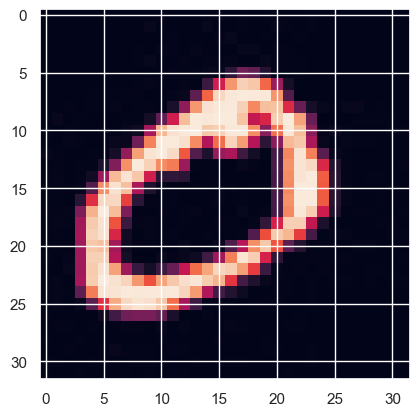

In [4]:
# show image from train handwritten characters
plt.imshow(train_handwritten_images[0])

In [5]:
# Read Train Handwritten Images From Files Using OS library.
for j in tqdm(range(len(validate_sub_files))):
    sub_dir_2 = os.path.join(validate_handwritten_characters_path, validate_sub_files[j])
    images_in_dir = os.listdir(sub_dir_2)
    if validate_sub_files[j] in non_chars:
        continue
    for k in range(len(images_in_dir)):
        validate_handwritten_characters.append(validate_sub_files[j])
        img = cv2.imread(os.path.join(sub_dir_2, images_in_dir[k]), 0)
        img = img.reshape(32, 32, 1)
        validate_handwritten_images.append(img)

100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [00:22<00:00,  1.76it/s]


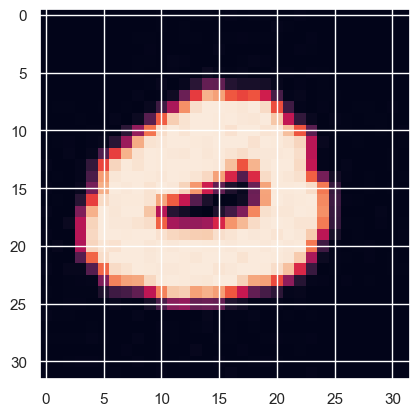

In [6]:
# show image from validation handwritten characters
plt.imshow(validate_handwritten_images[0])

In [7]:
# convert to np array
train_handwritten_characters = np.array(train_handwritten_characters)
train_handwritten_images = np.array(train_handwritten_images)
validate_handwritten_characters = np.array(validate_handwritten_characters)
validate_handwritten_images = np.array(validate_handwritten_images)

In [8]:
# print train_handwritten_images shape
print(train_handwritten_images.shape)

(82063, 32, 32, 1)


In [9]:
# print validate_handwritten_images shape 
print(validate_handwritten_images.shape)

(18104, 32, 32, 1)


In [10]:
# split train to x and y
handwritten_train_X = train_handwritten_images  / 255.0
handwritten_train_y = train_handwritten_characters
handwritten_train_X = tf.convert_to_tensor(handwritten_train_X)

In [11]:
# split validation to x and y
handwritten_validation_X = validate_handwritten_images  / 255.0
handwritten_validation_y = validate_handwritten_characters
handwritten_validation_X = tf.convert_to_tensor(handwritten_validation_X)

In [12]:
# print handwritten train y shape and handwritten validation y shape
print("Handwritten Train Y Shape is : {} and Handwritten Validation Y Shape is : {}".format(handwritten_train_y.shape, handwritten_validation_y.shape))

Handwritten Train Y Shape is : (82063,) and Handwritten Validation Y Shape is : (18104,)


## Reading Handwritten Names

### Train

In [13]:
# Reading train handwritten names
hand_written_names_train_path = 'OCR_Dataset/Handwritten Names/train'
hand_written_names_train_files = os.listdir(path=hand_written_names_train_path)
hand_written_names_train_images = os.listdir(path=os.path.join(hand_written_names_train_path, hand_written_names_train_files[0]))
hand_written_names_train_labels_df = pd.read_csv(os.path.join(hand_written_names_train_path, hand_written_names_train_files[1]))
hand_written_names_train_path2 = os.path.join(hand_written_names_train_path, hand_written_names_train_files[0])
hand_written_names_train_images_list = []
for i in tqdm(range(len(hand_written_names_train_images))):
    img = cv2.imread(os.path.join(hand_written_names_train_path2, hand_written_names_train_images[i]))
    img = cv2.resize(img, (250, 50))
    hand_written_names_train_images_list.append(img)
hand_written_names_train_images_list = np.array(hand_written_names_train_images_list)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 241.06it/s]


In [14]:
# print 10 sample of hand_written_names_train_labels_df
hand_written_names_train_labels_df.sample(10)

FILENAME       IDENTITY
979  TRAIN_00980.jpg         NATHAN
605  TRAIN_00606.jpg         BORIES
35   TRAIN_00036.jpg       LORENTIN
494  TRAIN_00495.jpg       AURELIEN
591  TRAIN_00592.jpg        QUENTIN
442  TRAIN_00443.jpg          ANAIS
320  TRAIN_00321.jpg          JULIE
143  TRAIN_00144.jpg  GENIQUE-ENNIS
107  TRAIN_00108.jpg          LOVIS
789  TRAIN_00790.jpg      GUILLAUME

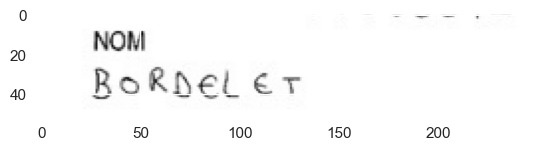

In [15]:
# plot image of train images
plt.imshow(hand_written_names_train_images_list[396])

In [16]:
# print shape of train images
print(hand_written_names_train_images_list.shape)

(1000, 50, 250, 3)


### Validation

In [17]:
# Reading validation handwritten names
hand_written_names_val_path = 'OCR_Dataset/Handwritten Names/val'
hand_written_names_val_files = os.listdir(path=hand_written_names_val_path)
hand_written_names_val_images = os.listdir(path=os.path.join(hand_written_names_val_path, hand_written_names_val_files[0]))
hand_written_names_val_labels_df = pd.read_csv(os.path.join(hand_written_names_val_path, hand_written_names_val_files[1]))
hand_written_names_val_path2 = os.path.join(hand_written_names_val_path, hand_written_names_val_files[0])
hand_written_names_val_images_list = []
for i in tqdm(range(len(hand_written_names_val_images))):
    img = cv2.imread(os.path.join(hand_written_names_val_path2, hand_written_names_val_images[i]))
    img = cv2.resize(img, (250, 50))
    hand_written_names_val_images_list.append(img)
hand_written_names_val_images_list = np.array(hand_written_names_val_images_list)

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 206.23it/s]


In [18]:
# print 10 sample of hand_written_names_val_labels_df
hand_written_names_val_labels_df.sample(10)

FILENAME    IDENTITY
151  VALIDATION_0152.jpg      CACHOT
58   VALIDATION_0059.jpg        SAAD
57   VALIDATION_0058.jpg     DAVOULT
162  VALIDATION_0163.jpg      SOPHIE
44   VALIDATION_0045.jpg  DUTARR ICR
46   VALIDATION_0047.jpg     ALYSSIA
83   VALIDATION_0084.jpg     ANTOINE
160  VALIDATION_0161.jpg    BOUBTANA
139  VALIDATION_0140.jpg      ELYCIA
119  VALIDATION_0120.jpg      FRENOT

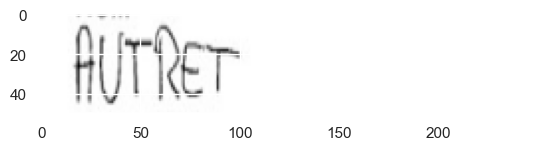

In [19]:
# plot image of validation images
plt.imshow(hand_written_names_val_images_list[71])

In [20]:
# print validation images shape
print(hand_written_names_val_images_list.shape)

(200, 50, 250, 3)


### Test

In [21]:
# Reading test handwritten names
hand_written_names_test_path = 'OCR_Dataset/Handwritten Names/test'
hand_written_names_test_files = os.listdir(path=hand_written_names_test_path)
hand_written_names_test_images = os.listdir(path=os.path.join(hand_written_names_test_path, hand_written_names_test_files[0]))
hand_written_names_test_labels_df = pd.read_csv(os.path.join(hand_written_names_test_path, hand_written_names_test_files[1]))
hand_written_names_test_path2 = os.path.join(hand_written_names_test_path, hand_written_names_test_files[0])
hand_written_names_test_images_list = []
for i in tqdm(range(len(hand_written_names_test_images))):
    img = cv2.imread(os.path.join(hand_written_names_test_path2, hand_written_names_test_images[i]))
    img = cv2.resize(img, (250, 50))
    hand_written_names_test_images_list.append(img)
hand_written_names_test_images_list = np.array(hand_written_names_test_images_list)

100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 202.20it/s]


In [22]:
# print 10 sample of hand_written_names_test_labels_df
hand_written_names_test_labels_df.sample(10)

FILENAME  IDENTITY
355  TEST_0356.jpg   FLORIAN
460  TEST_0461.jpg   CAMILLE
229  TEST_0230.jpg   STAKOVA
234  TEST_0235.jpg     CISSE
402  TEST_0403.jpg       LEA
148  TEST_0149.jpg  FRANCOIS
171  TEST_0172.jpg   LAVIGNE
136  TEST_0137.jpg     LERIN
464  TEST_0465.jpg    RICARD
439  TEST_0440.jpg  DA COSTA

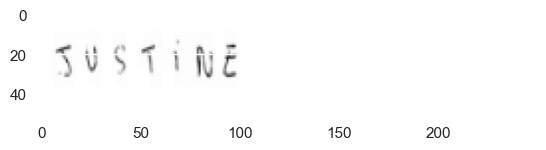

In [23]:
# plot image of test images
plt.imshow(hand_written_names_test_images_list[98])

In [24]:
# print test images shape
print(hand_written_names_test_images_list.shape)

(300, 50, 250, 3)


# Feature Engineering 

### Label Binarization

In [25]:
# initialize label binarization and transform data for handwritten y train and validation
lb = LabelBinarizer()
handwritten_train_y = np.array(lb.fit_transform(handwritten_train_y))
handwritten_validation_y = np.array(lb.transform(handwritten_validation_y))
handwritten_train_y = tf.convert_to_tensor(handwritten_train_y)
handwritten_validation_y = tf.convert_to_tensor(handwritten_validation_y)

# Building Handwritten model

In [26]:
#function to plot loss curve
def plot_loss_curve_for_train_and_test(history_object, title):
    train_loss = history_object.history['loss']
    test_loss = history_object.history['val_loss']
    plt.figure(figsize=(10,10))
    plt.plot(train_loss)
    plt.plot(test_loss)
    plt.title(title)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train loss', 'val loss'], loc='upper left')
    plt.show()

In [27]:
#function to plot accuracy curve
def plot_accuracy_curve_for_train_and_test(history_object, title):
    train_acc = history_object.history['accuracy']
    test_acc = history_object.history['val_accuracy']
    plt.figure(figsize=(10,10))
    plt.plot(train_acc)
    plt.plot(test_acc)
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train accuracy', 'val accuracy'], loc='upper left')
    plt.show()

In [28]:
# build handwritten neural network model
handwritten_model = Sequential()

handwritten_model.add(Conv2D(32, (1, 1), activation='swish', input_shape=(32,32,1)))
handwritten_model.add(MaxPooling2D(pool_size=(2,2)))

handwritten_model.add(Conv2D(64, (3, 3), activation='swish'))
handwritten_model.add(MaxPooling2D(pool_size=(2,2)))

handwritten_model.add(Conv2D(128, (3, 3), activation='swish'))
handwritten_model.add(MaxPooling2D(pool_size=(2,2)))

handwritten_model.add(Dropout(0.25))

handwritten_model.add(Flatten())

handwritten_model.add(Dense(128, activation='swish'))

handwritten_model.add(Dropout(0.2))

handwritten_model.add(Dense(35, activation='softmax'))

In [29]:
# print handwritten model summary
handwritten_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        64        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [30]:
# compile model
handwritten_model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [31]:
# fit the model
handwritten_model_history = handwritten_model.fit(
    handwritten_train_X,
    handwritten_train_y, 
    epochs=15, 
    batch_size=32, 
    validation_data = (handwritten_validation_X, handwritten_validation_y),
    verbose=1
    )

Epoch 1/15
2565/2565 [==============================] - 54s 21ms/step - loss: 0.5185 - accuracy: 0.8398 - val_loss: 0.9554 - val_accuracy: 0.8434
Epoch 2/15
2565/2565 [==============================] - 53s 21ms/step - loss: 0.2544 - accuracy: 0.9138 - val_loss: 0.9576 - val_accuracy: 0.8532
Epoch 3/15
2565/2565 [==============================] - 53s 21ms/step - loss: 0.2200 - accuracy: 0.9238 - val_loss: 0.9784 - val_accuracy: 0.8485
Epoch 4/15
2565/2565 [==============================] - 53s 21ms/step - loss: 0.1971 - accuracy: 0.9305 - val_loss: 0.9924 - val_accuracy: 0.8574
Epoch 5/15
2565/2565 [==============================] - 53s 21ms/step - loss: 0.1833 - accuracy: 0.9346 - val_loss: 1.0896 - val_accuracy: 0.8605
Epoch 6/15
2565/2565 [==============================] - 54s 21ms/step - loss: 0.1754 - accuracy: 0.9366 - val_loss: 1.1833 - val_accuracy: 0.8594
Epoch 7/15
2565/2565 [==============================] - 54s 21ms/step - loss: 0.1661 - accuracy: 0.9397 - val_loss: 1.0843 -

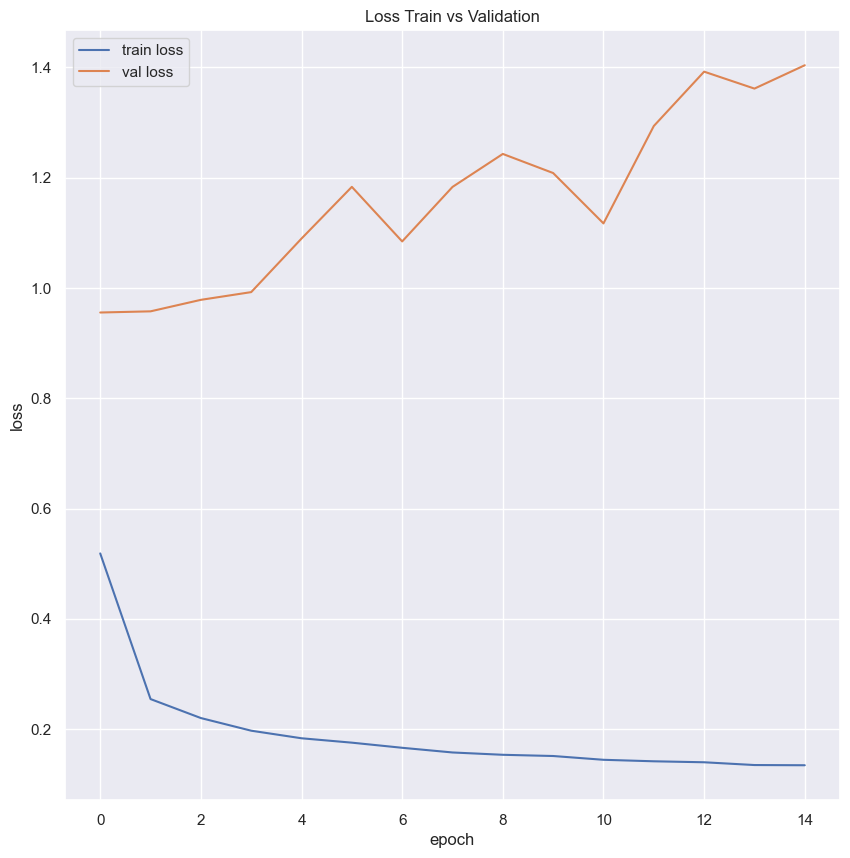

In [32]:
# plot loss
plot_loss_curve_for_train_and_test(handwritten_model_history, "Loss Train vs Validation")

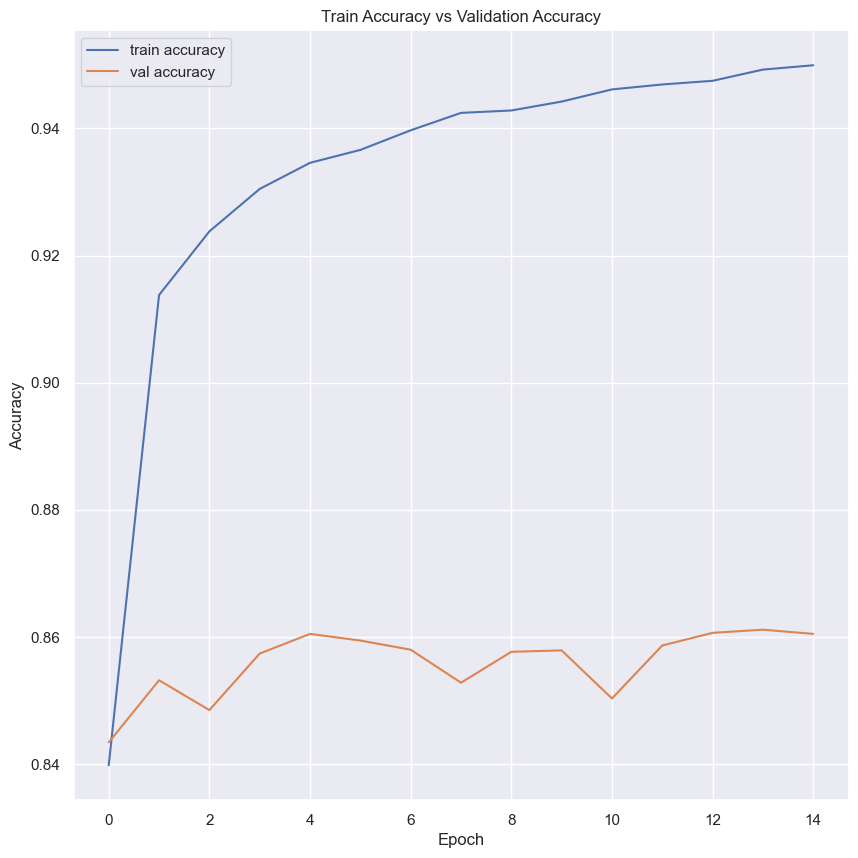

In [33]:
# plot accuracy
plot_accuracy_curve_for_train_and_test(handwritten_model_history, "Train Accuracy vs Validation Accuracy")

In [34]:
# Save The model
handwritten_model.save("./Handwritten_Characters_Recognision_model.h5")

In [35]:
# function to sort contours
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [36]:
# function to get letters
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        flag = False
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            flag = True
            
        if flag == False:
          continue

        if(type(x) != int):
          continue
        roi = gray[y: y+h, x: x+w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = handwritten_model.predict(thresh)
        ypred = lb.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, image

In [37]:
# function to connect characters to make a word
def get_word(letter):
    word = "".join(letter)
    return word

1/1 [==============================] - 0s 37ms/step
LEHA


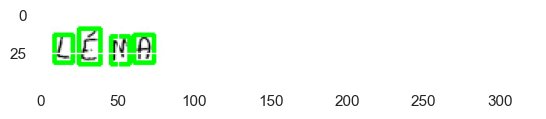

In [38]:
# test one image from names.
letter,image = get_letters("OCR_Dataset/Handwritten Names/test/test/TEST_0003.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

# Read Train Handwritten Names

In [39]:
# read handwritten train images
train_images_path = './OCR_Dataset/Handwritten Names/train/train'
train_list_files = os.listdir(train_images_path)
train_images_file_names = []
for i in tqdm(train_list_files):
  train_images_file_names.append(os.path.join(train_images_path, i))

100%|██████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 334687.52it/s]


In [40]:
# get text from train images
train_model_predicted_characters = []
train_model_predicted_characters_with_images = []
train_error_images = []
for i in tqdm(train_images_file_names):
  if i == train_images_file_names[423] or i == train_images_file_names[536]:
    train_model_predicted_characters.append(None)
    if i == train_images_file_names[423]:
        train_model_predicted_characters_with_images.append(hand_written_names_train_images_list[423])
    elif i == train_images_file_names[536]:
        train_model_predicted_characters_with_images.append(hand_written_names_train_images_list[536])
    continue
  letter, image = get_letters(i)
  word = get_word(letter)
  train_model_predicted_characters.append(word)
  train_model_predicted_characters_with_images.append(image)

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 16ms/step


  0%|                                                                                 | 1/1000 [00:00<12:02,  1.38it/s]

1/1 [==============================] - 0s 20ms/step


  0%|▏                                                                                | 2/1000 [00:00<07:08,  2.33it/s]

1/1 [==============================] - 0s 18ms/step


  0%|▏                                                                                | 3/1000 [00:01<05:30,  3.01it/s]

1/1 [==============================] - 0s 19ms/step


  0%|▎                                                                                | 4/1000 [00:01<07:57,  2.08it/s]

1/1 [==============================] - 0s 17ms/step


  0%|▍                                                                                | 5/1000 [00:02<07:09,  2.32it/s]

1/1 [==============================] - 0s 16ms/step


  1%|▍                                                                                | 6/1000 [00:02<05:54,  2.80it/s]

1/1 [==============================] - 0s 17ms/step


  1%|▌                                                                                | 7/1000 [00:02<06:06,  2.71it/s]

1/1 [==============================] - 0s 17ms/step


  1%|▋                                                                                | 8/1000 [00:03<09:10,  1.80it/s]

1/1 [==============================] - 0s 16ms/step


  1%|▋                                                                                | 9/1000 [00:04<08:27,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


  1%|▊                                                                               | 10/1000 [00:04<07:56,  2.08it/s]

1/1 [==============================] - 0s 17ms/step


  1%|▉                                                                               | 11/1000 [00:04<06:19,  2.60it/s]

1/1 [==============================] - 0s 16ms/step


  1%|▉                                                                               | 12/1000 [00:05<08:21,  1.97it/s]

1/1 [==============================] - 0s 16ms/step


  1%|█                                                                               | 13/1000 [00:05<07:03,  2.33it/s]

1/1 [==============================] - 0s 16ms/step


  1%|█                                                                               | 14/1000 [00:06<06:20,  2.59it/s]

1/1 [==============================] - 0s 16ms/step


  2%|█▏                                                                              | 15/1000 [00:06<06:56,  2.36it/s]

1/1 [==============================] - 0s 16ms/step


  2%|█▎                                                                              | 16/1000 [00:07<07:42,  2.13it/s]

1/1 [==============================] - 0s 26ms/step


  2%|█▎                                                                              | 17/1000 [00:07<06:55,  2.37it/s]

1/1 [==============================] - 0s 17ms/step


  2%|█▍                                                                              | 18/1000 [00:08<09:21,  1.75it/s]

1/1 [==============================] - 0s 16ms/step


  2%|█▌                                                                              | 19/1000 [00:09<09:59,  1.64it/s]

1/1 [==============================] - 0s 16ms/step


  2%|█▌                                                                              | 20/1000 [00:09<08:11,  1.99it/s]

1/1 [==============================] - 0s 16ms/step


  2%|█▋                                                                              | 21/1000 [00:09<07:59,  2.04it/s]

1/1 [==============================] - 0s 16ms/step


  2%|█▊                                                                              | 22/1000 [00:10<07:36,  2.14it/s]

1/1 [==============================] - 0s 15ms/step


  2%|█▊                                                                              | 23/1000 [00:10<06:18,  2.58it/s]

1/1 [==============================] - 0s 17ms/step


  2%|█▉                                                                              | 24/1000 [00:10<06:25,  2.53it/s]

1/1 [==============================] - 0s 17ms/step


  2%|██                                                                              | 25/1000 [00:11<06:06,  2.66it/s]

1/1 [==============================] - 0s 17ms/step


  3%|██                                                                              | 26/1000 [00:11<07:42,  2.11it/s]

1/1 [==============================] - 0s 17ms/step


  3%|██▏                                                                             | 27/1000 [00:12<06:35,  2.46it/s]

1/1 [==============================] - 0s 17ms/step


  3%|██▏                                                                             | 28/1000 [00:12<05:48,  2.79it/s]

1/1 [==============================] - 0s 17ms/step


  3%|██▎                                                                             | 29/1000 [00:13<07:52,  2.05it/s]

1/1 [==============================] - 0s 17ms/step


  3%|██▍                                                                             | 30/1000 [00:13<06:54,  2.34it/s]

1/1 [==============================] - 0s 16ms/step


  3%|██▍                                                                             | 31/1000 [00:13<06:37,  2.44it/s]

1/1 [==============================] - 0s 16ms/step


  3%|██▌                                                                             | 32/1000 [00:14<06:14,  2.58it/s]

1/1 [==============================] - 0s 17ms/step


  3%|██▋                                                                             | 33/1000 [00:14<05:21,  3.01it/s]

1/1 [==============================] - 0s 16ms/step


  3%|██▋                                                                             | 34/1000 [00:14<05:21,  3.00it/s]

1/1 [==============================] - 0s 16ms/step


  4%|██▊                                                                             | 35/1000 [00:15<05:45,  2.80it/s]

1/1 [==============================] - 0s 16ms/step


  4%|██▉                                                                             | 36/1000 [00:15<05:49,  2.76it/s]

1/1 [==============================] - 0s 16ms/step


  4%|██▉                                                                             | 37/1000 [00:15<05:03,  3.18it/s]

1/1 [==============================] - 0s 16ms/step


  4%|███                                                                             | 38/1000 [00:16<05:43,  2.80it/s]

1/1 [==============================] - 0s 16ms/step


  4%|███                                                                             | 39/1000 [00:16<06:56,  2.31it/s]

1/1 [==============================] - 0s 16ms/step


  4%|███▏                                                                            | 40/1000 [00:17<06:02,  2.65it/s]

1/1 [==============================] - 0s 17ms/step


  4%|███▎                                                                            | 41/1000 [00:17<05:35,  2.86it/s]

1/1 [==============================] - 0s 16ms/step


  4%|███▎                                                                            | 42/1000 [00:17<05:29,  2.91it/s]

1/1 [==============================] - 0s 17ms/step


  4%|███▍                                                                            | 43/1000 [00:17<05:13,  3.05it/s]

1/1 [==============================] - 0s 16ms/step


  4%|███▌                                                                            | 44/1000 [00:18<05:25,  2.94it/s]

1/1 [==============================] - 0s 16ms/step


  4%|███▌                                                                            | 45/1000 [00:18<05:34,  2.86it/s]

1/1 [==============================] - 0s 16ms/step


  5%|███▋                                                                            | 46/1000 [00:19<07:15,  2.19it/s]

1/1 [==============================] - 0s 17ms/step


  5%|███▊                                                                            | 47/1000 [00:19<07:13,  2.20it/s]

1/1 [==============================] - 0s 15ms/step


  5%|███▊                                                                            | 48/1000 [00:20<06:37,  2.39it/s]

1/1 [==============================] - 0s 16ms/step


  5%|███▉                                                                            | 49/1000 [00:20<05:59,  2.64it/s]

1/1 [==============================] - 0s 16ms/step


  5%|████                                                                            | 50/1000 [00:20<06:08,  2.58it/s]

1/1 [==============================] - 0s 16ms/step


  5%|████                                                                            | 51/1000 [00:21<05:05,  3.11it/s]

1/1 [==============================] - 0s 16ms/step


  5%|████▏                                                                           | 52/1000 [00:21<04:43,  3.34it/s]

1/1 [==============================] - 0s 16ms/step


  5%|████▏                                                                           | 53/1000 [00:21<05:27,  2.89it/s]

1/1 [==============================] - 0s 16ms/step


  5%|████▎                                                                           | 54/1000 [00:22<06:21,  2.48it/s]

1/1 [==============================] - 0s 16ms/step


  6%|████▍                                                                           | 55/1000 [00:22<05:37,  2.80it/s]

1/1 [==============================] - 0s 16ms/step


  6%|████▍                                                                           | 56/1000 [00:22<04:30,  3.49it/s]

1/1 [==============================] - 0s 16ms/step


  6%|████▌                                                                           | 57/1000 [00:22<04:43,  3.32it/s]

1/1 [==============================] - 0s 17ms/step


  6%|████▋                                                                           | 58/1000 [00:23<06:01,  2.61it/s]

1/1 [==============================] - 0s 16ms/step


  6%|████▋                                                                           | 59/1000 [00:23<06:17,  2.50it/s]

1/1 [==============================] - 0s 17ms/step


  6%|████▊                                                                           | 60/1000 [00:24<08:38,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


  6%|████▉                                                                           | 61/1000 [00:25<07:12,  2.17it/s]

1/1 [==============================] - 0s 16ms/step


  6%|████▉                                                                           | 62/1000 [00:25<06:12,  2.52it/s]

1/1 [==============================] - 0s 16ms/step


  6%|█████                                                                           | 63/1000 [00:25<05:06,  3.06it/s]

1/1 [==============================] - 0s 16ms/step


  6%|█████                                                                           | 64/1000 [00:26<07:26,  2.10it/s]

1/1 [==============================] - 0s 17ms/step


  6%|█████▏                                                                          | 65/1000 [00:26<06:33,  2.38it/s]

1/1 [==============================] - 0s 16ms/step


  7%|█████▎                                                                          | 66/1000 [00:26<05:57,  2.61it/s]

1/1 [==============================] - 0s 18ms/step


  7%|█████▎                                                                          | 67/1000 [00:27<05:31,  2.82it/s]

1/1 [==============================] - 0s 15ms/step


  7%|█████▍                                                                          | 68/1000 [00:28<07:42,  2.02it/s]

1/1 [==============================] - 0s 16ms/step


  7%|█████▌                                                                          | 69/1000 [00:28<06:32,  2.37it/s]

1/1 [==============================] - 0s 16ms/step


  7%|█████▌                                                                          | 70/1000 [00:28<06:29,  2.39it/s]

1/1 [==============================] - 0s 16ms/step


  7%|█████▋                                                                          | 71/1000 [00:29<07:58,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


  7%|█████▊                                                                          | 72/1000 [00:30<09:22,  1.65it/s]

1/1 [==============================] - 0s 16ms/step


  7%|█████▊                                                                          | 73/1000 [00:30<09:26,  1.63it/s]

1/1 [==============================] - 0s 16ms/step


  7%|█████▉                                                                          | 74/1000 [00:31<08:42,  1.77it/s]

1/1 [==============================] - 0s 16ms/step


  8%|██████                                                                          | 75/1000 [00:31<07:25,  2.08it/s]

1/1 [==============================] - 0s 16ms/step


  8%|██████                                                                          | 76/1000 [00:31<06:30,  2.36it/s]

1/1 [==============================] - 0s 17ms/step


  8%|██████▏                                                                         | 77/1000 [00:32<06:04,  2.53it/s]

1/1 [==============================] - 0s 17ms/step


  8%|██████▏                                                                         | 78/1000 [00:32<05:35,  2.75it/s]

1/1 [==============================] - 0s 16ms/step


  8%|██████▎                                                                         | 79/1000 [00:33<07:41,  2.00it/s]

1/1 [==============================] - 0s 16ms/step


  8%|██████▍                                                                         | 80/1000 [00:33<06:42,  2.29it/s]

1/1 [==============================] - 0s 16ms/step


  8%|██████▍                                                                         | 81/1000 [00:33<05:49,  2.63it/s]

1/1 [==============================] - 0s 17ms/step


  8%|██████▌                                                                         | 82/1000 [00:34<05:01,  3.04it/s]

1/1 [==============================] - 0s 16ms/step


  8%|██████▋                                                                         | 83/1000 [00:34<07:05,  2.16it/s]

1/1 [==============================] - 0s 17ms/step


  8%|██████▋                                                                         | 84/1000 [00:35<08:43,  1.75it/s]

1/1 [==============================] - 0s 16ms/step


  8%|██████▊                                                                         | 85/1000 [00:36<08:22,  1.82it/s]

1/1 [==============================] - 0s 16ms/step


  9%|██████▉                                                                         | 86/1000 [00:36<06:48,  2.24it/s]

1/1 [==============================] - 0s 16ms/step


  9%|██████▉                                                                         | 87/1000 [00:37<09:50,  1.55it/s]

1/1 [==============================] - 0s 18ms/step


  9%|███████                                                                         | 88/1000 [00:38<10:16,  1.48it/s]

1/1 [==============================] - 0s 17ms/step


  9%|███████▏                                                                        | 90/1000 [00:39<08:17,  1.83it/s]

1/1 [==============================] - 0s 16ms/step


  9%|███████▎                                                                        | 91/1000 [00:39<07:18,  2.07it/s]

1/1 [==============================] - 0s 16ms/step


  9%|███████▎                                                                        | 92/1000 [00:39<06:41,  2.26it/s]

1/1 [==============================] - 0s 16ms/step


  9%|███████▍                                                                        | 93/1000 [00:40<06:13,  2.43it/s]

1/1 [==============================] - 0s 15ms/step


  9%|███████▌                                                                        | 94/1000 [00:40<06:54,  2.19it/s]

1/1 [==============================] - 0s 16ms/step


 10%|███████▌                                                                        | 95/1000 [00:41<06:53,  2.19it/s]

1/1 [==============================] - 0s 16ms/step


 10%|███████▋                                                                        | 96/1000 [00:41<05:57,  2.53it/s]

1/1 [==============================] - 0s 17ms/step


 10%|███████▊                                                                        | 97/1000 [00:41<05:40,  2.65it/s]

1/1 [==============================] - 0s 16ms/step


 10%|███████▊                                                                        | 98/1000 [00:42<08:13,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


 10%|███████▉                                                                        | 99/1000 [00:42<06:54,  2.17it/s]

1/1 [==============================] - 0s 16ms/step


 10%|███████▉                                                                       | 100/1000 [00:43<05:46,  2.60it/s]

1/1 [==============================] - 0s 16ms/step


 10%|███████▉                                                                       | 101/1000 [00:43<06:29,  2.31it/s]

1/1 [==============================] - 0s 16ms/step


 10%|████████                                                                       | 102/1000 [00:43<06:23,  2.34it/s]

1/1 [==============================] - 0s 16ms/step


 10%|████████▏                                                                      | 103/1000 [00:44<06:41,  2.23it/s]

1/1 [==============================] - 0s 17ms/step


 10%|████████▏                                                                      | 104/1000 [00:44<05:58,  2.50it/s]

1/1 [==============================] - 0s 16ms/step


 10%|████████▎                                                                      | 105/1000 [00:45<06:12,  2.41it/s]

1/1 [==============================] - 0s 17ms/step


 11%|████████▎                                                                      | 106/1000 [00:45<05:48,  2.56it/s]

1/1 [==============================] - 0s 17ms/step


 11%|████████▍                                                                      | 107/1000 [00:46<08:28,  1.76it/s]

1/1 [==============================] - 0s 15ms/step


 11%|████████▌                                                                      | 108/1000 [00:46<06:51,  2.17it/s]

1/1 [==============================] - 0s 16ms/step


 11%|████████▌                                                                      | 109/1000 [00:47<06:38,  2.24it/s]

1/1 [==============================] - 0s 16ms/step


 11%|████████▋                                                                      | 110/1000 [00:47<05:54,  2.51it/s]

1/1 [==============================] - 0s 17ms/step


 11%|████████▊                                                                      | 111/1000 [00:47<04:52,  3.04it/s]

1/1 [==============================] - 0s 17ms/step


 11%|████████▊                                                                      | 112/1000 [00:48<06:20,  2.33it/s]

1/1 [==============================] - 0s 16ms/step


 11%|████████▉                                                                      | 113/1000 [00:48<06:15,  2.36it/s]

1/1 [==============================] - 0s 16ms/step


 11%|█████████                                                                      | 114/1000 [00:48<05:27,  2.70it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█████████                                                                      | 115/1000 [00:49<07:17,  2.02it/s]

1/1 [==============================] - 0s 16ms/step


 12%|█████████▏                                                                     | 116/1000 [00:49<06:12,  2.37it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█████████▏                                                                     | 117/1000 [00:50<07:49,  1.88it/s]

1/1 [==============================] - 0s 16ms/step


 12%|█████████▎                                                                     | 118/1000 [00:51<07:07,  2.07it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█████████▍                                                                     | 119/1000 [00:51<05:53,  2.49it/s]

1/1 [==============================] - 0s 16ms/step


 12%|█████████▍                                                                     | 120/1000 [00:51<05:34,  2.63it/s]

1/1 [==============================] - 0s 16ms/step


 12%|█████████▌                                                                     | 121/1000 [00:52<06:27,  2.27it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█████████▋                                                                     | 122/1000 [00:52<05:35,  2.61it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█████████▋                                                                     | 123/1000 [00:52<05:11,  2.82it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█████████▊                                                                     | 124/1000 [00:53<04:43,  3.09it/s]

1/1 [==============================] - 0s 16ms/step


 12%|█████████▉                                                                     | 125/1000 [00:53<04:12,  3.46it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█████████▉                                                                     | 126/1000 [00:53<04:24,  3.30it/s]

1/1 [==============================] - 0s 17ms/step


 13%|██████████                                                                     | 127/1000 [00:53<04:32,  3.21it/s]

1/1 [==============================] - 0s 15ms/step


 13%|██████████                                                                     | 128/1000 [00:54<04:37,  3.14it/s]

1/1 [==============================] - 0s 16ms/step


 13%|██████████▏                                                                    | 129/1000 [00:54<04:41,  3.09it/s]

1/1 [==============================] - 0s 16ms/step


 13%|██████████▎                                                                    | 130/1000 [00:54<04:43,  3.07it/s]

1/1 [==============================] - 0s 16ms/step


 13%|██████████▎                                                                    | 131/1000 [00:55<06:54,  2.10it/s]

1/1 [==============================] - 0s 17ms/step


 13%|██████████▍                                                                    | 132/1000 [00:56<06:15,  2.31it/s]

1/1 [==============================] - 0s 17ms/step


 13%|██████████▌                                                                    | 133/1000 [00:56<07:05,  2.04it/s]

1/1 [==============================] - 0s 16ms/step


 13%|██████████▌                                                                    | 134/1000 [00:57<07:48,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


 14%|██████████▋                                                                    | 135/1000 [00:57<06:43,  2.14it/s]

1/1 [==============================] - 0s 17ms/step


 14%|██████████▋                                                                    | 136/1000 [00:57<06:07,  2.35it/s]

1/1 [==============================] - 0s 18ms/step


 14%|██████████▊                                                                    | 137/1000 [00:58<08:33,  1.68it/s]

1/1 [==============================] - 0s 16ms/step


 14%|██████████▉                                                                    | 138/1000 [00:59<09:22,  1.53it/s]

1/1 [==============================] - 0s 16ms/step


 14%|██████████▉                                                                    | 139/1000 [01:00<08:51,  1.62it/s]

1/1 [==============================] - 0s 17ms/step


 14%|███████████                                                                    | 140/1000 [01:00<07:59,  1.79it/s]

1/1 [==============================] - 0s 16ms/step


 14%|███████████▏                                                                   | 141/1000 [01:01<08:36,  1.66it/s]

1/1 [==============================] - 0s 17ms/step


 14%|███████████▏                                                                   | 142/1000 [01:01<06:43,  2.12it/s]

1/1 [==============================] - 0s 16ms/step


 14%|███████████▎                                                                   | 143/1000 [01:01<05:48,  2.46it/s]

1/1 [==============================] - 0s 16ms/step


 14%|███████████▍                                                                   | 144/1000 [01:02<08:08,  1.75it/s]

1/1 [==============================] - 0s 17ms/step


 14%|███████████▍                                                                   | 145/1000 [01:03<06:55,  2.06it/s]

1/1 [==============================] - 0s 15ms/step


 15%|███████████▌                                                                   | 146/1000 [01:03<06:26,  2.21it/s]

1/1 [==============================] - 0s 16ms/step


 15%|███████████▌                                                                   | 147/1000 [01:03<05:34,  2.55it/s]

1/1 [==============================] - 0s 16ms/step


 15%|███████████▋                                                                   | 148/1000 [01:03<04:57,  2.86it/s]

1/1 [==============================] - 0s 16ms/step


 15%|███████████▊                                                                   | 149/1000 [01:04<06:38,  2.14it/s]

1/1 [==============================] - 0s 16ms/step


 15%|███████████▊                                                                   | 150/1000 [01:05<08:30,  1.67it/s]

1/1 [==============================] - 0s 17ms/step


 15%|███████████▉                                                                   | 151/1000 [01:05<06:38,  2.13it/s]

1/1 [==============================] - 0s 17ms/step


 15%|████████████                                                                   | 152/1000 [01:06<08:21,  1.69it/s]

1/1 [==============================] - 0s 17ms/step


 15%|████████████                                                                   | 153/1000 [01:06<06:53,  2.05it/s]

1/1 [==============================] - 0s 15ms/step


 15%|████████████▏                                                                  | 154/1000 [01:07<06:24,  2.20it/s]

1/1 [==============================] - 0s 17ms/step


 16%|████████████▏                                                                  | 155/1000 [01:07<05:32,  2.54it/s]

1/1 [==============================] - 0s 16ms/step


 16%|████████████▎                                                                  | 156/1000 [01:08<05:59,  2.35it/s]

1/1 [==============================] - 0s 15ms/step


 16%|████████████▍                                                                  | 157/1000 [01:08<04:53,  2.87it/s]

1/1 [==============================] - 0s 17ms/step


 16%|████████████▍                                                                  | 158/1000 [01:08<04:27,  3.15it/s]

1/1 [==============================] - 0s 17ms/step


 16%|████████████▌                                                                  | 159/1000 [01:08<05:03,  2.77it/s]

1/1 [==============================] - 0s 17ms/step


 16%|████████████▋                                                                  | 160/1000 [01:09<05:06,  2.74it/s]

1/1 [==============================] - 0s 17ms/step


 16%|████████████▋                                                                  | 161/1000 [01:10<07:03,  1.98it/s]

1/1 [==============================] - 0s 16ms/step


 16%|████████████▊                                                                  | 162/1000 [01:10<06:32,  2.14it/s]

1/1 [==============================] - 0s 17ms/step


 16%|████████████▉                                                                  | 163/1000 [01:10<05:47,  2.41it/s]

1/1 [==============================] - 0s 17ms/step


 16%|████████████▉                                                                  | 164/1000 [01:11<05:04,  2.75it/s]

1/1 [==============================] - 0s 16ms/step


 16%|█████████████                                                                  | 165/1000 [01:11<05:06,  2.72it/s]

1/1 [==============================] - 0s 16ms/step


 17%|█████████████                                                                  | 166/1000 [01:11<04:58,  2.80it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█████████████▏                                                                 | 167/1000 [01:12<05:02,  2.76it/s]

1/1 [==============================] - 0s 16ms/step


 17%|█████████████▎                                                                 | 168/1000 [01:12<04:54,  2.83it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█████████████▎                                                                 | 169/1000 [01:12<04:39,  2.97it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█████████████▍                                                                 | 170/1000 [01:13<04:27,  3.10it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█████████████▌                                                                 | 171/1000 [01:13<05:11,  2.66it/s]

1/1 [==============================] - 0s 16ms/step


 17%|█████████████▌                                                                 | 172/1000 [01:13<04:40,  2.96it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█████████████▋                                                                 | 173/1000 [01:14<04:39,  2.96it/s]

1/1 [==============================] - 0s 16ms/step


 17%|█████████████▋                                                                 | 174/1000 [01:14<03:56,  3.50it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█████████████▊                                                                 | 175/1000 [01:14<03:48,  3.62it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█████████████▉                                                                 | 176/1000 [01:14<03:51,  3.56it/s]

1/1 [==============================] - 0s 16ms/step


 18%|█████████████▉                                                                 | 177/1000 [01:15<04:17,  3.20it/s]

1/1 [==============================] - 0s 18ms/step


 18%|██████████████                                                                 | 178/1000 [01:15<04:52,  2.81it/s]

1/1 [==============================] - 0s 16ms/step


 18%|██████████████▏                                                                | 179/1000 [01:15<04:16,  3.20it/s]

1/1 [==============================] - 0s 16ms/step


 18%|██████████████▏                                                                | 180/1000 [01:16<03:40,  3.71it/s]

1/1 [==============================] - 0s 16ms/step


 18%|██████████████▎                                                                | 181/1000 [01:16<03:35,  3.80it/s]

1/1 [==============================] - 0s 17ms/step


 18%|██████████████▍                                                                | 182/1000 [01:16<04:23,  3.10it/s]

1/1 [==============================] - 0s 17ms/step


 18%|██████████████▍                                                                | 183/1000 [01:17<04:36,  2.96it/s]

1/1 [==============================] - 0s 17ms/step


 18%|██████████████▌                                                                | 184/1000 [01:17<05:45,  2.36it/s]

1/1 [==============================] - 0s 17ms/step


 18%|██████████████▌                                                                | 185/1000 [01:18<07:46,  1.75it/s]

1/1 [==============================] - 0s 16ms/step


 19%|██████████████▋                                                                | 186/1000 [01:19<06:57,  1.95it/s]

1/1 [==============================] - 0s 16ms/step


 19%|██████████████▊                                                                | 187/1000 [01:19<06:02,  2.24it/s]

1/1 [==============================] - 0s 16ms/step


 19%|██████████████▊                                                                | 188/1000 [01:20<07:25,  1.82it/s]

1/1 [==============================] - 0s 16ms/step


 19%|██████████████▉                                                                | 189/1000 [01:20<06:42,  2.01it/s]

1/1 [==============================] - 0s 16ms/step


 19%|███████████████                                                                | 190/1000 [01:20<06:12,  2.17it/s]

1/1 [==============================] - 0s 15ms/step


 19%|███████████████                                                                | 191/1000 [01:21<05:21,  2.51it/s]

1/1 [==============================] - 0s 16ms/step


 19%|███████████████▏                                                               | 192/1000 [01:21<05:14,  2.57it/s]

1/1 [==============================] - 0s 16ms/step


 19%|███████████████▏                                                               | 193/1000 [01:21<04:20,  3.10it/s]

1/1 [==============================] - 0s 17ms/step


 19%|███████████████▎                                                               | 194/1000 [01:22<04:33,  2.95it/s]

1/1 [==============================] - 0s 17ms/step


 20%|███████████████▍                                                               | 195/1000 [01:22<06:32,  2.05it/s]

1/1 [==============================] - 0s 17ms/step


 20%|███████████████▍                                                               | 196/1000 [01:23<06:06,  2.19it/s]

1/1 [==============================] - 0s 16ms/step


 20%|███████████████▌                                                               | 197/1000 [01:23<05:27,  2.45it/s]

1/1 [==============================] - 0s 17ms/step


 20%|███████████████▋                                                               | 198/1000 [01:24<05:48,  2.30it/s]

1/1 [==============================] - 0s 16ms/step


 20%|███████████████▋                                                               | 199/1000 [01:24<05:13,  2.55it/s]

1/1 [==============================] - 0s 16ms/step


 20%|███████████████▊                                                               | 200/1000 [01:24<05:09,  2.59it/s]

1/1 [==============================] - 0s 16ms/step


 20%|███████████████▉                                                               | 201/1000 [01:25<06:04,  2.19it/s]

1/1 [==============================] - 0s 17ms/step


 20%|███████████████▉                                                               | 202/1000 [01:25<05:15,  2.53it/s]

1/1 [==============================] - 0s 17ms/step


 20%|████████████████                                                               | 203/1000 [01:26<06:09,  2.16it/s]

1/1 [==============================] - 0s 16ms/step


 20%|████████████████                                                               | 204/1000 [01:26<06:18,  2.10it/s]

1/1 [==============================] - 0s 16ms/step


 20%|████████████████▏                                                              | 205/1000 [01:27<05:32,  2.39it/s]

1/1 [==============================] - 0s 17ms/step


 21%|████████████████▎                                                              | 206/1000 [01:27<05:12,  2.54it/s]

1/1 [==============================] - 0s 17ms/step


 21%|████████████████▎                                                              | 207/1000 [01:27<04:47,  2.76it/s]

1/1 [==============================] - 0s 16ms/step


 21%|████████████████▍                                                              | 208/1000 [01:28<05:59,  2.21it/s]

1/1 [==============================] - 0s 17ms/step


 21%|████████████████▌                                                              | 209/1000 [01:28<05:02,  2.62it/s]

1/1 [==============================] - 0s 17ms/step


 21%|████████████████▌                                                              | 210/1000 [01:28<05:10,  2.54it/s]

1/1 [==============================] - 0s 16ms/step


 21%|████████████████▋                                                              | 211/1000 [01:29<04:16,  3.08it/s]

1/1 [==============================] - 0s 17ms/step


 21%|████████████████▋                                                              | 212/1000 [01:30<06:45,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


 21%|████████████████▊                                                              | 213/1000 [01:30<07:50,  1.67it/s]

1/1 [==============================] - 0s 16ms/step


 21%|████████████████▉                                                              | 214/1000 [01:31<06:17,  2.08it/s]

1/1 [==============================] - 0s 16ms/step


 22%|████████████████▉                                                              | 215/1000 [01:31<05:32,  2.36it/s]

1/1 [==============================] - 0s 17ms/step


 22%|█████████████████                                                              | 216/1000 [01:31<05:41,  2.30it/s]

1/1 [==============================] - 0s 17ms/step


 22%|█████████████████▏                                                             | 217/1000 [01:32<07:24,  1.76it/s]

1/1 [==============================] - 0s 16ms/step


 22%|█████████████████▏                                                             | 218/1000 [01:32<05:49,  2.23it/s]

1/1 [==============================] - 0s 17ms/step


 22%|█████████████████▎                                                             | 219/1000 [01:33<06:01,  2.16it/s]

1/1 [==============================] - 0s 17ms/step


 22%|█████████████████▍                                                             | 220/1000 [01:33<05:02,  2.58it/s]

1/1 [==============================] - 0s 16ms/step


 22%|█████████████████▍                                                             | 221/1000 [01:34<07:04,  1.84it/s]

1/1 [==============================] - 0s 16ms/step


 22%|█████████████████▌                                                             | 222/1000 [01:35<07:14,  1.79it/s]

1/1 [==============================] - 0s 15ms/step


 22%|█████████████████▌                                                             | 223/1000 [01:35<05:43,  2.26it/s]

1/1 [==============================] - 0s 16ms/step


 22%|█████████████████▋                                                             | 224/1000 [01:35<04:48,  2.69it/s]

1/1 [==============================] - 0s 17ms/step


 22%|█████████████████▊                                                             | 225/1000 [01:35<04:19,  2.99it/s]

1/1 [==============================] - 0s 16ms/step


 23%|█████████████████▊                                                             | 226/1000 [01:36<06:14,  2.06it/s]

1/1 [==============================] - 0s 16ms/step


 23%|█████████████████▉                                                             | 227/1000 [01:36<05:39,  2.28it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██████████████████                                                             | 228/1000 [01:37<05:53,  2.19it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██████████████████                                                             | 229/1000 [01:38<07:20,  1.75it/s]

1/1 [==============================] - 0s 16ms/step


 23%|██████████████████▏                                                            | 230/1000 [01:38<06:25,  2.00it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██████████████████▏                                                            | 231/1000 [01:39<06:53,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██████████████████▎                                                            | 232/1000 [01:39<06:43,  1.90it/s]

1/1 [==============================] - 0s 16ms/step


 23%|██████████████████▍                                                            | 233/1000 [01:39<05:59,  2.14it/s]

1/1 [==============================] - 0s 16ms/step


 23%|██████████████████▍                                                            | 234/1000 [01:40<05:08,  2.48it/s]

1/1 [==============================] - 0s 17ms/step


 24%|██████████████████▌                                                            | 235/1000 [01:40<04:43,  2.69it/s]

1/1 [==============================] - 0s 16ms/step


 24%|██████████████████▋                                                            | 236/1000 [01:41<05:52,  2.17it/s]

1/1 [==============================] - 0s 17ms/step


 24%|██████████████████▋                                                            | 237/1000 [01:41<05:22,  2.37it/s]

1/1 [==============================] - 0s 16ms/step


 24%|██████████████████▊                                                            | 238/1000 [01:41<05:10,  2.45it/s]

1/1 [==============================] - 0s 17ms/step


 24%|██████████████████▉                                                            | 239/1000 [01:42<04:43,  2.68it/s]

1/1 [==============================] - 0s 16ms/step


 24%|██████████████████▉                                                            | 240/1000 [01:42<05:32,  2.29it/s]

1/1 [==============================] - 0s 16ms/step


 24%|███████████████████                                                            | 241/1000 [01:43<05:27,  2.32it/s]

1/1 [==============================] - 0s 16ms/step


 24%|███████████████████                                                            | 242/1000 [01:43<05:04,  2.49it/s]

1/1 [==============================] - 0s 16ms/step


 24%|███████████████████▏                                                           | 243/1000 [01:43<04:11,  3.01it/s]

1/1 [==============================] - 0s 16ms/step


 24%|███████████████████▎                                                           | 244/1000 [01:44<04:12,  3.00it/s]

1/1 [==============================] - 0s 16ms/step


 24%|███████████████████▎                                                           | 245/1000 [01:44<04:30,  2.79it/s]

1/1 [==============================] - 0s 17ms/step


 25%|███████████████████▍                                                           | 246/1000 [01:44<03:55,  3.20it/s]

1/1 [==============================] - 0s 17ms/step


 25%|███████████████████▌                                                           | 247/1000 [01:44<03:32,  3.54it/s]

1/1 [==============================] - 0s 15ms/step


 25%|███████████████████▌                                                           | 248/1000 [01:45<03:24,  3.68it/s]

1/1 [==============================] - 0s 17ms/step


 25%|███████████████████▋                                                           | 249/1000 [01:45<04:43,  2.65it/s]

1/1 [==============================] - 0s 17ms/step


 25%|███████████████████▊                                                           | 250/1000 [01:45<04:06,  3.05it/s]

1/1 [==============================] - 0s 17ms/step


 25%|███████████████████▊                                                           | 251/1000 [01:46<03:40,  3.39it/s]

1/1 [==============================] - 0s 17ms/step


 25%|███████████████████▉                                                           | 252/1000 [01:46<04:40,  2.66it/s]

1/1 [==============================] - 0s 18ms/step


 25%|███████████████████▉                                                           | 253/1000 [01:46<04:05,  3.04it/s]

1/1 [==============================] - 0s 17ms/step


 25%|████████████████████                                                           | 254/1000 [01:47<03:40,  3.38it/s]

1/1 [==============================] - 0s 18ms/step


 26%|████████████████████▏                                                          | 255/1000 [01:47<04:14,  2.92it/s]

1/1 [==============================] - 0s 16ms/step


 26%|████████████████████▏                                                          | 256/1000 [01:48<04:24,  2.81it/s]

1/1 [==============================] - 0s 17ms/step


 26%|████████████████████▎                                                          | 257/1000 [01:48<04:47,  2.58it/s]

1/1 [==============================] - 0s 16ms/step


 26%|████████████████████▍                                                          | 258/1000 [01:48<04:45,  2.60it/s]

1/1 [==============================] - 0s 17ms/step


 26%|████████████████████▍                                                          | 259/1000 [01:49<04:24,  2.81it/s]

1/1 [==============================] - 0s 17ms/step


 26%|████████████████████▌                                                          | 260/1000 [01:50<06:11,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


 26%|████████████████████▌                                                          | 261/1000 [01:50<06:47,  1.81it/s]

1/1 [==============================] - 0s 16ms/step


 26%|████████████████████▋                                                          | 262/1000 [01:50<05:31,  2.22it/s]

1/1 [==============================] - 0s 17ms/step


 26%|████████████████████▊                                                          | 263/1000 [01:51<04:37,  2.66it/s]

1/1 [==============================] - 0s 17ms/step


 26%|████████████████████▊                                                          | 264/1000 [01:51<04:46,  2.57it/s]

1/1 [==============================] - 0s 16ms/step


 26%|████████████████████▉                                                          | 265/1000 [01:51<04:42,  2.60it/s]

1/1 [==============================] - 0s 17ms/step


 27%|█████████████████████                                                          | 266/1000 [01:52<04:21,  2.80it/s]

1/1 [==============================] - 0s 17ms/step


 27%|█████████████████████                                                          | 267/1000 [01:52<03:39,  3.34it/s]

1/1 [==============================] - 0s 16ms/step


 27%|█████████████████████▏                                                         | 268/1000 [01:52<03:19,  3.66it/s]

1/1 [==============================] - 0s 17ms/step


 27%|█████████████████████▎                                                         | 269/1000 [01:52<03:54,  3.12it/s]

1/1 [==============================] - 0s 17ms/step


 27%|█████████████████████▎                                                         | 270/1000 [01:53<03:38,  3.34it/s]

1/1 [==============================] - 0s 17ms/step


 27%|█████████████████████▍                                                         | 271/1000 [01:53<04:12,  2.89it/s]

1/1 [==============================] - 0s 17ms/step


 27%|█████████████████████▍                                                         | 272/1000 [01:54<04:37,  2.62it/s]

1/1 [==============================] - 0s 16ms/step


 27%|█████████████████████▌                                                         | 273/1000 [01:54<04:17,  2.82it/s]

1/1 [==============================] - 0s 16ms/step


 27%|█████████████████████▋                                                         | 274/1000 [01:54<03:55,  3.09it/s]

1/1 [==============================] - 0s 15ms/step


 28%|█████████████████████▋                                                         | 275/1000 [01:55<04:06,  2.94it/s]

1/1 [==============================] - 0s 17ms/step


 28%|█████████████████████▊                                                         | 276/1000 [01:55<03:56,  3.07it/s]

1/1 [==============================] - 0s 17ms/step


 28%|█████████████████████▉                                                         | 277/1000 [01:55<03:30,  3.44it/s]

1/1 [==============================] - 0s 17ms/step


 28%|█████████████████████▉                                                         | 278/1000 [01:55<03:12,  3.75it/s]

1/1 [==============================] - 0s 16ms/step


 28%|██████████████████████                                                         | 279/1000 [01:56<03:08,  3.82it/s]

1/1 [==============================] - 0s 16ms/step


 28%|██████████████████████                                                         | 280/1000 [01:56<03:15,  3.68it/s]

1/1 [==============================] - 0s 16ms/step


 28%|██████████████████████▏                                                        | 281/1000 [01:56<03:37,  3.30it/s]

1/1 [==============================] - 0s 16ms/step


 28%|██████████████████████▎                                                        | 282/1000 [01:57<03:52,  3.09it/s]

1/1 [==============================] - 0s 16ms/step


 28%|██████████████████████▎                                                        | 283/1000 [01:57<05:02,  2.37it/s]

1/1 [==============================] - 0s 16ms/step


 28%|██████████████████████▍                                                        | 284/1000 [01:57<04:06,  2.90it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██████████████████████▌                                                        | 285/1000 [01:58<04:04,  2.93it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██████████████████████▌                                                        | 286/1000 [01:58<05:22,  2.21it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██████████████████████▋                                                        | 287/1000 [01:59<04:39,  2.55it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██████████████████████▊                                                        | 288/1000 [01:59<05:37,  2.11it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██████████████████████▊                                                        | 289/1000 [02:00<05:46,  2.05it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██████████████████████▉                                                        | 290/1000 [02:00<05:13,  2.27it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██████████████████████▉                                                        | 291/1000 [02:01<04:58,  2.37it/s]

1/1 [==============================] - 0s 18ms/step


 29%|███████████████████████                                                        | 292/1000 [02:01<05:32,  2.13it/s]

1/1 [==============================] - 0s 17ms/step


 29%|███████████████████████▏                                                       | 293/1000 [02:01<04:28,  2.63it/s]

1/1 [==============================] - 0s 16ms/step


 29%|███████████████████████▏                                                       | 294/1000 [02:02<05:55,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


 30%|███████████████████████▎                                                       | 295/1000 [02:02<04:53,  2.40it/s]

1/1 [==============================] - 0s 17ms/step


 30%|███████████████████████▍                                                       | 296/1000 [02:03<04:35,  2.55it/s]

1/1 [==============================] - 0s 17ms/step


 30%|███████████████████████▍                                                       | 297/1000 [02:03<03:56,  2.97it/s]

1/1 [==============================] - 0s 17ms/step


 30%|███████████████████████▌                                                       | 298/1000 [02:03<03:55,  2.98it/s]

1/1 [==============================] - 0s 17ms/step


 30%|███████████████████████▌                                                       | 299/1000 [02:03<03:28,  3.36it/s]

1/1 [==============================] - 0s 17ms/step


 30%|███████████████████████▋                                                       | 300/1000 [02:04<03:26,  3.39it/s]

1/1 [==============================] - 0s 17ms/step


 30%|███████████████████████▊                                                       | 301/1000 [02:04<03:53,  2.99it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███████████████████████▊                                                       | 302/1000 [02:04<03:27,  3.37it/s]

1/1 [==============================] - 0s 17ms/step


 30%|███████████████████████▉                                                       | 303/1000 [02:05<03:52,  2.99it/s]

1/1 [==============================] - 0s 19ms/step


 30%|████████████████████████                                                       | 304/1000 [02:05<03:53,  2.98it/s]

1/1 [==============================] - 0s 16ms/step


 30%|████████████████████████                                                       | 305/1000 [02:06<04:19,  2.68it/s]

1/1 [==============================] - 0s 16ms/step


 31%|████████████████████████▏                                                      | 306/1000 [02:06<04:11,  2.75it/s]

1/1 [==============================] - 0s 16ms/step


 31%|████████████████████████▎                                                      | 307/1000 [02:07<05:33,  2.08it/s]

1/1 [==============================] - 0s 16ms/step


 31%|████████████████████████▎                                                      | 308/1000 [02:08<06:47,  1.70it/s]

1/1 [==============================] - 0s 16ms/step


 31%|████████████████████████▍                                                      | 309/1000 [02:08<06:37,  1.74it/s]

1/1 [==============================] - 0s 17ms/step


 31%|████████████████████████▍                                                      | 310/1000 [02:09<06:13,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


 31%|████████████████████████▌                                                      | 311/1000 [02:09<04:56,  2.33it/s]

1/1 [==============================] - 0s 16ms/step


 31%|████████████████████████▋                                                      | 312/1000 [02:09<05:28,  2.09it/s]

1/1 [==============================] - 0s 16ms/step


 31%|████████████████████████▋                                                      | 313/1000 [02:10<04:41,  2.44it/s]

1/1 [==============================] - 0s 16ms/step


 31%|████████████████████████▊                                                      | 314/1000 [02:10<04:42,  2.43it/s]

1/1 [==============================] - 0s 16ms/step


 32%|████████████████████████▉                                                      | 315/1000 [02:11<06:10,  1.85it/s]

1/1 [==============================] - 0s 16ms/step


 32%|████████████████████████▉                                                      | 316/1000 [02:12<06:53,  1.65it/s]

1/1 [==============================] - 0s 17ms/step


 32%|█████████████████████████                                                      | 317/1000 [02:12<06:07,  1.86it/s]

1/1 [==============================] - 0s 18ms/step


 32%|█████████████████████████                                                      | 318/1000 [02:12<04:50,  2.35it/s]

1/1 [==============================] - 0s 16ms/step


 32%|█████████████████████████▏                                                     | 319/1000 [02:12<04:06,  2.76it/s]

1/1 [==============================] - 0s 17ms/step


 32%|█████████████████████████▎                                                     | 320/1000 [02:13<04:08,  2.73it/s]

1/1 [==============================] - 0s 18ms/step


 32%|█████████████████████████▎                                                     | 321/1000 [02:13<04:18,  2.63it/s]

1/1 [==============================] - 0s 16ms/step


 32%|█████████████████████████▍                                                     | 322/1000 [02:14<04:51,  2.33it/s]

1/1 [==============================] - 0s 16ms/step


 32%|█████████████████████████▌                                                     | 323/1000 [02:14<04:14,  2.66it/s]

1/1 [==============================] - 0s 17ms/step


 32%|█████████████████████████▌                                                     | 324/1000 [02:15<05:55,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


 32%|█████████████████████████▋                                                     | 325/1000 [02:15<04:58,  2.26it/s]

1/1 [==============================] - 0s 17ms/step


 33%|█████████████████████████▊                                                     | 326/1000 [02:15<04:28,  2.51it/s]

1/1 [==============================] - 0s 16ms/step


 33%|█████████████████████████▊                                                     | 327/1000 [02:16<04:31,  2.48it/s]

1/1 [==============================] - 0s 17ms/step


 33%|█████████████████████████▉                                                     | 328/1000 [02:16<03:43,  3.01it/s]

1/1 [==============================] - 0s 16ms/step


 33%|█████████████████████████▉                                                     | 329/1000 [02:16<03:46,  2.97it/s]

1/1 [==============================] - 0s 17ms/step


 33%|██████████████████████████                                                     | 330/1000 [02:17<05:25,  2.06it/s]

1/1 [==============================] - 0s 16ms/step


 33%|██████████████████████████▏                                                    | 331/1000 [02:17<05:03,  2.21it/s]

1/1 [==============================] - 0s 16ms/step


 33%|██████████████████████████▏                                                    | 332/1000 [02:18<05:20,  2.08it/s]

1/1 [==============================] - 0s 17ms/step


 33%|██████████████████████████▎                                                    | 333/1000 [02:18<05:07,  2.17it/s]

1/1 [==============================] - 0s 17ms/step


 33%|██████████████████████████▍                                                    | 334/1000 [02:19<06:05,  1.82it/s]

1/1 [==============================] - 0s 16ms/step


 34%|██████████████████████████▍                                                    | 335/1000 [02:20<05:47,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


 34%|██████████████████████████▌                                                    | 336/1000 [02:20<05:26,  2.04it/s]

1/1 [==============================] - 0s 16ms/step


 34%|██████████████████████████▌                                                    | 337/1000 [02:21<05:59,  1.84it/s]

1/1 [==============================] - 0s 16ms/step


 34%|██████████████████████████▋                                                    | 338/1000 [02:21<05:09,  2.14it/s]

1/1 [==============================] - 0s 17ms/step


 34%|██████████████████████████▊                                                    | 339/1000 [02:22<05:40,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


 34%|██████████████████████████▊                                                    | 340/1000 [02:23<07:10,  1.53it/s]

1/1 [==============================] - 0s 17ms/step


 34%|██████████████████████████▉                                                    | 341/1000 [02:23<05:43,  1.92it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███████████████████████████                                                    | 342/1000 [02:23<04:57,  2.21it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███████████████████████████                                                    | 343/1000 [02:23<04:34,  2.40it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███████████████████████████▏                                                   | 344/1000 [02:24<04:34,  2.39it/s]

1/1 [==============================] - 0s 16ms/step


 34%|███████████████████████████▎                                                   | 345/1000 [02:24<03:53,  2.80it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███████████████████████████▎                                                   | 346/1000 [02:24<03:57,  2.76it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███████████████████████████▍                                                   | 347/1000 [02:25<04:24,  2.47it/s]

1/1 [==============================] - 0s 16ms/step


 35%|███████████████████████████▍                                                   | 348/1000 [02:25<04:19,  2.51it/s]

1/1 [==============================] - 0s 16ms/step


 35%|███████████████████████████▌                                                   | 349/1000 [02:26<03:58,  2.73it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███████████████████████████▋                                                   | 350/1000 [02:26<04:41,  2.31it/s]

1/1 [==============================] - 0s 16ms/step


 35%|███████████████████████████▋                                                   | 351/1000 [02:27<05:01,  2.15it/s]

1/1 [==============================] - 0s 16ms/step


 35%|███████████████████████████▊                                                   | 352/1000 [02:28<06:13,  1.73it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███████████████████████████▉                                                   | 354/1000 [02:28<04:04,  2.64it/s]

1/1 [==============================] - 0s 18ms/step


 36%|████████████████████████████                                                   | 355/1000 [02:28<03:51,  2.78it/s]

1/1 [==============================] - 0s 16ms/step


 36%|████████████████████████████                                                   | 356/1000 [02:29<04:23,  2.45it/s]

1/1 [==============================] - 0s 17ms/step


 36%|████████████████████████████▏                                                  | 357/1000 [02:29<04:09,  2.57it/s]

1/1 [==============================] - 0s 16ms/step


 36%|████████████████████████████▎                                                  | 358/1000 [02:29<03:37,  2.95it/s]

1/1 [==============================] - 0s 16ms/step


 36%|████████████████████████████▎                                                  | 359/1000 [02:29<03:05,  3.45it/s]

1/1 [==============================] - 0s 16ms/step


 36%|████████████████████████████▍                                                  | 360/1000 [02:30<02:58,  3.59it/s]

1/1 [==============================] - 0s 16ms/step


 36%|████████████████████████████▌                                                  | 361/1000 [02:30<03:17,  3.24it/s]

1/1 [==============================] - 0s 16ms/step


 36%|████████████████████████████▌                                                  | 362/1000 [02:30<03:05,  3.44it/s]

1/1 [==============================] - 0s 17ms/step


 36%|████████████████████████████▋                                                  | 363/1000 [02:31<03:13,  3.29it/s]

1/1 [==============================] - 0s 17ms/step


 36%|████████████████████████████▊                                                  | 364/1000 [02:31<03:27,  3.07it/s]

1/1 [==============================] - 0s 17ms/step


 36%|████████████████████████████▊                                                  | 365/1000 [02:31<02:57,  3.58it/s]

1/1 [==============================] - 0s 17ms/step


 37%|████████████████████████████▉                                                  | 366/1000 [02:32<04:18,  2.45it/s]

1/1 [==============================] - 0s 16ms/step


 37%|████████████████████████████▉                                                  | 367/1000 [02:32<04:36,  2.29it/s]

1/1 [==============================] - 0s 17ms/step


 37%|█████████████████████████████                                                  | 368/1000 [02:33<04:01,  2.62it/s]

1/1 [==============================] - 0s 17ms/step


 37%|█████████████████████████████▏                                                 | 369/1000 [02:33<03:36,  2.91it/s]

1/1 [==============================] - 0s 18ms/step


 37%|█████████████████████████████▏                                                 | 370/1000 [02:33<03:18,  3.18it/s]

1/1 [==============================] - 0s 15ms/step


 37%|█████████████████████████████▎                                                 | 371/1000 [02:33<03:06,  3.37it/s]

1/1 [==============================] - 0s 16ms/step


 37%|█████████████████████████████▍                                                 | 372/1000 [02:34<02:58,  3.52it/s]

1/1 [==============================] - 0s 17ms/step


 37%|█████████████████████████████▍                                                 | 373/1000 [02:34<03:40,  2.85it/s]

1/1 [==============================] - 0s 16ms/step


 37%|█████████████████████████████▌                                                 | 374/1000 [02:35<03:46,  2.77it/s]

1/1 [==============================] - 0s 17ms/step


 38%|█████████████████████████████▋                                                 | 375/1000 [02:35<04:19,  2.41it/s]

1/1 [==============================] - 0s 17ms/step


 38%|█████████████████████████████▋                                                 | 376/1000 [02:35<03:48,  2.73it/s]

1/1 [==============================] - 0s 17ms/step


 38%|█████████████████████████████▊                                                 | 377/1000 [02:36<05:01,  2.07it/s]

1/1 [==============================] - 0s 17ms/step


 38%|█████████████████████████████▊                                                 | 378/1000 [02:37<05:18,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


 38%|█████████████████████████████▉                                                 | 379/1000 [02:37<04:30,  2.30it/s]

1/1 [==============================] - 0s 17ms/step


 38%|██████████████████████████████                                                 | 380/1000 [02:37<03:56,  2.62it/s]

1/1 [==============================] - 0s 17ms/step


 38%|██████████████████████████████                                                 | 381/1000 [02:37<03:17,  3.13it/s]

1/1 [==============================] - 0s 17ms/step


 38%|██████████████████████████████▏                                                | 382/1000 [02:38<03:59,  2.58it/s]

1/1 [==============================] - 0s 17ms/step


 38%|██████████████████████████████▎                                                | 383/1000 [02:38<03:42,  2.77it/s]

1/1 [==============================] - 0s 17ms/step


 38%|██████████████████████████████▎                                                | 384/1000 [02:39<03:45,  2.73it/s]

1/1 [==============================] - 0s 17ms/step


 38%|██████████████████████████████▍                                                | 385/1000 [02:40<05:59,  1.71it/s]

1/1 [==============================] - 0s 17ms/step


 39%|██████████████████████████████▍                                                | 386/1000 [02:40<04:34,  2.24it/s]

1/1 [==============================] - 0s 17ms/step


 39%|██████████████████████████████▌                                                | 387/1000 [02:40<04:38,  2.20it/s]

1/1 [==============================] - 0s 16ms/step


 39%|██████████████████████████████▋                                                | 388/1000 [02:41<06:04,  1.68it/s]

1/1 [==============================] - 0s 16ms/step


 39%|██████████████████████████████▋                                                | 389/1000 [02:42<05:31,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


 39%|██████████████████████████████▊                                                | 390/1000 [02:42<04:53,  2.08it/s]

1/1 [==============================] - 0s 17ms/step


 39%|██████████████████████████████▉                                                | 391/1000 [02:43<06:21,  1.59it/s]

1/1 [==============================] - 0s 16ms/step


 39%|██████████████████████████████▉                                                | 392/1000 [02:43<06:00,  1.69it/s]

1/1 [==============================] - 0s 16ms/step


 39%|███████████████████████████████                                                | 393/1000 [02:44<05:43,  1.77it/s]

1/1 [==============================] - 0s 16ms/step


 39%|███████████████████████████████▏                                               | 394/1000 [02:45<06:02,  1.67it/s]

1/1 [==============================] - 0s 16ms/step


 40%|███████████████████████████████▏                                               | 395/1000 [02:45<04:58,  2.03it/s]

1/1 [==============================] - 0s 17ms/step


 40%|███████████████████████████████▎                                               | 396/1000 [02:46<06:07,  1.64it/s]

1/1 [==============================] - 0s 16ms/step


 40%|███████████████████████████████▎                                               | 397/1000 [02:46<06:05,  1.65it/s]

1/1 [==============================] - 0s 17ms/step


 40%|███████████████████████████████▍                                               | 398/1000 [02:47<05:31,  1.82it/s]

1/1 [==============================] - 0s 16ms/step


 40%|███████████████████████████████▌                                               | 399/1000 [02:47<04:52,  2.05it/s]

1/1 [==============================] - 0s 17ms/step


 40%|███████████████████████████████▌                                               | 400/1000 [02:48<05:48,  1.72it/s]

1/1 [==============================] - 0s 16ms/step


 40%|███████████████████████████████▋                                               | 401/1000 [02:48<04:48,  2.08it/s]

1/1 [==============================] - 0s 16ms/step


 40%|███████████████████████████████▊                                               | 402/1000 [02:49<05:44,  1.73it/s]

1/1 [==============================] - 0s 16ms/step


 40%|███████████████████████████████▊                                               | 403/1000 [02:49<04:53,  2.03it/s]

1/1 [==============================] - 0s 17ms/step


 40%|███████████████████████████████▉                                               | 404/1000 [02:50<04:55,  2.02it/s]

1/1 [==============================] - 0s 18ms/step


 40%|███████████████████████████████▉                                               | 405/1000 [02:50<04:11,  2.36it/s]

1/1 [==============================] - 0s 17ms/step


 41%|████████████████████████████████                                               | 406/1000 [02:51<05:17,  1.87it/s]

1/1 [==============================] - 0s 16ms/step


 41%|████████████████████████████████▏                                              | 407/1000 [02:51<04:20,  2.28it/s]

1/1 [==============================] - 0s 17ms/step


 41%|████████████████████████████████▏                                              | 408/1000 [02:51<03:54,  2.53it/s]

1/1 [==============================] - 0s 18ms/step


 41%|████████████████████████████████▎                                              | 409/1000 [02:52<03:36,  2.73it/s]

1/1 [==============================] - 0s 16ms/step


 41%|████████████████████████████████▍                                              | 410/1000 [02:52<03:23,  2.89it/s]

1/1 [==============================] - 0s 17ms/step


 41%|████████████████████████████████▍                                              | 411/1000 [02:52<02:59,  3.28it/s]

1/1 [==============================] - 0s 17ms/step


 41%|████████████████████████████████▌                                              | 412/1000 [02:53<03:34,  2.74it/s]

1/1 [==============================] - 0s 16ms/step


 41%|████████████████████████████████▋                                              | 413/1000 [02:53<04:43,  2.07it/s]

1/1 [==============================] - 0s 17ms/step


 41%|████████████████████████████████▋                                              | 414/1000 [02:54<04:02,  2.41it/s]

1/1 [==============================] - 0s 17ms/step


 42%|████████████████████████████████▊                                              | 415/1000 [02:54<05:11,  1.88it/s]

1/1 [==============================] - 0s 16ms/step


 42%|████████████████████████████████▊                                              | 416/1000 [02:55<05:13,  1.86it/s]

1/1 [==============================] - 0s 16ms/step


 42%|████████████████████████████████▉                                              | 417/1000 [02:55<04:15,  2.28it/s]

1/1 [==============================] - 0s 17ms/step


 42%|█████████████████████████████████                                              | 418/1000 [02:56<03:57,  2.45it/s]

1/1 [==============================] - 0s 17ms/step


 42%|█████████████████████████████████                                              | 419/1000 [02:56<05:19,  1.82it/s]

1/1 [==============================] - 0s 16ms/step


 42%|█████████████████████████████████▏                                             | 420/1000 [02:57<04:27,  2.17it/s]

1/1 [==============================] - 0s 16ms/step


 42%|█████████████████████████████████▎                                             | 421/1000 [02:57<04:21,  2.21it/s]

1/1 [==============================] - 0s 18ms/step


 42%|█████████████████████████████████▎                                             | 422/1000 [02:58<05:14,  1.84it/s]

1/1 [==============================] - 0s 16ms/step


 42%|█████████████████████████████████▍                                             | 423/1000 [02:58<04:23,  2.19it/s]

1/1 [==============================] - 0s 17ms/step


 42%|█████████████████████████████████▌                                             | 425/1000 [02:58<03:00,  3.19it/s]

1/1 [==============================] - 0s 16ms/step


 43%|█████████████████████████████████▋                                             | 426/1000 [02:59<02:57,  3.23it/s]

1/1 [==============================] - 0s 17ms/step


 43%|█████████████████████████████████▋                                             | 427/1000 [02:59<03:07,  3.05it/s]

1/1 [==============================] - 0s 16ms/step


 43%|█████████████████████████████████▊                                             | 428/1000 [02:59<03:15,  2.93it/s]

1/1 [==============================] - 0s 16ms/step


 43%|█████████████████████████████████▉                                             | 429/1000 [03:00<03:00,  3.16it/s]

1/1 [==============================] - 0s 16ms/step


 43%|█████████████████████████████████▉                                             | 430/1000 [03:00<03:11,  2.98it/s]

1/1 [==============================] - 0s 17ms/step


 43%|██████████████████████████████████                                             | 431/1000 [03:01<03:25,  2.77it/s]

1/1 [==============================] - 0s 16ms/step


 43%|██████████████████████████████████▏                                            | 432/1000 [03:01<03:20,  2.83it/s]

1/1 [==============================] - 0s 16ms/step


 43%|██████████████████████████████████▏                                            | 433/1000 [03:01<03:31,  2.68it/s]

1/1 [==============================] - 0s 16ms/step


 43%|██████████████████████████████████▎                                            | 434/1000 [03:02<03:11,  2.96it/s]

1/1 [==============================] - 0s 17ms/step


 44%|██████████████████████████████████▎                                            | 435/1000 [03:02<04:02,  2.33it/s]

1/1 [==============================] - 0s 18ms/step


 44%|██████████████████████████████████▍                                            | 436/1000 [03:03<03:48,  2.47it/s]

1/1 [==============================] - 0s 17ms/step


 44%|██████████████████████████████████▌                                            | 437/1000 [03:03<03:45,  2.49it/s]

1/1 [==============================] - 0s 18ms/step


 44%|██████████████████████████████████▌                                            | 438/1000 [03:03<03:28,  2.70it/s]

1/1 [==============================] - 0s 16ms/step


 44%|██████████████████████████████████▋                                            | 439/1000 [03:04<03:22,  2.77it/s]

1/1 [==============================] - 0s 17ms/step


 44%|██████████████████████████████████▊                                            | 440/1000 [03:04<04:28,  2.09it/s]

1/1 [==============================] - 0s 15ms/step


 44%|██████████████████████████████████▊                                            | 441/1000 [03:05<03:42,  2.51it/s]

1/1 [==============================] - 0s 16ms/step


 44%|██████████████████████████████████▉                                            | 442/1000 [03:05<02:56,  3.16it/s]

1/1 [==============================] - 0s 17ms/step


 44%|██████████████████████████████████▉                                            | 443/1000 [03:05<02:38,  3.51it/s]

1/1 [==============================] - 0s 17ms/step


 44%|███████████████████████████████████                                            | 444/1000 [03:05<03:07,  2.96it/s]

1/1 [==============================] - 0s 16ms/step


 44%|███████████████████████████████████▏                                           | 445/1000 [03:06<03:55,  2.36it/s]

1/1 [==============================] - 0s 16ms/step


 45%|███████████████████████████████████▏                                           | 446/1000 [03:07<04:35,  2.01it/s]

1/1 [==============================] - 0s 16ms/step


 45%|███████████████████████████████████▎                                           | 447/1000 [03:07<04:08,  2.22it/s]

1/1 [==============================] - 0s 17ms/step


 45%|███████████████████████████████████▍                                           | 448/1000 [03:07<03:49,  2.41it/s]

1/1 [==============================] - 0s 21ms/step


 45%|███████████████████████████████████▍                                           | 449/1000 [03:08<04:59,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


 45%|███████████████████████████████████▌                                           | 450/1000 [03:09<04:45,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


 45%|███████████████████████████████████▋                                           | 451/1000 [03:09<04:21,  2.10it/s]

1/1 [==============================] - 0s 16ms/step


 45%|███████████████████████████████████▋                                           | 452/1000 [03:10<04:51,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


 45%|███████████████████████████████████▊                                           | 453/1000 [03:10<03:59,  2.29it/s]

1/1 [==============================] - 0s 16ms/step


 45%|███████████████████████████████████▊                                           | 454/1000 [03:10<03:21,  2.71it/s]

1/1 [==============================] - 0s 16ms/step


 46%|███████████████████████████████████▉                                           | 455/1000 [03:10<03:15,  2.78it/s]

1/1 [==============================] - 0s 16ms/step


 46%|████████████████████████████████████                                           | 456/1000 [03:11<02:37,  3.46it/s]

1/1 [==============================] - 0s 17ms/step


 46%|████████████████████████████████████                                           | 457/1000 [03:11<02:31,  3.58it/s]

1/1 [==============================] - 0s 16ms/step


 46%|████████████████████████████████████▏                                          | 458/1000 [03:11<02:34,  3.51it/s]

1/1 [==============================] - 0s 17ms/step


 46%|████████████████████████████████████▎                                          | 459/1000 [03:11<02:21,  3.82it/s]

1/1 [==============================] - 0s 17ms/step


 46%|████████████████████████████████████▎                                          | 460/1000 [03:12<03:54,  2.31it/s]

1/1 [==============================] - 0s 15ms/step


 46%|████████████████████████████████████▍                                          | 461/1000 [03:12<03:31,  2.55it/s]

1/1 [==============================] - 0s 16ms/step


 46%|████████████████████████████████████▍                                          | 462/1000 [03:13<03:41,  2.43it/s]

1/1 [==============================] - 0s 16ms/step


 46%|████████████████████████████████████▌                                          | 463/1000 [03:13<03:22,  2.66it/s]

1/1 [==============================] - 0s 17ms/step


 46%|████████████████████████████████████▋                                          | 464/1000 [03:13<02:48,  3.19it/s]

1/1 [==============================] - 0s 16ms/step


 46%|████████████████████████████████████▋                                          | 465/1000 [03:14<04:33,  1.96it/s]

1/1 [==============================] - 0s 18ms/step


 47%|████████████████████████████████████▊                                          | 466/1000 [03:15<04:57,  1.79it/s]

1/1 [==============================] - 0s 16ms/step


 47%|████████████████████████████████████▉                                          | 467/1000 [03:16<05:29,  1.62it/s]

1/1 [==============================] - 0s 17ms/step


 47%|████████████████████████████████████▉                                          | 468/1000 [03:16<04:57,  1.79it/s]

1/1 [==============================] - 0s 16ms/step


 47%|█████████████████████████████████████                                          | 469/1000 [03:17<04:48,  1.84it/s]

1/1 [==============================] - 0s 16ms/step


 47%|█████████████████████████████████████▏                                         | 470/1000 [03:17<04:34,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


 47%|█████████████████████████████████████▏                                         | 471/1000 [03:18<04:17,  2.05it/s]

1/1 [==============================] - 0s 16ms/step


 47%|█████████████████████████████████████▎                                         | 472/1000 [03:18<03:40,  2.40it/s]

1/1 [==============================] - 0s 16ms/step


 47%|█████████████████████████████████████▎                                         | 473/1000 [03:18<03:46,  2.32it/s]

1/1 [==============================] - 0s 17ms/step


 47%|█████████████████████████████████████▍                                         | 474/1000 [03:18<03:11,  2.75it/s]

1/1 [==============================] - 0s 17ms/step


 48%|█████████████████████████████████████▌                                         | 476/1000 [03:19<02:34,  3.40it/s]

1/1 [==============================] - 0s 17ms/step


 48%|█████████████████████████████████████▋                                         | 477/1000 [03:19<02:34,  3.39it/s]

1/1 [==============================] - 0s 16ms/step


 48%|█████████████████████████████████████▊                                         | 478/1000 [03:20<03:25,  2.54it/s]

1/1 [==============================] - 0s 17ms/step


 48%|█████████████████████████████████████▊                                         | 479/1000 [03:20<03:22,  2.57it/s]

1/1 [==============================] - 0s 17ms/step


 48%|█████████████████████████████████████▉                                         | 480/1000 [03:21<04:22,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


 48%|█████████████████████████████████████▉                                         | 481/1000 [03:22<04:53,  1.77it/s]

1/1 [==============================] - 0s 16ms/step


 48%|██████████████████████████████████████                                         | 482/1000 [03:22<04:52,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


 48%|██████████████████████████████████████▏                                        | 483/1000 [03:23<04:10,  2.06it/s]

1/1 [==============================] - 0s 18ms/step


 48%|██████████████████████████████████████▏                                        | 484/1000 [03:23<04:19,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


 48%|██████████████████████████████████████▎                                        | 485/1000 [03:24<04:26,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


 49%|██████████████████████████████████████▍                                        | 486/1000 [03:24<04:18,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


 49%|██████████████████████████████████████▍                                        | 487/1000 [03:25<03:52,  2.20it/s]

1/1 [==============================] - 0s 17ms/step


 49%|██████████████████████████████████████▌                                        | 488/1000 [03:25<03:27,  2.47it/s]

1/1 [==============================] - 0s 17ms/step


 49%|██████████████████████████████████████▋                                        | 489/1000 [03:25<03:31,  2.42it/s]

1/1 [==============================] - 0s 17ms/step


 49%|██████████████████████████████████████▋                                        | 490/1000 [03:26<04:35,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


 49%|██████████████████████████████████████▊                                        | 491/1000 [03:27<04:16,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


 49%|██████████████████████████████████████▊                                        | 492/1000 [03:27<05:14,  1.62it/s]

1/1 [==============================] - 0s 17ms/step


 49%|██████████████████████████████████████▉                                        | 493/1000 [03:28<04:36,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


 49%|███████████████████████████████████████                                        | 494/1000 [03:29<05:15,  1.60it/s]

1/1 [==============================] - 0s 17ms/step


 50%|███████████████████████████████████████                                        | 495/1000 [03:29<04:31,  1.86it/s]

1/1 [==============================] - 0s 18ms/step


 50%|███████████████████████████████████████▏                                       | 496/1000 [03:29<03:48,  2.20it/s]

1/1 [==============================] - 0s 17ms/step


 50%|███████████████████████████████████████▎                                       | 497/1000 [03:30<03:50,  2.19it/s]

1/1 [==============================] - 0s 17ms/step


 50%|███████████████████████████████████████▎                                       | 498/1000 [03:30<03:12,  2.61it/s]

1/1 [==============================] - 0s 17ms/step


 50%|███████████████████████████████████████▍                                       | 499/1000 [03:30<03:05,  2.70it/s]

1/1 [==============================] - 0s 16ms/step


 50%|███████████████████████████████████████▌                                       | 500/1000 [03:31<04:03,  2.05it/s]

1/1 [==============================] - 0s 17ms/step


 50%|███████████████████████████████████████▌                                       | 501/1000 [03:31<04:05,  2.03it/s]

1/1 [==============================] - 0s 17ms/step


 50%|███████████████████████████████████████▋                                       | 502/1000 [03:32<05:09,  1.61it/s]

1/1 [==============================] - 0s 16ms/step


 50%|███████████████████████████████████████▋                                       | 503/1000 [03:33<05:03,  1.64it/s]

1/1 [==============================] - 0s 17ms/step


 50%|███████████████████████████████████████▊                                       | 504/1000 [03:33<04:41,  1.76it/s]

1/1 [==============================] - 0s 16ms/step


 50%|███████████████████████████████████████▉                                       | 505/1000 [03:34<04:06,  2.01it/s]

1/1 [==============================] - 0s 23ms/step


 51%|███████████████████████████████████████▉                                       | 506/1000 [03:34<04:14,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


 51%|████████████████████████████████████████                                       | 507/1000 [03:35<03:41,  2.23it/s]

1/1 [==============================] - 0s 16ms/step


 51%|████████████████████████████████████████▏                                      | 508/1000 [03:35<03:31,  2.33it/s]

1/1 [==============================] - 0s 17ms/step


 51%|████████████████████████████████████████▏                                      | 509/1000 [03:35<03:42,  2.21it/s]

1/1 [==============================] - 0s 17ms/step


 51%|████████████████████████████████████████▎                                      | 510/1000 [03:36<04:01,  2.03it/s]

1/1 [==============================] - 0s 16ms/step


 51%|████████████████████████████████████████▎                                      | 511/1000 [03:36<03:20,  2.44it/s]

1/1 [==============================] - 0s 17ms/step


 51%|████████████████████████████████████████▍                                      | 512/1000 [03:37<03:52,  2.10it/s]

1/1 [==============================] - 0s 17ms/step


 51%|████████████████████████████████████████▌                                      | 513/1000 [03:38<04:58,  1.63it/s]

1/1 [==============================] - 0s 17ms/step


 51%|████████████████████████████████████████▌                                      | 514/1000 [03:38<04:54,  1.65it/s]

1/1 [==============================] - 0s 16ms/step


 52%|████████████████████████████████████████▋                                      | 515/1000 [03:39<03:56,  2.05it/s]

1/1 [==============================] - 0s 16ms/step


 52%|████████████████████████████████████████▊                                      | 516/1000 [03:39<03:40,  2.20it/s]

1/1 [==============================] - 0s 17ms/step


 52%|████████████████████████████████████████▊                                      | 517/1000 [03:39<03:17,  2.45it/s]

1/1 [==============================] - 0s 17ms/step


 52%|████████████████████████████████████████▉                                      | 518/1000 [03:40<03:01,  2.66it/s]

1/1 [==============================] - 0s 17ms/step


 52%|█████████████████████████████████████████                                      | 519/1000 [03:41<04:26,  1.80it/s]

1/1 [==============================] - 0s 16ms/step


 52%|█████████████████████████████████████████                                      | 520/1000 [03:41<03:37,  2.21it/s]

1/1 [==============================] - 0s 17ms/step


 52%|█████████████████████████████████████████▏                                     | 521/1000 [03:41<03:20,  2.39it/s]

1/1 [==============================] - 0s 18ms/step


 52%|█████████████████████████████████████████▏                                     | 522/1000 [03:41<02:50,  2.80it/s]

1/1 [==============================] - 0s 17ms/step


 52%|█████████████████████████████████████████▎                                     | 523/1000 [03:42<02:41,  2.95it/s]

1/1 [==============================] - 0s 17ms/step


 52%|█████████████████████████████████████████▍                                     | 524/1000 [03:42<02:41,  2.95it/s]

1/1 [==============================] - 0s 16ms/step


 52%|█████████████████████████████████████████▍                                     | 525/1000 [03:42<02:17,  3.46it/s]

1/1 [==============================] - 0s 16ms/step


 53%|█████████████████████████████████████████▌                                     | 526/1000 [03:42<02:18,  3.43it/s]

1/1 [==============================] - 0s 16ms/step


 53%|█████████████████████████████████████████▋                                     | 527/1000 [03:43<02:12,  3.57it/s]

1/1 [==============================] - 0s 17ms/step


 53%|█████████████████████████████████████████▋                                     | 528/1000 [03:43<02:56,  2.67it/s]

1/1 [==============================] - 0s 17ms/step


 53%|█████████████████████████████████████████▊                                     | 529/1000 [03:44<02:33,  3.06it/s]

1/1 [==============================] - 0s 16ms/step


 53%|█████████████████████████████████████████▊                                     | 530/1000 [03:44<02:53,  2.72it/s]

1/1 [==============================] - 0s 16ms/step


 53%|█████████████████████████████████████████▉                                     | 531/1000 [03:45<03:54,  2.00it/s]

1/1 [==============================] - 0s 17ms/step


 53%|██████████████████████████████████████████                                     | 532/1000 [03:45<04:00,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


 53%|██████████████████████████████████████████                                     | 533/1000 [03:46<03:18,  2.36it/s]

1/1 [==============================] - 0s 16ms/step


 53%|██████████████████████████████████████████▏                                    | 534/1000 [03:46<02:47,  2.78it/s]

1/1 [==============================] - 0s 17ms/step


 54%|██████████████████████████████████████████▎                                    | 535/1000 [03:46<02:38,  2.94it/s]

1/1 [==============================] - 0s 17ms/step


 54%|██████████████████████████████████████████▌                                    | 538/1000 [03:46<01:31,  5.07it/s]

1/1 [==============================] - 0s 17ms/step


 54%|██████████████████████████████████████████▌                                    | 539/1000 [03:47<01:36,  4.75it/s]

1/1 [==============================] - 0s 16ms/step


 54%|██████████████████████████████████████████▋                                    | 540/1000 [03:47<02:22,  3.24it/s]

1/1 [==============================] - 0s 17ms/step


 54%|██████████████████████████████████████████▋                                    | 541/1000 [03:48<02:30,  3.06it/s]

1/1 [==============================] - 0s 16ms/step


 54%|██████████████████████████████████████████▊                                    | 542/1000 [03:48<02:50,  2.69it/s]

1/1 [==============================] - 0s 16ms/step


 54%|██████████████████████████████████████████▉                                    | 543/1000 [03:49<02:51,  2.67it/s]

1/1 [==============================] - 0s 16ms/step


 54%|██████████████████████████████████████████▉                                    | 544/1000 [03:49<02:40,  2.85it/s]

1/1 [==============================] - 0s 18ms/step


 55%|███████████████████████████████████████████                                    | 545/1000 [03:49<03:17,  2.31it/s]

1/1 [==============================] - 0s 16ms/step


 55%|███████████████████████████████████████████▏                                   | 546/1000 [03:50<03:21,  2.25it/s]

1/1 [==============================] - 0s 17ms/step


 55%|███████████████████████████████████████████▏                                   | 547/1000 [03:50<02:50,  2.66it/s]

1/1 [==============================] - 0s 17ms/step


 55%|███████████████████████████████████████████▎                                   | 548/1000 [03:50<02:28,  3.05it/s]

1/1 [==============================] - 0s 16ms/step


 55%|███████████████████████████████████████████▎                                   | 549/1000 [03:51<03:47,  1.98it/s]

1/1 [==============================] - 0s 16ms/step


 55%|███████████████████████████████████████████▍                                   | 550/1000 [03:52<03:37,  2.07it/s]

1/1 [==============================] - 0s 16ms/step


 55%|███████████████████████████████████████████▌                                   | 551/1000 [03:52<03:06,  2.41it/s]

1/1 [==============================] - 0s 17ms/step


 55%|███████████████████████████████████████████▌                                   | 552/1000 [03:52<03:23,  2.20it/s]

1/1 [==============================] - 0s 16ms/step


 55%|███████████████████████████████████████████▋                                   | 553/1000 [03:53<03:30,  2.13it/s]

1/1 [==============================] - 0s 16ms/step


 55%|███████████████████████████████████████████▊                                   | 554/1000 [03:53<02:55,  2.54it/s]

1/1 [==============================] - 0s 17ms/step


 56%|███████████████████████████████████████████▊                                   | 555/1000 [03:53<02:37,  2.83it/s]

1/1 [==============================] - 0s 17ms/step


 56%|███████████████████████████████████████████▉                                   | 556/1000 [03:54<02:40,  2.77it/s]

1/1 [==============================] - 0s 16ms/step


 56%|████████████████████████████████████████████                                   | 557/1000 [03:54<03:00,  2.46it/s]

1/1 [==============================] - 0s 17ms/step


 56%|████████████████████████████████████████████                                   | 558/1000 [03:55<03:13,  2.28it/s]

1/1 [==============================] - 0s 16ms/step


 56%|████████████████████████████████████████████▏                                  | 559/1000 [03:56<04:12,  1.74it/s]

1/1 [==============================] - 0s 17ms/step


 56%|████████████████████████████████████████████▏                                  | 560/1000 [03:56<03:35,  2.04it/s]

1/1 [==============================] - 0s 17ms/step


 56%|████████████████████████████████████████████▎                                  | 561/1000 [03:56<03:10,  2.31it/s]

1/1 [==============================] - 0s 17ms/step


 56%|████████████████████████████████████████████▍                                  | 562/1000 [03:57<02:57,  2.46it/s]

1/1 [==============================] - 0s 17ms/step


 56%|████████████████████████████████████████████▍                                  | 563/1000 [03:57<02:31,  2.88it/s]

1/1 [==============================] - 0s 17ms/step


 56%|████████████████████████████████████████████▌                                  | 564/1000 [03:57<02:58,  2.44it/s]

1/1 [==============================] - 0s 17ms/step


 56%|████████████████████████████████████████████▋                                  | 565/1000 [03:58<02:43,  2.67it/s]

1/1 [==============================] - 0s 17ms/step


 57%|████████████████████████████████████████████▋                                  | 566/1000 [03:58<02:33,  2.83it/s]

1/1 [==============================] - 0s 17ms/step


 57%|████████████████████████████████████████████▊                                  | 567/1000 [03:59<02:52,  2.50it/s]

1/1 [==============================] - 0s 16ms/step


 57%|████████████████████████████████████████████▊                                  | 568/1000 [03:59<02:44,  2.62it/s]

1/1 [==============================] - 0s 17ms/step


 57%|████████████████████████████████████████████▉                                  | 569/1000 [03:59<03:07,  2.30it/s]

1/1 [==============================] - 0s 17ms/step


 57%|█████████████████████████████████████████████                                  | 570/1000 [04:00<02:43,  2.63it/s]

1/1 [==============================] - 0s 17ms/step


 57%|█████████████████████████████████████████████                                  | 571/1000 [04:00<02:16,  3.13it/s]

1/1 [==============================] - 0s 16ms/step


 57%|█████████████████████████████████████████████▏                                 | 572/1000 [04:01<03:24,  2.10it/s]

1/1 [==============================] - 0s 16ms/step


 57%|█████████████████████████████████████████████▎                                 | 573/1000 [04:01<03:32,  2.01it/s]

1/1 [==============================] - 0s 17ms/step


 57%|█████████████████████████████████████████████▎                                 | 574/1000 [04:02<03:01,  2.34it/s]

1/1 [==============================] - 0s 16ms/step


 57%|█████████████████████████████████████████████▍                                 | 575/1000 [04:02<02:55,  2.42it/s]

1/1 [==============================] - 0s 16ms/step


 58%|█████████████████████████████████████████████▌                                 | 576/1000 [04:03<03:17,  2.14it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████████████████████████████████████████████▌                                 | 577/1000 [04:03<03:16,  2.15it/s]

1/1 [==============================] - 0s 17ms/step


 58%|█████████████████████████████████████████████▋                                 | 578/1000 [04:03<03:01,  2.32it/s]

1/1 [==============================] - 0s 17ms/step


 58%|█████████████████████████████████████████████▋                                 | 579/1000 [04:04<03:27,  2.03it/s]

1/1 [==============================] - 0s 17ms/step


 58%|█████████████████████████████████████████████▊                                 | 580/1000 [04:04<02:47,  2.51it/s]

1/1 [==============================] - 0s 17ms/step


 58%|█████████████████████████████████████████████▉                                 | 581/1000 [04:04<02:18,  3.04it/s]

1/1 [==============================] - 0s 17ms/step


 58%|█████████████████████████████████████████████▉                                 | 582/1000 [04:05<02:18,  3.01it/s]

1/1 [==============================] - 0s 16ms/step


 58%|██████████████████████████████████████████████                                 | 583/1000 [04:05<02:35,  2.68it/s]

1/1 [==============================] - 0s 16ms/step


 58%|██████████████████████████████████████████████▏                                | 584/1000 [04:06<02:41,  2.58it/s]

1/1 [==============================] - 0s 18ms/step


 58%|██████████████████████████████████████████████▏                                | 585/1000 [04:06<02:30,  2.77it/s]

1/1 [==============================] - 0s 18ms/step


 59%|██████████████████████████████████████████████▎                                | 586/1000 [04:06<02:32,  2.72it/s]

1/1 [==============================] - 0s 17ms/step


 59%|██████████████████████████████████████████████▎                                | 587/1000 [04:07<02:29,  2.77it/s]

1/1 [==============================] - 0s 17ms/step


 59%|██████████████████████████████████████████████▍                                | 588/1000 [04:07<03:26,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


 59%|██████████████████████████████████████████████▌                                | 589/1000 [04:08<04:20,  1.58it/s]

1/1 [==============================] - 0s 18ms/step


 59%|██████████████████████████████████████████████▌                                | 590/1000 [04:09<03:43,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


 59%|██████████████████████████████████████████████▋                                | 591/1000 [04:09<03:28,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


 59%|██████████████████████████████████████████████▊                                | 592/1000 [04:10<03:17,  2.07it/s]

1/1 [==============================] - 0s 17ms/step


 59%|██████████████████████████████████████████████▊                                | 593/1000 [04:10<02:33,  2.66it/s]

1/1 [==============================] - 0s 17ms/step


 59%|██████████████████████████████████████████████▉                                | 594/1000 [04:10<02:18,  2.93it/s]

1/1 [==============================] - 0s 17ms/step


 60%|███████████████████████████████████████████████                                | 595/1000 [04:10<02:08,  3.15it/s]

1/1 [==============================] - 0s 17ms/step


 60%|███████████████████████████████████████████████                                | 596/1000 [04:11<02:16,  2.97it/s]

1/1 [==============================] - 0s 17ms/step


 60%|███████████████████████████████████████████████▏                               | 597/1000 [04:11<02:05,  3.20it/s]

1/1 [==============================] - 0s 16ms/step


 60%|███████████████████████████████████████████████▏                               | 598/1000 [04:11<02:09,  3.11it/s]

1/1 [==============================] - 0s 17ms/step


 60%|███████████████████████████████████████████████▎                               | 599/1000 [04:11<01:55,  3.46it/s]

1/1 [==============================] - 0s 18ms/step


 60%|███████████████████████████████████████████████▍                               | 600/1000 [04:12<02:27,  2.72it/s]

1/1 [==============================] - 0s 17ms/step


 60%|███████████████████████████████████████████████▍                               | 601/1000 [04:12<02:23,  2.78it/s]

1/1 [==============================] - 0s 18ms/step


 60%|███████████████████████████████████████████████▌                               | 602/1000 [04:13<02:15,  2.93it/s]

1/1 [==============================] - 0s 17ms/step


 60%|███████████████████████████████████████████████▋                               | 603/1000 [04:13<01:50,  3.60it/s]

1/1 [==============================] - 0s 16ms/step


 60%|███████████████████████████████████████████████▋                               | 604/1000 [04:13<01:51,  3.55it/s]

1/1 [==============================] - 0s 17ms/step


 60%|███████████████████████████████████████████████▊                               | 605/1000 [04:13<02:03,  3.20it/s]

1/1 [==============================] - 0s 18ms/step


 61%|███████████████████████████████████████████████▊                               | 606/1000 [04:14<02:00,  3.26it/s]

1/1 [==============================] - 0s 17ms/step


 61%|███████████████████████████████████████████████▉                               | 607/1000 [04:15<03:04,  2.13it/s]

1/1 [==============================] - 0s 17ms/step


 61%|████████████████████████████████████████████████                               | 608/1000 [04:15<03:34,  1.83it/s]

1/1 [==============================] - 0s 16ms/step


 61%|████████████████████████████████████████████████                               | 609/1000 [04:15<02:54,  2.24it/s]

1/1 [==============================] - 0s 17ms/step


 61%|████████████████████████████████████████████████▏                              | 610/1000 [04:16<03:55,  1.66it/s]

1/1 [==============================] - 0s 17ms/step


 61%|████████████████████████████████████████████████▎                              | 611/1000 [04:17<03:24,  1.91it/s]

1/1 [==============================] - 0s 16ms/step


 61%|████████████████████████████████████████████████▎                              | 612/1000 [04:18<03:57,  1.64it/s]

1/1 [==============================] - 0s 18ms/step


 61%|████████████████████████████████████████████████▍                              | 613/1000 [04:18<03:50,  1.68it/s]

1/1 [==============================] - 0s 17ms/step


 61%|████████████████████████████████████████████████▌                              | 614/1000 [04:19<03:34,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


 62%|████████████████████████████████████████████████▌                              | 615/1000 [04:19<03:04,  2.08it/s]

1/1 [==============================] - 0s 16ms/step


 62%|████████████████████████████████████████████████▋                              | 616/1000 [04:20<03:23,  1.89it/s]

1/1 [==============================] - 0s 16ms/step


 62%|████████████████████████████████████████████████▋                              | 617/1000 [04:20<03:15,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


 62%|████████████████████████████████████████████████▊                              | 618/1000 [04:20<02:31,  2.53it/s]

1/1 [==============================] - 0s 16ms/step


 62%|████████████████████████████████████████████████▉                              | 619/1000 [04:20<02:24,  2.64it/s]

1/1 [==============================] - 0s 17ms/step


 62%|████████████████████████████████████████████████▉                              | 620/1000 [04:21<02:00,  3.17it/s]

1/1 [==============================] - 0s 17ms/step


 62%|█████████████████████████████████████████████████                              | 621/1000 [04:22<03:14,  1.95it/s]

1/1 [==============================] - 0s 16ms/step


 62%|█████████████████████████████████████████████████▏                             | 622/1000 [04:22<02:40,  2.36it/s]

1/1 [==============================] - 0s 16ms/step


 62%|█████████████████████████████████████████████████▏                             | 623/1000 [04:22<02:25,  2.60it/s]

1/1 [==============================] - 0s 17ms/step


 62%|█████████████████████████████████████████████████▎                             | 624/1000 [04:22<02:14,  2.79it/s]

1/1 [==============================] - 0s 17ms/step


 62%|█████████████████████████████████████████████████▍                             | 625/1000 [04:23<03:15,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


 63%|█████████████████████████████████████████████████▍                             | 626/1000 [04:24<03:41,  1.69it/s]

1/1 [==============================] - 0s 17ms/step


 63%|█████████████████████████████████████████████████▌                             | 627/1000 [04:24<03:08,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


 63%|█████████████████████████████████████████████████▌                             | 628/1000 [04:25<02:58,  2.08it/s]

1/1 [==============================] - 0s 18ms/step


 63%|█████████████████████████████████████████████████▋                             | 629/1000 [04:25<02:42,  2.28it/s]

1/1 [==============================] - 0s 17ms/step


 63%|█████████████████████████████████████████████████▊                             | 630/1000 [04:26<02:59,  2.06it/s]

1/1 [==============================] - 0s 16ms/step


 63%|█████████████████████████████████████████████████▊                             | 631/1000 [04:26<02:38,  2.33it/s]

1/1 [==============================] - 0s 16ms/step


 63%|█████████████████████████████████████████████████▉                             | 632/1000 [04:27<02:51,  2.14it/s]

1/1 [==============================] - 0s 17ms/step


 63%|██████████████████████████████████████████████████                             | 633/1000 [04:27<02:23,  2.56it/s]

1/1 [==============================] - 0s 17ms/step


 63%|██████████████████████████████████████████████████                             | 634/1000 [04:28<03:10,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


 64%|██████████████████████████████████████████████████▏                            | 635/1000 [04:28<02:36,  2.33it/s]

1/1 [==============================] - 0s 16ms/step


 64%|██████████████████████████████████████████████████▏                            | 636/1000 [04:29<03:03,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


 64%|██████████████████████████████████████████████████▎                            | 637/1000 [04:29<02:31,  2.40it/s]

1/1 [==============================] - 0s 17ms/step


 64%|██████████████████████████████████████████████████▍                            | 638/1000 [04:29<02:22,  2.53it/s]

1/1 [==============================] - 0s 16ms/step


 64%|██████████████████████████████████████████████████▍                            | 639/1000 [04:30<03:07,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


 64%|██████████████████████████████████████████████████▌                            | 640/1000 [04:31<03:33,  1.69it/s]

1/1 [==============================] - 0s 17ms/step


 64%|██████████████████████████████████████████████████▋                            | 641/1000 [04:31<03:19,  1.80it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████████████████████████████████████████████████▋                            | 642/1000 [04:31<02:55,  2.04it/s]

1/1 [==============================] - 0s 17ms/step


 64%|██████████████████████████████████████████████████▊                            | 643/1000 [04:32<02:26,  2.44it/s]

1/1 [==============================] - 0s 16ms/step


 64%|██████████████████████████████████████████████████▉                            | 644/1000 [04:32<02:20,  2.54it/s]

1/1 [==============================] - 0s 17ms/step


 64%|██████████████████████████████████████████████████▉                            | 645/1000 [04:32<02:04,  2.85it/s]

1/1 [==============================] - 0s 17ms/step


 65%|███████████████████████████████████████████████████                            | 646/1000 [04:33<02:51,  2.06it/s]

1/1 [==============================] - 0s 17ms/step


 65%|███████████████████████████████████████████████████                            | 647/1000 [04:34<03:12,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


 65%|███████████████████████████████████████████████████▏                           | 648/1000 [04:34<02:46,  2.11it/s]

1/1 [==============================] - 0s 17ms/step


 65%|███████████████████████████████████████████████████▎                           | 649/1000 [04:34<02:39,  2.21it/s]

1/1 [==============================] - 0s 18ms/step


 65%|███████████████████████████████████████████████████▎                           | 650/1000 [04:35<02:17,  2.54it/s]

1/1 [==============================] - 0s 17ms/step


 65%|███████████████████████████████████████████████████▍                           | 651/1000 [04:35<02:03,  2.82it/s]

1/1 [==============================] - 0s 16ms/step


 65%|███████████████████████████████████████████████████▌                           | 652/1000 [04:35<01:48,  3.20it/s]

1/1 [==============================] - 0s 16ms/step


 65%|███████████████████████████████████████████████████▌                           | 653/1000 [04:35<01:42,  3.38it/s]

1/1 [==============================] - 0s 18ms/step


 65%|███████████████████████████████████████████████████▋                           | 654/1000 [04:36<01:42,  3.36it/s]

1/1 [==============================] - 0s 16ms/step


 66%|███████████████████████████████████████████████████▋                           | 655/1000 [04:36<01:43,  3.34it/s]

1/1 [==============================] - 0s 18ms/step


 66%|███████████████████████████████████████████████████▊                           | 656/1000 [04:37<02:49,  2.03it/s]

1/1 [==============================] - 0s 18ms/step


 66%|███████████████████████████████████████████████████▉                           | 657/1000 [04:38<03:17,  1.74it/s]

1/1 [==============================] - 0s 17ms/step


 66%|███████████████████████████████████████████████████▉                           | 658/1000 [04:38<02:43,  2.09it/s]

1/1 [==============================] - 0s 18ms/step


 66%|████████████████████████████████████████████████████                           | 659/1000 [04:38<02:34,  2.21it/s]

1/1 [==============================] - 0s 17ms/step


 66%|████████████████████████████████████████████████████▏                          | 660/1000 [04:39<02:18,  2.46it/s]

1/1 [==============================] - 0s 16ms/step


 66%|████████████████████████████████████████████████████▏                          | 661/1000 [04:40<02:54,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


 66%|████████████████████████████████████████████████████▎                          | 662/1000 [04:40<02:36,  2.17it/s]

1/1 [==============================] - 0s 17ms/step


 66%|████████████████████████████████████████████████████▍                          | 663/1000 [04:41<03:14,  1.73it/s]

1/1 [==============================] - 0s 16ms/step


 66%|████████████████████████████████████████████████████▍                          | 664/1000 [04:41<02:41,  2.08it/s]

1/1 [==============================] - 0s 17ms/step


 66%|████████████████████████████████████████████████████▌                          | 665/1000 [04:42<03:56,  1.41it/s]

1/1 [==============================] - 0s 17ms/step


 67%|████████████████████████████████████████████████████▌                          | 666/1000 [04:43<03:28,  1.60it/s]

1/1 [==============================] - 0s 17ms/step


 67%|████████████████████████████████████████████████████▋                          | 667/1000 [04:43<03:08,  1.77it/s]

1/1 [==============================] - 0s 16ms/step


 67%|████████████████████████████████████████████████████▊                          | 668/1000 [04:43<02:41,  2.06it/s]

1/1 [==============================] - 0s 16ms/step


 67%|████████████████████████████████████████████████████▊                          | 669/1000 [04:44<02:13,  2.47it/s]

1/1 [==============================] - 0s 17ms/step


 67%|████████████████████████████████████████████████████▉                          | 670/1000 [04:44<02:07,  2.59it/s]

1/1 [==============================] - 0s 17ms/step


 67%|█████████████████████████████████████████████████████                          | 671/1000 [04:45<02:44,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


 67%|█████████████████████████████████████████████████████                          | 672/1000 [04:45<02:20,  2.33it/s]

1/1 [==============================] - 0s 17ms/step


 67%|█████████████████████████████████████████████████████▏                         | 673/1000 [04:45<02:24,  2.27it/s]

1/1 [==============================] - 0s 17ms/step


 67%|█████████████████████████████████████████████████████▏                         | 674/1000 [04:46<02:03,  2.65it/s]

1/1 [==============================] - 0s 18ms/step


 68%|█████████████████████████████████████████████████████▎                         | 675/1000 [04:46<01:46,  3.05it/s]

1/1 [==============================] - 0s 17ms/step


 68%|█████████████████████████████████████████████████████▍                         | 676/1000 [04:47<02:33,  2.11it/s]

1/1 [==============================] - 0s 16ms/step


 68%|█████████████████████████████████████████████████████▍                         | 677/1000 [04:47<02:24,  2.24it/s]

1/1 [==============================] - 0s 17ms/step


 68%|█████████████████████████████████████████████████████▌                         | 678/1000 [04:48<02:29,  2.15it/s]

1/1 [==============================] - 0s 16ms/step


 68%|█████████████████████████████████████████████████████▋                         | 679/1000 [04:48<03:06,  1.72it/s]

1/1 [==============================] - 0s 17ms/step


 68%|█████████████████████████████████████████████████████▋                         | 680/1000 [04:49<02:46,  1.92it/s]

1/1 [==============================] - 0s 18ms/step


 68%|█████████████████████████████████████████████████████▊                         | 681/1000 [04:49<02:21,  2.26it/s]

1/1 [==============================] - 0s 17ms/step


 68%|█████████████████████████████████████████████████████▉                         | 682/1000 [04:49<02:11,  2.41it/s]

1/1 [==============================] - 0s 17ms/step


 68%|█████████████████████████████████████████████████████▉                         | 683/1000 [04:50<02:08,  2.46it/s]

1/1 [==============================] - 0s 16ms/step


 68%|██████████████████████████████████████████████████████                         | 684/1000 [04:50<02:35,  2.03it/s]

1/1 [==============================] - 0s 17ms/step


 68%|██████████████████████████████████████████████████████                         | 685/1000 [04:52<03:28,  1.51it/s]

1/1 [==============================] - 0s 17ms/step


 69%|██████████████████████████████████████████████████████▏                        | 686/1000 [04:52<02:53,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


 69%|██████████████████████████████████████████████████████▎                        | 687/1000 [04:52<02:33,  2.04it/s]

1/1 [==============================] - 0s 17ms/step


 69%|██████████████████████████████████████████████████████▎                        | 688/1000 [04:53<02:27,  2.11it/s]

1/1 [==============================] - 0s 17ms/step


 69%|██████████████████████████████████████████████████████▍                        | 689/1000 [04:53<02:10,  2.38it/s]

1/1 [==============================] - 0s 18ms/step


 69%|██████████████████████████████████████████████████████▌                        | 690/1000 [04:53<02:03,  2.51it/s]

1/1 [==============================] - 0s 16ms/step


 69%|██████████████████████████████████████████████████████▌                        | 691/1000 [04:54<02:01,  2.54it/s]

1/1 [==============================] - 0s 18ms/step


 69%|██████████████████████████████████████████████████████▋                        | 692/1000 [04:54<01:44,  2.94it/s]

1/1 [==============================] - 0s 16ms/step


 69%|██████████████████████████████████████████████████████▋                        | 693/1000 [04:54<01:56,  2.63it/s]

1/1 [==============================] - 0s 18ms/step


 69%|██████████████████████████████████████████████████████▊                        | 694/1000 [04:55<02:09,  2.37it/s]

1/1 [==============================] - 0s 16ms/step


 70%|██████████████████████████████████████████████████████▉                        | 696/1000 [04:55<01:42,  2.97it/s]

1/1 [==============================] - 0s 17ms/step


 70%|███████████████████████████████████████████████████████                        | 697/1000 [04:56<01:42,  2.96it/s]

1/1 [==============================] - 0s 18ms/step


 70%|███████████████████████████████████████████████████████▏                       | 698/1000 [04:56<01:55,  2.61it/s]

1/1 [==============================] - 0s 17ms/step


 70%|███████████████████████████████████████████████████████▏                       | 699/1000 [04:56<01:48,  2.77it/s]

1/1 [==============================] - 0s 17ms/step


 70%|███████████████████████████████████████████████████████▎                       | 700/1000 [04:57<01:36,  3.12it/s]

1/1 [==============================] - 0s 18ms/step


 70%|███████████████████████████████████████████████████████▍                       | 701/1000 [04:57<01:37,  3.06it/s]

1/1 [==============================] - 0s 16ms/step


 70%|███████████████████████████████████████████████████████▍                       | 702/1000 [04:57<01:46,  2.81it/s]

1/1 [==============================] - 0s 17ms/step


 70%|███████████████████████████████████████████████████████▌                       | 703/1000 [04:58<01:40,  2.95it/s]

1/1 [==============================] - 0s 16ms/step


 70%|███████████████████████████████████████████████████████▌                       | 704/1000 [04:58<01:44,  2.83it/s]

1/1 [==============================] - 0s 16ms/step


 70%|███████████████████████████████████████████████████████▋                       | 705/1000 [04:59<01:51,  2.65it/s]

1/1 [==============================] - 0s 17ms/step


 71%|███████████████████████████████████████████████████████▊                       | 706/1000 [04:59<01:51,  2.64it/s]

1/1 [==============================] - 0s 17ms/step


 71%|███████████████████████████████████████████████████████▊                       | 707/1000 [05:00<02:14,  2.17it/s]

1/1 [==============================] - 0s 18ms/step


 71%|███████████████████████████████████████████████████████▉                       | 708/1000 [05:00<02:07,  2.28it/s]

1/1 [==============================] - 0s 17ms/step


 71%|████████████████████████████████████████████████████████                       | 709/1000 [05:01<02:28,  1.95it/s]

1/1 [==============================] - 0s 16ms/step


 71%|████████████████████████████████████████████████████████                       | 710/1000 [05:01<02:13,  2.17it/s]

1/1 [==============================] - 0s 17ms/step


 71%|████████████████████████████████████████████████████████▏                      | 711/1000 [05:01<01:59,  2.42it/s]

1/1 [==============================] - 0s 17ms/step


 71%|████████████████████████████████████████████████████████▏                      | 712/1000 [05:02<02:41,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


 71%|████████████████████████████████████████████████████████▎                      | 713/1000 [05:03<02:33,  1.87it/s]

1/1 [==============================] - 0s 18ms/step


 71%|████████████████████████████████████████████████████████▍                      | 714/1000 [05:03<02:16,  2.10it/s]

1/1 [==============================] - 0s 17ms/step


 72%|████████████████████████████████████████████████████████▍                      | 715/1000 [05:03<02:06,  2.26it/s]

1/1 [==============================] - 0s 18ms/step


 72%|████████████████████████████████████████████████████████▌                      | 716/1000 [05:04<01:42,  2.77it/s]

1/1 [==============================] - 0s 16ms/step


 72%|████████████████████████████████████████████████████████▋                      | 717/1000 [05:04<01:44,  2.71it/s]

1/1 [==============================] - 0s 16ms/step


 72%|████████████████████████████████████████████████████████▋                      | 718/1000 [05:04<01:56,  2.41it/s]

1/1 [==============================] - 0s 17ms/step


 72%|████████████████████████████████████████████████████████▊                      | 719/1000 [05:05<02:01,  2.32it/s]

1/1 [==============================] - 0s 17ms/step


 72%|████████████████████████████████████████████████████████▉                      | 720/1000 [05:05<01:42,  2.74it/s]

1/1 [==============================] - 0s 17ms/step


 72%|████████████████████████████████████████████████████████▉                      | 721/1000 [05:05<01:33,  3.00it/s]

1/1 [==============================] - 0s 17ms/step


 72%|█████████████████████████████████████████████████████████                      | 722/1000 [05:06<01:22,  3.37it/s]

1/1 [==============================] - 0s 17ms/step


 72%|█████████████████████████████████████████████████████████                      | 723/1000 [05:06<01:26,  3.22it/s]

1/1 [==============================] - 0s 17ms/step


 72%|█████████████████████████████████████████████████████████▏                     | 724/1000 [05:07<02:07,  2.17it/s]

1/1 [==============================] - 0s 17ms/step


 72%|█████████████████████████████████████████████████████████▎                     | 725/1000 [05:08<02:39,  1.73it/s]

1/1 [==============================] - 0s 17ms/step


 73%|█████████████████████████████████████████████████████████▎                     | 726/1000 [05:08<02:27,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


 73%|█████████████████████████████████████████████████████████▍                     | 727/1000 [05:08<02:14,  2.04it/s]

1/1 [==============================] - 0s 16ms/step


 73%|█████████████████████████████████████████████████████████▌                     | 728/1000 [05:09<02:04,  2.18it/s]

1/1 [==============================] - 0s 18ms/step


 73%|█████████████████████████████████████████████████████████▌                     | 729/1000 [05:09<02:01,  2.23it/s]

1/1 [==============================] - 0s 16ms/step


 73%|█████████████████████████████████████████████████████████▋                     | 730/1000 [05:10<02:02,  2.20it/s]

1/1 [==============================] - 0s 17ms/step


 73%|█████████████████████████████████████████████████████████▋                     | 731/1000 [05:10<01:52,  2.38it/s]

1/1 [==============================] - 0s 17ms/step


 73%|█████████████████████████████████████████████████████████▊                     | 732/1000 [05:10<01:46,  2.52it/s]

1/1 [==============================] - 0s 18ms/step


 73%|█████████████████████████████████████████████████████████▉                     | 733/1000 [05:11<01:44,  2.55it/s]

1/1 [==============================] - 0s 17ms/step


 73%|█████████████████████████████████████████████████████████▉                     | 734/1000 [05:11<01:30,  2.95it/s]

1/1 [==============================] - 0s 17ms/step


 74%|██████████████████████████████████████████████████████████                     | 735/1000 [05:11<01:26,  3.05it/s]

1/1 [==============================] - 0s 17ms/step


 74%|██████████████████████████████████████████████████████████▏                    | 736/1000 [05:12<01:34,  2.79it/s]

1/1 [==============================] - 0s 17ms/step


 74%|██████████████████████████████████████████████████████████▏                    | 737/1000 [05:12<01:22,  3.18it/s]

1/1 [==============================] - 0s 17ms/step


 74%|██████████████████████████████████████████████████████████▎                    | 738/1000 [05:12<01:35,  2.75it/s]

1/1 [==============================] - 0s 16ms/step


 74%|██████████████████████████████████████████████████████████▍                    | 739/1000 [05:13<02:14,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


 74%|██████████████████████████████████████████████████████████▍                    | 740/1000 [05:14<02:13,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


 74%|██████████████████████████████████████████████████████████▌                    | 741/1000 [05:14<01:46,  2.43it/s]

1/1 [==============================] - 0s 17ms/step


 74%|██████████████████████████████████████████████████████████▌                    | 742/1000 [05:15<02:20,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


 74%|██████████████████████████████████████████████████████████▋                    | 743/1000 [05:15<02:10,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


 74%|██████████████████████████████████████████████████████████▊                    | 744/1000 [05:16<02:03,  2.07it/s]

1/1 [==============================] - 0s 16ms/step


 74%|██████████████████████████████████████████████████████████▊                    | 745/1000 [05:16<02:05,  2.03it/s]

1/1 [==============================] - 0s 17ms/step


 75%|██████████████████████████████████████████████████████████▉                    | 746/1000 [05:17<02:30,  1.68it/s]

1/1 [==============================] - 0s 17ms/step


 75%|███████████████████████████████████████████████████████████                    | 747/1000 [05:17<02:01,  2.08it/s]

1/1 [==============================] - 0s 17ms/step


 75%|███████████████████████████████████████████████████████████                    | 748/1000 [05:18<01:50,  2.28it/s]

1/1 [==============================] - 0s 17ms/step


 75%|███████████████████████████████████████████████████████████▏                   | 749/1000 [05:18<01:30,  2.79it/s]

1/1 [==============================] - 0s 17ms/step


 75%|███████████████████████████████████████████████████████████▎                   | 750/1000 [05:18<01:21,  3.05it/s]

1/1 [==============================] - 0s 16ms/step


 75%|███████████████████████████████████████████████████████████▎                   | 751/1000 [05:19<01:35,  2.61it/s]

1/1 [==============================] - 0s 17ms/step


 75%|███████████████████████████████████████████████████████████▍                   | 752/1000 [05:19<01:38,  2.53it/s]

1/1 [==============================] - 0s 16ms/step


 75%|███████████████████████████████████████████████████████████▍                   | 753/1000 [05:19<01:40,  2.46it/s]

1/1 [==============================] - 0s 18ms/step


 75%|███████████████████████████████████████████████████████████▌                   | 754/1000 [05:20<01:45,  2.34it/s]

1/1 [==============================] - 0s 17ms/step


 76%|███████████████████████████████████████████████████████████▋                   | 755/1000 [05:20<01:29,  2.74it/s]

1/1 [==============================] - 0s 18ms/step


 76%|███████████████████████████████████████████████████████████▋                   | 756/1000 [05:20<01:15,  3.24it/s]

1/1 [==============================] - 0s 17ms/step


 76%|███████████████████████████████████████████████████████████▊                   | 757/1000 [05:20<01:07,  3.58it/s]

1/1 [==============================] - 0s 16ms/step


 76%|███████████████████████████████████████████████████████████▉                   | 758/1000 [05:21<01:00,  4.03it/s]

1/1 [==============================] - 0s 17ms/step


 76%|███████████████████████████████████████████████████████████▉                   | 759/1000 [05:21<01:12,  3.31it/s]

1/1 [==============================] - 0s 18ms/step


 76%|████████████████████████████████████████████████████████████                   | 760/1000 [05:21<01:10,  3.42it/s]

1/1 [==============================] - 0s 18ms/step


 76%|████████████████████████████████████████████████████████████                   | 761/1000 [05:22<01:47,  2.21it/s]

1/1 [==============================] - 0s 17ms/step


 76%|████████████████████████████████████████████████████████████▏                  | 762/1000 [05:22<01:24,  2.82it/s]

1/1 [==============================] - 0s 17ms/step


 76%|████████████████████████████████████████████████████████████▎                  | 763/1000 [05:23<01:20,  2.95it/s]

1/1 [==============================] - 0s 17ms/step


 76%|████████████████████████████████████████████████████████████▎                  | 764/1000 [05:23<01:20,  2.93it/s]

1/1 [==============================] - 0s 17ms/step


 76%|████████████████████████████████████████████████████████████▍                  | 765/1000 [05:23<01:26,  2.71it/s]

1/1 [==============================] - 0s 17ms/step


 77%|████████████████████████████████████████████████████████████▌                  | 766/1000 [05:24<01:24,  2.77it/s]

1/1 [==============================] - 0s 18ms/step


 77%|████████████████████████████████████████████████████████████▌                  | 767/1000 [05:24<01:28,  2.62it/s]

1/1 [==============================] - 0s 17ms/step


 77%|████████████████████████████████████████████████████████████▋                  | 768/1000 [05:24<01:22,  2.80it/s]

1/1 [==============================] - 0s 18ms/step


 77%|████████████████████████████████████████████████████████████▊                  | 769/1000 [05:25<01:48,  2.13it/s]

1/1 [==============================] - 0s 17ms/step


 77%|████████████████████████████████████████████████████████████▊                  | 770/1000 [05:26<01:49,  2.11it/s]

1/1 [==============================] - 0s 18ms/step


 77%|████████████████████████████████████████████████████████████▉                  | 771/1000 [05:26<01:54,  2.01it/s]

1/1 [==============================] - 0s 17ms/step


 77%|████████████████████████████████████████████████████████████▉                  | 772/1000 [05:27<01:48,  2.09it/s]

1/1 [==============================] - 0s 16ms/step


 77%|█████████████████████████████████████████████████████████████                  | 773/1000 [05:27<01:30,  2.51it/s]

1/1 [==============================] - 0s 16ms/step


 77%|█████████████████████████████████████████████████████████████▏                 | 774/1000 [05:28<02:01,  1.86it/s]

1/1 [==============================] - 0s 16ms/step


 78%|█████████████████████████████████████████████████████████████▏                 | 775/1000 [05:28<01:50,  2.03it/s]

1/1 [==============================] - 0s 17ms/step


 78%|█████████████████████████████████████████████████████████████▎                 | 776/1000 [05:29<01:42,  2.18it/s]

1/1 [==============================] - 0s 17ms/step


 78%|█████████████████████████████████████████████████████████████▍                 | 777/1000 [05:29<01:37,  2.28it/s]

1/1 [==============================] - 0s 18ms/step


 78%|█████████████████████████████████████████████████████████████▍                 | 778/1000 [05:30<02:09,  1.72it/s]

1/1 [==============================] - 0s 17ms/step


 78%|█████████████████████████████████████████████████████████████▌                 | 779/1000 [05:30<01:41,  2.18it/s]

1/1 [==============================] - 0s 17ms/step


 78%|█████████████████████████████████████████████████████████████▌                 | 780/1000 [05:31<01:53,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


 78%|█████████████████████████████████████████████████████████████▋                 | 781/1000 [05:31<01:35,  2.28it/s]

1/1 [==============================] - 0s 17ms/step


 78%|█████████████████████████████████████████████████████████████▊                 | 782/1000 [05:31<01:23,  2.61it/s]

1/1 [==============================] - 0s 17ms/step


 78%|█████████████████████████████████████████████████████████████▊                 | 783/1000 [05:31<01:14,  2.89it/s]

1/1 [==============================] - 0s 16ms/step


 78%|█████████████████████████████████████████████████████████████▉                 | 784/1000 [05:32<01:11,  3.01it/s]

1/1 [==============================] - 0s 16ms/step


 78%|██████████████████████████████████████████████████████████████                 | 785/1000 [05:32<01:01,  3.51it/s]

1/1 [==============================] - 0s 17ms/step


 79%|██████████████████████████████████████████████████████████████                 | 786/1000 [05:33<01:23,  2.55it/s]

1/1 [==============================] - 0s 17ms/step


 79%|██████████████████████████████████████████████████████████████▏                | 787/1000 [05:33<01:20,  2.65it/s]

1/1 [==============================] - 0s 20ms/step


 79%|██████████████████████████████████████████████████████████████▎                | 788/1000 [05:34<01:48,  1.95it/s]

1/1 [==============================] - 0s 18ms/step


 79%|██████████████████████████████████████████████████████████████▎                | 789/1000 [05:34<01:53,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


 79%|██████████████████████████████████████████████████████████████▍                | 790/1000 [05:35<01:43,  2.03it/s]

1/1 [==============================] - 0s 17ms/step


 79%|██████████████████████████████████████████████████████████████▍                | 791/1000 [05:35<01:31,  2.29it/s]

1/1 [==============================] - 0s 18ms/step


 79%|██████████████████████████████████████████████████████████████▌                | 792/1000 [05:36<01:54,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


 79%|██████████████████████████████████████████████████████████████▋                | 793/1000 [05:36<01:43,  2.00it/s]

1/1 [==============================] - 0s 17ms/step


 79%|██████████████████████████████████████████████████████████████▋                | 794/1000 [05:36<01:30,  2.26it/s]

1/1 [==============================] - 0s 17ms/step


 80%|██████████████████████████████████████████████████████████████▊                | 795/1000 [05:37<01:22,  2.50it/s]

1/1 [==============================] - 0s 17ms/step


 80%|██████████████████████████████████████████████████████████████▉                | 796/1000 [05:38<01:49,  1.86it/s]

1/1 [==============================] - 0s 16ms/step


 80%|██████████████████████████████████████████████████████████████▉                | 797/1000 [05:38<01:40,  2.01it/s]

1/1 [==============================] - 0s 17ms/step


 80%|███████████████████████████████████████████████████████████████                | 798/1000 [05:38<01:26,  2.35it/s]

1/1 [==============================] - 0s 16ms/step


 80%|███████████████████████████████████████████████████████████████                | 799/1000 [05:39<01:25,  2.34it/s]

1/1 [==============================] - 0s 16ms/step


 80%|███████████████████████████████████████████████████████████████▏               | 800/1000 [05:39<01:15,  2.65it/s]

1/1 [==============================] - 0s 16ms/step


 80%|███████████████████████████████████████████████████████████████▎               | 801/1000 [05:40<01:46,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


 80%|███████████████████████████████████████████████████████████████▎               | 802/1000 [05:40<01:31,  2.15it/s]

1/1 [==============================] - 0s 17ms/step


 80%|███████████████████████████████████████████████████████████████▍               | 803/1000 [05:41<01:21,  2.41it/s]

1/1 [==============================] - 0s 18ms/step


 80%|███████████████████████████████████████████████████████████████▌               | 804/1000 [05:41<01:19,  2.46it/s]

1/1 [==============================] - 0s 17ms/step


 80%|███████████████████████████████████████████████████████████████▌               | 805/1000 [05:41<01:20,  2.41it/s]

1/1 [==============================] - 0s 19ms/step


 81%|███████████████████████████████████████████████████████████████▋               | 806/1000 [05:42<01:18,  2.47it/s]

1/1 [==============================] - 0s 18ms/step


 81%|███████████████████████████████████████████████████████████████▊               | 807/1000 [05:42<01:19,  2.42it/s]

1/1 [==============================] - 0s 18ms/step


 81%|███████████████████████████████████████████████████████████████▊               | 808/1000 [05:43<01:30,  2.11it/s]

1/1 [==============================] - 0s 18ms/step


 81%|███████████████████████████████████████████████████████████████▉               | 809/1000 [05:43<01:18,  2.44it/s]

1/1 [==============================] - 0s 18ms/step


 81%|███████████████████████████████████████████████████████████████▉               | 810/1000 [05:44<01:40,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


 81%|████████████████████████████████████████████████████████████████               | 811/1000 [05:44<01:29,  2.11it/s]

1/1 [==============================] - 0s 16ms/step


 81%|████████████████████████████████████████████████████████████████▏              | 812/1000 [05:45<01:50,  1.69it/s]

1/1 [==============================] - 0s 18ms/step


 81%|████████████████████████████████████████████████████████████████▏              | 813/1000 [05:45<01:24,  2.21it/s]

1/1 [==============================] - 0s 18ms/step


 81%|████████████████████████████████████████████████████████████████▎              | 814/1000 [05:45<01:15,  2.46it/s]

1/1 [==============================] - 0s 17ms/step


 82%|████████████████████████████████████████████████████████████████▍              | 815/1000 [05:46<01:40,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


 82%|████████████████████████████████████████████████████████████████▍              | 816/1000 [05:47<02:04,  1.47it/s]

1/1 [==============================] - 0s 17ms/step


 82%|████████████████████████████████████████████████████████████████▌              | 817/1000 [05:48<01:43,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


 82%|████████████████████████████████████████████████████████████████▌              | 818/1000 [05:49<02:20,  1.30it/s]

1/1 [==============================] - 0s 17ms/step


 82%|████████████████████████████████████████████████████████████████▋              | 819/1000 [05:49<02:01,  1.49it/s]

1/1 [==============================] - 0s 17ms/step


 82%|████████████████████████████████████████████████████████████████▊              | 820/1000 [05:50<02:11,  1.37it/s]

1/1 [==============================] - 0s 17ms/step


 82%|████████████████████████████████████████████████████████████████▊              | 821/1000 [05:50<01:47,  1.67it/s]

1/1 [==============================] - 0s 17ms/step


 82%|████████████████████████████████████████████████████████████████▉              | 822/1000 [05:51<01:26,  2.06it/s]

1/1 [==============================] - 0s 16ms/step


 82%|█████████████████████████████████████████████████████████████████              | 823/1000 [05:51<01:13,  2.40it/s]

1/1 [==============================] - 0s 19ms/step


 82%|█████████████████████████████████████████████████████████████████              | 824/1000 [05:51<01:12,  2.43it/s]

1/1 [==============================] - 0s 18ms/step


 82%|█████████████████████████████████████████████████████████████████▏             | 825/1000 [05:52<01:19,  2.19it/s]

1/1 [==============================] - 0s 17ms/step


 83%|█████████████████████████████████████████████████████████████████▎             | 826/1000 [05:52<01:15,  2.30it/s]

1/1 [==============================] - 0s 17ms/step


 83%|█████████████████████████████████████████████████████████████████▎             | 827/1000 [05:53<01:43,  1.67it/s]

1/1 [==============================] - 0s 16ms/step


 83%|█████████████████████████████████████████████████████████████████▍             | 828/1000 [05:54<01:32,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


 83%|█████████████████████████████████████████████████████████████████▍             | 829/1000 [05:54<01:23,  2.04it/s]

1/1 [==============================] - 0s 18ms/step


 83%|█████████████████████████████████████████████████████████████████▌             | 830/1000 [05:54<01:11,  2.37it/s]

1/1 [==============================] - 0s 18ms/step


 83%|█████████████████████████████████████████████████████████████████▋             | 831/1000 [05:55<01:09,  2.43it/s]

1/1 [==============================] - 0s 16ms/step


 83%|█████████████████████████████████████████████████████████████████▋             | 832/1000 [05:55<01:08,  2.45it/s]

1/1 [==============================] - 0s 18ms/step


 83%|█████████████████████████████████████████████████████████████████▊             | 833/1000 [05:56<01:33,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


 83%|█████████████████████████████████████████████████████████████████▉             | 834/1000 [05:57<02:03,  1.35it/s]

1/1 [==============================] - 0s 17ms/step


 84%|█████████████████████████████████████████████████████████████████▉             | 835/1000 [05:58<01:57,  1.40it/s]

1/1 [==============================] - 0s 16ms/step


 84%|██████████████████████████████████████████████████████████████████             | 836/1000 [05:58<01:36,  1.70it/s]

1/1 [==============================] - 0s 17ms/step


 84%|██████████████████████████████████████████████████████████████████             | 837/1000 [05:58<01:23,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


 84%|██████████████████████████████████████████████████████████████████▏            | 838/1000 [05:59<01:40,  1.61it/s]

1/1 [==============================] - 0s 17ms/step


 84%|██████████████████████████████████████████████████████████████████▎            | 839/1000 [06:00<01:30,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


 84%|██████████████████████████████████████████████████████████████████▎            | 840/1000 [06:00<01:13,  2.17it/s]

1/1 [==============================] - 0s 16ms/step


 84%|██████████████████████████████████████████████████████████████████▍            | 841/1000 [06:00<01:07,  2.35it/s]

1/1 [==============================] - 0s 17ms/step


 84%|██████████████████████████████████████████████████████████████████▌            | 842/1000 [06:01<01:05,  2.41it/s]

1/1 [==============================] - 0s 17ms/step


 84%|██████████████████████████████████████████████████████████████████▌            | 843/1000 [06:01<01:03,  2.47it/s]

1/1 [==============================] - 0s 19ms/step


 84%|██████████████████████████████████████████████████████████████████▋            | 844/1000 [06:02<01:08,  2.28it/s]

1/1 [==============================] - 0s 18ms/step


 84%|██████████████████████████████████████████████████████████████████▊            | 845/1000 [06:02<01:13,  2.11it/s]

1/1 [==============================] - 0s 17ms/step


 85%|██████████████████████████████████████████████████████████████████▊            | 846/1000 [06:02<01:01,  2.51it/s]

1/1 [==============================] - 0s 17ms/step


 85%|██████████████████████████████████████████████████████████████████▉            | 847/1000 [06:03<00:56,  2.71it/s]

1/1 [==============================] - 0s 18ms/step


 85%|██████████████████████████████████████████████████████████████████▉            | 848/1000 [06:03<01:06,  2.28it/s]

1/1 [==============================] - 0s 16ms/step


 85%|███████████████████████████████████████████████████████████████████            | 849/1000 [06:03<00:54,  2.77it/s]

1/1 [==============================] - 0s 17ms/step


 85%|███████████████████████████████████████████████████████████████████▏           | 850/1000 [06:04<01:18,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


 85%|███████████████████████████████████████████████████████████████████▏           | 851/1000 [06:05<01:09,  2.13it/s]

1/1 [==============================] - 0s 16ms/step


 85%|███████████████████████████████████████████████████████████████████▎           | 852/1000 [06:05<01:00,  2.46it/s]

1/1 [==============================] - 0s 16ms/step


 85%|███████████████████████████████████████████████████████████████████▍           | 853/1000 [06:05<01:04,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


 85%|███████████████████████████████████████████████████████████████████▍           | 854/1000 [06:06<01:00,  2.41it/s]

1/1 [==============================] - 0s 17ms/step


 86%|███████████████████████████████████████████████████████████████████▌           | 855/1000 [06:06<01:08,  2.12it/s]

1/1 [==============================] - 0s 16ms/step


 86%|███████████████████████████████████████████████████████████████████▌           | 856/1000 [06:07<01:02,  2.30it/s]

1/1 [==============================] - 0s 17ms/step


 86%|███████████████████████████████████████████████████████████████████▋           | 857/1000 [06:07<01:01,  2.32it/s]

1/1 [==============================] - 0s 16ms/step


 86%|███████████████████████████████████████████████████████████████████▊           | 858/1000 [06:08<01:06,  2.13it/s]

1/1 [==============================] - 0s 18ms/step


 86%|███████████████████████████████████████████████████████████████████▊           | 859/1000 [06:08<01:01,  2.31it/s]

1/1 [==============================] - 0s 17ms/step


 86%|███████████████████████████████████████████████████████████████████▉           | 860/1000 [06:09<00:58,  2.38it/s]

1/1 [==============================] - 0s 18ms/step


 86%|████████████████████████████████████████████████████████████████████           | 861/1000 [06:09<00:53,  2.60it/s]

1/1 [==============================] - 0s 16ms/step


 86%|████████████████████████████████████████████████████████████████████           | 862/1000 [06:09<00:46,  3.00it/s]

1/1 [==============================] - 0s 18ms/step


 86%|████████████████████████████████████████████████████████████████████▏          | 863/1000 [06:09<00:37,  3.65it/s]

1/1 [==============================] - 0s 18ms/step


 86%|████████████████████████████████████████████████████████████████████▎          | 864/1000 [06:09<00:33,  4.08it/s]

1/1 [==============================] - 0s 17ms/step


 86%|████████████████████████████████████████████████████████████████████▎          | 865/1000 [06:10<00:35,  3.83it/s]

1/1 [==============================] - 0s 17ms/step


 87%|████████████████████████████████████████████████████████████████████▍          | 866/1000 [06:10<00:36,  3.65it/s]

1/1 [==============================] - 0s 18ms/step


 87%|████████████████████████████████████████████████████████████████████▍          | 867/1000 [06:10<00:35,  3.71it/s]

1/1 [==============================] - 0s 19ms/step


 87%|████████████████████████████████████████████████████████████████████▌          | 868/1000 [06:11<00:48,  2.72it/s]

1/1 [==============================] - 0s 17ms/step


 87%|████████████████████████████████████████████████████████████████████▋          | 869/1000 [06:11<00:52,  2.48it/s]

1/1 [==============================] - 0s 17ms/step


 87%|████████████████████████████████████████████████████████████████████▋          | 870/1000 [06:12<00:46,  2.77it/s]

1/1 [==============================] - 0s 17ms/step


 87%|████████████████████████████████████████████████████████████████████▊          | 871/1000 [06:12<00:45,  2.82it/s]

1/1 [==============================] - 0s 17ms/step


 87%|████████████████████████████████████████████████████████████████████▉          | 872/1000 [06:13<00:59,  2.13it/s]

1/1 [==============================] - 0s 17ms/step


 87%|████████████████████████████████████████████████████████████████████▉          | 873/1000 [06:13<01:01,  2.07it/s]

1/1 [==============================] - 0s 18ms/step


 87%|█████████████████████████████████████████████████████████████████████          | 874/1000 [06:14<01:07,  1.88it/s]

1/1 [==============================] - 0s 18ms/step


 88%|█████████████████████████████████████████████████████████████████████▏         | 875/1000 [06:14<00:54,  2.28it/s]

1/1 [==============================] - 0s 17ms/step


 88%|█████████████████████████████████████████████████████████████████████▏         | 876/1000 [06:14<00:49,  2.51it/s]

1/1 [==============================] - 0s 18ms/step


 88%|█████████████████████████████████████████████████████████████████████▎         | 877/1000 [06:15<01:08,  1.80it/s]

1/1 [==============================] - 0s 19ms/step


 88%|█████████████████████████████████████████████████████████████████████▎         | 878/1000 [06:15<00:55,  2.20it/s]

1/1 [==============================] - 0s 17ms/step


 88%|█████████████████████████████████████████████████████████████████████▍         | 879/1000 [06:16<00:54,  2.23it/s]

1/1 [==============================] - 0s 17ms/step


 88%|█████████████████████████████████████████████████████████████████████▌         | 880/1000 [06:16<00:49,  2.40it/s]

1/1 [==============================] - 0s 17ms/step


 88%|█████████████████████████████████████████████████████████████████████▌         | 881/1000 [06:17<00:53,  2.24it/s]

1/1 [==============================] - 0s 16ms/step


 88%|█████████████████████████████████████████████████████████████████████▋         | 882/1000 [06:17<00:58,  2.02it/s]

1/1 [==============================] - 0s 18ms/step


 88%|█████████████████████████████████████████████████████████████████████▊         | 883/1000 [06:18<00:52,  2.23it/s]

1/1 [==============================] - 0s 17ms/step


 88%|█████████████████████████████████████████████████████████████████████▊         | 884/1000 [06:18<00:48,  2.39it/s]

1/1 [==============================] - 0s 17ms/step


 88%|█████████████████████████████████████████████████████████████████████▉         | 885/1000 [06:18<00:45,  2.53it/s]

1/1 [==============================] - 0s 32ms/step


 89%|█████████████████████████████████████████████████████████████████████▉         | 886/1000 [06:19<00:57,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


 89%|██████████████████████████████████████████████████████████████████████         | 887/1000 [06:19<00:51,  2.19it/s]

1/1 [==============================] - 0s 17ms/step


 89%|██████████████████████████████████████████████████████████████████████▏        | 888/1000 [06:20<00:47,  2.37it/s]

1/1 [==============================] - 0s 17ms/step


 89%|██████████████████████████████████████████████████████████████████████▏        | 889/1000 [06:20<00:45,  2.42it/s]

1/1 [==============================] - 0s 17ms/step


 89%|██████████████████████████████████████████████████████████████████████▎        | 890/1000 [06:21<00:43,  2.55it/s]

1/1 [==============================] - 0s 16ms/step


 89%|██████████████████████████████████████████████████████████████████████▍        | 891/1000 [06:21<00:44,  2.47it/s]

1/1 [==============================] - 0s 18ms/step


 89%|██████████████████████████████████████████████████████████████████████▍        | 892/1000 [06:21<00:40,  2.68it/s]

1/1 [==============================] - 0s 18ms/step


 89%|██████████████████████████████████████████████████████████████████████▌        | 893/1000 [06:21<00:33,  3.18it/s]

1/1 [==============================] - 0s 17ms/step


 89%|██████████████████████████████████████████████████████████████████████▋        | 894/1000 [06:22<00:33,  3.20it/s]

1/1 [==============================] - 0s 17ms/step


 90%|██████████████████████████████████████████████████████████████████████▋        | 895/1000 [06:22<00:32,  3.24it/s]

1/1 [==============================] - 0s 17ms/step


 90%|██████████████████████████████████████████████████████████████████████▊        | 896/1000 [06:23<00:38,  2.69it/s]

1/1 [==============================] - 0s 17ms/step


 90%|██████████████████████████████████████████████████████████████████████▊        | 897/1000 [06:23<00:41,  2.48it/s]

1/1 [==============================] - 0s 17ms/step


 90%|██████████████████████████████████████████████████████████████████████▉        | 898/1000 [06:23<00:35,  2.85it/s]

1/1 [==============================] - 0s 17ms/step


 90%|███████████████████████████████████████████████████████████████████████        | 899/1000 [06:24<00:35,  2.87it/s]

1/1 [==============================] - 0s 17ms/step


 90%|███████████████████████████████████████████████████████████████████████        | 900/1000 [06:24<00:38,  2.59it/s]

1/1 [==============================] - 0s 19ms/step


 90%|███████████████████████████████████████████████████████████████████████▏       | 901/1000 [06:25<00:39,  2.49it/s]

1/1 [==============================] - 0s 17ms/step


 90%|███████████████████████████████████████████████████████████████████████▎       | 902/1000 [06:25<00:45,  2.16it/s]

1/1 [==============================] - 0s 19ms/step


 90%|███████████████████████████████████████████████████████████████████████▎       | 903/1000 [06:25<00:38,  2.49it/s]

1/1 [==============================] - 0s 18ms/step


 90%|███████████████████████████████████████████████████████████████████████▍       | 904/1000 [06:26<00:35,  2.69it/s]

1/1 [==============================] - 0s 17ms/step


 90%|███████████████████████████████████████████████████████████████████████▍       | 905/1000 [06:27<00:48,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


 91%|███████████████████████████████████████████████████████████████████████▌       | 906/1000 [06:27<00:51,  1.82it/s]

1/1 [==============================] - 0s 18ms/step


 91%|███████████████████████████████████████████████████████████████████████▋       | 907/1000 [06:27<00:43,  2.15it/s]

1/1 [==============================] - 0s 19ms/step


 91%|███████████████████████████████████████████████████████████████████████▋       | 908/1000 [06:28<00:37,  2.47it/s]

1/1 [==============================] - 0s 19ms/step


 91%|███████████████████████████████████████████████████████████████████████▊       | 909/1000 [06:28<00:35,  2.58it/s]

1/1 [==============================] - 0s 18ms/step


 91%|███████████████████████████████████████████████████████████████████████▉       | 910/1000 [06:28<00:31,  2.86it/s]

1/1 [==============================] - 0s 17ms/step


 91%|███████████████████████████████████████████████████████████████████████▉       | 911/1000 [06:29<00:34,  2.58it/s]

1/1 [==============================] - 0s 18ms/step


 91%|████████████████████████████████████████████████████████████████████████       | 912/1000 [06:29<00:32,  2.75it/s]

1/1 [==============================] - 0s 18ms/step


 91%|████████████████████████████████████████████████████████████████████████▏      | 913/1000 [06:30<00:46,  1.86it/s]

1/1 [==============================] - 0s 18ms/step


 91%|████████████████████████████████████████████████████████████████████████▏      | 914/1000 [06:30<00:39,  2.19it/s]

1/1 [==============================] - 0s 17ms/step


 92%|████████████████████████████████████████████████████████████████████████▎      | 915/1000 [06:31<00:43,  1.95it/s]

1/1 [==============================] - 0s 19ms/step


 92%|████████████████████████████████████████████████████████████████████████▎      | 916/1000 [06:31<00:38,  2.17it/s]

1/1 [==============================] - 0s 17ms/step


 92%|████████████████████████████████████████████████████████████████████████▍      | 917/1000 [06:32<00:52,  1.59it/s]

1/1 [==============================] - 0s 17ms/step


 92%|████████████████████████████████████████████████████████████████████████▌      | 918/1000 [06:33<00:42,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


 92%|████████████████████████████████████████████████████████████████████████▌      | 919/1000 [06:33<00:36,  2.20it/s]

1/1 [==============================] - 0s 17ms/step


 92%|████████████████████████████████████████████████████████████████████████▋      | 920/1000 [06:33<00:32,  2.43it/s]

1/1 [==============================] - 0s 18ms/step


 92%|████████████████████████████████████████████████████████████████████████▊      | 921/1000 [06:33<00:26,  2.94it/s]

1/1 [==============================] - 0s 17ms/step


 92%|████████████████████████████████████████████████████████████████████████▊      | 922/1000 [06:34<00:27,  2.82it/s]

1/1 [==============================] - 0s 18ms/step


 92%|████████████████████████████████████████████████████████████████████████▉      | 923/1000 [06:34<00:25,  3.06it/s]

1/1 [==============================] - 0s 18ms/step


 92%|████████████████████████████████████████████████████████████████████████▉      | 924/1000 [06:34<00:25,  2.98it/s]

1/1 [==============================] - 0s 16ms/step


 92%|█████████████████████████████████████████████████████████████████████████      | 925/1000 [06:35<00:24,  3.08it/s]

1/1 [==============================] - 0s 17ms/step


 93%|█████████████████████████████████████████████████████████████████████████▏     | 926/1000 [06:35<00:23,  3.12it/s]

1/1 [==============================] - 0s 17ms/step


 93%|█████████████████████████████████████████████████████████████████████████▏     | 927/1000 [06:36<00:28,  2.53it/s]

1/1 [==============================] - 0s 18ms/step


 93%|█████████████████████████████████████████████████████████████████████████▎     | 928/1000 [06:36<00:27,  2.63it/s]

1/1 [==============================] - 0s 17ms/step


 93%|█████████████████████████████████████████████████████████████████████████▍     | 929/1000 [06:37<00:36,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


 93%|█████████████████████████████████████████████████████████████████████████▍     | 930/1000 [06:37<00:29,  2.41it/s]

1/1 [==============================] - 0s 18ms/step


 93%|█████████████████████████████████████████████████████████████████████████▌     | 931/1000 [06:37<00:29,  2.37it/s]

1/1 [==============================] - 0s 17ms/step


 93%|█████████████████████████████████████████████████████████████████████████▋     | 932/1000 [06:38<00:26,  2.58it/s]

1/1 [==============================] - 0s 17ms/step


 93%|█████████████████████████████████████████████████████████████████████████▋     | 933/1000 [06:38<00:24,  2.77it/s]

1/1 [==============================] - 0s 16ms/step


 93%|█████████████████████████████████████████████████████████████████████████▊     | 934/1000 [06:39<00:35,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


 94%|█████████████████████████████████████████████████████████████████████████▊     | 935/1000 [06:39<00:31,  2.08it/s]

1/1 [==============================] - 0s 18ms/step


 94%|█████████████████████████████████████████████████████████████████████████▉     | 936/1000 [06:40<00:29,  2.14it/s]

1/1 [==============================] - 0s 17ms/step


 94%|██████████████████████████████████████████████████████████████████████████     | 937/1000 [06:40<00:27,  2.32it/s]

1/1 [==============================] - 0s 17ms/step


 94%|██████████████████████████████████████████████████████████████████████████     | 938/1000 [06:41<00:28,  2.18it/s]

1/1 [==============================] - 0s 17ms/step


 94%|██████████████████████████████████████████████████████████████████████████▏    | 939/1000 [06:41<00:28,  2.15it/s]

1/1 [==============================] - 0s 17ms/step


 94%|██████████████████████████████████████████████████████████████████████████▎    | 940/1000 [06:41<00:26,  2.27it/s]

1/1 [==============================] - 0s 17ms/step


 94%|██████████████████████████████████████████████████████████████████████████▎    | 941/1000 [06:42<00:22,  2.59it/s]

1/1 [==============================] - 0s 17ms/step


 94%|██████████████████████████████████████████████████████████████████████████▍    | 942/1000 [06:42<00:24,  2.34it/s]

1/1 [==============================] - 0s 17ms/step


 94%|██████████████████████████████████████████████████████████████████████████▍    | 943/1000 [06:42<00:20,  2.75it/s]

1/1 [==============================] - 0s 18ms/step


 94%|██████████████████████████████████████████████████████████████████████████▌    | 944/1000 [06:43<00:16,  3.40it/s]

1/1 [==============================] - 0s 17ms/step


 94%|██████████████████████████████████████████████████████████████████████████▋    | 945/1000 [06:43<00:14,  3.87it/s]

1/1 [==============================] - 0s 17ms/step


 95%|██████████████████████████████████████████████████████████████████████████▋    | 946/1000 [06:43<00:20,  2.66it/s]

1/1 [==============================] - 0s 17ms/step


 95%|██████████████████████████████████████████████████████████████████████████▊    | 947/1000 [06:44<00:20,  2.55it/s]

1/1 [==============================] - 0s 17ms/step


 95%|██████████████████████████████████████████████████████████████████████████▉    | 948/1000 [06:44<00:19,  2.73it/s]

1/1 [==============================] - 0s 17ms/step


 95%|██████████████████████████████████████████████████████████████████████████▉    | 949/1000 [06:44<00:15,  3.23it/s]

1/1 [==============================] - 0s 17ms/step


 95%|███████████████████████████████████████████████████████████████████████████    | 950/1000 [06:45<00:15,  3.13it/s]

1/1 [==============================] - 0s 18ms/step


 95%|███████████████████████████████████████████████████████████████████████████▏   | 951/1000 [06:45<00:17,  2.83it/s]

1/1 [==============================] - 0s 18ms/step


 95%|███████████████████████████████████████████████████████████████████████████▏   | 952/1000 [06:46<00:25,  1.91it/s]

1/1 [==============================] - 0s 21ms/step


 95%|███████████████████████████████████████████████████████████████████████████▎   | 953/1000 [06:46<00:23,  2.00it/s]

1/1 [==============================] - 0s 17ms/step


 95%|███████████████████████████████████████████████████████████████████████████▎   | 954/1000 [06:47<00:26,  1.75it/s]

1/1 [==============================] - 0s 17ms/step


 96%|███████████████████████████████████████████████████████████████████████████▍   | 955/1000 [06:48<00:22,  2.04it/s]

1/1 [==============================] - 0s 18ms/step


 96%|███████████████████████████████████████████████████████████████████████████▌   | 956/1000 [06:48<00:27,  1.60it/s]

1/1 [==============================] - 0s 17ms/step


 96%|███████████████████████████████████████████████████████████████████████████▌   | 957/1000 [06:49<00:23,  1.84it/s]

1/1 [==============================] - 0s 18ms/step


 96%|███████████████████████████████████████████████████████████████████████████▋   | 958/1000 [06:49<00:19,  2.18it/s]

1/1 [==============================] - 0s 19ms/step


 96%|███████████████████████████████████████████████████████████████████████████▊   | 959/1000 [06:49<00:16,  2.51it/s]

1/1 [==============================] - 0s 18ms/step


 96%|███████████████████████████████████████████████████████████████████████████▊   | 960/1000 [06:50<00:17,  2.23it/s]

1/1 [==============================] - 0s 17ms/step


 96%|███████████████████████████████████████████████████████████████████████████▉   | 961/1000 [06:50<00:16,  2.40it/s]

1/1 [==============================] - 0s 18ms/step


 96%|███████████████████████████████████████████████████████████████████████████▉   | 962/1000 [06:51<00:15,  2.53it/s]

1/1 [==============================] - 0s 16ms/step


 96%|████████████████████████████████████████████████████████████████████████████   | 963/1000 [06:51<00:15,  2.38it/s]

1/1 [==============================] - 0s 20ms/step


 96%|████████████████████████████████████████████████████████████████████████████▏  | 964/1000 [06:51<00:14,  2.49it/s]

1/1 [==============================] - 0s 19ms/step


 96%|████████████████████████████████████████████████████████████████████████████▏  | 965/1000 [06:52<00:13,  2.69it/s]

1/1 [==============================] - 0s 17ms/step


 97%|████████████████████████████████████████████████████████████████████████████▎  | 966/1000 [06:52<00:11,  3.07it/s]

1/1 [==============================] - 0s 17ms/step


 97%|████████████████████████████████████████████████████████████████████████████▍  | 967/1000 [06:52<00:10,  3.13it/s]

1/1 [==============================] - 0s 18ms/step


 97%|████████████████████████████████████████████████████████████████████████████▍  | 968/1000 [06:53<00:10,  2.93it/s]

1/1 [==============================] - 0s 18ms/step


 97%|████████████████████████████████████████████████████████████████████████████▌  | 969/1000 [06:53<00:09,  3.14it/s]

1/1 [==============================] - 0s 18ms/step


 97%|████████████████████████████████████████████████████████████████████████████▋  | 970/1000 [06:54<00:12,  2.40it/s]

1/1 [==============================] - 0s 17ms/step


 97%|████████████████████████████████████████████████████████████████████████████▋  | 971/1000 [06:54<00:11,  2.45it/s]

1/1 [==============================] - 0s 19ms/step


 97%|████████████████████████████████████████████████████████████████████████████▊  | 972/1000 [06:54<00:10,  2.73it/s]

1/1 [==============================] - 0s 18ms/step


 97%|████████████████████████████████████████████████████████████████████████████▊  | 973/1000 [06:55<00:12,  2.15it/s]

1/1 [==============================] - 0s 17ms/step


 97%|████████████████████████████████████████████████████████████████████████████▉  | 974/1000 [06:55<00:12,  2.07it/s]

1/1 [==============================] - 0s 18ms/step


 98%|█████████████████████████████████████████████████████████████████████████████  | 975/1000 [06:56<00:11,  2.26it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████████████████████████████████████████████████████████████████████████  | 976/1000 [06:56<00:11,  2.14it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▏ | 977/1000 [06:57<00:09,  2.32it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▎ | 978/1000 [06:57<00:08,  2.63it/s]

1/1 [==============================] - 0s 18ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▎ | 979/1000 [06:57<00:08,  2.61it/s]

1/1 [==============================] - 0s 18ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▍ | 980/1000 [06:58<00:06,  2.88it/s]

1/1 [==============================] - 0s 18ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▍ | 981/1000 [06:58<00:06,  2.88it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▌ | 982/1000 [06:58<00:06,  2.59it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▋ | 983/1000 [06:59<00:07,  2.15it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▋ | 984/1000 [06:59<00:06,  2.32it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▊ | 985/1000 [07:00<00:05,  2.73it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▉ | 986/1000 [07:00<00:06,  2.27it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▉ | 987/1000 [07:01<00:06,  2.09it/s]

1/1 [==============================] - 0s 18ms/step


 99%|██████████████████████████████████████████████████████████████████████████████ | 988/1000 [07:01<00:06,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▏| 989/1000 [07:02<00:04,  2.27it/s]

1/1 [==============================] - 0s 18ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▏| 990/1000 [07:02<00:05,  1.84it/s]

1/1 [==============================] - 0s 18ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▎| 991/1000 [07:03<00:04,  2.24it/s]

1/1 [==============================] - 0s 17ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▎| 992/1000 [07:03<00:02,  2.73it/s]

1/1 [==============================] - 0s 17ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▍| 993/1000 [07:03<00:02,  2.88it/s]

1/1 [==============================] - 0s 17ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▌| 994/1000 [07:03<00:01,  3.23it/s]

1/1 [==============================] - 0s 16ms/step


100%|██████████████████████████████████████████████████████████████████████████████▌| 995/1000 [07:04<00:01,  3.24it/s]

1/1 [==============================] - 0s 18ms/step


100%|██████████████████████████████████████████████████████████████████████████████▋| 996/1000 [07:04<00:01,  3.26it/s]

1/1 [==============================] - 0s 18ms/step


100%|██████████████████████████████████████████████████████████████████████████████▊| 997/1000 [07:04<00:00,  3.27it/s]

1/1 [==============================] - 0s 17ms/step


100%|██████████████████████████████████████████████████████████████████████████████▊| 998/1000 [07:05<00:00,  3.13it/s]

1/1 [==============================] - 0s 17ms/step


100%|██████████████████████████████████████████████████████████████████████████████▉| 999/1000 [07:05<00:00,  3.16it/s]

1/1 [==============================] - 0s 18ms/step


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:05<00:00,  2.35it/s]


In [41]:
train_model_predicted_characters

['6WALTHA7ABVH1YT1',
 '5WIWW',
 'BEWES',
 'WW7WYUYEVIDHN1JR',
 'PIDAPHWF',
 'LUC1E',
 'WIWASIS1H',
 'NWYIYMASSYQ1AUH0UTWLVV',
 '1WI41WVFAW',
 'WHQFFW4WHW',
 'EHHF',
 '621H01UNJW1RNICYF1Y',
 'EFII5E',
 'N0WWF1T',
 'MWWHTWHWE0LW',
 'JWCPETITDIDIEB',
 'PAVL2WF',
 'WYIYL401UVW1E2VWAIZD6J',
 'BW0VBQUINY1YVVWJY',
 '8BMA1N',
 'M6WJWJFJZJZ',
 'CYFBFZELLE',
 'LIL0U',
 'BIE5FCKDN4',
 'N1THJEUX',
 'H6WJABJ10FHJZWJZJ',
 'TH0MA5',
 'NNA11S',
 'WMJYMBB16CYLYLJTVJ6',
 '7AFFEUX',
 'WWWNWEWNW',
 'PMBEV0ST',
 'HWANE',
 'BKUGEB1E',
 'P2H0LLJWIN',
 '1IDBFNT1W',
 'EL7SA',
 'WPWWWLIWWNW',
 'WFWBAWNWF0IISNW',
 'WAUPAS',
 'HETSISA',
 '4RIIYFR4',
 'EWW1III',
 'AMBB1DISE',
 'WLWAWWWNW',
 'PZA5WYJMKYNY067W2',
 'WW1DFW5WEAW',
 'ELWXKALS',
 'DENZIWF',
 'LAQWBB6EBE',
 'YAFL',
 'VITKE1',
 'GUZLLJG0GWD',
 '8IYBBL0ZDNF7I',
 'WA7HEG',
 'WH1',
 'VJLT0B7A',
 'J6WWV1JIWEWILW',
 'WFABIEA',
 'WWIG1LYLREYS7MLYAWENCE',
 'DUPAAT',
 'LEBAAH',
 'NEM6',
 'WYIYB4L1AKYDL10VUVDX',
 'ABG1TXU',
 'S1W1NEM',
 '6LWJ1UW',
 'PWAYEWANFHY2LF

# Read Test Handwritten Names

In [42]:
# read handwritten test images
test_images_path = './OCR_Dataset/Handwritten Names/test/test'
test_list_files = os.listdir(test_images_path)
test_images_file_names = []
for i in tqdm(test_list_files):
  test_images_file_names.append(os.path.join(test_images_path, i))

100%|████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 149975.11it/s]


In [43]:
# get text from test images
test_model_predicted_characters = []
test_model_predicted_characters_with_images = []
for i in tqdm(test_images_file_names):
  letter, image = get_letters(i)
  word = get_word(letter)
  test_model_predicted_characters.append(word)
  test_model_predicted_characters_with_images.append(image)

  0%|                                                                                          | 0/300 [00:00<?, ?it/s]

1/1 [==============================] - 0s 17ms/step


  0%|▎                                                                                 | 1/300 [00:00<01:18,  3.79it/s]

1/1 [==============================] - 0s 17ms/step


  1%|▌                                                                                 | 2/300 [00:00<01:42,  2.90it/s]

1/1 [==============================] - 0s 17ms/step


  1%|▊                                                                                 | 3/300 [00:00<01:19,  3.71it/s]

1/1 [==============================] - 0s 18ms/step


  1%|█                                                                                 | 4/300 [00:01<01:19,  3.73it/s]

1/1 [==============================] - 0s 17ms/step


  2%|█▎                                                                                | 5/300 [00:01<01:28,  3.35it/s]

1/1 [==============================] - 0s 16ms/step


  2%|█▋                                                                                | 6/300 [00:01<01:33,  3.15it/s]

1/1 [==============================] - 0s 18ms/step


  2%|█▉                                                                                | 7/300 [00:02<01:40,  2.91it/s]

1/1 [==============================] - 0s 17ms/step


  3%|██▏                                                                               | 8/300 [00:02<01:37,  3.01it/s]

1/1 [==============================] - 0s 18ms/step


  3%|██▍                                                                               | 9/300 [00:02<01:47,  2.72it/s]

1/1 [==============================] - 0s 18ms/step


  3%|██▋                                                                              | 10/300 [00:03<01:49,  2.65it/s]

1/1 [==============================] - 0s 18ms/step


  4%|██▉                                                                              | 11/300 [00:04<02:39,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


  4%|███▏                                                                             | 12/300 [00:04<02:31,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


  4%|███▌                                                                             | 13/300 [00:05<03:16,  1.46it/s]

1/1 [==============================] - 0s 16ms/step


  5%|███▊                                                                             | 14/300 [00:06<02:42,  1.76it/s]

1/1 [==============================] - 0s 17ms/step


  5%|████                                                                             | 15/300 [00:06<02:30,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


  5%|████▎                                                                            | 16/300 [00:06<02:09,  2.19it/s]

1/1 [==============================] - 0s 17ms/step


  6%|████▌                                                                            | 17/300 [00:07<02:06,  2.24it/s]

1/1 [==============================] - 0s 18ms/step


  6%|████▊                                                                            | 18/300 [00:07<02:07,  2.21it/s]

1/1 [==============================] - 0s 18ms/step


  6%|█████▏                                                                           | 19/300 [00:08<02:04,  2.25it/s]

1/1 [==============================] - 0s 17ms/step


  7%|█████▍                                                                           | 20/300 [00:08<02:06,  2.22it/s]

1/1 [==============================] - 0s 17ms/step


  7%|█████▋                                                                           | 21/300 [00:09<02:10,  2.14it/s]

1/1 [==============================] - 0s 17ms/step


  7%|█████▉                                                                           | 22/300 [00:09<01:55,  2.40it/s]

1/1 [==============================] - 0s 16ms/step


  8%|██████▏                                                                          | 23/300 [00:09<01:56,  2.39it/s]

1/1 [==============================] - 0s 17ms/step


  8%|██████▍                                                                          | 24/300 [00:10<02:09,  2.12it/s]

1/1 [==============================] - 0s 17ms/step


  8%|██████▊                                                                          | 25/300 [00:11<02:33,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


  9%|███████                                                                          | 26/300 [00:11<02:15,  2.03it/s]

1/1 [==============================] - 0s 17ms/step


  9%|███████▎                                                                         | 27/300 [00:12<02:22,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


  9%|███████▌                                                                         | 28/300 [00:12<02:21,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


 10%|███████▊                                                                         | 29/300 [00:12<01:55,  2.35it/s]

1/1 [==============================] - 0s 18ms/step


 10%|████████                                                                         | 30/300 [00:13<01:41,  2.67it/s]

1/1 [==============================] - 0s 17ms/step


 10%|████████▎                                                                        | 31/300 [00:13<01:44,  2.57it/s]

1/1 [==============================] - 0s 17ms/step


 11%|████████▋                                                                        | 32/300 [00:13<01:30,  2.98it/s]

1/1 [==============================] - 0s 16ms/step


 11%|████████▉                                                                        | 33/300 [00:14<02:34,  1.73it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█████████▏                                                                       | 34/300 [00:15<02:38,  1.68it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█████████▍                                                                       | 35/300 [00:16<02:27,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█████████▋                                                                       | 36/300 [00:16<02:10,  2.02it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█████████▉                                                                       | 37/300 [00:17<02:48,  1.56it/s]

1/1 [==============================] - 0s 16ms/step


 13%|██████████▎                                                                      | 38/300 [00:17<02:37,  1.67it/s]

1/1 [==============================] - 0s 17ms/step


 13%|██████████▌                                                                      | 39/300 [00:18<02:06,  2.07it/s]

1/1 [==============================] - 0s 17ms/step


 13%|██████████▊                                                                      | 40/300 [00:18<01:55,  2.26it/s]

1/1 [==============================] - 0s 17ms/step


 14%|███████████                                                                      | 41/300 [00:18<01:53,  2.29it/s]

1/1 [==============================] - 0s 16ms/step


 14%|███████████▎                                                                     | 42/300 [00:19<02:24,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


 14%|███████████▌                                                                     | 43/300 [00:20<02:29,  1.72it/s]

1/1 [==============================] - 0s 18ms/step


 15%|███████████▉                                                                     | 44/300 [00:20<02:18,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


 15%|████████████▏                                                                    | 45/300 [00:21<02:21,  1.80it/s]

1/1 [==============================] - 0s 18ms/step


 15%|████████████▍                                                                    | 46/300 [00:21<01:58,  2.15it/s]

1/1 [==============================] - 0s 17ms/step


 16%|████████████▋                                                                    | 47/300 [00:21<01:35,  2.66it/s]

1/1 [==============================] - 0s 17ms/step


 16%|████████████▉                                                                    | 48/300 [00:22<01:32,  2.74it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█████████████▏                                                                   | 49/300 [00:22<01:36,  2.61it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█████████████▌                                                                   | 50/300 [00:23<02:01,  2.06it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█████████████▊                                                                   | 51/300 [00:23<02:06,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


 17%|██████████████                                                                   | 52/300 [00:24<02:06,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


 18%|██████████████▎                                                                  | 53/300 [00:25<02:19,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


 18%|██████████████▌                                                                  | 54/300 [00:25<02:08,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


 18%|██████████████▊                                                                  | 55/300 [00:25<02:06,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


 19%|███████████████                                                                  | 56/300 [00:26<01:56,  2.09it/s]

1/1 [==============================] - 0s 16ms/step


 19%|███████████████▍                                                                 | 57/300 [00:26<01:49,  2.22it/s]

1/1 [==============================] - 0s 18ms/step


 19%|███████████████▋                                                                 | 58/300 [00:26<01:31,  2.64it/s]

1/1 [==============================] - 0s 20ms/step


 20%|███████████████▉                                                                 | 59/300 [00:27<01:41,  2.37it/s]

1/1 [==============================] - 0s 17ms/step


 20%|████████████████▏                                                                | 60/300 [00:27<01:32,  2.59it/s]

1/1 [==============================] - 0s 19ms/step


 20%|████████████████▍                                                                | 61/300 [00:27<01:20,  2.97it/s]

1/1 [==============================] - 0s 17ms/step


 21%|████████████████▋                                                                | 62/300 [00:28<01:35,  2.50it/s]

1/1 [==============================] - 0s 17ms/step


 21%|█████████████████                                                                | 63/300 [00:29<02:05,  1.88it/s]

1/1 [==============================] - 0s 16ms/step


 21%|█████████████████▎                                                               | 64/300 [00:29<01:48,  2.17it/s]

1/1 [==============================] - 0s 17ms/step


 22%|█████████████████▌                                                               | 65/300 [00:29<01:30,  2.60it/s]

1/1 [==============================] - 0s 17ms/step


 22%|█████████████████▊                                                               | 66/300 [00:30<01:27,  2.68it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██████████████████                                                               | 67/300 [00:30<01:15,  3.08it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██████████████████▎                                                              | 68/300 [00:30<01:07,  3.44it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██████████████████▋                                                              | 69/300 [00:30<01:04,  3.56it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██████████████████▉                                                              | 70/300 [00:31<01:52,  2.04it/s]

1/1 [==============================] - 0s 18ms/step


 24%|███████████████████▏                                                             | 71/300 [00:32<01:42,  2.24it/s]

1/1 [==============================] - 0s 17ms/step


 24%|███████████████████▍                                                             | 72/300 [00:32<01:31,  2.49it/s]

1/1 [==============================] - 0s 17ms/step


 24%|███████████████████▋                                                             | 73/300 [00:32<01:27,  2.61it/s]

1/1 [==============================] - 0s 17ms/step


 25%|███████████████████▉                                                             | 74/300 [00:33<01:55,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


 25%|████████████████████▎                                                            | 75/300 [00:33<01:41,  2.22it/s]

1/1 [==============================] - 0s 17ms/step


 25%|████████████████████▌                                                            | 76/300 [00:34<01:33,  2.40it/s]

1/1 [==============================] - 0s 18ms/step


 26%|████████████████████▊                                                            | 77/300 [00:34<01:16,  2.92it/s]

1/1 [==============================] - 0s 18ms/step


 26%|█████████████████████                                                            | 78/300 [00:34<01:10,  3.15it/s]

1/1 [==============================] - 0s 18ms/step


 26%|█████████████████████▎                                                           | 79/300 [00:34<00:57,  3.83it/s]

1/1 [==============================] - 0s 17ms/step


 27%|█████████████████████▌                                                           | 80/300 [00:35<01:05,  3.36it/s]

1/1 [==============================] - 0s 17ms/step


 27%|█████████████████████▊                                                           | 81/300 [00:36<01:36,  2.27it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██████████████████████▏                                                          | 82/300 [00:36<01:26,  2.51it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██████████████████████▍                                                          | 83/300 [00:36<01:11,  3.03it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██████████████████████▋                                                          | 84/300 [00:36<01:14,  2.89it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██████████████████████▉                                                          | 85/300 [00:37<01:33,  2.29it/s]

1/1 [==============================] - 0s 18ms/step


 29%|███████████████████████▏                                                         | 86/300 [00:37<01:19,  2.70it/s]

1/1 [==============================] - 0s 17ms/step


 29%|███████████████████████▍                                                         | 87/300 [00:38<02:05,  1.70it/s]

1/1 [==============================] - 0s 18ms/step


 29%|███████████████████████▊                                                         | 88/300 [00:39<01:54,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


 30%|████████████████████████                                                         | 89/300 [00:39<01:52,  1.87it/s]

1/1 [==============================] - 0s 19ms/step


 30%|████████████████████████▎                                                        | 90/300 [00:39<01:29,  2.35it/s]

1/1 [==============================] - 0s 18ms/step


 30%|████████████████████████▌                                                        | 91/300 [00:40<01:42,  2.03it/s]

1/1 [==============================] - 0s 18ms/step


 31%|████████████████████████▊                                                        | 92/300 [00:41<01:38,  2.12it/s]

1/1 [==============================] - 0s 18ms/step


 31%|█████████████████████████                                                        | 93/300 [00:41<02:01,  1.70it/s]

1/1 [==============================] - 0s 18ms/step


 31%|█████████████████████████▍                                                       | 94/300 [00:42<01:40,  2.05it/s]

1/1 [==============================] - 0s 17ms/step


 32%|█████████████████████████▋                                                       | 95/300 [00:42<01:28,  2.32it/s]

1/1 [==============================] - 0s 17ms/step


 32%|█████████████████████████▉                                                       | 96/300 [00:43<01:38,  2.08it/s]

1/1 [==============================] - 0s 17ms/step


 32%|██████████████████████████▏                                                      | 97/300 [00:43<01:21,  2.48it/s]

1/1 [==============================] - 0s 17ms/step


 33%|██████████████████████████▍                                                      | 98/300 [00:43<01:09,  2.90it/s]

1/1 [==============================] - 0s 16ms/step


 33%|██████████████████████████▋                                                      | 99/300 [00:43<01:06,  3.02it/s]

1/1 [==============================] - 0s 16ms/step


 33%|██████████████████████████▋                                                     | 100/300 [00:43<00:54,  3.70it/s]

1/1 [==============================] - 0s 18ms/step


 34%|██████████████████████████▉                                                     | 101/300 [00:44<00:48,  4.14it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███████████████████████████▏                                                    | 102/300 [00:45<01:36,  2.04it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███████████████████████████▍                                                    | 103/300 [00:45<01:50,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███████████████████████████▋                                                    | 104/300 [00:46<02:05,  1.56it/s]

1/1 [==============================] - 0s 18ms/step


 35%|████████████████████████████                                                    | 105/300 [00:46<01:34,  2.06it/s]

1/1 [==============================] - 0s 18ms/step


 35%|████████████████████████████▎                                                   | 106/300 [00:47<02:03,  1.57it/s]

1/1 [==============================] - 0s 17ms/step


 36%|████████████████████████████▌                                                   | 107/300 [00:48<02:12,  1.45it/s]

1/1 [==============================] - 0s 19ms/step


 36%|████████████████████████████▊                                                   | 108/300 [00:49<02:00,  1.60it/s]

1/1 [==============================] - 0s 16ms/step


 36%|█████████████████████████████                                                   | 109/300 [00:49<02:08,  1.49it/s]

1/1 [==============================] - 0s 18ms/step


 37%|█████████████████████████████▎                                                  | 110/300 [00:50<02:05,  1.51it/s]

1/1 [==============================] - 0s 17ms/step


 37%|█████████████████████████████▌                                                  | 111/300 [00:50<01:46,  1.77it/s]

1/1 [==============================] - 0s 18ms/step


 37%|█████████████████████████████▊                                                  | 112/300 [00:51<01:36,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


 38%|██████████████████████████████▏                                                 | 113/300 [00:51<01:45,  1.77it/s]

1/1 [==============================] - 0s 16ms/step


 38%|██████████████████████████████▍                                                 | 114/300 [00:52<01:32,  2.01it/s]

1/1 [==============================] - 0s 17ms/step


 38%|██████████████████████████████▋                                                 | 115/300 [00:52<01:20,  2.28it/s]

1/1 [==============================] - 0s 18ms/step


 39%|██████████████████████████████▉                                                 | 116/300 [00:53<01:22,  2.23it/s]

1/1 [==============================] - 0s 18ms/step


 39%|███████████████████████████████▏                                                | 117/300 [00:53<01:16,  2.39it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███████████████████████████████▍                                                | 118/300 [00:53<01:07,  2.70it/s]

1/1 [==============================] - 0s 18ms/step


 40%|███████████████████████████████▋                                                | 119/300 [00:54<01:10,  2.58it/s]

1/1 [==============================] - 0s 18ms/step


 40%|████████████████████████████████                                                | 120/300 [00:54<01:16,  2.35it/s]

1/1 [==============================] - 0s 18ms/step


 40%|████████████████████████████████▎                                               | 121/300 [00:55<01:32,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


 41%|████████████████████████████████▌                                               | 122/300 [00:56<01:45,  1.69it/s]

1/1 [==============================] - 0s 18ms/step


 41%|████████████████████████████████▊                                               | 123/300 [00:56<01:38,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


 41%|█████████████████████████████████                                               | 124/300 [00:56<01:19,  2.21it/s]

1/1 [==============================] - 0s 17ms/step


 42%|█████████████████████████████████▎                                              | 125/300 [00:57<01:13,  2.38it/s]

1/1 [==============================] - 0s 18ms/step


 42%|█████████████████████████████████▌                                              | 126/300 [00:57<01:07,  2.58it/s]

1/1 [==============================] - 0s 17ms/step


 42%|█████████████████████████████████▊                                              | 127/300 [00:58<01:25,  2.02it/s]

1/1 [==============================] - 0s 17ms/step


 43%|██████████████████████████████████▏                                             | 128/300 [00:58<01:15,  2.29it/s]

1/1 [==============================] - 0s 18ms/step


 43%|██████████████████████████████████▍                                             | 129/300 [00:59<01:22,  2.07it/s]

1/1 [==============================] - 0s 18ms/step


 43%|██████████████████████████████████▋                                             | 130/300 [00:59<01:24,  2.02it/s]

1/1 [==============================] - 0s 17ms/step


 44%|██████████████████████████████████▉                                             | 131/300 [00:59<01:13,  2.29it/s]

1/1 [==============================] - 0s 17ms/step


 44%|███████████████████████████████████▏                                            | 132/300 [01:00<01:04,  2.61it/s]

1/1 [==============================] - 0s 17ms/step


 44%|███████████████████████████████████▍                                            | 133/300 [01:00<01:09,  2.41it/s]

1/1 [==============================] - 0s 18ms/step


 45%|███████████████████████████████████▋                                            | 134/300 [01:00<01:05,  2.53it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████████████████████████████████████                                            | 135/300 [01:01<01:00,  2.72it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████████████████████████████████████▎                                           | 136/300 [01:02<01:24,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


 46%|████████████████████████████████████▌                                           | 137/300 [01:02<01:09,  2.34it/s]

1/1 [==============================] - 0s 18ms/step


 46%|████████████████████████████████████▊                                           | 138/300 [01:02<01:17,  2.08it/s]

1/1 [==============================] - 0s 17ms/step


 46%|█████████████████████████████████████                                           | 139/300 [01:03<01:08,  2.34it/s]

1/1 [==============================] - 0s 17ms/step


 47%|█████████████████████████████████████▎                                          | 140/300 [01:03<01:04,  2.48it/s]

1/1 [==============================] - 0s 17ms/step


 47%|█████████████████████████████████████▌                                          | 141/300 [01:03<00:53,  3.00it/s]

1/1 [==============================] - 0s 18ms/step


 47%|█████████████████████████████████████▊                                          | 142/300 [01:04<01:01,  2.58it/s]

1/1 [==============================] - 0s 18ms/step


 48%|██████████████████████████████████████▏                                         | 143/300 [01:04<00:52,  2.97it/s]

1/1 [==============================] - 0s 19ms/step


 48%|██████████████████████████████████████▍                                         | 144/300 [01:05<01:38,  1.58it/s]

1/1 [==============================] - 0s 17ms/step


 48%|██████████████████████████████████████▋                                         | 145/300 [01:06<01:30,  1.71it/s]

1/1 [==============================] - 0s 18ms/step


 49%|██████████████████████████████████████▉                                         | 146/300 [01:06<01:31,  1.69it/s]

1/1 [==============================] - 0s 16ms/step


 49%|███████████████████████████████████████▏                                        | 147/300 [01:07<01:46,  1.44it/s]

1/1 [==============================] - 0s 17ms/step


 49%|███████████████████████████████████████▍                                        | 148/300 [01:08<01:32,  1.65it/s]

1/1 [==============================] - 0s 17ms/step


 50%|███████████████████████████████████████▋                                        | 149/300 [01:08<01:29,  1.69it/s]

1/1 [==============================] - 0s 17ms/step


 50%|████████████████████████████████████████                                        | 150/300 [01:09<01:13,  2.04it/s]

1/1 [==============================] - 0s 17ms/step


 50%|████████████████████████████████████████▎                                       | 151/300 [01:09<01:18,  1.91it/s]

1/1 [==============================] - 0s 16ms/step


 51%|████████████████████████████████████████▌                                       | 152/300 [01:10<01:34,  1.56it/s]

1/1 [==============================] - 0s 16ms/step


 51%|████████████████████████████████████████▊                                       | 153/300 [01:10<01:15,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


 51%|█████████████████████████████████████████                                       | 154/300 [01:11<01:18,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


 52%|█████████████████████████████████████████▎                                      | 155/300 [01:11<01:01,  2.35it/s]

1/1 [==============================] - 0s 17ms/step


 52%|█████████████████████████████████████████▌                                      | 156/300 [01:12<01:05,  2.21it/s]

1/1 [==============================] - 0s 17ms/step


 52%|█████████████████████████████████████████▊                                      | 157/300 [01:12<00:58,  2.46it/s]

1/1 [==============================] - 0s 18ms/step


 53%|██████████████████████████████████████████▏                                     | 158/300 [01:12<00:58,  2.42it/s]

1/1 [==============================] - 0s 17ms/step


 53%|██████████████████████████████████████████▍                                     | 159/300 [01:13<01:10,  2.01it/s]

1/1 [==============================] - 0s 17ms/step


 53%|██████████████████████████████████████████▋                                     | 160/300 [01:13<00:59,  2.35it/s]

1/1 [==============================] - 0s 17ms/step


 54%|██████████████████████████████████████████▉                                     | 161/300 [01:13<00:50,  2.76it/s]

1/1 [==============================] - 0s 17ms/step


 54%|███████████████████████████████████████████▏                                    | 162/300 [01:14<00:40,  3.42it/s]

1/1 [==============================] - 0s 16ms/step


 54%|███████████████████████████████████████████▍                                    | 163/300 [01:14<00:36,  3.71it/s]

1/1 [==============================] - 0s 17ms/step


 55%|███████████████████████████████████████████▋                                    | 164/300 [01:14<00:37,  3.59it/s]

1/1 [==============================] - 0s 18ms/step


 55%|████████████████████████████████████████████                                    | 165/300 [01:14<00:40,  3.36it/s]

1/1 [==============================] - 0s 18ms/step


 55%|████████████████████████████████████████████▎                                   | 166/300 [01:15<00:36,  3.65it/s]

1/1 [==============================] - 0s 17ms/step


 56%|████████████████████████████████████████████▌                                   | 167/300 [01:15<00:41,  3.21it/s]

1/1 [==============================] - 0s 18ms/step


 56%|████████████████████████████████████████████▊                                   | 168/300 [01:15<00:43,  3.01it/s]

1/1 [==============================] - 0s 18ms/step


 56%|█████████████████████████████████████████████                                   | 169/300 [01:16<01:10,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


 57%|█████████████████████████████████████████████▎                                  | 170/300 [01:17<00:57,  2.25it/s]

1/1 [==============================] - 0s 17ms/step


 57%|█████████████████████████████████████████████▌                                  | 171/300 [01:17<00:49,  2.58it/s]

1/1 [==============================] - 0s 17ms/step


 57%|█████████████████████████████████████████████▊                                  | 172/300 [01:18<01:19,  1.60it/s]

1/1 [==============================] - 0s 18ms/step


 58%|██████████████████████████████████████████████▏                                 | 173/300 [01:18<01:03,  1.99it/s]

1/1 [==============================] - 0s 18ms/step


 58%|██████████████████████████████████████████████▍                                 | 174/300 [01:19<00:55,  2.26it/s]

1/1 [==============================] - 0s 17ms/step


 58%|██████████████████████████████████████████████▋                                 | 175/300 [01:19<01:09,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


 59%|██████████████████████████████████████████████▉                                 | 176/300 [01:20<00:56,  2.19it/s]

1/1 [==============================] - 0s 18ms/step


 59%|███████████████████████████████████████████████▏                                | 177/300 [01:20<00:47,  2.60it/s]

1/1 [==============================] - 0s 18ms/step


 59%|███████████████████████████████████████████████▍                                | 178/300 [01:21<01:04,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


 60%|███████████████████████████████████████████████▋                                | 179/300 [01:21<00:51,  2.36it/s]

1/1 [==============================] - 0s 18ms/step


 60%|████████████████████████████████████████████████                                | 180/300 [01:21<00:47,  2.51it/s]

1/1 [==============================] - 0s 18ms/step


 60%|████████████████████████████████████████████████▎                               | 181/300 [01:22<01:00,  1.96it/s]

1/1 [==============================] - 0s 18ms/step


 61%|████████████████████████████████████████████████▌                               | 182/300 [01:23<01:17,  1.53it/s]

1/1 [==============================] - 0s 17ms/step


 61%|████████████████████████████████████████████████▊                               | 183/300 [01:23<01:04,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


 61%|█████████████████████████████████████████████████                               | 184/300 [01:24<00:49,  2.36it/s]

1/1 [==============================] - 0s 18ms/step


 62%|█████████████████████████████████████████████████▎                              | 185/300 [01:24<00:56,  2.05it/s]

1/1 [==============================] - 0s 18ms/step


 62%|█████████████████████████████████████████████████▌                              | 186/300 [01:25<00:52,  2.19it/s]

1/1 [==============================] - 0s 18ms/step


 62%|█████████████████████████████████████████████████▊                              | 187/300 [01:25<00:45,  2.51it/s]

1/1 [==============================] - 0s 18ms/step


 63%|██████████████████████████████████████████████████▍                             | 189/300 [01:25<00:31,  3.52it/s]

1/1 [==============================] - 0s 17ms/step


 63%|██████████████████████████████████████████████████▋                             | 190/300 [01:26<00:40,  2.68it/s]

1/1 [==============================] - 0s 17ms/step


 64%|██████████████████████████████████████████████████▉                             | 191/300 [01:26<00:37,  2.91it/s]

1/1 [==============================] - 0s 18ms/step


 64%|███████████████████████████████████████████████████▏                            | 192/300 [01:26<00:34,  3.12it/s]

1/1 [==============================] - 0s 17ms/step


 64%|███████████████████████████████████████████████████▍                            | 193/300 [01:26<00:28,  3.73it/s]

1/1 [==============================] - 0s 18ms/step


 65%|███████████████████████████████████████████████████▋                            | 194/300 [01:27<00:34,  3.06it/s]

1/1 [==============================] - 0s 16ms/step


 65%|████████████████████████████████████████████████████                            | 195/300 [01:27<00:34,  3.02it/s]

1/1 [==============================] - 0s 17ms/step


 66%|████████████████████████████████████████████████████▌                           | 197/300 [01:27<00:24,  4.17it/s]

1/1 [==============================] - 0s 18ms/step


 66%|████████████████████████████████████████████████████▊                           | 198/300 [01:28<00:30,  3.37it/s]

1/1 [==============================] - 0s 16ms/step


 66%|█████████████████████████████████████████████████████                           | 199/300 [01:29<00:50,  2.01it/s]

1/1 [==============================] - 0s 17ms/step


 67%|█████████████████████████████████████████████████████▎                          | 200/300 [01:29<00:44,  2.25it/s]

1/1 [==============================] - 0s 17ms/step


 67%|█████████████████████████████████████████████████████▌                          | 201/300 [01:30<00:44,  2.21it/s]

1/1 [==============================] - 0s 16ms/step


 67%|█████████████████████████████████████████████████████▊                          | 202/300 [01:30<00:40,  2.44it/s]

1/1 [==============================] - 0s 17ms/step


 68%|██████████████████████████████████████████████████████▏                         | 203/300 [01:30<00:34,  2.83it/s]

1/1 [==============================] - 0s 16ms/step


 68%|██████████████████████████████████████████████████████▍                         | 204/300 [01:31<00:34,  2.76it/s]

1/1 [==============================] - 0s 17ms/step


 68%|██████████████████████████████████████████████████████▋                         | 205/300 [01:31<00:40,  2.37it/s]

1/1 [==============================] - 0s 18ms/step


 69%|██████████████████████████████████████████████████████▉                         | 206/300 [01:31<00:33,  2.77it/s]

1/1 [==============================] - 0s 17ms/step


 69%|███████████████████████████████████████████████████████▏                        | 207/300 [01:32<00:29,  3.14it/s]

1/1 [==============================] - 0s 17ms/step


 69%|███████████████████████████████████████████████████████▍                        | 208/300 [01:32<00:35,  2.57it/s]

1/1 [==============================] - 0s 18ms/step


 70%|███████████████████████████████████████████████████████▋                        | 209/300 [01:32<00:30,  2.97it/s]

1/1 [==============================] - 0s 18ms/step


 70%|████████████████████████████████████████████████████████                        | 210/300 [01:33<00:29,  3.05it/s]

1/1 [==============================] - 0s 17ms/step


 70%|████████████████████████████████████████████████████████▎                       | 211/300 [01:33<00:35,  2.52it/s]

1/1 [==============================] - 0s 18ms/step


 71%|████████████████████████████████████████████████████████▌                       | 212/300 [01:34<00:31,  2.81it/s]

1/1 [==============================] - 0s 17ms/step


 71%|████████████████████████████████████████████████████████▊                       | 213/300 [01:34<00:30,  2.84it/s]

1/1 [==============================] - 0s 17ms/step


 71%|█████████████████████████████████████████████████████████                       | 214/300 [01:34<00:28,  2.97it/s]

1/1 [==============================] - 0s 18ms/step


 72%|█████████████████████████████████████████████████████████▎                      | 215/300 [01:35<00:32,  2.64it/s]

1/1 [==============================] - 0s 18ms/step


 72%|█████████████████████████████████████████████████████████▌                      | 216/300 [01:36<00:43,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


 72%|█████████████████████████████████████████████████████████▊                      | 217/300 [01:36<00:52,  1.57it/s]

1/1 [==============================] - 0s 18ms/step


 73%|██████████████████████████████████████████████████████████▏                     | 218/300 [01:37<00:44,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


 73%|██████████████████████████████████████████████████████████▍                     | 219/300 [01:37<00:35,  2.26it/s]

1/1 [==============================] - 0s 17ms/step


 73%|██████████████████████████████████████████████████████████▋                     | 220/300 [01:37<00:33,  2.42it/s]

1/1 [==============================] - 0s 17ms/step


 74%|██████████████████████████████████████████████████████████▉                     | 221/300 [01:38<00:32,  2.46it/s]

1/1 [==============================] - 0s 17ms/step


 74%|███████████████████████████████████████████████████████████▏                    | 222/300 [01:38<00:28,  2.76it/s]

1/1 [==============================] - 0s 17ms/step


 74%|███████████████████████████████████████████████████████████▍                    | 223/300 [01:38<00:27,  2.78it/s]

1/1 [==============================] - 0s 17ms/step


 75%|███████████████████████████████████████████████████████████▋                    | 224/300 [01:39<00:24,  3.15it/s]

1/1 [==============================] - 0s 18ms/step


 75%|████████████████████████████████████████████████████████████                    | 225/300 [01:39<00:26,  2.85it/s]

1/1 [==============================] - 0s 18ms/step


 75%|████████████████████████████████████████████████████████████▎                   | 226/300 [01:39<00:24,  2.97it/s]

1/1 [==============================] - 0s 18ms/step


 76%|████████████████████████████████████████████████████████████▌                   | 227/300 [01:40<00:22,  3.18it/s]

1/1 [==============================] - 0s 17ms/step


 76%|████████████████████████████████████████████████████████████▊                   | 228/300 [01:40<00:21,  3.37it/s]

1/1 [==============================] - 0s 17ms/step


 76%|█████████████████████████████████████████████████████████████                   | 229/300 [01:40<00:23,  3.08it/s]

1/1 [==============================] - 0s 16ms/step


 77%|█████████████████████████████████████████████████████████████▎                  | 230/300 [01:41<00:28,  2.45it/s]

1/1 [==============================] - 0s 18ms/step


 77%|█████████████████████████████████████████████████████████████▌                  | 231/300 [01:41<00:33,  2.09it/s]

1/1 [==============================] - 0s 17ms/step


 77%|█████████████████████████████████████████████████████████████▊                  | 232/300 [01:42<00:28,  2.42it/s]

1/1 [==============================] - 0s 18ms/step


 78%|██████████████████████████████████████████████████████████████▏                 | 233/300 [01:42<00:23,  2.83it/s]

1/1 [==============================] - 0s 18ms/step


 78%|██████████████████████████████████████████████████████████████▍                 | 234/300 [01:42<00:25,  2.64it/s]

1/1 [==============================] - 0s 17ms/step


 78%|██████████████████████████████████████████████████████████████▋                 | 235/300 [01:43<00:21,  3.01it/s]

1/1 [==============================] - 0s 18ms/step


 79%|██████████████████████████████████████████████████████████████▉                 | 236/300 [01:43<00:19,  3.36it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████████████████████████████████████████████████████████████▏                | 237/300 [01:43<00:20,  3.08it/s]

1/1 [==============================] - 0s 17ms/step


 79%|███████████████████████████████████████████████████████████████▍                | 238/300 [01:43<00:18,  3.41it/s]

1/1 [==============================] - 0s 18ms/step


 80%|███████████████████████████████████████████████████████████████▋                | 239/300 [01:44<00:20,  2.99it/s]

1/1 [==============================] - 0s 17ms/step


 80%|████████████████████████████████████████████████████████████████                | 240/300 [01:44<00:20,  2.93it/s]

1/1 [==============================] - 0s 18ms/step


 80%|████████████████████████████████████████████████████████████████▎               | 241/300 [01:45<00:25,  2.31it/s]

1/1 [==============================] - 0s 18ms/step


 81%|████████████████████████████████████████████████████████████████▌               | 242/300 [01:45<00:22,  2.54it/s]

1/1 [==============================] - 0s 17ms/step


 81%|████████████████████████████████████████████████████████████████▊               | 243/300 [01:46<00:28,  1.97it/s]

1/1 [==============================] - 0s 16ms/step


 81%|█████████████████████████████████████████████████████████████████               | 244/300 [01:47<00:30,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


 82%|█████████████████████████████████████████████████████████████████▎              | 245/300 [01:47<00:25,  2.20it/s]

1/1 [==============================] - 0s 18ms/step


 82%|█████████████████████████████████████████████████████████████████▌              | 246/300 [01:48<00:29,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


 82%|█████████████████████████████████████████████████████████████████▊              | 247/300 [01:48<00:26,  2.04it/s]

1/1 [==============================] - 0s 17ms/step


 83%|██████████████████████████████████████████████████████████████████▏             | 248/300 [01:48<00:21,  2.45it/s]

1/1 [==============================] - 0s 17ms/step


 83%|██████████████████████████████████████████████████████████████████▍             | 249/300 [01:49<00:23,  2.14it/s]

1/1 [==============================] - 0s 18ms/step


 83%|██████████████████████████████████████████████████████████████████▋             | 250/300 [01:49<00:19,  2.56it/s]

1/1 [==============================] - 0s 17ms/step


 84%|██████████████████████████████████████████████████████████████████▉             | 251/300 [01:49<00:17,  2.74it/s]

1/1 [==============================] - 0s 19ms/step


 84%|███████████████████████████████████████████████████████████████████▏            | 252/300 [01:49<00:14,  3.23it/s]

1/1 [==============================] - 0s 18ms/step


 84%|███████████████████████████████████████████████████████████████████▍            | 253/300 [01:50<00:15,  3.12it/s]

1/1 [==============================] - 0s 19ms/step


 85%|███████████████████████████████████████████████████████████████████▋            | 254/300 [01:50<00:15,  2.99it/s]

1/1 [==============================] - 0s 18ms/step


 85%|████████████████████████████████████████████████████████████████████            | 255/300 [01:51<00:16,  2.71it/s]

1/1 [==============================] - 0s 16ms/step


 85%|████████████████████████████████████████████████████████████████████▎           | 256/300 [01:51<00:19,  2.25it/s]

1/1 [==============================] - 0s 17ms/step


 86%|████████████████████████████████████████████████████████████████████▌           | 257/300 [01:51<00:16,  2.57it/s]

1/1 [==============================] - 0s 17ms/step


 86%|████████████████████████████████████████████████████████████████████▊           | 258/300 [01:52<00:13,  3.10it/s]

1/1 [==============================] - 0s 18ms/step


 86%|█████████████████████████████████████████████████████████████████████           | 259/300 [01:52<00:12,  3.29it/s]

1/1 [==============================] - 0s 17ms/step


 87%|█████████████████████████████████████████████████████████████████████▎          | 260/300 [01:52<00:12,  3.30it/s]

1/1 [==============================] - 0s 18ms/step


 87%|█████████████████████████████████████████████████████████████████████▌          | 261/300 [01:52<00:11,  3.44it/s]

1/1 [==============================] - 0s 17ms/step


 87%|█████████████████████████████████████████████████████████████████████▊          | 262/300 [01:53<00:10,  3.55it/s]

1/1 [==============================] - 0s 18ms/step


 88%|██████████████████████████████████████████████████████████████████████▏         | 263/300 [01:53<00:10,  3.63it/s]

1/1 [==============================] - 0s 18ms/step


 88%|██████████████████████████████████████████████████████████████████████▍         | 264/300 [01:53<00:10,  3.37it/s]

1/1 [==============================] - 0s 18ms/step


 88%|██████████████████████████████████████████████████████████████████████▋         | 265/300 [01:54<00:10,  3.23it/s]

1/1 [==============================] - 0s 19ms/step


 89%|██████████████████████████████████████████████████████████████████████▉         | 266/300 [01:54<00:13,  2.44it/s]

1/1 [==============================] - 0s 17ms/step


 89%|███████████████████████████████████████████████████████████████████████▏        | 267/300 [01:55<00:17,  1.84it/s]

1/1 [==============================] - 0s 18ms/step


 89%|███████████████████████████████████████████████████████████████████████▍        | 268/300 [01:56<00:15,  2.07it/s]

1/1 [==============================] - 0s 17ms/step


 90%|███████████████████████████████████████████████████████████████████████▋        | 269/300 [01:56<00:12,  2.48it/s]

1/1 [==============================] - 0s 18ms/step


 90%|████████████████████████████████████████████████████████████████████████        | 270/300 [01:56<00:10,  2.98it/s]

1/1 [==============================] - 0s 18ms/step


 90%|████████████████████████████████████████████████████████████████████████▎       | 271/300 [01:57<00:12,  2.26it/s]

1/1 [==============================] - 0s 18ms/step


 91%|████████████████████████████████████████████████████████████████████████▌       | 272/300 [01:57<00:12,  2.28it/s]

1/1 [==============================] - 0s 17ms/step


 91%|████████████████████████████████████████████████████████████████████████▊       | 273/300 [01:58<00:15,  1.72it/s]

1/1 [==============================] - 0s 17ms/step


 91%|█████████████████████████████████████████████████████████████████████████       | 274/300 [01:58<00:13,  1.95it/s]

1/1 [==============================] - 0s 16ms/step


 92%|█████████████████████████████████████████████████████████████████████████▎      | 275/300 [01:59<00:12,  2.05it/s]

1/1 [==============================] - 0s 17ms/step


 92%|█████████████████████████████████████████████████████████████████████████▌      | 276/300 [01:59<00:10,  2.32it/s]

1/1 [==============================] - 0s 18ms/step


 92%|█████████████████████████████████████████████████████████████████████████▊      | 277/300 [01:59<00:09,  2.53it/s]

1/1 [==============================] - 0s 17ms/step


 93%|██████████████████████████████████████████████████████████████████████████▏     | 278/300 [02:00<00:07,  2.92it/s]

1/1 [==============================] - 0s 17ms/step


 93%|██████████████████████████████████████████████████████████████████████████▍     | 279/300 [02:00<00:06,  3.28it/s]

1/1 [==============================] - 0s 18ms/step


 93%|██████████████████████████████████████████████████████████████████████████▋     | 280/300 [02:00<00:06,  2.91it/s]

1/1 [==============================] - 0s 17ms/step


 94%|██████████████████████████████████████████████████████████████████████████▉     | 281/300 [02:01<00:06,  2.91it/s]

1/1 [==============================] - 0s 18ms/step


 94%|███████████████████████████████████████████████████████████████████████████▏    | 282/300 [02:01<00:06,  2.61it/s]

1/1 [==============================] - 0s 17ms/step


 94%|███████████████████████████████████████████████████████████████████████████▍    | 283/300 [02:02<00:08,  2.00it/s]

1/1 [==============================] - 0s 18ms/step


 95%|███████████████████████████████████████████████████████████████████████████▋    | 284/300 [02:02<00:08,  1.88it/s]

1/1 [==============================] - 0s 18ms/step


 95%|████████████████████████████████████████████████████████████████████████████    | 285/300 [02:03<00:09,  1.65it/s]

1/1 [==============================] - 0s 17ms/step


 95%|████████████████████████████████████████████████████████████████████████████▎   | 286/300 [02:03<00:06,  2.04it/s]

1/1 [==============================] - 0s 16ms/step


 96%|████████████████████████████████████████████████████████████████████████████▌   | 287/300 [02:04<00:05,  2.38it/s]

1/1 [==============================] - 0s 18ms/step


 96%|████████████████████████████████████████████████████████████████████████████▊   | 288/300 [02:04<00:04,  2.68it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████████████████████████████████████████████████████████████████████████   | 289/300 [02:05<00:05,  1.97it/s]

1/1 [==============================] - 0s 18ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 290/300 [02:05<00:04,  2.17it/s]

1/1 [==============================] - 0s 17ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 291/300 [02:05<00:03,  2.34it/s]

1/1 [==============================] - 0s 18ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 292/300 [02:06<00:03,  2.47it/s]

1/1 [==============================] - 0s 17ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 293/300 [02:07<00:04,  1.68it/s]

1/1 [==============================] - 0s 18ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 294/300 [02:07<00:03,  1.71it/s]

1/1 [==============================] - 0s 16ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 295/300 [02:08<00:02,  2.00it/s]

1/1 [==============================] - 0s 17ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 296/300 [02:09<00:02,  1.60it/s]

1/1 [==============================] - 0s 17ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▏| 297/300 [02:09<00:02,  1.50it/s]

1/1 [==============================] - 0s 18ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▍| 298/300 [02:10<00:01,  1.60it/s]

1/1 [==============================] - 0s 17ms/step


100%|███████████████████████████████████████████████████████████████████████████████▋| 299/300 [02:10<00:00,  1.69it/s]

1/1 [==============================] - 0s 18ms/step


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [02:11<00:00,  2.28it/s]


In [44]:
test_model_predicted_characters

['WIV1IW',
 'L0N1I1111',
 'LEHA',
 'TWLEE5',
 'CHEBP1IN',
 'MIPHKT3N',
 'VALENTIWE',
 'WIL0PAS',
 'FITH1BAULT',
 'I182AZAG1',
 'WMI7GMC1DVT7JWWW6W1FUK',
 'HAHENTHIAAW',
 'LW6FBWAWNRWJIWNTSSLRIJ6DH',
 'J1MEANW',
 'IWIDEB0AAH',
 'DWQ0UES',
 'JWWQ2WCW0W',
 'WW1LFXENBDT',
 '1PLCLEMENT',
 'WWAELW1W5WW',
 'NAHIZATAFA7H',
 'MWUAWEL',
 'WMUWWILGUA',
 'WBABDWRYH1VV74',
 'MYIYDYUYVA4LUI7Y0N',
 'PIANT0HY',
 'P2IL15NNI6A6JJ',
 'WCWE6W11WANM',
 'GB0WK',
 'W2WUG0',
 'HWWUGW0WNW',
 'ESUEN',
 'M7I75YC1VHY0LW14HYDYEHCKREB',
 'WH0A8AUYHNIRR7N',
 '5TEEWKEB5TF',
 'WINFCW3C',
 'MFY7CYB7YUJV1VEE1Y1V11L',
 'IFIYF0NF7WYY',
 'MILLE',
 'CAB0LIWE',
 '6MWMUWLWWW',
 'MMCY4BEYCVHRUWVVAJ1R',
 '861DIIYW1S7YTYY',
 'BZJEANC0HE',
 'I82DBFYHRIIU11',
 'CCDV3S',
 'JBIS',
 'AAJKUFNI',
 'DCLA61FELJ',
 'WIYBAF7FYY0HBTFYI',
 'UWI1JH70YK075',
 'DFBUYSSCHEAP',
 'AWWLEWXWAH0BEMW1',
 'IDIBAPHAEL',
 'B2KHIPEDDIWE',
 'UWWMWMWNW',
 'DL2GWINUD',
 '80NHW',
 'NWILEDEBNAWN',
 'WWBIIEB',
 'HABDY',
 'IIWCALFXAWDBE',
 'BWQLPNWAYHMRY4Y',
 'T

# Read Validation Handwritten Names

In [45]:
# read handwritten validation images
val_images_path = './OCR_Dataset/Handwritten Names/val/validation'
val_list_files = os.listdir(val_images_path)
val_images_file_names = []
for i in tqdm(val_list_files):
  val_images_file_names.append(os.path.join(val_images_path, i))

100%|████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 200444.64it/s]


In [46]:
# get text from validation images
val_model_predicted_characters = []
val_model_predicted_characters_with_images = []
for i in tqdm(val_images_file_names):
  letter, image = get_letters(i)
  word = get_word(letter)
  val_model_predicted_characters.append(word)
  val_model_predicted_characters_with_images.append(image)

  0%|                                                                                          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 19ms/step


  0%|▍                                                                                 | 1/200 [00:00<00:46,  4.31it/s]

1/1 [==============================] - 0s 18ms/step


  1%|▊                                                                                 | 2/200 [00:00<01:05,  3.04it/s]

1/1 [==============================] - 0s 19ms/step


  2%|█▏                                                                                | 3/200 [00:00<01:07,  2.91it/s]

1/1 [==============================] - 0s 17ms/step


  2%|█▋                                                                                | 4/200 [00:01<01:12,  2.72it/s]

1/1 [==============================] - 0s 18ms/step


  2%|██                                                                                | 5/200 [00:01<00:58,  3.34it/s]

1/1 [==============================] - 0s 18ms/step


  3%|██▍                                                                               | 6/200 [00:02<01:31,  2.13it/s]

1/1 [==============================] - 0s 18ms/step


  4%|██▊                                                                               | 7/200 [00:03<02:08,  1.50it/s]

1/1 [==============================] - 0s 16ms/step


  4%|███▎                                                                              | 8/200 [00:04<02:23,  1.34it/s]

1/1 [==============================] - 0s 17ms/step


  4%|███▋                                                                              | 9/200 [00:04<01:58,  1.61it/s]

1/1 [==============================] - 0s 17ms/step


  5%|████                                                                             | 10/200 [00:05<01:49,  1.74it/s]

1/1 [==============================] - 0s 16ms/step


  6%|████▍                                                                            | 11/200 [00:05<01:32,  2.04it/s]

1/1 [==============================] - 0s 17ms/step


  6%|████▊                                                                            | 12/200 [00:06<01:38,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


  6%|█████▎                                                                           | 13/200 [00:06<01:49,  1.70it/s]

1/1 [==============================] - 0s 17ms/step


  7%|█████▋                                                                           | 14/200 [00:07<01:44,  1.77it/s]

1/1 [==============================] - 0s 18ms/step


  8%|██████                                                                           | 15/200 [00:07<01:35,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


  8%|██████▍                                                                          | 16/200 [00:08<01:27,  2.10it/s]

1/1 [==============================] - 0s 16ms/step


  8%|██████▉                                                                          | 17/200 [00:08<01:12,  2.52it/s]

1/1 [==============================] - 0s 17ms/step


  9%|███████▎                                                                         | 18/200 [00:08<01:07,  2.72it/s]

1/1 [==============================] - 0s 17ms/step


 10%|███████▋                                                                         | 19/200 [00:09<01:19,  2.29it/s]

1/1 [==============================] - 0s 18ms/step


 10%|████████                                                                         | 20/200 [00:09<01:22,  2.17it/s]

1/1 [==============================] - 0s 17ms/step


 10%|████████▌                                                                        | 21/200 [00:10<01:20,  2.22it/s]

1/1 [==============================] - 0s 17ms/step


 11%|████████▉                                                                        | 22/200 [00:10<01:12,  2.46it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█████████▎                                                                       | 23/200 [00:10<01:08,  2.58it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█████████▋                                                                       | 24/200 [00:11<01:04,  2.75it/s]

1/1 [==============================] - 0s 18ms/step


 12%|██████████▏                                                                      | 25/200 [00:11<01:02,  2.80it/s]

1/1 [==============================] - 0s 17ms/step


 13%|██████████▌                                                                      | 26/200 [00:11<01:01,  2.83it/s]

1/1 [==============================] - 0s 16ms/step


 14%|██████████▉                                                                      | 27/200 [00:12<01:13,  2.34it/s]

1/1 [==============================] - 0s 17ms/step


 14%|███████████▎                                                                     | 28/200 [00:12<01:07,  2.56it/s]

1/1 [==============================] - 0s 18ms/step


 14%|███████████▋                                                                     | 29/200 [00:13<01:19,  2.15it/s]

1/1 [==============================] - 0s 17ms/step


 15%|████████████▏                                                                    | 30/200 [00:14<01:35,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


 16%|████████████▌                                                                    | 31/200 [00:14<01:47,  1.57it/s]

1/1 [==============================] - 0s 17ms/step


 16%|████████████▉                                                                    | 32/200 [00:15<01:28,  1.91it/s]

1/1 [==============================] - 0s 16ms/step


 16%|█████████████▎                                                                   | 33/200 [00:15<01:09,  2.39it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█████████████▊                                                                   | 34/200 [00:15<01:03,  2.61it/s]

1/1 [==============================] - 0s 17ms/step


 18%|██████████████▏                                                                  | 35/200 [00:16<01:22,  2.00it/s]

1/1 [==============================] - 0s 18ms/step


 18%|██████████████▌                                                                  | 36/200 [00:17<01:43,  1.59it/s]

1/1 [==============================] - 0s 17ms/step


 18%|██████████████▉                                                                  | 37/200 [00:17<01:30,  1.79it/s]

1/1 [==============================] - 0s 18ms/step


 19%|███████████████▍                                                                 | 38/200 [00:19<02:10,  1.24it/s]

1/1 [==============================] - 0s 18ms/step


 20%|███████████████▊                                                                 | 39/200 [00:19<01:39,  1.63it/s]

1/1 [==============================] - 0s 18ms/step


 20%|████████████████▏                                                                | 40/200 [00:19<01:28,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


 20%|████████████████▌                                                                | 41/200 [00:20<01:24,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


 21%|█████████████████                                                                | 42/200 [00:20<01:24,  1.86it/s]

1/1 [==============================] - 0s 19ms/step


 22%|█████████████████▍                                                               | 43/200 [00:21<01:21,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


 22%|█████████████████▊                                                               | 44/200 [00:21<01:08,  2.27it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██████████████████▋                                                              | 46/200 [00:21<00:47,  3.25it/s]

1/1 [==============================] - 0s 17ms/step


 24%|███████████████████                                                              | 47/200 [00:22<00:47,  3.25it/s]

1/1 [==============================] - 0s 18ms/step


 24%|███████████████████▍                                                             | 48/200 [00:22<00:41,  3.65it/s]

1/1 [==============================] - 0s 18ms/step


 24%|███████████████████▊                                                             | 49/200 [00:22<00:47,  3.16it/s]

1/1 [==============================] - 0s 18ms/step


 25%|████████████████████▎                                                            | 50/200 [00:23<00:52,  2.87it/s]

1/1 [==============================] - 0s 17ms/step


 26%|████████████████████▋                                                            | 51/200 [00:23<00:48,  3.09it/s]

1/1 [==============================] - 0s 18ms/step


 26%|█████████████████████                                                            | 52/200 [00:23<00:48,  3.04it/s]

1/1 [==============================] - 0s 18ms/step


 26%|█████████████████████▍                                                           | 53/200 [00:24<00:45,  3.24it/s]

1/1 [==============================] - 0s 18ms/step


 27%|█████████████████████▊                                                           | 54/200 [00:24<00:48,  3.01it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██████████████████████▎                                                          | 55/200 [00:24<00:41,  3.51it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██████████████████████▋                                                          | 56/200 [00:24<00:43,  3.30it/s]

1/1 [==============================] - 0s 18ms/step


 28%|███████████████████████                                                          | 57/200 [00:25<00:43,  3.30it/s]

1/1 [==============================] - 0s 17ms/step


 29%|███████████████████████▍                                                         | 58/200 [00:25<00:55,  2.55it/s]

1/1 [==============================] - 0s 18ms/step


 30%|███████████████████████▉                                                         | 59/200 [00:26<00:51,  2.73it/s]

1/1 [==============================] - 0s 17ms/step


 30%|████████████████████████▎                                                        | 60/200 [00:26<00:53,  2.60it/s]

1/1 [==============================] - 0s 17ms/step


 30%|████████████████████████▋                                                        | 61/200 [00:27<01:11,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


 31%|█████████████████████████                                                        | 62/200 [00:28<01:30,  1.52it/s]

1/1 [==============================] - 0s 18ms/step


 32%|█████████████████████████▌                                                       | 63/200 [00:28<01:12,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


 32%|█████████████████████████▉                                                       | 64/200 [00:28<00:58,  2.31it/s]

1/1 [==============================] - 0s 17ms/step


 32%|██████████████████████████▎                                                      | 65/200 [00:29<01:05,  2.06it/s]

1/1 [==============================] - 0s 18ms/step


 33%|██████████████████████████▋                                                      | 66/200 [00:30<01:13,  1.83it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███████████████████████████▏                                                     | 67/200 [00:30<00:56,  2.37it/s]

1/1 [==============================] - 0s 16ms/step


 34%|███████████████████████████▌                                                     | 68/200 [00:30<00:47,  2.78it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███████████████████████████▉                                                     | 69/200 [00:30<00:51,  2.53it/s]

1/1 [==============================] - 0s 17ms/step


 35%|████████████████████████████▎                                                    | 70/200 [00:31<00:44,  2.93it/s]

1/1 [==============================] - 0s 18ms/step


 36%|████████████████████████████▊                                                    | 71/200 [00:31<00:45,  2.81it/s]

1/1 [==============================] - 0s 18ms/step


 36%|█████████████████████████████▌                                                   | 73/200 [00:32<00:42,  3.01it/s]

1/1 [==============================] - 0s 17ms/step


 37%|█████████████████████████████▉                                                   | 74/200 [00:32<00:57,  2.20it/s]

1/1 [==============================] - 0s 18ms/step


 38%|██████████████████████████████▍                                                  | 75/200 [00:33<00:55,  2.23it/s]

1/1 [==============================] - 0s 19ms/step


 38%|██████████████████████████████▊                                                  | 76/200 [00:33<00:46,  2.68it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███████████████████████████████▏                                                 | 77/200 [00:33<00:43,  2.82it/s]

1/1 [==============================] - 0s 18ms/step


 39%|███████████████████████████████▌                                                 | 78/200 [00:34<00:52,  2.35it/s]

1/1 [==============================] - 0s 18ms/step


 40%|███████████████████████████████▉                                                 | 79/200 [00:35<00:59,  2.04it/s]

1/1 [==============================] - 0s 18ms/step


 40%|████████████████████████████████▍                                                | 80/200 [00:35<00:47,  2.52it/s]

1/1 [==============================] - 0s 18ms/step


 40%|████████████████████████████████▊                                                | 81/200 [00:35<00:43,  2.72it/s]

1/1 [==============================] - 0s 17ms/step


 41%|█████████████████████████████████▏                                               | 82/200 [00:36<01:02,  1.89it/s]

1/1 [==============================] - 0s 18ms/step


 42%|█████████████████████████████████▌                                               | 83/200 [00:36<00:47,  2.44it/s]

1/1 [==============================] - 0s 18ms/step


 42%|██████████████████████████████████                                               | 84/200 [00:37<00:48,  2.39it/s]

1/1 [==============================] - 0s 18ms/step


 42%|██████████████████████████████████▍                                              | 85/200 [00:37<00:54,  2.11it/s]

1/1 [==============================] - 0s 18ms/step


 43%|██████████████████████████████████▊                                              | 86/200 [00:37<00:48,  2.36it/s]

1/1 [==============================] - 0s 18ms/step


 44%|███████████████████████████████████▏                                             | 87/200 [00:38<00:49,  2.27it/s]

1/1 [==============================] - 0s 17ms/step


 44%|███████████████████████████████████▋                                             | 88/200 [00:39<00:55,  2.03it/s]

1/1 [==============================] - 0s 18ms/step


 44%|████████████████████████████████████                                             | 89/200 [00:39<00:48,  2.29it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████████████████████████████████████▍                                            | 90/200 [00:39<00:40,  2.69it/s]

1/1 [==============================] - 0s 18ms/step


 46%|████████████████████████████████████▊                                            | 91/200 [00:40<00:43,  2.49it/s]

1/1 [==============================] - 0s 18ms/step


 46%|█████████████████████████████████████▎                                           | 92/200 [00:40<00:45,  2.35it/s]

1/1 [==============================] - 0s 17ms/step


 46%|█████████████████████████████████████▋                                           | 93/200 [00:41<01:03,  1.69it/s]

1/1 [==============================] - 0s 18ms/step


 47%|██████████████████████████████████████                                           | 94/200 [00:42<01:02,  1.71it/s]

1/1 [==============================] - 0s 18ms/step


 48%|██████████████████████████████████████▍                                          | 95/200 [00:42<00:58,  1.81it/s]

1/1 [==============================] - 0s 18ms/step


 48%|██████████████████████████████████████▉                                          | 96/200 [00:42<00:52,  1.99it/s]

1/1 [==============================] - 0s 18ms/step


 48%|███████████████████████████████████████▎                                         | 97/200 [00:43<00:46,  2.19it/s]

1/1 [==============================] - 0s 18ms/step


 49%|███████████████████████████████████████▋                                         | 98/200 [00:43<00:37,  2.69it/s]

1/1 [==============================] - 0s 17ms/step


 50%|████████████████████████████████████████                                         | 99/200 [00:43<00:34,  2.95it/s]

1/1 [==============================] - 0s 18ms/step


 50%|████████████████████████████████████████                                        | 100/200 [00:44<00:39,  2.54it/s]

1/1 [==============================] - 0s 18ms/step


 50%|████████████████████████████████████████▍                                       | 101/200 [00:44<00:47,  2.10it/s]

1/1 [==============================] - 0s 19ms/step


 51%|████████████████████████████████████████▊                                       | 102/200 [00:45<00:37,  2.59it/s]

1/1 [==============================] - 0s 18ms/step


 52%|█████████████████████████████████████████▏                                      | 103/200 [00:45<00:39,  2.43it/s]

1/1 [==============================] - 0s 18ms/step


 52%|█████████████████████████████████████████▌                                      | 104/200 [00:45<00:36,  2.65it/s]

1/1 [==============================] - 0s 18ms/step


 52%|██████████████████████████████████████████                                      | 105/200 [00:46<00:33,  2.81it/s]

1/1 [==============================] - 0s 17ms/step


 53%|██████████████████████████████████████████▍                                     | 106/200 [00:46<00:28,  3.31it/s]

1/1 [==============================] - 0s 17ms/step


 54%|██████████████████████████████████████████▊                                     | 107/200 [00:47<00:46,  2.00it/s]

1/1 [==============================] - 0s 18ms/step


 54%|███████████████████████████████████████████▏                                    | 108/200 [00:47<00:40,  2.25it/s]

1/1 [==============================] - 0s 17ms/step


 55%|███████████████████████████████████████████▌                                    | 109/200 [00:48<00:38,  2.34it/s]

1/1 [==============================] - 0s 37ms/step


 55%|████████████████████████████████████████████                                    | 110/200 [00:48<00:35,  2.53it/s]

1/1 [==============================] - 0s 18ms/step


 56%|████████████████████████████████████████████▍                                   | 111/200 [00:48<00:37,  2.39it/s]

1/1 [==============================] - 0s 18ms/step


 56%|████████████████████████████████████████████▊                                   | 112/200 [00:49<00:31,  2.79it/s]

1/1 [==============================] - 0s 18ms/step


 56%|█████████████████████████████████████████████▏                                  | 113/200 [00:49<00:26,  3.29it/s]

1/1 [==============================] - 0s 18ms/step


 57%|█████████████████████████████████████████████▌                                  | 114/200 [00:49<00:34,  2.52it/s]

1/1 [==============================] - 0s 17ms/step


 57%|██████████████████████████████████████████████                                  | 115/200 [00:50<00:34,  2.45it/s]

1/1 [==============================] - 0s 18ms/step


 58%|██████████████████████████████████████████████▍                                 | 116/200 [00:50<00:28,  2.96it/s]

1/1 [==============================] - 0s 17ms/step


 58%|██████████████████████████████████████████████▊                                 | 117/200 [00:50<00:30,  2.73it/s]

1/1 [==============================] - 0s 17ms/step


 59%|███████████████████████████████████████████████▏                                | 118/200 [00:51<00:26,  3.10it/s]

1/1 [==============================] - 0s 18ms/step


 60%|███████████████████████████████████████████████▌                                | 119/200 [00:51<00:30,  2.62it/s]

1/1 [==============================] - 0s 18ms/step


 60%|████████████████████████████████████████████████                                | 120/200 [00:52<00:34,  2.30it/s]

1/1 [==============================] - 0s 19ms/step


 60%|████████████████████████████████████████████████▍                               | 121/200 [00:52<00:32,  2.43it/s]

1/1 [==============================] - 0s 17ms/step


 61%|████████████████████████████████████████████████▊                               | 122/200 [00:52<00:26,  2.91it/s]

1/1 [==============================] - 0s 17ms/step


 62%|█████████████████████████████████████████████████▏                              | 123/200 [00:52<00:24,  3.14it/s]

1/1 [==============================] - 0s 18ms/step


 62%|█████████████████████████████████████████████████▌                              | 124/200 [00:53<00:32,  2.32it/s]

1/1 [==============================] - 0s 17ms/step


 62%|██████████████████████████████████████████████████                              | 125/200 [00:53<00:28,  2.64it/s]

1/1 [==============================] - 0s 17ms/step


 63%|██████████████████████████████████████████████████▍                             | 126/200 [00:54<00:29,  2.52it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████████████████████████████████████████████████▊                             | 127/200 [00:54<00:28,  2.54it/s]

1/1 [==============================] - 0s 18ms/step


 64%|███████████████████████████████████████████████████▏                            | 128/200 [00:55<00:25,  2.82it/s]

1/1 [==============================] - 0s 17ms/step


 64%|███████████████████████████████████████████████████▌                            | 129/200 [00:55<00:37,  1.88it/s]

1/1 [==============================] - 0s 18ms/step


 65%|████████████████████████████████████████████████████                            | 130/200 [00:56<00:38,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


 66%|████████████████████████████████████████████████████▍                           | 131/200 [00:57<00:51,  1.33it/s]

1/1 [==============================] - 0s 19ms/step


 66%|████████████████████████████████████████████████████▊                           | 132/200 [00:58<00:41,  1.66it/s]

1/1 [==============================] - 0s 18ms/step


 66%|█████████████████████████████████████████████████████▏                          | 133/200 [00:58<00:40,  1.65it/s]

1/1 [==============================] - 0s 17ms/step


 67%|█████████████████████████████████████████████████████▌                          | 134/200 [00:59<00:39,  1.69it/s]

1/1 [==============================] - 0s 17ms/step


 68%|██████████████████████████████████████████████████████                          | 135/200 [00:59<00:33,  1.92it/s]

1/1 [==============================] - 0s 18ms/step


 68%|██████████████████████████████████████████████████████▍                         | 136/200 [00:59<00:27,  2.32it/s]

1/1 [==============================] - 0s 17ms/step


 68%|██████████████████████████████████████████████████████▊                         | 137/200 [01:00<00:24,  2.55it/s]

1/1 [==============================] - 0s 17ms/step


 69%|███████████████████████████████████████████████████████▏                        | 138/200 [01:00<00:25,  2.47it/s]

1/1 [==============================] - 0s 17ms/step


 70%|███████████████████████████████████████████████████████▌                        | 139/200 [01:01<00:36,  1.67it/s]

1/1 [==============================] - 0s 18ms/step


 70%|████████████████████████████████████████████████████████                        | 140/200 [01:02<00:34,  1.74it/s]

1/1 [==============================] - 0s 16ms/step


 70%|████████████████████████████████████████████████████████▍                       | 141/200 [01:02<00:30,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


 71%|████████████████████████████████████████████████████████▊                       | 142/200 [01:02<00:25,  2.26it/s]

1/1 [==============================] - 0s 17ms/step


 72%|█████████████████████████████████████████████████████████▏                      | 143/200 [01:03<00:27,  2.09it/s]

1/1 [==============================] - 0s 16ms/step


 72%|█████████████████████████████████████████████████████████▌                      | 144/200 [01:03<00:28,  1.99it/s]

1/1 [==============================] - 0s 18ms/step


 72%|██████████████████████████████████████████████████████████                      | 145/200 [01:04<00:27,  2.02it/s]

1/1 [==============================] - 0s 18ms/step


 73%|██████████████████████████████████████████████████████████▍                     | 146/200 [01:04<00:23,  2.35it/s]

1/1 [==============================] - 0s 18ms/step


 74%|██████████████████████████████████████████████████████████▊                     | 147/200 [01:05<00:22,  2.41it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████████████████████████████████████████████████████████▏                    | 148/200 [01:05<00:21,  2.45it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████████████████████████████████████████████████████████▌                    | 149/200 [01:05<00:19,  2.65it/s]

1/1 [==============================] - 0s 18ms/step


 75%|████████████████████████████████████████████████████████████                    | 150/200 [01:05<00:16,  3.04it/s]

1/1 [==============================] - 0s 17ms/step


 76%|████████████████████████████████████████████████████████████▍                   | 151/200 [01:06<00:14,  3.36it/s]

1/1 [==============================] - 0s 17ms/step


 76%|████████████████████████████████████████████████████████████▊                   | 152/200 [01:06<00:18,  2.56it/s]

1/1 [==============================] - 0s 18ms/step


 76%|█████████████████████████████████████████████████████████████▏                  | 153/200 [01:07<00:20,  2.34it/s]

1/1 [==============================] - 0s 17ms/step


 77%|█████████████████████████████████████████████████████████████▌                  | 154/200 [01:07<00:17,  2.56it/s]

1/1 [==============================] - 0s 17ms/step


 78%|██████████████████████████████████████████████████████████████                  | 155/200 [01:07<00:17,  2.65it/s]

1/1 [==============================] - 0s 18ms/step


 78%|██████████████████████████████████████████████████████████████▍                 | 156/200 [01:08<00:14,  3.03it/s]

1/1 [==============================] - 0s 17ms/step


 78%|██████████████████████████████████████████████████████████████▊                 | 157/200 [01:08<00:15,  2.77it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████████████████████████████████████████████████████████████▏                | 158/200 [01:09<00:16,  2.59it/s]

1/1 [==============================] - 0s 18ms/step


 80%|███████████████████████████████████████████████████████████████▌                | 159/200 [01:09<00:14,  2.77it/s]

1/1 [==============================] - 0s 17ms/step


 80%|████████████████████████████████████████████████████████████████                | 160/200 [01:10<00:22,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


 80%|████████████████████████████████████████████████████████████████▍               | 161/200 [01:11<00:24,  1.59it/s]

1/1 [==============================] - 0s 17ms/step


 81%|████████████████████████████████████████████████████████████████▊               | 162/200 [01:11<00:20,  1.84it/s]

1/1 [==============================] - 0s 18ms/step


 82%|█████████████████████████████████████████████████████████████████▏              | 163/200 [01:11<00:17,  2.06it/s]

1/1 [==============================] - 0s 18ms/step


 82%|█████████████████████████████████████████████████████████████████▌              | 164/200 [01:12<00:18,  1.96it/s]

1/1 [==============================] - 0s 18ms/step


 82%|██████████████████████████████████████████████████████████████████              | 165/200 [01:13<00:21,  1.62it/s]

1/1 [==============================] - 0s 18ms/step


 83%|██████████████████████████████████████████████████████████████████▍             | 166/200 [01:13<00:18,  1.86it/s]

1/1 [==============================] - 0s 18ms/step


 84%|██████████████████████████████████████████████████████████████████▊             | 167/200 [01:13<00:15,  2.08it/s]

1/1 [==============================] - 0s 17ms/step


 84%|███████████████████████████████████████████████████████████████████▏            | 168/200 [01:14<00:14,  2.15it/s]

1/1 [==============================] - 0s 19ms/step


 84%|███████████████████████████████████████████████████████████████████▌            | 169/200 [01:14<00:12,  2.56it/s]

1/1 [==============================] - 0s 18ms/step


 85%|████████████████████████████████████████████████████████████████████            | 170/200 [01:15<00:12,  2.39it/s]

1/1 [==============================] - 0s 17ms/step


 86%|████████████████████████████████████████████████████████████████████▍           | 171/200 [01:15<00:11,  2.53it/s]

1/1 [==============================] - 0s 18ms/step


 86%|████████████████████████████████████████████████████████████████████▊           | 172/200 [01:16<00:14,  1.91it/s]

1/1 [==============================] - 0s 18ms/step


 86%|█████████████████████████████████████████████████████████████████████▏          | 173/200 [01:16<00:15,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


 87%|█████████████████████████████████████████████████████████████████████▌          | 174/200 [01:17<00:12,  2.06it/s]

1/1 [==============================] - 0s 19ms/step


 88%|██████████████████████████████████████████████████████████████████████▍         | 176/200 [01:17<00:08,  2.76it/s]

1/1 [==============================] - 0s 18ms/step


 88%|██████████████████████████████████████████████████████████████████████▊         | 177/200 [01:17<00:08,  2.79it/s]

1/1 [==============================] - 0s 19ms/step


 89%|███████████████████████████████████████████████████████████████████████▏        | 178/200 [01:19<00:11,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


 90%|███████████████████████████████████████████████████████████████████████▌        | 179/200 [01:19<00:12,  1.72it/s]

1/1 [==============================] - 0s 18ms/step


 90%|████████████████████████████████████████████████████████████████████████        | 180/200 [01:20<00:12,  1.63it/s]

1/1 [==============================] - 0s 17ms/step


 90%|████████████████████████████████████████████████████████████████████████▍       | 181/200 [01:20<00:10,  1.86it/s]

1/1 [==============================] - 0s 16ms/step


 91%|████████████████████████████████████████████████████████████████████████▊       | 182/200 [01:21<00:09,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


 92%|█████████████████████████████████████████████████████████████████████████▏      | 183/200 [01:21<00:08,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


 92%|█████████████████████████████████████████████████████████████████████████▌      | 184/200 [01:22<00:07,  2.20it/s]

1/1 [==============================] - 0s 17ms/step


 92%|██████████████████████████████████████████████████████████████████████████      | 185/200 [01:22<00:06,  2.23it/s]

1/1 [==============================] - 0s 18ms/step


 93%|██████████████████████████████████████████████████████████████████████████▍     | 186/200 [01:22<00:06,  2.25it/s]

1/1 [==============================] - 0s 18ms/step


 94%|██████████████████████████████████████████████████████████████████████████▊     | 187/200 [01:23<00:05,  2.27it/s]

1/1 [==============================] - 0s 18ms/step


 94%|███████████████████████████████████████████████████████████████████████████▏    | 188/200 [01:23<00:05,  2.33it/s]

1/1 [==============================] - 0s 18ms/step


 94%|███████████████████████████████████████████████████████████████████████████▌    | 189/200 [01:24<00:04,  2.55it/s]

1/1 [==============================] - 0s 17ms/step


 95%|████████████████████████████████████████████████████████████████████████████    | 190/200 [01:24<00:03,  2.55it/s]

1/1 [==============================] - 0s 18ms/step


 96%|████████████████████████████████████████████████████████████████████████████▍   | 191/200 [01:24<00:03,  2.74it/s]

1/1 [==============================] - 0s 17ms/step


 96%|████████████████████████████████████████████████████████████████████████████▊   | 192/200 [01:25<00:02,  2.78it/s]

1/1 [==============================] - 0s 17ms/step


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 193/200 [01:25<00:02,  2.37it/s]

1/1 [==============================] - 0s 19ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 194/200 [01:25<00:02,  2.88it/s]

1/1 [==============================] - 0s 18ms/step


 98%|██████████████████████████████████████████████████████████████████████████████  | 195/200 [01:26<00:01,  2.66it/s]

1/1 [==============================] - 0s 17ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 196/200 [01:26<00:01,  2.72it/s]

1/1 [==============================] - 0s 19ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▊ | 197/200 [01:27<00:01,  2.49it/s]

1/1 [==============================] - 0s 16ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▏| 198/200 [01:28<00:01,  1.80it/s]

1/1 [==============================] - 0s 18ms/step


100%|███████████████████████████████████████████████████████████████████████████████▌| 199/200 [01:28<00:00,  1.58it/s]

1/1 [==============================] - 0s 17ms/step


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [01:29<00:00,  2.24it/s]


In [47]:
val_model_predicted_characters

['BILEL',
 'LAUMDWIEB',
 'WLEA1DDW',
 'JEAHNQDLH',
 'BUPP',
 'WWAMWWEN0R6N72A94W',
 'JWFY7IY7P7TICYH70IN1YYWY',
 '86CDZAJWINIEL1L6NWWL6',
 'BIDEBEMY',
 'JFANUM1CHFL',
 'PIW11EW',
 'PINIDAEILRNIA1',
 'WI1B1YLYGE1BRJYHN',
 'TWWIFWFQAWYW',
 'PIELEZEN6',
 '1AMWTDINE',
 'IW2WU',
 'MNINETE',
 '8IIBA7AWBEVARI',
 'BCCFFCST11JJ',
 'D1BUEDETTD',
 'DAM1HIS',
 'PI20IUWA',
 'SEVWTFE',
 'DEVAWLAY',
 'H0CQVAPD',
 'LWEBQUNYIIV1Y1',
 'DABIN14',
 '5WFWVDIYYY1Y7YY',
 'WID1PPAY5QF0YA77LE',
 'WMIM2MB1IWVDITL7J7W',
 'F2HV60',
 'MA0R',
 'CDU3GWY',
 'MMI75MAIWVVWVD71AH',
 'I1MMIMMINIBEWY7Z4AD0D',
 'PIN0NS0HI',
 'LLWMIYMAEIUIN7IFPL4PDUU6TF31AEQN',
 'UIEW',
 'ALLEHWAWD',
 'IWICASSAWDM',
 'VWFE1LLEF71YY',
 'VW8UTTEBY77',
 'L0USSE',
 'HW',
 'EWNF0',
 'ALYS5LA',
 'BU1Z',
 'IF2LIZHHLA',
 'IWIUQD111C',
 'JULICN',
 'C111YIYN',
 'DIAXIL',
 'MZ9WT0IWF',
 'W60N',
 'N5CHAFU1',
 'CY00VAC',
 '8CWV01UVL1TY7Y',
 '5WHADY7',
 'HWCDUB07F5',
 'LLWYIYWWA1UU70VY12D',
 '8I6IWYUILDII1ENWAIVLWIW',
 'BEWET',
 'BUIID',
 'LWT6H0UMWASJJJ

# Easyocr 

In [48]:
# initialize object from easyocr
ocr_reader = easyocr.Reader(lang_list=['en'], gpu=True)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


## Train

In [49]:
# get text from train handwritten images
train_hand_written_names_list = []
for i in tqdm(range(len(hand_written_names_train_images_list))):
    name = ocr_reader.readtext(hand_written_names_train_images_list[i])
    if len(name) !=0:
        train_hand_written_names_list.append(name[-1][1])
    else:
        train_hand_written_names_list.append("")

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:32<00:00,  4.70it/s]


In [50]:
# create dataframe of train results
train_result_df = pd.DataFrame(hand_written_names_train_labels_df['FILENAME'])
train_result_df['True_Value'] = hand_written_names_train_labels_df['IDENTITY']
train_result_df['Easy_OCR_Result_Value'] = train_hand_written_names_list

In [51]:
# print 10 sample of data
train_result_df.sample(10)

FILENAME       True_Value        Easy_OCR_Result_Value
114  TRAIN_00115.jpg          MEUDIER                      Hpunier
810  TRAIN_00811.jpg           LAYANE                HEMOM; LayaV(
501  TRAIN_00502.jpg         KOMAROFF                     Koma|off
540  TRAIN_00541.jpg        CHEVEREAU                   (HEv EAe4v
672  TRAIN_00673.jpg           ROMANE                   Ro / A N €
366  TRAIN_00367.jpg         BESSIERE                     Aess!cae
109  TRAIN_00110.jpg            SINDI                PhehOH: SiNDi
248  TRAIN_00249.jpg  CLEMENT-GAUTIER  ( L [ M [ Nt . 6 4 Ut ) € R
888  TRAIN_00889.jpg        APPASSAMY             A P Pa $ $ A H Y
742  TRAIN_00743.jpg       HERBRETEAU            Hcr 0 8 € ( € A U

Text in image is : ASMA, and the result of Easy-OCR is 02nA


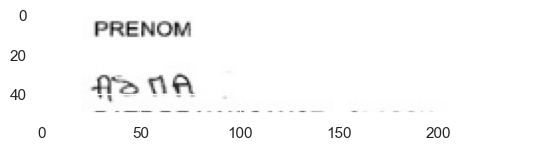

In [52]:
# show one image result of data
print("Text in image is : {}, and the result of Easy-OCR is {}".format(train_result_df["True_Value"][20], train_result_df["Easy_OCR_Result_Value"][20]))
plt.imshow(hand_written_names_train_images_list[20])

## Validation

In [53]:
# get text from validation handwritten images
val_hand_written_names_list = []
for i in tqdm(range(len(hand_written_names_val_images_list))):
    name = ocr_reader.readtext(hand_written_names_val_images_list[i])
    if len(name) !=0:
        val_hand_written_names_list.append(name[-1][1])
    else:
        val_hand_written_names_list.append("")

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:43<00:00,  4.55it/s]


In [54]:
# create dataframe of validation results
val_result_df = pd.DataFrame(hand_written_names_val_labels_df['FILENAME'])
val_result_df['True_Value'] = hand_written_names_val_labels_df['IDENTITY']
val_result_df['Easy_OCR_Result_Value'] = val_hand_written_names_list

In [55]:
# print 10 sample of data
val_result_df.sample(10)

FILENAME True_Value Easy_OCR_Result_Value
41   VALIDATION_0042.jpg    VIEILLE               Vii Lle
19   VALIDATION_0020.jpg   CELESTIN             HM: ((lit
36   VALIDATION_0037.jpg     MONSOH                1onSoh
199  VALIDATION_0200.jpg        JIM                PRENOM
157  VALIDATION_0158.jpg   TIMOTHEE     FHENH; Tj Hot HEc
32   VALIDATION_0033.jpg      MAONI                 MAOni
170  VALIDATION_0171.jpg    BINAULT             8i NAu lt
139  VALIDATION_0140.jpg     ELYCIA               ELYci 0
150  VALIDATION_0151.jpg       PIGA               P [ 6 A
195  VALIDATION_0196.jpg     ADRIEN         PhehH; #Drieu

Text in image is : DIBENEDETTO, and the result of Easy-OCR is Ji dene 0etto


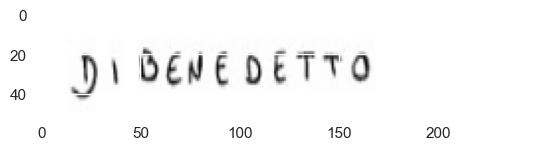

In [56]:
# show one image result of data
print("Text in image is : {}, and the result of Easy-OCR is {}".format(val_result_df["True_Value"][20], val_result_df["Easy_OCR_Result_Value"][20]))
plt.imshow(hand_written_names_val_images_list[20])

## Test

In [57]:
# get text from validation handwritten images
test_hand_written_names_list = []
for i in tqdm(range(len(hand_written_names_test_images_list))):
    name = ocr_reader.readtext(hand_written_names_test_images_list[i])
    if len(name) !=0:
        test_hand_written_names_list.append(name[-1][1])
    else:
        test_hand_written_names_list.append("")

100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [01:05<00:00,  4.58it/s]


In [58]:
# create dataframe of test results
test_result_df = pd.DataFrame(data = hand_written_names_test_labels_df['FILENAME'].iloc[:300])
test_result_df['True_Value'] = hand_written_names_test_labels_df['IDENTITY'].iloc[:300]
test_result_df['Easy_OCR_Result_Value'] = test_hand_written_names_list

In [59]:
# print 10 sample of data
test_result_df.sample(10)

FILENAME  True_Value Easy_OCR_Result_Value
113  TEST_0114.jpg        SAUX                  5huX
108  TEST_0109.jpg  FONTENILLE          Fomten|[ L e
214  TEST_0215.jpg       CHLOE                C4Lo e
202  TEST_0203.jpg       KEITA                 KEitA
68   TEST_0069.jpg      PARENT             Pa Re n t
157  TEST_0158.jpg  BIALKOWSKI       8 | A l ko WS k
195  TEST_0196.jpg          DO                   0 0
147  TEST_0148.jpg      AMICIE             F; VH'cik
172  TEST_0173.jpg       BADIN               040 i v
229  TEST_0230.jpg     STAKOVA               CjAkoVA

Text in image is : NAMIZATA FATIM, and the result of Easy-OCR is Ma hIzata FaTIM


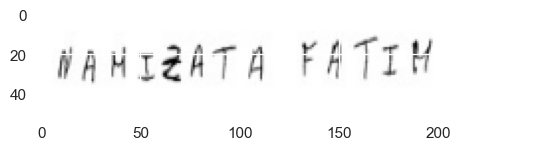

In [60]:
# show one image result of data
print("Text in image is : {}, and the result of Easy-OCR is {}".format(test_result_df["True_Value"][20], test_result_df["Easy_OCR_Result_Value"][20]))
plt.imshow(hand_written_names_test_images_list[20])

# Plot Model Summary

In [61]:
ann_viz(handwritten_model, title="HandWritten Text Recognition")

In [62]:
graph_source = Source.from_file('network.gv')

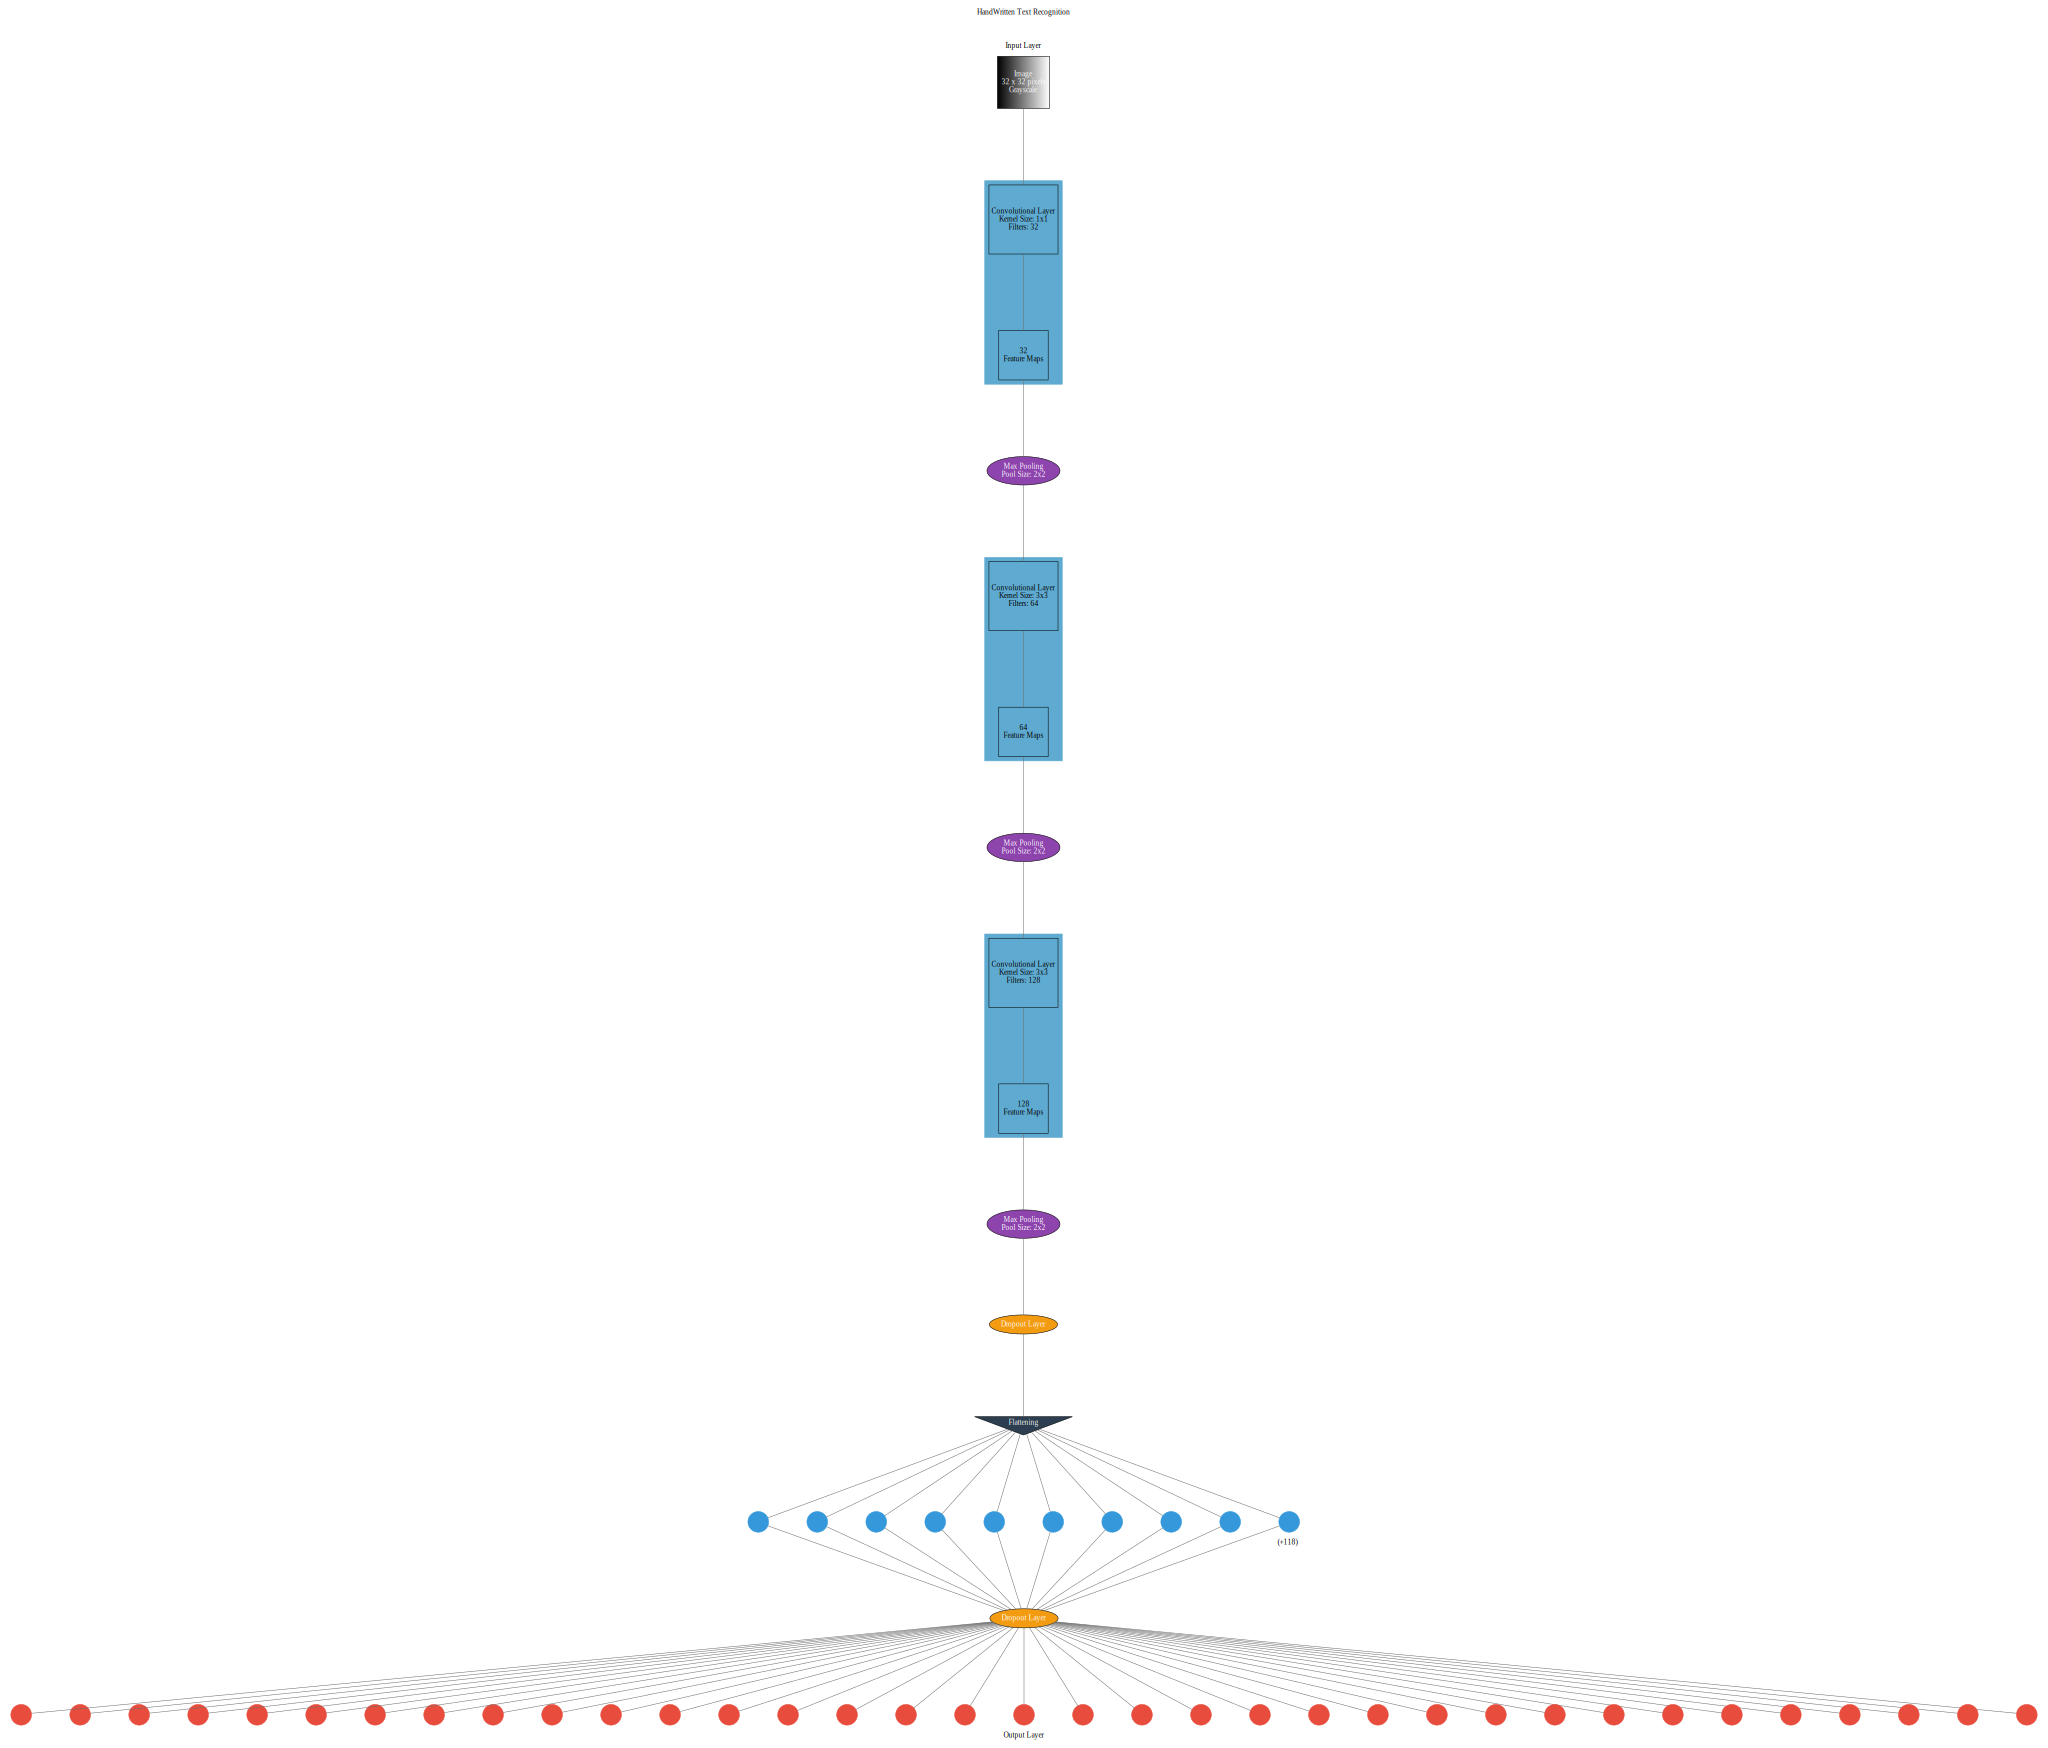

In [63]:
graph_source

# Update Strcture Of Our Model

In [66]:
# update handwritten neural network model
updated_handwritten_model = Sequential()

updated_handwritten_model.add(Conv2D(64, (1, 1), activation='leaky_relu', input_shape=(32,32,1)))
updated_handwritten_model.add(MaxPooling2D(pool_size=(2,2)))

updated_handwritten_model.add(Conv2D(128, (3, 3), activation='leaky_relu'))
updated_handwritten_model.add(MaxPooling2D(pool_size=(2,2)))

updated_handwritten_model.add(Conv2D(256, (3, 3), activation='leaky_relu'))
updated_handwritten_model.add(MaxPooling2D(pool_size=(2,2)))

updated_handwritten_model.add(BatchNormalization())

updated_handwritten_model.add(Dropout(0.25))

updated_handwritten_model.add(Flatten())

updated_handwritten_model.add(Dense(128, activation='leaky_relu'))

updated_handwritten_model.add(LayerNormalization())

updated_handwritten_model.add(Dropout(0.2))

updated_handwritten_model.add(Dense(35, activation='softmax'))

In [67]:
# print updated_handwritten_model model summary
updated_handwritten_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        128       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 5, 5, 256)         295168    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 256)       

In [68]:
# compile model
updated_handwritten_model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [69]:
# fit the model
updated_handwritten_model_history = updated_handwritten_model.fit(
    handwritten_train_X,
    handwritten_train_y, 
    epochs=15, 
    batch_size=32, 
    validation_data = (handwritten_validation_X, handwritten_validation_y),
    verbose=1
    )

Epoch 1/15
2565/2565 [==============================] - 196s 76ms/step - loss: 0.3930 - accuracy: 0.8778 - val_loss: 1.0267 - val_accuracy: 0.8348
Epoch 2/15
2565/2565 [==============================] - 191s 75ms/step - loss: 0.2365 - accuracy: 0.9194 - val_loss: 1.1467 - val_accuracy: 0.8261
Epoch 3/15
2565/2565 [==============================] - 191s 75ms/step - loss: 0.2085 - accuracy: 0.9270 - val_loss: 1.0533 - val_accuracy: 0.8547
Epoch 4/15
2565/2565 [==============================] - 191s 75ms/step - loss: 0.1889 - accuracy: 0.9337 - val_loss: 1.2134 - val_accuracy: 0.8194
Epoch 5/15
2565/2565 [==============================] - 191s 75ms/step - loss: 0.1768 - accuracy: 0.9371 - val_loss: 1.1792 - val_accuracy: 0.8488
Epoch 6/15
2565/2565 [==============================] - 191s 75ms/step - loss: 0.1653 - accuracy: 0.9399 - val_loss: 1.1292 - val_accuracy: 0.8535
Epoch 7/15
2565/2565 [==============================] - 192s 75ms/step - loss: 0.1577 - accuracy: 0.9425 - val_loss: 1

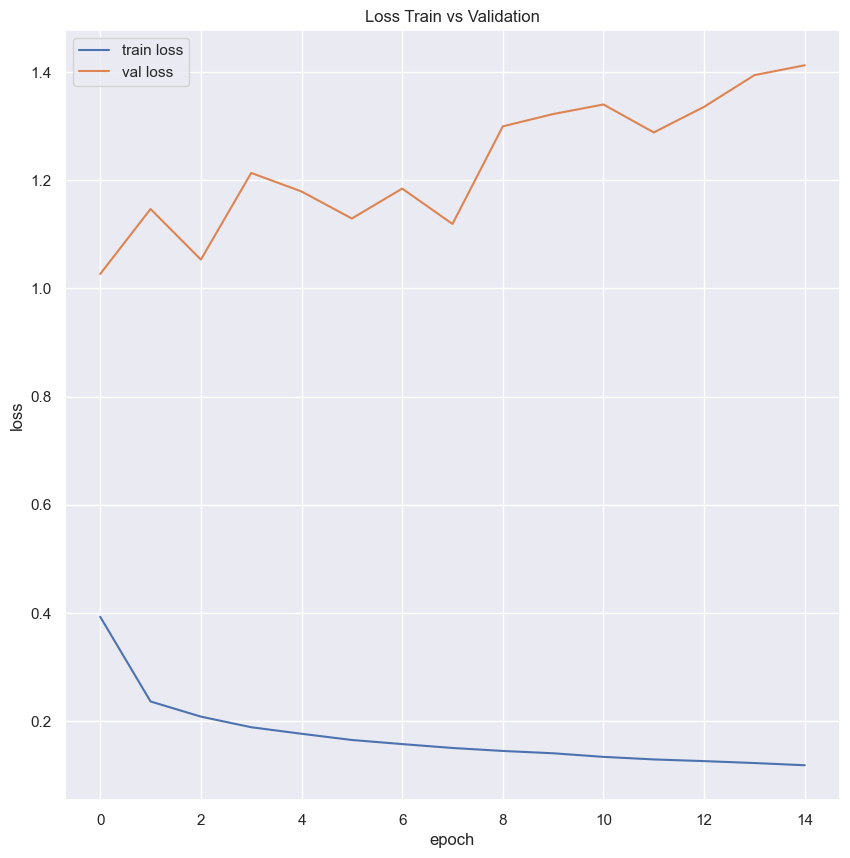

In [70]:
# plot loss
plot_loss_curve_for_train_and_test(updated_handwritten_model_history, "Loss Train vs Validation")

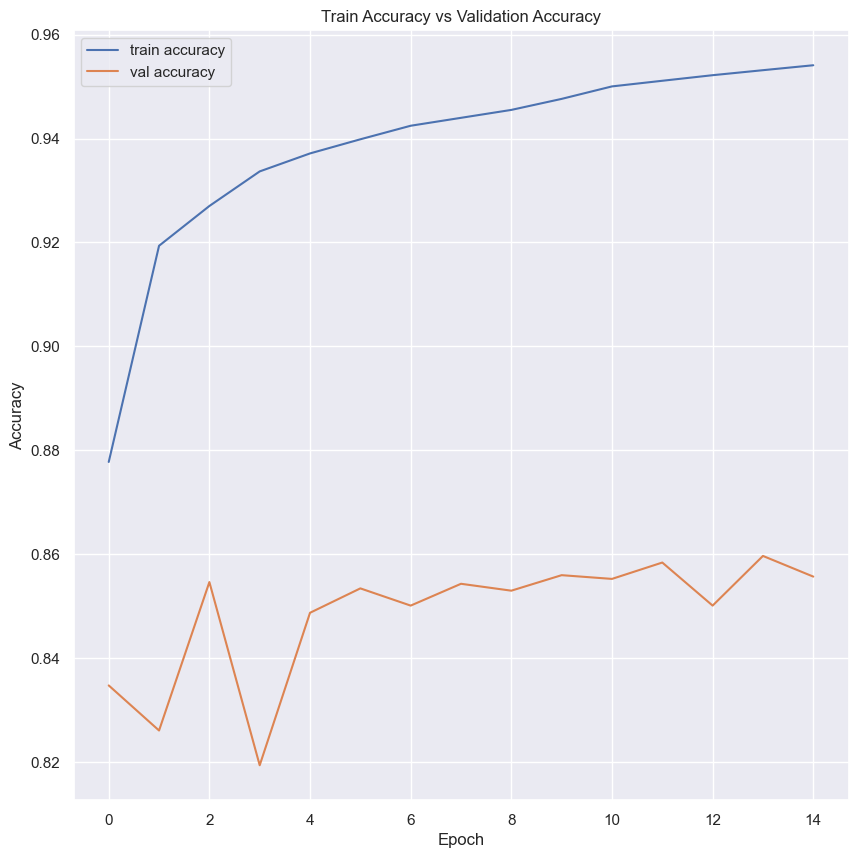

In [71]:
# plot accuracy
plot_accuracy_curve_for_train_and_test(updated_handwritten_model_history, "Train Accuracy vs Validation Accuracy")

In [72]:
# function to get letters
def get_letters_2(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        flag = False
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            flag = True
            
        if flag == False:
          continue

        if(type(x) != int):
          continue
        roi = gray[y: y+h, x: x+w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = updated_handwritten_model.predict(thresh)
        ypred = lb.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, image

1/1 [==============================] - 0s 19ms/step
LENF


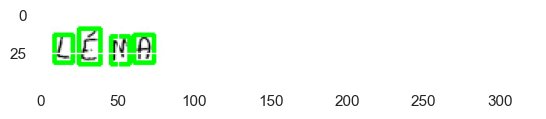

In [73]:
# test one image from names.
letter,image = get_letters_2("OCR_Dataset/Handwritten Names/test/test/TEST_0003.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

# SGD Optimizer

In [74]:
# update handwritten neural network model
updated_handwritten_model = Sequential()

updated_handwritten_model.add(Conv2D(64, (1, 1), activation='leaky_relu', input_shape=(32,32,1)))
updated_handwritten_model.add(MaxPooling2D(pool_size=(2,2)))

updated_handwritten_model.add(Conv2D(128, (3, 3), activation='leaky_relu'))
updated_handwritten_model.add(MaxPooling2D(pool_size=(2,2)))

updated_handwritten_model.add(Conv2D(256, (3, 3), activation='leaky_relu'))
updated_handwritten_model.add(MaxPooling2D(pool_size=(2,2)))

updated_handwritten_model.add(BatchNormalization())

updated_handwritten_model.add(Dropout(0.25))

updated_handwritten_model.add(Flatten())

updated_handwritten_model.add(Dense(128, activation='leaky_relu'))

updated_handwritten_model.add(LayerNormalization())

updated_handwritten_model.add(Dropout(0.2))

updated_handwritten_model.add(Dense(35, activation='softmax'))

In [75]:
# print updated_handwritten_model model summary
updated_handwritten_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        128       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 5, 5, 256)         295168    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 256)       

In [76]:
# compile model
updated_handwritten_model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(nesterov=True), metrics=['accuracy'])

In [77]:
# fit the model
updated_handwritten_model_history = updated_handwritten_model.fit(
    handwritten_train_X,
    handwritten_train_y, 
    epochs=15, 
    batch_size=32, 
    validation_data = (handwritten_validation_X, handwritten_validation_y),
    verbose=1
    )

Epoch 1/15
2565/2565 [==============================] - 189s 74ms/step - loss: 0.5743 - accuracy: 0.8336 - val_loss: 0.9286 - val_accuracy: 0.8113
Epoch 2/15
2565/2565 [==============================] - 184s 72ms/step - loss: 0.3126 - accuracy: 0.9001 - val_loss: 0.9199 - val_accuracy: 0.8243
Epoch 3/15
2565/2565 [==============================] - 185s 72ms/step - loss: 0.2628 - accuracy: 0.9142 - val_loss: 0.9488 - val_accuracy: 0.8252
Epoch 4/15
2565/2565 [==============================] - 185s 72ms/step - loss: 0.2343 - accuracy: 0.9212 - val_loss: 0.9151 - val_accuracy: 0.8399
Epoch 5/15
2565/2565 [==============================] - 181s 70ms/step - loss: 0.2173 - accuracy: 0.9272 - val_loss: 0.9655 - val_accuracy: 0.8473
Epoch 6/15
2565/2565 [==============================] - 181s 71ms/step - loss: 0.2039 - accuracy: 0.9302 - val_loss: 0.9306 - val_accuracy: 0.8480
Epoch 7/15
2565/2565 [==============================] - 180s 70ms/step - loss: 0.1950 - accuracy: 0.9329 - val_loss: 0

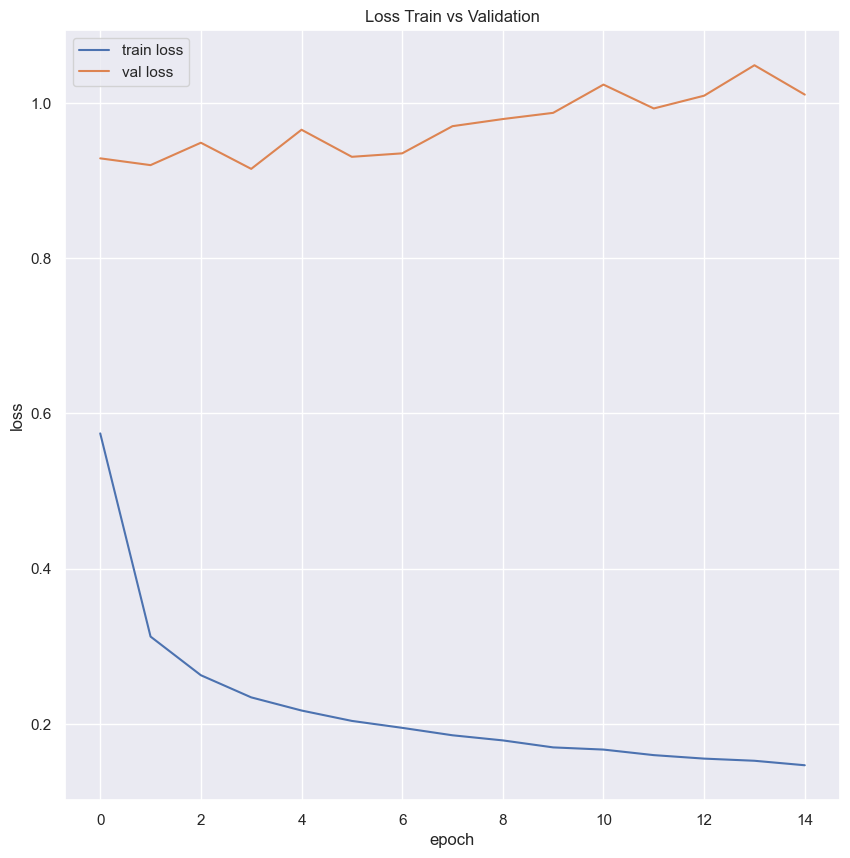

In [78]:
# plot loss
plot_loss_curve_for_train_and_test(updated_handwritten_model_history, "Loss Train vs Validation")

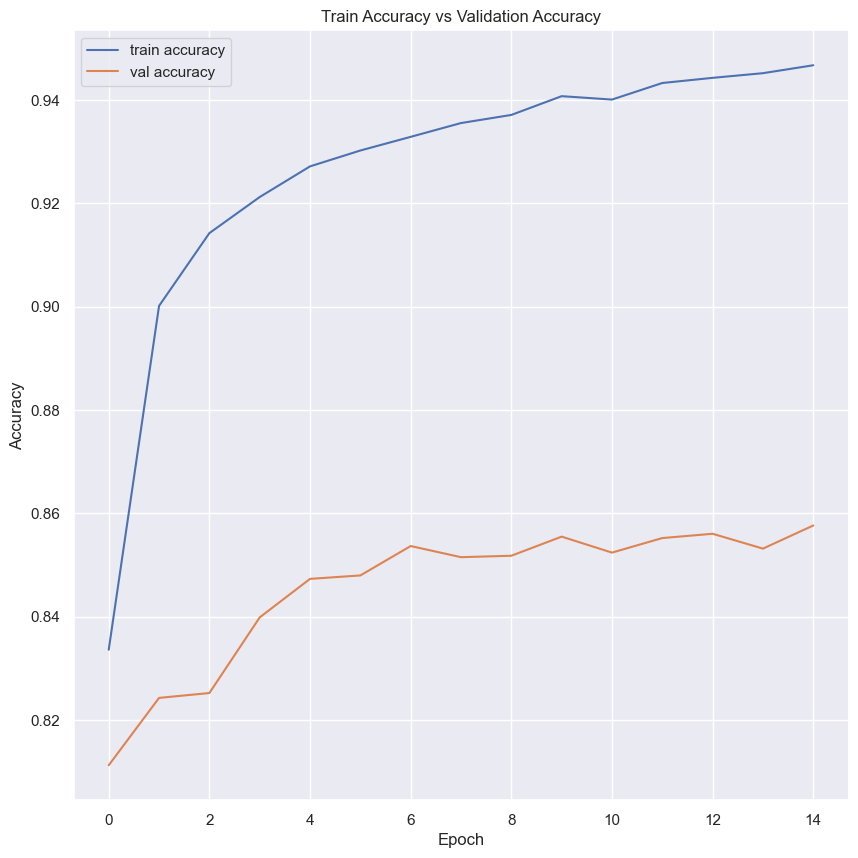

In [79]:
# plot accuracy
plot_accuracy_curve_for_train_and_test(updated_handwritten_model_history, "Train Accuracy vs Validation Accuracy")

1/1 [==============================] - 0s 19ms/step
LENA


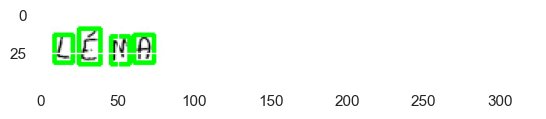

In [80]:
# test one image from names.
letter,image = get_letters_2("OCR_Dataset/Handwritten Names/test/test/TEST_0003.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

# Compare SGD and ADAM Optimizers

In [136]:
# initialize parameters
optimizers = ['SGD', 'Adam']
optimizers_mean_accuracy = [
    np.mean(updated_handwritten_model_history.history['accuracy']),
    np.mean(handwritten_model_history.history['accuracy'])
]

In [137]:
# plot figure
px.bar(x=optimizers, y=optimizers_mean_accuracy, color=optimizers, title="SGD vs Adam").update_layout(
    xaxis_title="Optimizers", 
    yaxis_title="Mean Accuracy"
)

# Tune Learning Rate using Adam Optimizer

In [81]:
# function to build a model
def build_model():
    updated_handwritten_model = Sequential()

    updated_handwritten_model.add(Conv2D(64, (1, 1), activation='leaky_relu', input_shape=(32,32,1)))
    updated_handwritten_model.add(MaxPooling2D(pool_size=(2,2)))

    updated_handwritten_model.add(Conv2D(128, (3, 3), activation='leaky_relu'))
    updated_handwritten_model.add(MaxPooling2D(pool_size=(2,2)))

    updated_handwritten_model.add(Conv2D(256, (3, 3), activation='leaky_relu'))
    updated_handwritten_model.add(MaxPooling2D(pool_size=(2,2)))

    updated_handwritten_model.add(BatchNormalization())

    updated_handwritten_model.add(Dropout(0.25))

    updated_handwritten_model.add(Flatten())

    updated_handwritten_model.add(Dense(128, activation='leaky_relu'))

    updated_handwritten_model.add(LayerNormalization())

    updated_handwritten_model.add(Dropout(0.2))

    updated_handwritten_model.add(Dense(35, activation='softmax'))
    
    return updated_handwritten_model

In [82]:
# function to fit the model
def fit_model(model, learning_rate):
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])
    # fit the model
    model_history = model.fit(
        handwritten_train_X,
        handwritten_train_y, 
        epochs=15, 
        batch_size=32, 
        validation_data = (handwritten_validation_X, handwritten_validation_y),
        verbose=1
        )
    return model_history

In [83]:
learning_rates = [0.1, 0.01, 0.3, 0.03, 0.9, 0.09]
list_of_histories = []
for i in tqdm(learning_rates):
    model = build_model()
    list_of_histories.append(fit_model(model, i))

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

Epoch 1/15
2565/2565 [==============================] - 173s 67ms/step - loss: 1.2227 - accuracy: 0.7608 - val_loss: 3.7994 - val_accuracy: 0.7197
Epoch 2/15
2565/2565 [==============================] - 167s 65ms/step - loss: 1.1900 - accuracy: 0.8293 - val_loss: 4.2224 - val_accuracy: 0.7826
Epoch 3/15
2565/2565 [==============================] - 167s 65ms/step - loss: 1.1502 - accuracy: 0.8500 - val_loss: 6.4917 - val_accuracy: 0.8093
Epoch 4/15
2565/2565 [==============================] - 168s 65ms/step - loss: 1.1581 - accuracy: 0.8637 - val_loss: 5.1660 - val_accuracy: 0.7813
Epoch 5/15
2565/2565 [==============================] - 166s 65ms/step - loss: 1.1757 - accuracy: 0.8704 - val_loss: 4.9011 - val_accuracy: 0.7496
Epoch 6/15
2565/2565 [==============================] - 164s 64ms/step - loss: 1.1214 - accuracy: 0.8794 - val_loss: 6.0268 - val_accuracy: 0.8103
Epoch 7/15
2565/2565 [==============================] - 164s 64ms/step - loss: 1.1777 - accuracy: 0.8823 - val_loss: 6

 17%|█████████████▎                                                                  | 1/6 [41:23<3:26:55, 2483.11s/it]

Epoch 1/15
2565/2565 [==============================] - 157s 61ms/step - loss: 0.4276 - accuracy: 0.8642 - val_loss: 1.1321 - val_accuracy: 0.8214
Epoch 2/15
2565/2565 [==============================] - 151s 59ms/step - loss: 0.2754 - accuracy: 0.9078 - val_loss: 1.0849 - val_accuracy: 0.8199
Epoch 3/15
2565/2565 [==============================] - 152s 59ms/step - loss: 0.2476 - accuracy: 0.9161 - val_loss: 1.2264 - val_accuracy: 0.8279
Epoch 4/15
2565/2565 [==============================] - 152s 59ms/step - loss: 0.2263 - accuracy: 0.9226 - val_loss: 1.2693 - val_accuracy: 0.8018
Epoch 5/15
2565/2565 [==============================] - 152s 59ms/step - loss: 0.2144 - accuracy: 0.9256 - val_loss: 1.2443 - val_accuracy: 0.8371
Epoch 6/15
2565/2565 [==============================] - 152s 59ms/step - loss: 0.2017 - accuracy: 0.9295 - val_loss: 1.3233 - val_accuracy: 0.8447
Epoch 7/15
2565/2565 [==============================] - 152s 59ms/step - loss: 0.1937 - accuracy: 0.9318 - val_loss: 1

 33%|██████████████████████████                                                    | 2/6 [1:19:25<2:37:39, 2364.89s/it]

Epoch 1/15
2565/2565 [==============================] - 146s 57ms/step - loss: 7.4045 - accuracy: 0.6978 - val_loss: 37.0856 - val_accuracy: 0.6044
Epoch 2/15
2565/2565 [==============================] - 139s 54ms/step - loss: 9.0134 - accuracy: 0.8128 - val_loss: 23.5312 - val_accuracy: 0.7171
Epoch 3/15
2565/2565 [==============================] - 140s 55ms/step - loss: 9.7782 - accuracy: 0.8368 - val_loss: 49.4918 - val_accuracy: 0.7348
Epoch 4/15
2565/2565 [==============================] - 139s 54ms/step - loss: 9.2645 - accuracy: 0.8547 - val_loss: 39.9339 - val_accuracy: 0.7290
Epoch 5/15
2565/2565 [==============================] - 139s 54ms/step - loss: 9.4496 - accuracy: 0.8631 - val_loss: 53.0583 - val_accuracy: 0.8121
Epoch 6/15
2565/2565 [==============================] - 140s 54ms/step - loss: 9.7935 - accuracy: 0.8680 - val_loss: 49.7489 - val_accuracy: 0.8024
Epoch 7/15
2565/2565 [==============================] - 139s 54ms/step - loss: 9.6297 - accuracy: 0.8768 - val_l

 50%|███████████████████████████████████████                                       | 3/6 [1:54:16<1:51:59, 2239.92s/it]

Epoch 1/15
2565/2565 [==============================] - 137s 53ms/step - loss: 0.5256 - accuracy: 0.8400 - val_loss: 1.2528 - val_accuracy: 0.8160
Epoch 2/15
2565/2565 [==============================] - 132s 51ms/step - loss: 0.3788 - accuracy: 0.8853 - val_loss: 1.6363 - val_accuracy: 0.7885
Epoch 3/15
2565/2565 [==============================] - 132s 51ms/step - loss: 0.3420 - accuracy: 0.8951 - val_loss: 1.3311 - val_accuracy: 0.8295
Epoch 4/15
2565/2565 [==============================] - 132s 51ms/step - loss: 0.3234 - accuracy: 0.9011 - val_loss: 1.6324 - val_accuracy: 0.8235
Epoch 5/15
2565/2565 [==============================] - 132s 51ms/step - loss: 0.3084 - accuracy: 0.9070 - val_loss: 1.5687 - val_accuracy: 0.8048
Epoch 6/15
2565/2565 [==============================] - 132s 51ms/step - loss: 0.2916 - accuracy: 0.9116 - val_loss: 1.9012 - val_accuracy: 0.8483
Epoch 7/15
2565/2565 [==============================] - 132s 51ms/step - loss: 0.2843 - accuracy: 0.9154 - val_loss: 1

 67%|████████████████████████████████████████████████████                          | 4/6 [2:27:23<1:11:20, 2140.10s/it]

Epoch 1/15
2565/2565 [==============================] - 129s 50ms/step - loss: 69.2908 - accuracy: 0.6970 - val_loss: 266.6628 - val_accuracy: 0.6977
Epoch 2/15
2565/2565 [==============================] - 126s 49ms/step - loss: 82.6566 - accuracy: 0.8195 - val_loss: 320.6879 - val_accuracy: 0.7706
Epoch 3/15
2565/2565 [==============================] - 126s 49ms/step - loss: 88.7762 - accuracy: 0.8434 - val_loss: 388.5760 - val_accuracy: 0.7589
Epoch 4/15
2565/2565 [==============================] - 126s 49ms/step - loss: 89.4545 - accuracy: 0.8556 - val_loss: 335.1973 - val_accuracy: 0.8058
Epoch 5/15
2565/2565 [==============================] - 126s 49ms/step - loss: 87.4481 - accuracy: 0.8647 - val_loss: 485.5009 - val_accuracy: 0.7953
Epoch 6/15
2565/2565 [==============================] - 126s 49ms/step - loss: 91.2537 - accuracy: 0.8709 - val_loss: 487.6845 - val_accuracy: 0.8063
Epoch 7/15
2565/2565 [==============================] - 126s 49ms/step - loss: 88.9250 - accuracy: 0

 83%|██████████████████████████████████████████████████████████████████▋             | 5/6 [2:58:47<34:07, 2047.86s/it]

Epoch 1/15
2565/2565 [==============================] - 124s 48ms/step - loss: 1.0446 - accuracy: 0.7745 - val_loss: 4.2152 - val_accuracy: 0.7530
Epoch 2/15
2565/2565 [==============================] - 125s 49ms/step - loss: 1.0030 - accuracy: 0.8362 - val_loss: 4.1712 - val_accuracy: 0.7687
Epoch 3/15
2565/2565 [==============================] - 125s 49ms/step - loss: 0.9734 - accuracy: 0.8539 - val_loss: 5.5130 - val_accuracy: 0.7374
Epoch 4/15
2565/2565 [==============================] - 125s 49ms/step - loss: 0.9038 - accuracy: 0.8667 - val_loss: 4.6203 - val_accuracy: 0.7986
Epoch 5/15
2565/2565 [==============================] - 125s 49ms/step - loss: 0.9963 - accuracy: 0.8724 - val_loss: 4.6626 - val_accuracy: 0.7725
Epoch 6/15
2565/2565 [==============================] - 125s 49ms/step - loss: 0.9441 - accuracy: 0.8804 - val_loss: 6.0004 - val_accuracy: 0.8092
Epoch 7/15
2565/2565 [==============================] - 125s 49ms/step - loss: 0.9576 - accuracy: 0.8844 - val_loss: 4

100%|████████████████████████████████████████████████████████████████████████████████| 6/6 [3:29:58<00:00, 2099.69s/it]


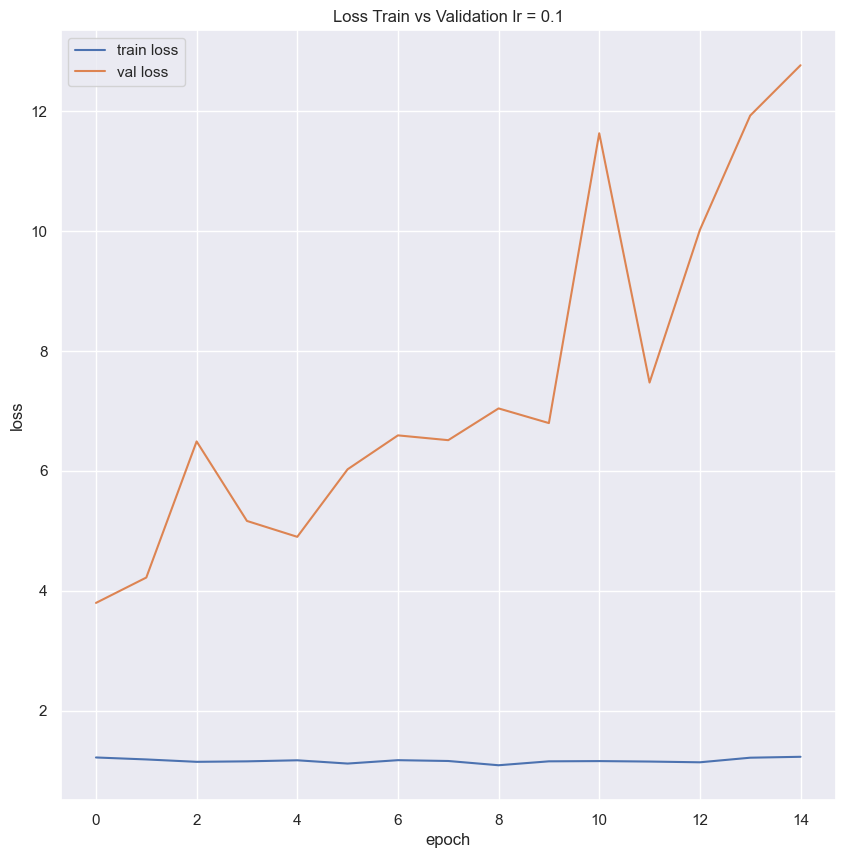

In [108]:
# loss when lr = 0.1
plot_loss_curve_for_train_and_test(list_of_histories[0], "Loss Train vs Validation lr = 0.1")

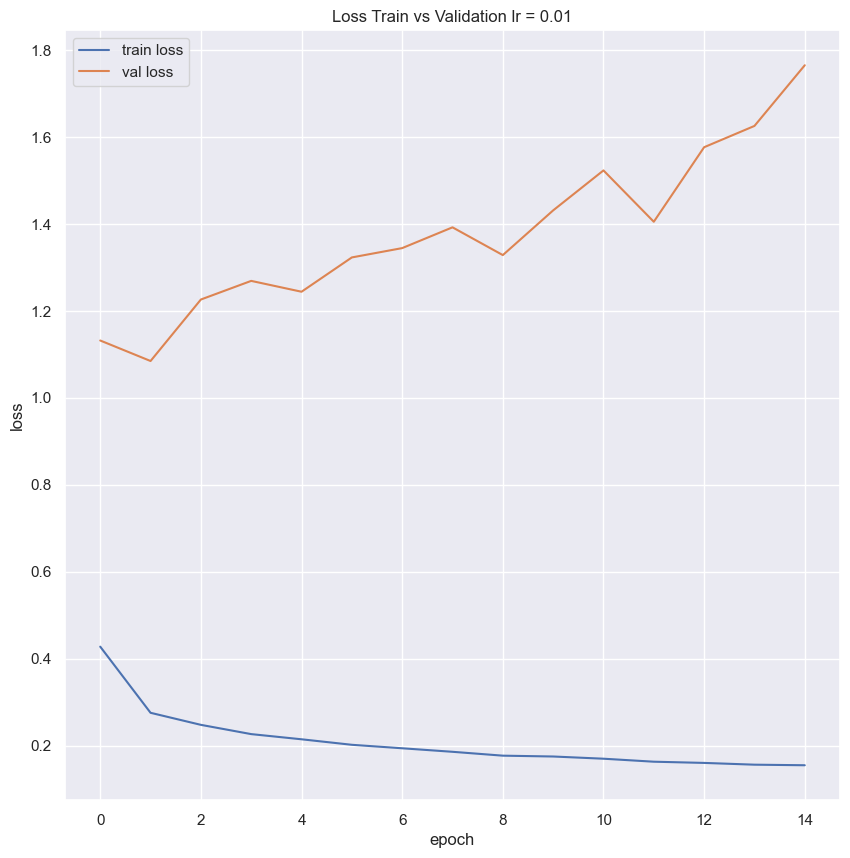

In [107]:
# loss when lr = 0.01
plot_loss_curve_for_train_and_test(list_of_histories[1], "Loss Train vs Validation lr = 0.01")

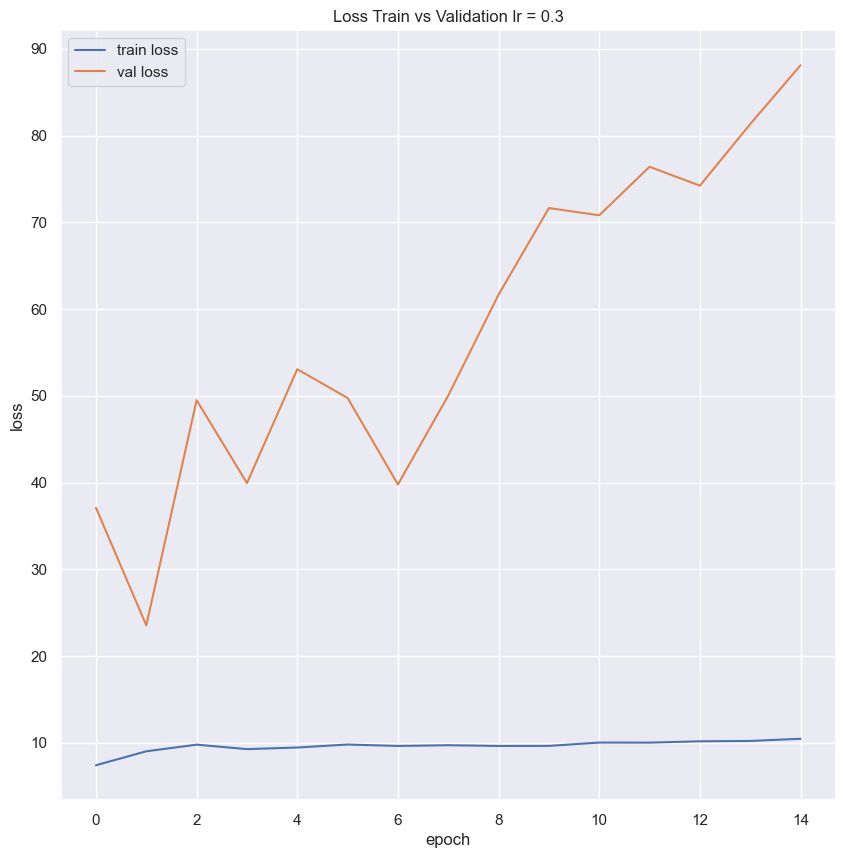

In [106]:
# loss when lr = 0.3
plot_loss_curve_for_train_and_test(list_of_histories[2], "Loss Train vs Validation lr = 0.3")

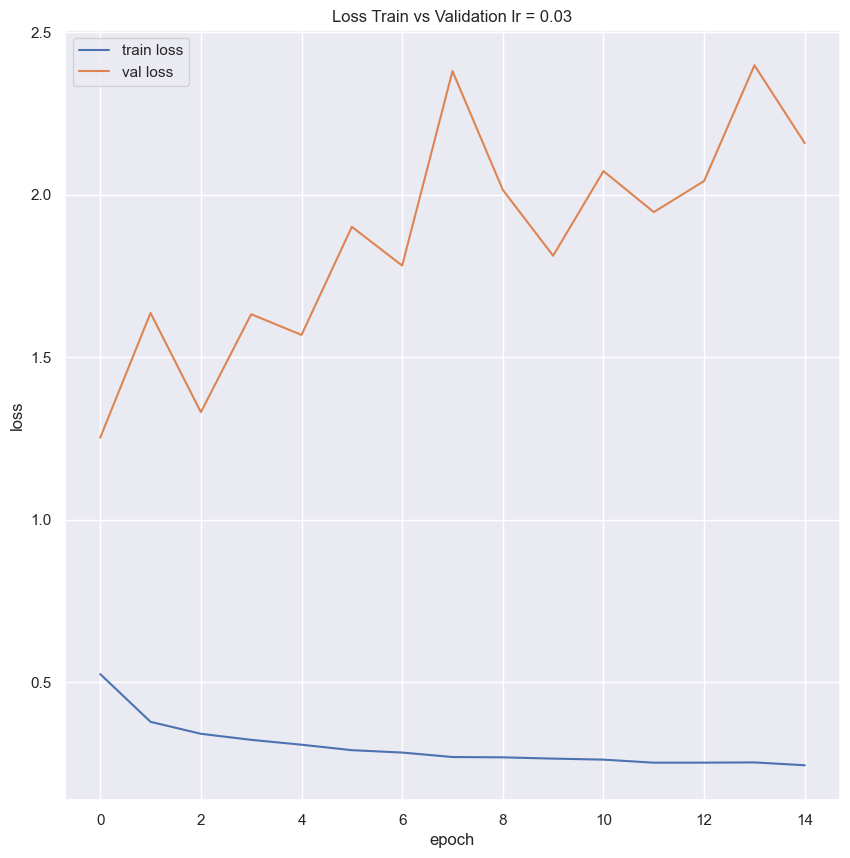

In [105]:
# loss when lr = 0.03
plot_loss_curve_for_train_and_test(list_of_histories[3], "Loss Train vs Validation lr = 0.03")

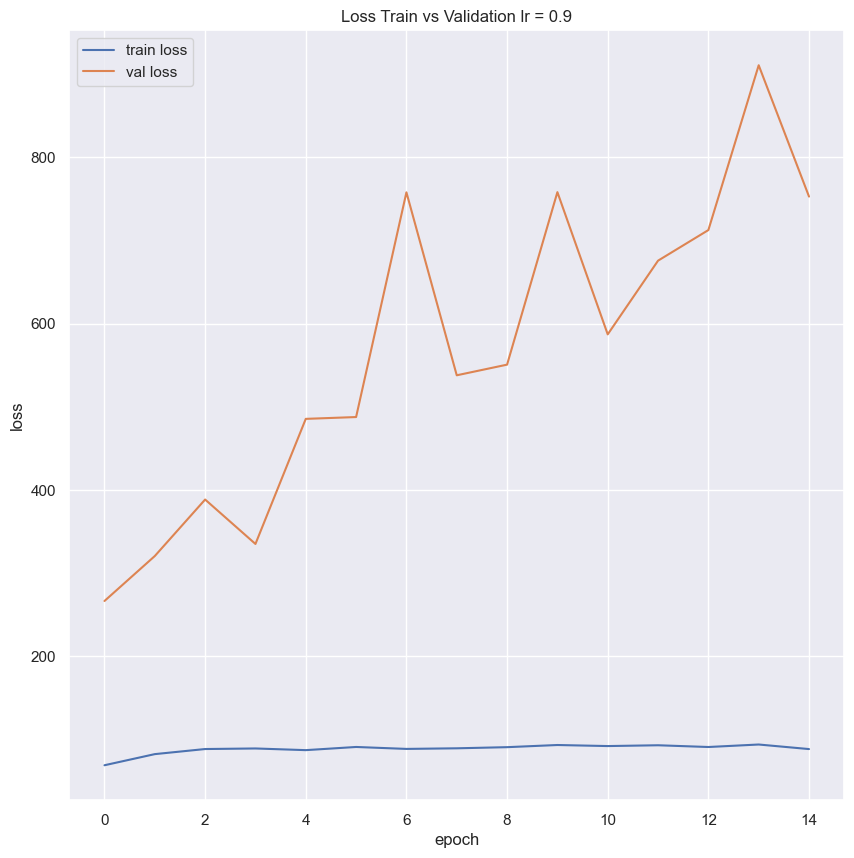

In [104]:
# loss when lr = 0.9
plot_loss_curve_for_train_and_test(list_of_histories[4], "Loss Train vs Validation lr = 0.9")

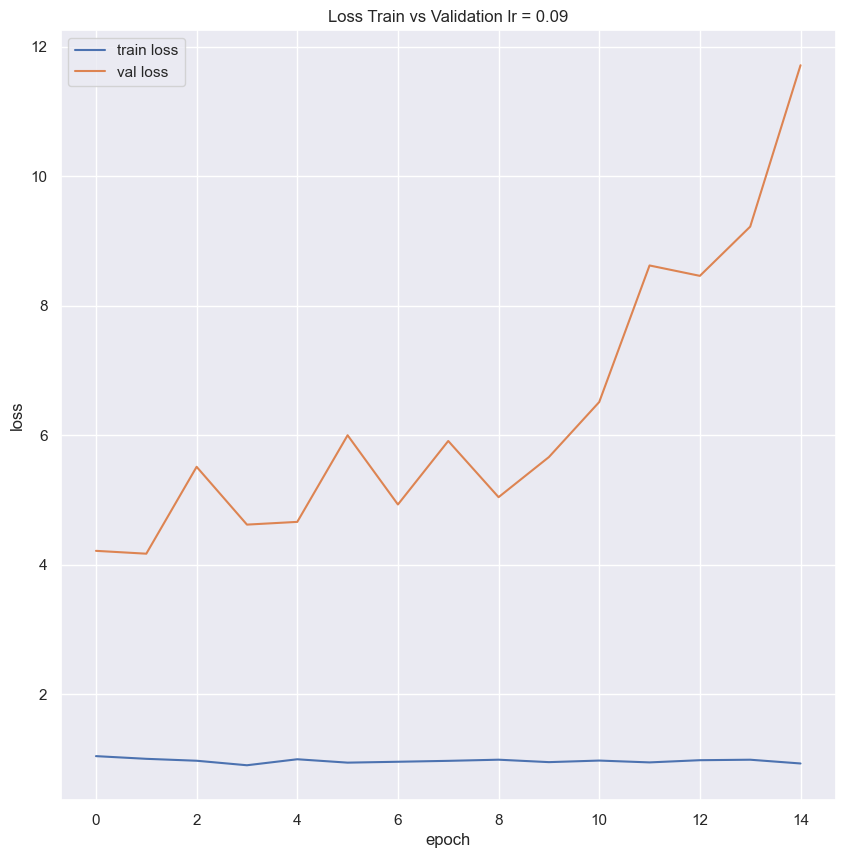

In [109]:
# loss when lr = 0.09
plot_loss_curve_for_train_and_test(list_of_histories[5], "Loss Train vs Validation lr = 0.09")

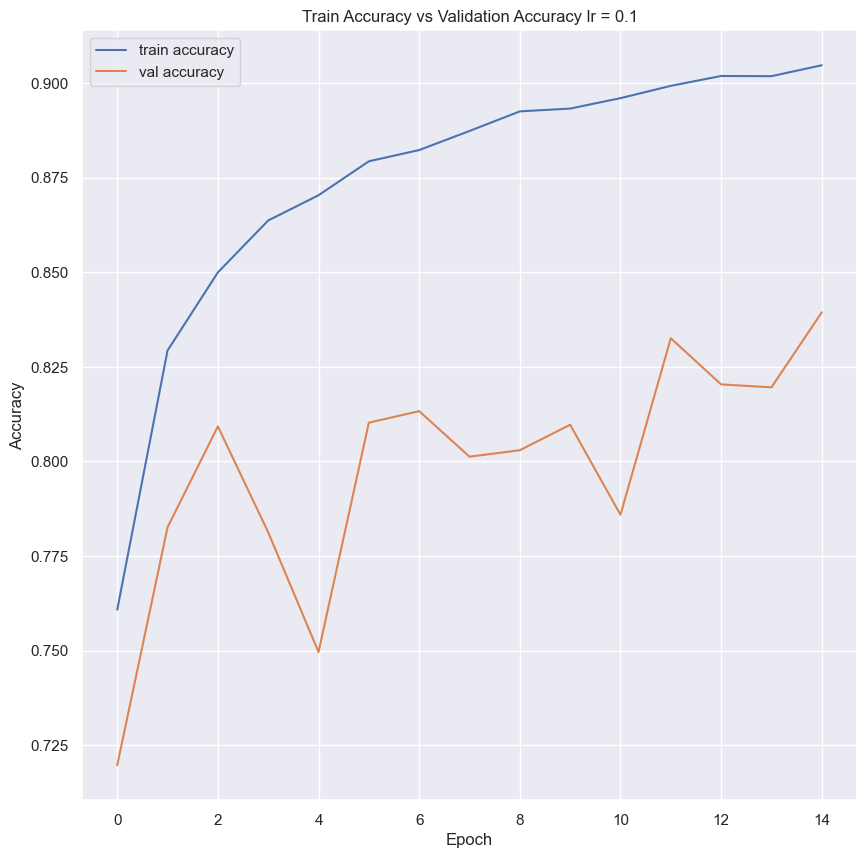

In [102]:
# plot accuracy when lr = 0.1
plot_accuracy_curve_for_train_and_test(list_of_histories[0], "Train Accuracy vs Validation Accuracy lr = 0.1")

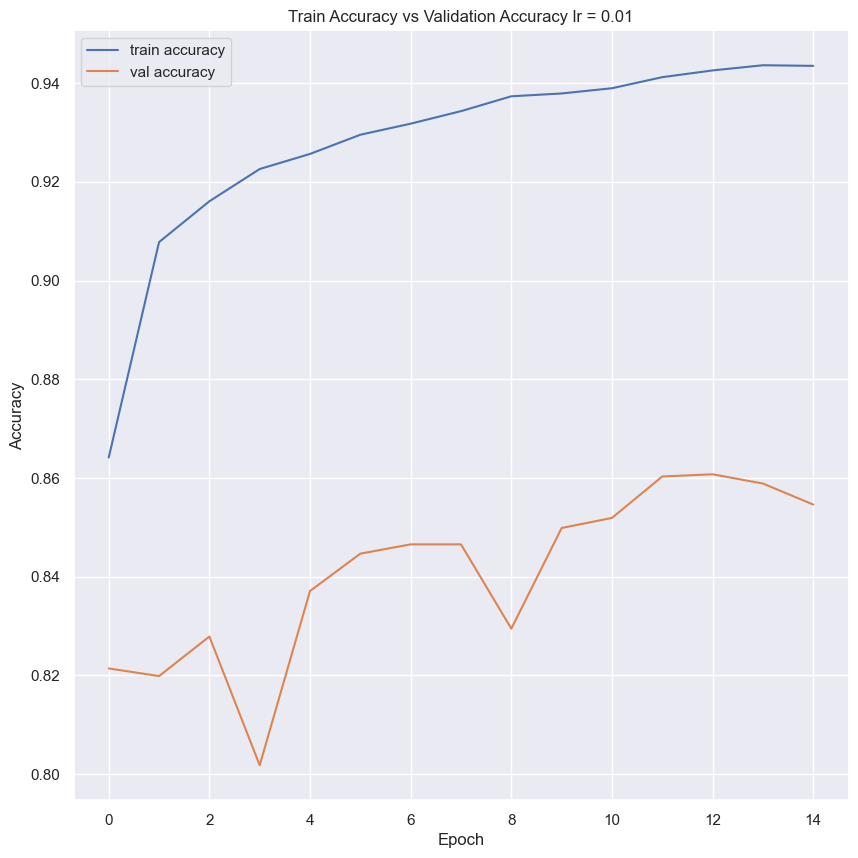

In [101]:
# plot accuracy when lr = 0.01
plot_accuracy_curve_for_train_and_test(list_of_histories[1], "Train Accuracy vs Validation Accuracy lr = 0.01")

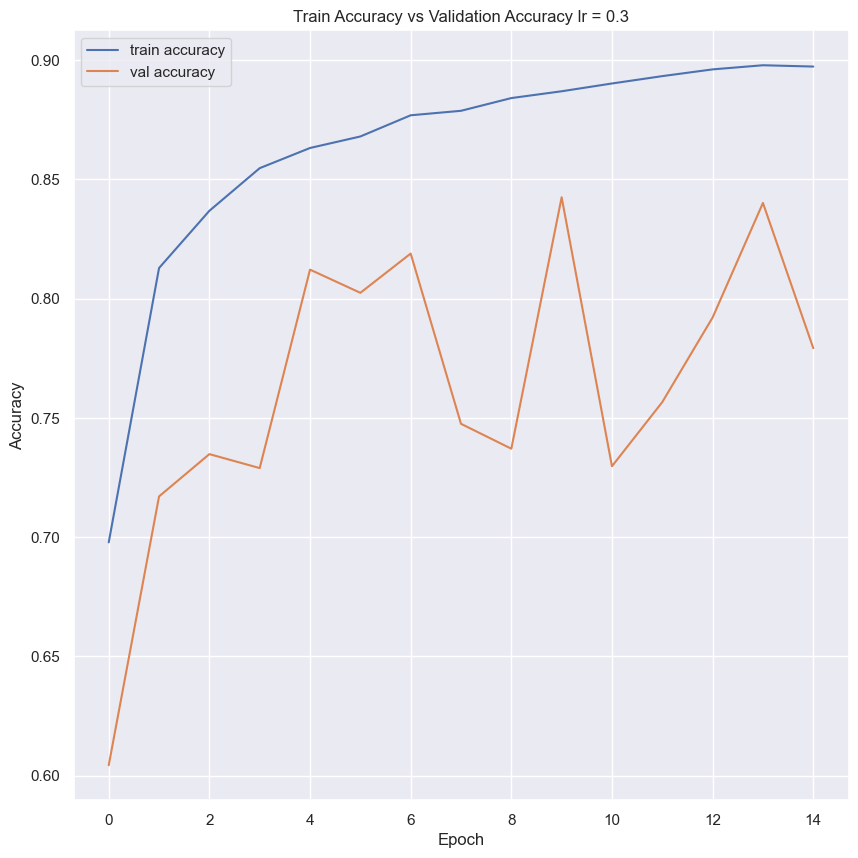

In [100]:
# plot accuracy when lr = 0.3
plot_accuracy_curve_for_train_and_test(list_of_histories[2], "Train Accuracy vs Validation Accuracy lr = 0.3")

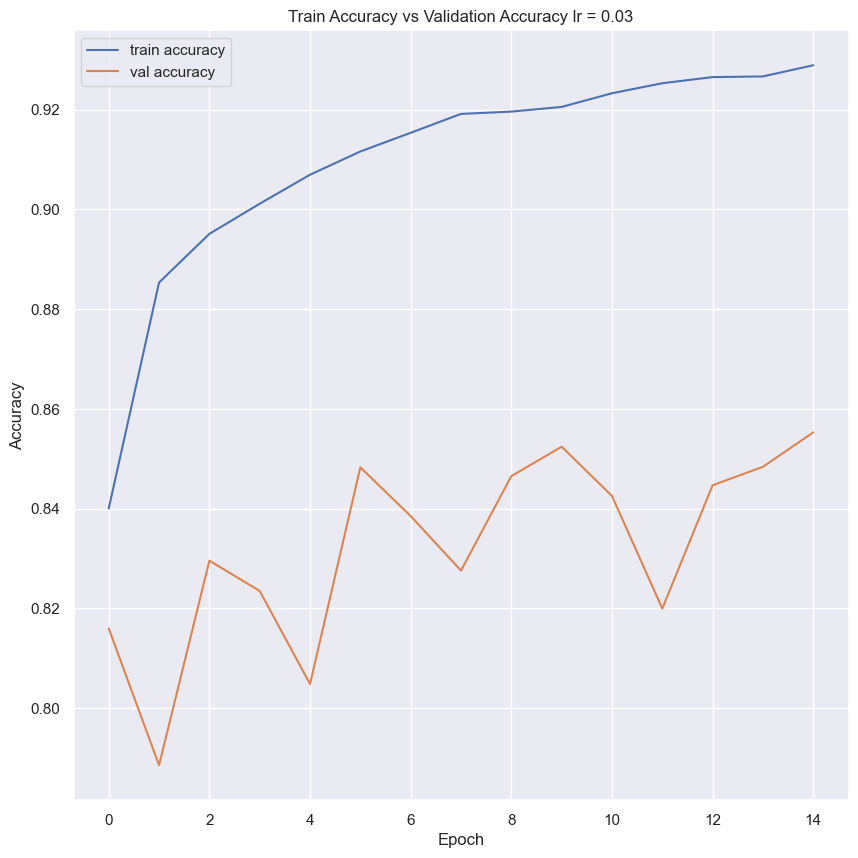

In [99]:
# plot accuracy when lr = 0.03
plot_accuracy_curve_for_train_and_test(list_of_histories[3], "Train Accuracy vs Validation Accuracy lr = 0.03")

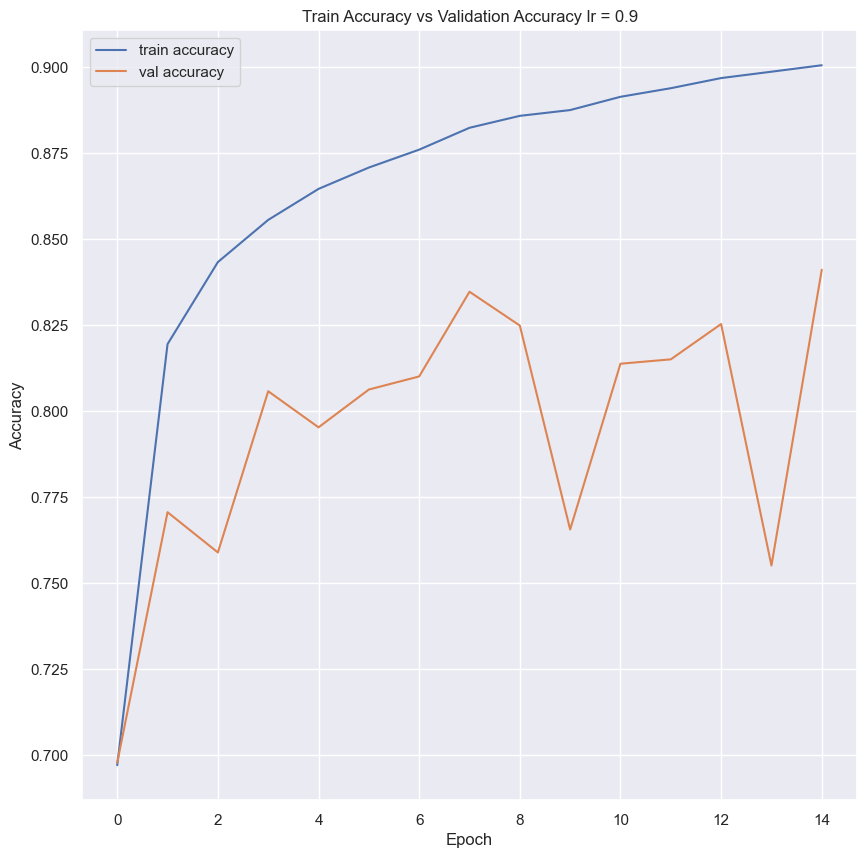

In [98]:
# plot accuracy when lr = 0.9
plot_accuracy_curve_for_train_and_test(list_of_histories[4], "Train Accuracy vs Validation Accuracy lr = 0.9")

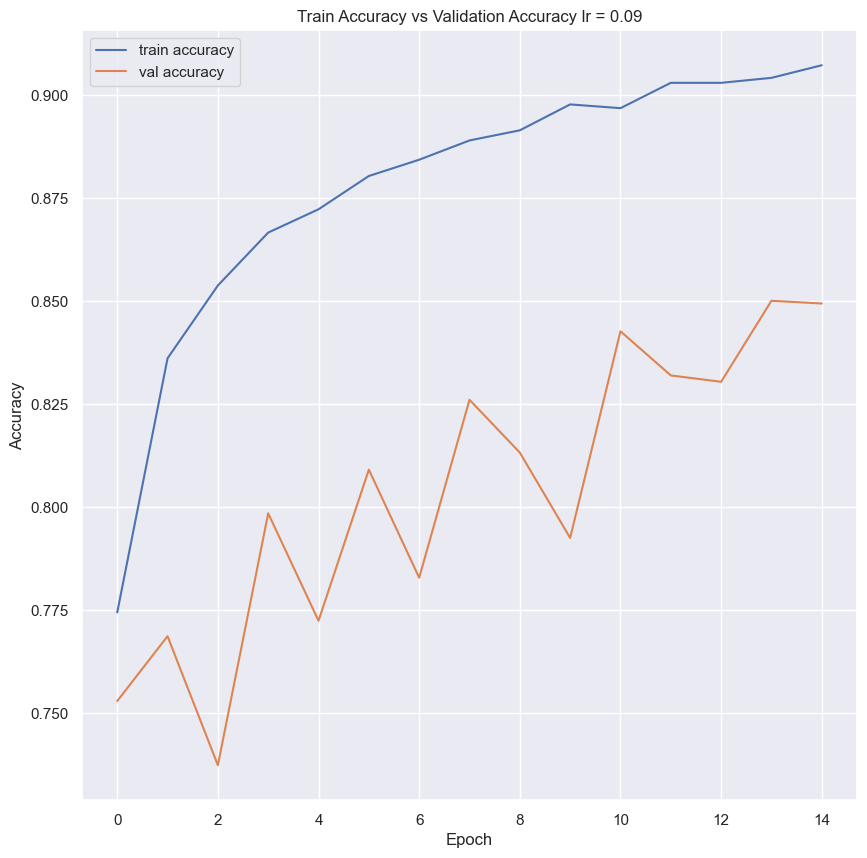

In [97]:
# plot accuracy when lr = 0.09
plot_accuracy_curve_for_train_and_test(list_of_histories[5], "Train Accuracy vs Validation Accuracy lr = 0.09")

# Compare Between Mean Accuracy For Each Model

In [127]:
# initialize parameters
models_list = ['0.1', '0.01', '0.3', '0.03', '0.9', '0.09']
mean_accuracy_list = [
    np.mean(list_of_histories[0].history['accuracy']),
    np.mean(list_of_histories[1].history['accuracy']),
    np.mean(list_of_histories[2].history['accuracy']),
    np.mean(list_of_histories[3].history['accuracy']),
    np.mean(list_of_histories[4].history['accuracy']),
    np.mean(list_of_histories[5].history['accuracy'])
]

In [131]:
# plot figure
px.bar(x=models_list, y=mean_accuracy_list, color=models_list, title="Mean Accuracy").update_layout(
    xaxis_title="Models", 
    yaxis_title="Mean Accuracy"
)

# Update Handwritten Model Model

In [96]:
# Create the best model using adam optimizer and learning rate of 0.01
updated_model = build_model()
updated_model_history = fit_model(updated_model, 0.01)

Epoch 1/15
2565/2565 [==============================] - 125s 48ms/step - loss: 0.4186 - accuracy: 0.8679 - val_loss: 1.1005 - val_accuracy: 0.8103
Epoch 2/15
2565/2565 [==============================] - 125s 49ms/step - loss: 0.2756 - accuracy: 0.9087 - val_loss: 1.1067 - val_accuracy: 0.8377
Epoch 3/15
2565/2565 [==============================] - 125s 49ms/step - loss: 0.2444 - accuracy: 0.9167 - val_loss: 1.1064 - val_accuracy: 0.8372
Epoch 4/15
2565/2565 [==============================] - 125s 49ms/step - loss: 0.2268 - accuracy: 0.9218 - val_loss: 1.2277 - val_accuracy: 0.8389
Epoch 5/15
2565/2565 [==============================] - 125s 49ms/step - loss: 0.2138 - accuracy: 0.9265 - val_loss: 1.1613 - val_accuracy: 0.8540
Epoch 6/15
2565/2565 [==============================] - 125s 49ms/step - loss: 0.2009 - accuracy: 0.9292 - val_loss: 1.2801 - val_accuracy: 0.8294
Epoch 7/15
2565/2565 [==============================] - 125s 49ms/step - loss: 0.1920 - accuracy: 0.9331 - val_loss: 1

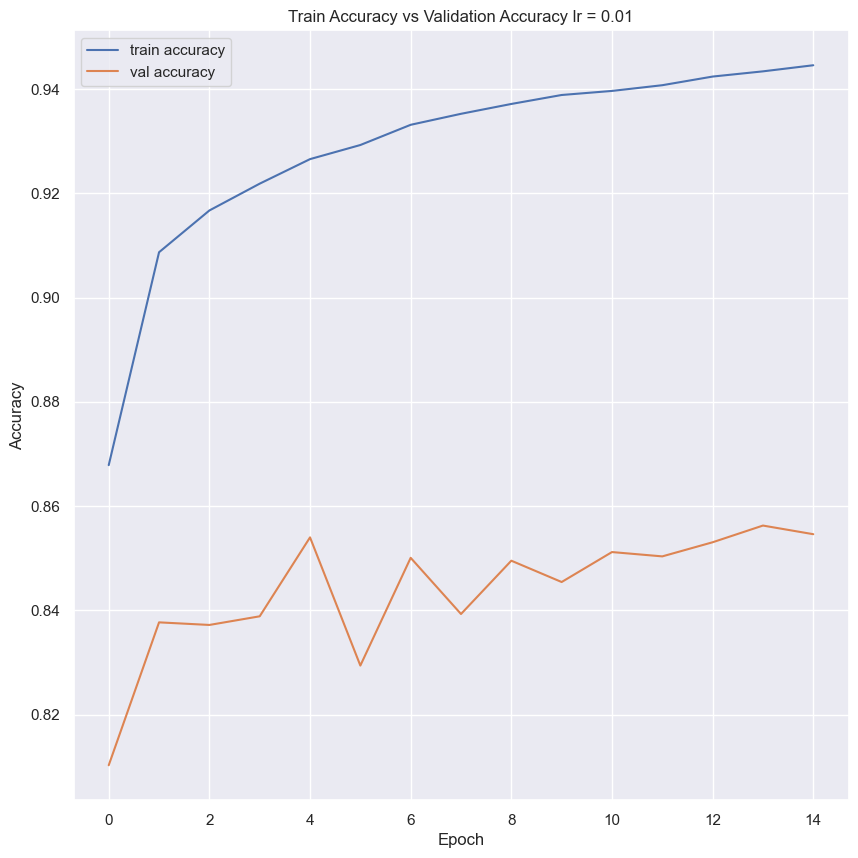

In [118]:
# plot accuracy when lr = 0.01
plot_accuracy_curve_for_train_and_test(updated_model_history, "Train Accuracy vs Validation Accuracy lr = 0.01")

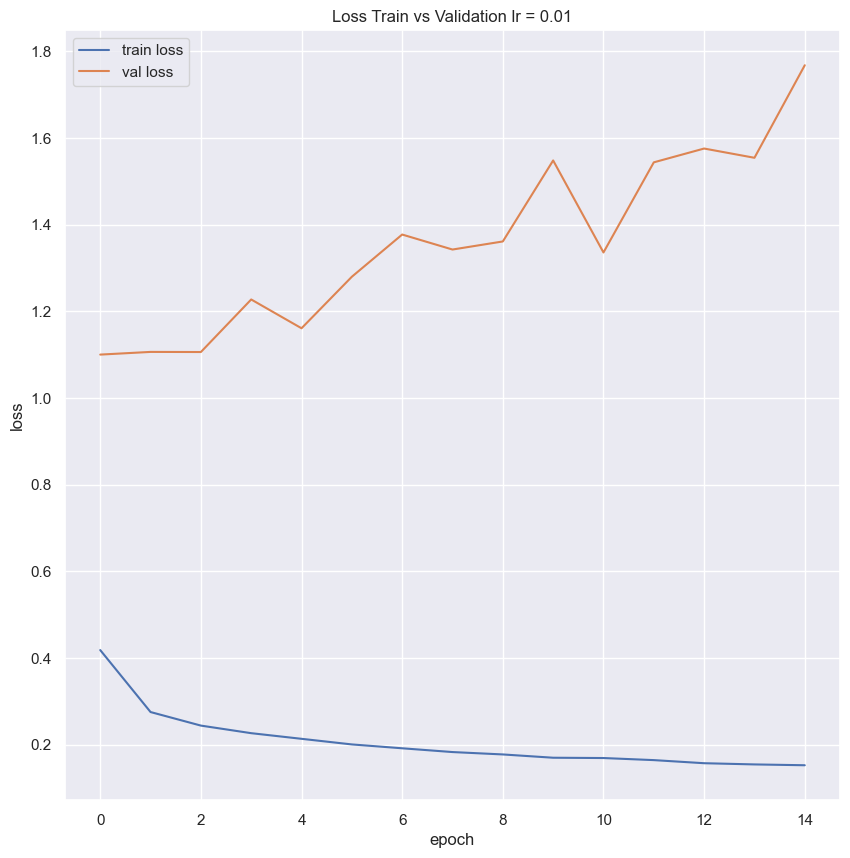

In [132]:
# loss when lr = 0.01
plot_loss_curve_for_train_and_test(updated_model_history, "Loss Train vs Validation lr = 0.01")

In [110]:
# function to get letters
def get_letters_updated(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        flag = False
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            flag = True
            
        if flag == False:
          continue

        if(type(x) != int):
          continue
        roi = gray[y: y+h, x: x+w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = updated_model.predict(thresh)
        ypred = lb.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, image

1/1 [==============================] - 0s 23ms/step
LEHA


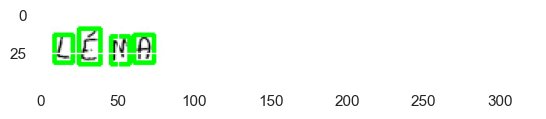

In [133]:
# test one image from names.
letter,image = get_letters_updated("OCR_Dataset/Handwritten Names/test/test/TEST_0003.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

In [111]:
# get text from train images
updated_train_model_predicted_characters = []
updated_train_model_predicted_characters_with_images = []
updated_train_error_images = []
for i in tqdm(train_images_file_names):
  if i == train_images_file_names[423] or i == train_images_file_names[536]:
    updated_train_model_predicted_characters.append(None)
    if i == train_images_file_names[423]:
        updated_train_model_predicted_characters_with_images.append(hand_written_names_train_images_list[423])
    elif i == train_images_file_names[536]:
        updated_train_model_predicted_characters_with_images.append(hand_written_names_train_images_list[536])
    continue
  letter, image = get_letters_updated(i)
  word = get_word(letter)
  updated_train_model_predicted_characters.append(word)
  updated_train_model_predicted_characters_with_images.append(image)

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


  0%|                                                                                 | 1/1000 [00:00<14:23,  1.16it/s]

1/1 [==============================] - 0s 21ms/step


  0%|▏                                                                                | 2/1000 [00:01<08:18,  2.00it/s]

1/1 [==============================] - 0s 22ms/step


  0%|▏                                                                                | 3/1000 [00:01<06:37,  2.51it/s]

1/1 [==============================] - 0s 20ms/step


  0%|▎                                                                                | 4/1000 [00:02<09:31,  1.74it/s]

1/1 [==============================] - 0s 20ms/step


  0%|▍                                                                                | 5/1000 [00:02<08:22,  1.98it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▍                                                                                | 6/1000 [00:02<06:51,  2.41it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▌                                                                                | 7/1000 [00:03<06:58,  2.37it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▋                                                                                | 8/1000 [00:04<10:31,  1.57it/s]

1/1 [==============================] - 0s 19ms/step


  1%|▋                                                                                | 9/1000 [00:04<09:48,  1.68it/s]

1/1 [==============================] - 0s 19ms/step


  1%|▊                                                                               | 10/1000 [00:05<09:09,  1.80it/s]

1/1 [==============================] - 0s 19ms/step


  1%|▉                                                                               | 11/1000 [00:05<07:17,  2.26it/s]

1/1 [==============================] - 0s 19ms/step


  1%|▉                                                                               | 12/1000 [00:06<09:28,  1.74it/s]

1/1 [==============================] - 0s 19ms/step


  1%|█                                                                               | 13/1000 [00:06<08:03,  2.04it/s]

1/1 [==============================] - 0s 19ms/step


  1%|█                                                                               | 14/1000 [00:07<07:16,  2.26it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▏                                                                              | 15/1000 [00:07<07:50,  2.10it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▎                                                                              | 16/1000 [00:08<08:40,  1.89it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▎                                                                              | 17/1000 [00:08<07:42,  2.13it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▍                                                                              | 18/1000 [00:09<10:35,  1.54it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▌                                                                              | 19/1000 [00:10<11:24,  1.43it/s]

1/1 [==============================] - 0s 19ms/step


  2%|█▌                                                                              | 20/1000 [00:10<09:19,  1.75it/s]

1/1 [==============================] - 0s 19ms/step


  2%|█▋                                                                              | 21/1000 [00:11<09:11,  1.78it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▊                                                                              | 22/1000 [00:11<08:44,  1.87it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▊                                                                              | 23/1000 [00:11<07:17,  2.23it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▉                                                                              | 24/1000 [00:12<07:25,  2.19it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██                                                                              | 25/1000 [00:12<07:02,  2.31it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██                                                                              | 26/1000 [00:13<08:58,  1.81it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▏                                                                             | 27/1000 [00:13<07:38,  2.12it/s]

1/1 [==============================] - 0s 18ms/step


  3%|██▏                                                                             | 28/1000 [00:14<06:42,  2.41it/s]

1/1 [==============================] - 0s 37ms/step


  3%|██▎                                                                             | 29/1000 [00:15<09:02,  1.79it/s]

1/1 [==============================] - 0s 19ms/step


  3%|██▍                                                                             | 30/1000 [00:15<07:57,  2.03it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▍                                                                             | 31/1000 [00:15<07:34,  2.13it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▌                                                                             | 32/1000 [00:16<07:06,  2.27it/s]

1/1 [==============================] - 0s 19ms/step


  3%|██▋                                                                             | 33/1000 [00:16<06:06,  2.64it/s]

1/1 [==============================] - 0s 18ms/step


  3%|██▋                                                                             | 34/1000 [00:16<06:04,  2.65it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▊                                                                             | 35/1000 [00:17<06:29,  2.48it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▉                                                                             | 36/1000 [00:17<06:32,  2.45it/s]

1/1 [==============================] - 0s 19ms/step


  4%|██▉                                                                             | 37/1000 [00:17<05:42,  2.81it/s]

1/1 [==============================] - 0s 20ms/step


  4%|███                                                                             | 38/1000 [00:18<06:25,  2.49it/s]

1/1 [==============================] - 0s 18ms/step


  4%|███                                                                             | 39/1000 [00:19<07:49,  2.05it/s]

1/1 [==============================] - 0s 20ms/step


  4%|███▏                                                                            | 40/1000 [00:19<06:48,  2.35it/s]

1/1 [==============================] - 0s 20ms/step


  4%|███▎                                                                            | 41/1000 [00:19<06:21,  2.52it/s]

1/1 [==============================] - 0s 20ms/step


  4%|███▎                                                                            | 42/1000 [00:20<06:12,  2.57it/s]

1/1 [==============================] - 0s 19ms/step


  4%|███▍                                                                            | 43/1000 [00:20<05:53,  2.71it/s]

1/1 [==============================] - 0s 20ms/step


  4%|███▌                                                                            | 44/1000 [00:20<06:08,  2.59it/s]

1/1 [==============================] - 0s 20ms/step


  4%|███▌                                                                            | 45/1000 [00:21<06:16,  2.54it/s]

1/1 [==============================] - 0s 20ms/step


  5%|███▋                                                                            | 46/1000 [00:22<08:08,  1.95it/s]

1/1 [==============================] - 0s 19ms/step


  5%|███▊                                                                            | 47/1000 [00:22<08:08,  1.95it/s]

1/1 [==============================] - 0s 20ms/step


  5%|███▊                                                                            | 48/1000 [00:23<07:29,  2.12it/s]

1/1 [==============================] - 0s 20ms/step


  5%|███▉                                                                            | 49/1000 [00:23<06:47,  2.33it/s]

1/1 [==============================] - 0s 19ms/step


  5%|████                                                                            | 50/1000 [00:23<06:57,  2.28it/s]

1/1 [==============================] - 0s 20ms/step


  5%|████                                                                            | 51/1000 [00:23<05:44,  2.76it/s]

1/1 [==============================] - 0s 19ms/step


  5%|████▏                                                                           | 52/1000 [00:24<05:19,  2.97it/s]

1/1 [==============================] - 0s 21ms/step


  5%|████▏                                                                           | 53/1000 [00:24<06:08,  2.57it/s]

1/1 [==============================] - 0s 20ms/step


  5%|████▎                                                                           | 54/1000 [00:25<07:08,  2.21it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████▍                                                                           | 55/1000 [00:25<06:20,  2.49it/s]

1/1 [==============================] - 0s 19ms/step


  6%|████▍                                                                           | 56/1000 [00:25<05:04,  3.10it/s]

1/1 [==============================] - 0s 19ms/step


  6%|████▌                                                                           | 57/1000 [00:26<05:17,  2.97it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████▋                                                                           | 58/1000 [00:26<06:48,  2.31it/s]

1/1 [==============================] - 0s 19ms/step


  6%|████▋                                                                           | 59/1000 [00:27<06:18,  2.49it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████▊                                                                           | 60/1000 [00:28<09:09,  1.71it/s]

1/1 [==============================] - 0s 19ms/step


  6%|████▉                                                                           | 61/1000 [00:28<07:43,  2.03it/s]

1/1 [==============================] - 0s 19ms/step


  6%|████▉                                                                           | 62/1000 [00:28<06:44,  2.32it/s]

1/1 [==============================] - 0s 19ms/step


  6%|█████                                                                           | 63/1000 [00:28<05:34,  2.80it/s]

1/1 [==============================] - 0s 20ms/step


  6%|█████                                                                           | 64/1000 [00:29<08:12,  1.90it/s]

1/1 [==============================] - 0s 19ms/step


  6%|█████▏                                                                          | 65/1000 [00:30<07:15,  2.15it/s]

1/1 [==============================] - 0s 19ms/step


  7%|█████▎                                                                          | 66/1000 [00:30<06:37,  2.35it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████▎                                                                          | 67/1000 [00:30<06:06,  2.54it/s]

1/1 [==============================] - 0s 20ms/step


  7%|█████▍                                                                          | 68/1000 [00:31<08:37,  1.80it/s]

1/1 [==============================] - 0s 20ms/step


  7%|█████▌                                                                          | 69/1000 [00:32<07:21,  2.11it/s]

1/1 [==============================] - 0s 19ms/step


  7%|█████▌                                                                          | 70/1000 [00:32<07:18,  2.12it/s]

1/1 [==============================] - 0s 20ms/step


  7%|█████▋                                                                          | 71/1000 [00:33<08:59,  1.72it/s]

1/1 [==============================] - 0s 18ms/step


  7%|█████▊                                                                          | 72/1000 [00:34<10:38,  1.45it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████▊                                                                          | 73/1000 [00:34<10:45,  1.44it/s]

1/1 [==============================] - 0s 20ms/step


  7%|█████▉                                                                          | 74/1000 [00:35<10:06,  1.53it/s]

1/1 [==============================] - 0s 19ms/step


  8%|██████                                                                          | 75/1000 [00:35<08:33,  1.80it/s]

1/1 [==============================] - 0s 20ms/step


  8%|██████                                                                          | 76/1000 [00:36<07:31,  2.04it/s]

1/1 [==============================] - 0s 20ms/step


  8%|██████▏                                                                         | 77/1000 [00:36<07:00,  2.19it/s]

1/1 [==============================] - 0s 20ms/step


  8%|██████▏                                                                         | 78/1000 [00:36<06:25,  2.39it/s]

1/1 [==============================] - 0s 20ms/step


  8%|██████▎                                                                         | 79/1000 [00:37<08:48,  1.74it/s]

1/1 [==============================] - 0s 20ms/step


  8%|██████▍                                                                         | 80/1000 [00:38<07:41,  1.99it/s]

1/1 [==============================] - 0s 20ms/step


  8%|██████▍                                                                         | 81/1000 [00:38<06:40,  2.29it/s]

1/1 [==============================] - 0s 20ms/step


  8%|██████▌                                                                         | 82/1000 [00:38<05:44,  2.67it/s]

1/1 [==============================] - 0s 20ms/step


  8%|██████▋                                                                         | 83/1000 [00:39<08:02,  1.90it/s]

1/1 [==============================] - 0s 19ms/step


  8%|██████▋                                                                         | 84/1000 [00:40<09:52,  1.55it/s]

1/1 [==============================] - 0s 20ms/step


  8%|██████▊                                                                         | 85/1000 [00:41<09:27,  1.61it/s]

1/1 [==============================] - 0s 19ms/step


  9%|██████▉                                                                         | 86/1000 [00:41<07:41,  1.98it/s]

1/1 [==============================] - 0s 20ms/step


  9%|██████▉                                                                         | 87/1000 [00:42<11:07,  1.37it/s]

1/1 [==============================] - 0s 20ms/step


  9%|███████                                                                         | 88/1000 [00:43<11:34,  1.31it/s]

1/1 [==============================] - 0s 20ms/step


  9%|███████▏                                                                        | 90/1000 [00:44<09:19,  1.63it/s]

1/1 [==============================] - 0s 19ms/step


  9%|███████▎                                                                        | 91/1000 [00:44<08:13,  1.84it/s]

1/1 [==============================] - 0s 20ms/step


  9%|███████▎                                                                        | 92/1000 [00:44<07:33,  2.00it/s]

1/1 [==============================] - 0s 19ms/step


  9%|███████▍                                                                        | 93/1000 [00:45<07:03,  2.14it/s]

1/1 [==============================] - 0s 20ms/step


  9%|███████▌                                                                        | 94/1000 [00:45<07:46,  1.94it/s]

1/1 [==============================] - 0s 20ms/step


 10%|███████▌                                                                        | 95/1000 [00:46<07:45,  1.94it/s]

1/1 [==============================] - 0s 19ms/step


 10%|███████▋                                                                        | 96/1000 [00:46<06:43,  2.24it/s]

1/1 [==============================] - 0s 20ms/step


 10%|███████▊                                                                        | 97/1000 [00:47<06:23,  2.35it/s]

1/1 [==============================] - 0s 20ms/step


 10%|███████▊                                                                        | 98/1000 [00:48<09:14,  1.63it/s]

1/1 [==============================] - 0s 19ms/step


 10%|███████▉                                                                        | 99/1000 [00:48<07:45,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


 10%|███████▉                                                                       | 100/1000 [00:48<06:28,  2.32it/s]

1/1 [==============================] - 0s 19ms/step


 10%|███████▉                                                                       | 101/1000 [00:49<07:14,  2.07it/s]

1/1 [==============================] - 0s 20ms/step


 10%|████████                                                                       | 102/1000 [00:49<07:10,  2.09it/s]

1/1 [==============================] - 0s 21ms/step


 10%|████████▏                                                                      | 103/1000 [00:50<07:30,  1.99it/s]

1/1 [==============================] - 0s 19ms/step


 10%|████████▏                                                                      | 104/1000 [00:50<06:43,  2.22it/s]

1/1 [==============================] - 0s 19ms/step


 10%|████████▎                                                                      | 105/1000 [00:51<07:01,  2.13it/s]

1/1 [==============================] - 0s 19ms/step


 11%|████████▎                                                                      | 106/1000 [00:51<06:34,  2.27it/s]

1/1 [==============================] - 0s 20ms/step


 11%|████████▍                                                                      | 107/1000 [00:52<09:34,  1.55it/s]

1/1 [==============================] - 0s 19ms/step


 11%|████████▌                                                                      | 108/1000 [00:52<07:45,  1.92it/s]

1/1 [==============================] - 0s 19ms/step


 11%|████████▌                                                                      | 109/1000 [00:53<07:34,  1.96it/s]

1/1 [==============================] - 0s 20ms/step


 11%|████████▋                                                                      | 110/1000 [00:53<06:45,  2.20it/s]

1/1 [==============================] - 0s 19ms/step


 11%|████████▊                                                                      | 111/1000 [00:53<05:33,  2.67it/s]

1/1 [==============================] - 0s 19ms/step


 11%|████████▊                                                                      | 112/1000 [00:54<07:10,  2.06it/s]

1/1 [==============================] - 0s 19ms/step


 11%|████████▉                                                                      | 113/1000 [00:55<07:03,  2.09it/s]

1/1 [==============================] - 0s 19ms/step


 11%|█████████                                                                      | 114/1000 [00:55<06:11,  2.39it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█████████                                                                      | 115/1000 [00:56<08:15,  1.79it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█████████▏                                                                     | 116/1000 [00:56<07:01,  2.10it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█████████▏                                                                     | 117/1000 [00:57<08:50,  1.66it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█████████▎                                                                     | 118/1000 [00:58<09:10,  1.60it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█████████▍                                                                     | 119/1000 [00:58<07:26,  1.97it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█████████▍                                                                     | 120/1000 [00:58<06:48,  2.15it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▌                                                                     | 121/1000 [00:59<07:37,  1.92it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█████████▋                                                                     | 122/1000 [00:59<06:32,  2.24it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█████████▋                                                                     | 123/1000 [01:00<06:00,  2.44it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█████████▊                                                                     | 124/1000 [01:00<05:25,  2.69it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█████████▉                                                                     | 125/1000 [01:00<04:48,  3.03it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█████████▉                                                                     | 126/1000 [01:00<04:59,  2.91it/s]

1/1 [==============================] - 0s 19ms/step


 13%|██████████                                                                     | 127/1000 [01:01<05:06,  2.84it/s]

1/1 [==============================] - 0s 19ms/step


 13%|██████████                                                                     | 128/1000 [01:01<05:11,  2.80it/s]

1/1 [==============================] - 0s 19ms/step


 13%|██████████▏                                                                    | 129/1000 [01:02<05:13,  2.78it/s]

1/1 [==============================] - 0s 19ms/step


 13%|██████████▎                                                                    | 130/1000 [01:02<05:17,  2.74it/s]

1/1 [==============================] - 0s 19ms/step


 13%|██████████▎                                                                    | 131/1000 [01:03<07:43,  1.87it/s]

1/1 [==============================] - 0s 18ms/step


 13%|██████████▍                                                                    | 132/1000 [01:03<07:00,  2.06it/s]

1/1 [==============================] - 0s 20ms/step


 13%|██████████▌                                                                    | 133/1000 [01:04<07:57,  1.82it/s]

1/1 [==============================] - 0s 20ms/step


 13%|██████████▌                                                                    | 134/1000 [01:05<08:47,  1.64it/s]

1/1 [==============================] - 0s 20ms/step


 14%|██████████▋                                                                    | 135/1000 [01:05<07:32,  1.91it/s]

1/1 [==============================] - 0s 20ms/step


 14%|██████████▋                                                                    | 136/1000 [01:05<06:54,  2.08it/s]

1/1 [==============================] - 0s 20ms/step


 14%|██████████▊                                                                    | 137/1000 [01:06<09:38,  1.49it/s]

1/1 [==============================] - 0s 20ms/step


 14%|██████████▉                                                                    | 138/1000 [01:07<10:33,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▉                                                                    | 139/1000 [01:08<09:58,  1.44it/s]

1/1 [==============================] - 0s 20ms/step


 14%|███████████                                                                    | 140/1000 [01:08<08:59,  1.60it/s]

1/1 [==============================] - 0s 19ms/step


 14%|███████████▏                                                                   | 141/1000 [01:09<09:42,  1.47it/s]

1/1 [==============================] - 0s 19ms/step


 14%|███████████▏                                                                   | 142/1000 [01:09<07:35,  1.89it/s]

1/1 [==============================] - 0s 20ms/step


 14%|███████████▎                                                                   | 143/1000 [01:10<06:30,  2.19it/s]

1/1 [==============================] - 0s 20ms/step


 14%|███████████▍                                                                   | 144/1000 [01:11<09:07,  1.56it/s]

1/1 [==============================] - 0s 18ms/step


 14%|███████████▍                                                                   | 145/1000 [01:11<07:47,  1.83it/s]

1/1 [==============================] - 0s 18ms/step


 15%|███████████▌                                                                   | 146/1000 [01:11<07:12,  1.97it/s]

1/1 [==============================] - 0s 20ms/step


 15%|███████████▌                                                                   | 147/1000 [01:12<06:13,  2.29it/s]

1/1 [==============================] - 0s 19ms/step


 15%|███████████▋                                                                   | 148/1000 [01:12<05:37,  2.53it/s]

1/1 [==============================] - 0s 19ms/step


 15%|███████████▊                                                                   | 149/1000 [01:13<07:30,  1.89it/s]

1/1 [==============================] - 0s 20ms/step


 15%|███████████▊                                                                   | 150/1000 [01:14<09:35,  1.48it/s]

1/1 [==============================] - 0s 20ms/step


 15%|███████████▉                                                                   | 151/1000 [01:14<07:30,  1.88it/s]

1/1 [==============================] - 0s 20ms/step


 15%|████████████                                                                   | 152/1000 [01:15<09:23,  1.51it/s]

1/1 [==============================] - 0s 20ms/step


 15%|████████████                                                                   | 153/1000 [01:15<07:44,  1.82it/s]

1/1 [==============================] - 0s 20ms/step


 15%|████████████▏                                                                  | 154/1000 [01:16<07:11,  1.96it/s]

1/1 [==============================] - 0s 19ms/step


 16%|████████████▏                                                                  | 155/1000 [01:16<06:13,  2.26it/s]

1/1 [==============================] - 0s 20ms/step


 16%|████████████▎                                                                  | 156/1000 [01:17<06:40,  2.11it/s]

1/1 [==============================] - 0s 19ms/step


 16%|████████████▍                                                                  | 157/1000 [01:17<05:28,  2.57it/s]

1/1 [==============================] - 0s 19ms/step


 16%|████████████▍                                                                  | 158/1000 [01:17<05:00,  2.80it/s]

1/1 [==============================] - 0s 20ms/step


 16%|████████████▌                                                                  | 159/1000 [01:18<05:40,  2.47it/s]

1/1 [==============================] - 0s 19ms/step


 16%|████████████▋                                                                  | 160/1000 [01:18<05:45,  2.43it/s]

1/1 [==============================] - 0s 19ms/step


 16%|████████████▋                                                                  | 161/1000 [01:19<07:54,  1.77it/s]

1/1 [==============================] - 0s 20ms/step


 16%|████████████▊                                                                  | 162/1000 [01:19<06:30,  2.14it/s]

1/1 [==============================] - 0s 20ms/step


 16%|████████████▉                                                                  | 163/1000 [01:20<05:55,  2.35it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▉                                                                  | 164/1000 [01:20<05:18,  2.62it/s]

1/1 [==============================] - 0s 20ms/step


 16%|█████████████                                                                  | 165/1000 [01:20<05:26,  2.56it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████                                                                  | 166/1000 [01:21<05:22,  2.59it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█████████████▏                                                                 | 167/1000 [01:21<05:30,  2.52it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█████████████▎                                                                 | 168/1000 [01:21<05:27,  2.54it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█████████████▎                                                                 | 169/1000 [01:22<05:09,  2.68it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████▍                                                                 | 170/1000 [01:22<04:57,  2.79it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█████████████▌                                                                 | 171/1000 [01:23<05:49,  2.37it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████▌                                                                 | 172/1000 [01:23<05:12,  2.65it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▋                                                                 | 173/1000 [01:23<05:11,  2.65it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████▋                                                                 | 174/1000 [01:23<04:24,  3.12it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█████████████▊                                                                 | 175/1000 [01:24<04:16,  3.22it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█████████████▉                                                                 | 176/1000 [01:24<04:21,  3.16it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█████████████▉                                                                 | 177/1000 [01:24<04:45,  2.88it/s]

1/1 [==============================] - 0s 19ms/step


 18%|██████████████                                                                 | 178/1000 [01:25<05:26,  2.52it/s]

1/1 [==============================] - 0s 20ms/step


 18%|██████████████▏                                                                | 179/1000 [01:25<04:45,  2.87it/s]

1/1 [==============================] - 0s 20ms/step


 18%|██████████████▏                                                                | 180/1000 [01:25<04:07,  3.32it/s]

1/1 [==============================] - 0s 20ms/step


 18%|██████████████▎                                                                | 181/1000 [01:26<04:00,  3.40it/s]

1/1 [==============================] - 0s 18ms/step


 18%|██████████████▍                                                                | 182/1000 [01:26<04:56,  2.76it/s]

1/1 [==============================] - 0s 21ms/step


 18%|██████████████▍                                                                | 183/1000 [01:27<05:10,  2.64it/s]

1/1 [==============================] - 0s 20ms/step


 18%|██████████████▌                                                                | 184/1000 [01:27<06:29,  2.09it/s]

1/1 [==============================] - 0s 20ms/step


 18%|██████████████▌                                                                | 185/1000 [01:28<08:42,  1.56it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▋                                                                | 186/1000 [01:29<07:48,  1.74it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▊                                                                | 187/1000 [01:29<06:49,  1.99it/s]

1/1 [==============================] - 0s 19ms/step


 19%|██████████████▊                                                                | 188/1000 [01:30<08:23,  1.61it/s]

1/1 [==============================] - 0s 20ms/step


 19%|██████████████▉                                                                | 189/1000 [01:30<07:37,  1.77it/s]

1/1 [==============================] - 0s 20ms/step


 19%|███████████████                                                                | 190/1000 [01:31<07:01,  1.92it/s]

1/1 [==============================] - 0s 20ms/step


 19%|███████████████                                                                | 191/1000 [01:31<06:02,  2.23it/s]

1/1 [==============================] - 0s 20ms/step


 19%|███████████████▏                                                               | 192/1000 [01:32<05:56,  2.27it/s]

1/1 [==============================] - 0s 21ms/step


 19%|███████████████▏                                                               | 193/1000 [01:32<04:55,  2.73it/s]

1/1 [==============================] - 0s 19ms/step


 19%|███████████████▎                                                               | 194/1000 [01:32<05:08,  2.62it/s]

1/1 [==============================] - 0s 20ms/step


 20%|███████████████▍                                                               | 195/1000 [01:33<07:21,  1.82it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▍                                                               | 196/1000 [01:34<06:50,  1.96it/s]

1/1 [==============================] - 0s 20ms/step


 20%|███████████████▌                                                               | 197/1000 [01:34<06:06,  2.19it/s]

1/1 [==============================] - 0s 20ms/step


 20%|███████████████▋                                                               | 198/1000 [01:34<06:32,  2.04it/s]

1/1 [==============================] - 0s 20ms/step


 20%|███████████████▋                                                               | 199/1000 [01:35<05:53,  2.27it/s]

1/1 [==============================] - 0s 20ms/step


 20%|███████████████▊                                                               | 200/1000 [01:35<05:49,  2.29it/s]

1/1 [==============================] - 0s 19ms/step


 20%|███████████████▉                                                               | 201/1000 [01:36<06:52,  1.94it/s]

1/1 [==============================] - 0s 19ms/step


 20%|███████████████▉                                                               | 202/1000 [01:36<05:56,  2.24it/s]

1/1 [==============================] - 0s 20ms/step


 20%|████████████████                                                               | 203/1000 [01:37<06:55,  1.92it/s]

1/1 [==============================] - 0s 19ms/step


 20%|████████████████                                                               | 204/1000 [01:37<07:04,  1.87it/s]

1/1 [==============================] - 0s 20ms/step


 20%|████████████████▏                                                              | 205/1000 [01:38<06:13,  2.13it/s]

1/1 [==============================] - 0s 22ms/step


 21%|████████████████▎                                                              | 206/1000 [01:38<05:51,  2.26it/s]

1/1 [==============================] - 0s 19ms/step


 21%|████████████████▎                                                              | 207/1000 [01:38<05:23,  2.45it/s]

1/1 [==============================] - 0s 19ms/step


 21%|████████████████▍                                                              | 208/1000 [01:39<06:48,  1.94it/s]

1/1 [==============================] - 0s 21ms/step


 21%|████████████████▌                                                              | 209/1000 [01:39<05:42,  2.31it/s]

1/1 [==============================] - 0s 22ms/step


 21%|████████████████▌                                                              | 210/1000 [01:40<05:50,  2.25it/s]

1/1 [==============================] - 0s 21ms/step


 21%|████████████████▋                                                              | 211/1000 [01:40<04:48,  2.73it/s]

1/1 [==============================] - 0s 20ms/step


 21%|████████████████▋                                                              | 212/1000 [01:41<07:38,  1.72it/s]

1/1 [==============================] - 0s 19ms/step


 21%|████████████████▊                                                              | 213/1000 [01:42<08:50,  1.48it/s]

1/1 [==============================] - 0s 19ms/step


 21%|████████████████▉                                                              | 214/1000 [01:42<07:06,  1.84it/s]

1/1 [==============================] - 0s 20ms/step


 22%|████████████████▉                                                              | 215/1000 [01:43<06:15,  2.09it/s]

1/1 [==============================] - 0s 19ms/step


 22%|█████████████████                                                              | 216/1000 [01:43<06:23,  2.04it/s]

1/1 [==============================] - 0s 21ms/step


 22%|█████████████████▏                                                             | 217/1000 [01:44<08:17,  1.57it/s]

1/1 [==============================] - 0s 18ms/step


 22%|█████████████████▏                                                             | 218/1000 [01:44<06:32,  1.99it/s]

1/1 [==============================] - 0s 20ms/step


 22%|█████████████████▎                                                             | 219/1000 [01:45<06:46,  1.92it/s]

1/1 [==============================] - 0s 19ms/step


 22%|█████████████████▍                                                             | 220/1000 [01:45<05:39,  2.30it/s]

1/1 [==============================] - 0s 20ms/step


 22%|█████████████████▍                                                             | 221/1000 [01:46<07:58,  1.63it/s]

1/1 [==============================] - 0s 20ms/step


 22%|█████████████████▌                                                             | 222/1000 [01:47<08:07,  1.59it/s]

1/1 [==============================] - 0s 19ms/step


 22%|█████████████████▌                                                             | 223/1000 [01:47<06:26,  2.01it/s]

1/1 [==============================] - 0s 22ms/step


 22%|█████████████████▋                                                             | 224/1000 [01:47<05:26,  2.38it/s]

1/1 [==============================] - 0s 21ms/step


 22%|█████████████████▊                                                             | 225/1000 [01:48<04:53,  2.64it/s]

1/1 [==============================] - 0s 20ms/step


 23%|█████████████████▊                                                             | 226/1000 [01:49<07:05,  1.82it/s]

1/1 [==============================] - 0s 21ms/step


 23%|█████████████████▉                                                             | 227/1000 [01:49<06:24,  2.01it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██████████████████                                                             | 228/1000 [01:49<06:38,  1.93it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██████████████████                                                             | 229/1000 [01:50<08:15,  1.55it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██████████████████▏                                                            | 230/1000 [01:51<07:14,  1.77it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██████████████████▏                                                            | 231/1000 [01:51<07:46,  1.65it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██████████████████▎                                                            | 232/1000 [01:52<07:36,  1.68it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██████████████████▍                                                            | 233/1000 [01:52<06:45,  1.89it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██████████████████▍                                                            | 234/1000 [01:53<05:47,  2.20it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██████████████████▌                                                            | 235/1000 [01:53<05:19,  2.39it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▋                                                            | 236/1000 [01:54<06:37,  1.92it/s]

1/1 [==============================] - 0s 19ms/step


 24%|██████████████████▋                                                            | 237/1000 [01:54<06:05,  2.09it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██████████████████▊                                                            | 238/1000 [01:55<05:51,  2.17it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██████████████████▉                                                            | 239/1000 [01:55<05:21,  2.37it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██████████████████▉                                                            | 240/1000 [01:56<06:13,  2.04it/s]

1/1 [==============================] - 0s 19ms/step


 24%|███████████████████                                                            | 241/1000 [01:56<06:07,  2.06it/s]

1/1 [==============================] - 0s 19ms/step


 24%|███████████████████                                                            | 242/1000 [01:56<05:43,  2.21it/s]

1/1 [==============================] - 0s 21ms/step


 24%|███████████████████▏                                                           | 243/1000 [01:57<04:43,  2.67it/s]

1/1 [==============================] - 0s 20ms/step


 24%|███████████████████▎                                                           | 244/1000 [01:57<04:42,  2.67it/s]

1/1 [==============================] - 0s 19ms/step


 24%|███████████████████▎                                                           | 245/1000 [01:57<05:03,  2.49it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▍                                                           | 246/1000 [01:58<04:24,  2.85it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▌                                                           | 247/1000 [01:58<03:58,  3.16it/s]

1/1 [==============================] - 0s 20ms/step


 25%|███████████████████▌                                                           | 248/1000 [01:58<03:49,  3.28it/s]

1/1 [==============================] - 0s 20ms/step


 25%|███████████████████▋                                                           | 249/1000 [01:59<05:18,  2.36it/s]

1/1 [==============================] - 0s 20ms/step


 25%|███████████████████▊                                                           | 250/1000 [01:59<04:34,  2.73it/s]

1/1 [==============================] - 0s 18ms/step


 25%|███████████████████▊                                                           | 251/1000 [01:59<04:03,  3.07it/s]

1/1 [==============================] - 0s 20ms/step


 25%|███████████████████▉                                                           | 252/1000 [02:00<05:06,  2.44it/s]

1/1 [==============================] - 0s 19ms/step


 25%|███████████████████▉                                                           | 253/1000 [02:00<04:28,  2.78it/s]

1/1 [==============================] - 0s 20ms/step


 25%|████████████████████                                                           | 254/1000 [02:00<03:59,  3.11it/s]

1/1 [==============================] - 0s 19ms/step


 26%|████████████████████▏                                                          | 255/1000 [02:01<04:31,  2.75it/s]

1/1 [==============================] - 0s 21ms/step


 26%|████████████████████▏                                                          | 256/1000 [02:01<04:44,  2.61it/s]

1/1 [==============================] - 0s 19ms/step


 26%|████████████████████▎                                                          | 257/1000 [02:02<05:12,  2.38it/s]

1/1 [==============================] - 0s 20ms/step


 26%|████████████████████▍                                                          | 258/1000 [02:02<05:12,  2.38it/s]

1/1 [==============================] - 0s 20ms/step


 26%|████████████████████▍                                                          | 259/1000 [02:03<04:51,  2.54it/s]

1/1 [==============================] - 0s 20ms/step


 26%|████████████████████▌                                                          | 260/1000 [02:04<06:50,  1.80it/s]

1/1 [==============================] - 0s 20ms/step


 26%|████████████████████▌                                                          | 261/1000 [02:04<07:32,  1.63it/s]

1/1 [==============================] - 0s 20ms/step


 26%|████████████████████▋                                                          | 262/1000 [02:05<06:08,  2.00it/s]

1/1 [==============================] - 0s 19ms/step


 26%|████████████████████▊                                                          | 263/1000 [02:05<05:10,  2.38it/s]

1/1 [==============================] - 0s 20ms/step


 26%|████████████████████▊                                                          | 264/1000 [02:05<05:22,  2.28it/s]

1/1 [==============================] - 0s 19ms/step


 26%|████████████████████▉                                                          | 265/1000 [02:06<05:17,  2.32it/s]

1/1 [==============================] - 0s 20ms/step


 27%|█████████████████████                                                          | 266/1000 [02:06<04:53,  2.50it/s]

1/1 [==============================] - 0s 20ms/step


 27%|█████████████████████                                                          | 267/1000 [02:06<04:06,  2.98it/s]

1/1 [==============================] - 0s 20ms/step


 27%|█████████████████████▏                                                         | 268/1000 [02:06<03:44,  3.27it/s]

1/1 [==============================] - 0s 19ms/step


 27%|█████████████████████▎                                                         | 269/1000 [02:07<04:19,  2.82it/s]

1/1 [==============================] - 0s 19ms/step


 27%|█████████████████████▎                                                         | 270/1000 [02:07<04:03,  3.00it/s]

1/1 [==============================] - 0s 18ms/step


 27%|█████████████████████▍                                                         | 271/1000 [02:08<04:41,  2.59it/s]

1/1 [==============================] - 0s 19ms/step


 27%|█████████████████████▍                                                         | 272/1000 [02:08<05:10,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 27%|█████████████████████▌                                                         | 273/1000 [02:09<04:49,  2.52it/s]

1/1 [==============================] - 0s 20ms/step


 27%|█████████████████████▋                                                         | 274/1000 [02:09<04:23,  2.76it/s]

1/1 [==============================] - 0s 21ms/step


 28%|█████████████████████▋                                                         | 275/1000 [02:09<05:33,  2.17it/s]

1/1 [==============================] - 0s 20ms/step


 28%|█████████████████████▊                                                         | 276/1000 [02:10<05:05,  2.37it/s]

1/1 [==============================] - 0s 20ms/step


 28%|█████████████████████▉                                                         | 277/1000 [02:10<04:24,  2.74it/s]

1/1 [==============================] - 0s 19ms/step


 28%|█████████████████████▉                                                         | 278/1000 [02:10<03:55,  3.07it/s]

1/1 [==============================] - 0s 19ms/step


 28%|██████████████████████                                                         | 279/1000 [02:11<03:43,  3.23it/s]

1/1 [==============================] - 0s 19ms/step


 28%|██████████████████████                                                         | 280/1000 [02:11<03:47,  3.17it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██████████████████████▏                                                        | 281/1000 [02:11<04:10,  2.87it/s]

1/1 [==============================] - 0s 19ms/step


 28%|██████████████████████▎                                                        | 282/1000 [02:12<04:26,  2.69it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██████████████████████▎                                                        | 283/1000 [02:12<04:57,  2.41it/s]

1/1 [==============================] - 0s 19ms/step


 28%|██████████████████████▍                                                        | 284/1000 [02:12<04:08,  2.88it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██████████████████████▌                                                        | 285/1000 [02:13<04:13,  2.82it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██████████████████████▌                                                        | 286/1000 [02:14<05:48,  2.05it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██████████████████████▋                                                        | 287/1000 [02:14<05:04,  2.34it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██████████████████████▊                                                        | 288/1000 [02:15<06:14,  1.90it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██████████████████████▊                                                        | 289/1000 [02:15<06:25,  1.84it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██████████████████████▉                                                        | 290/1000 [02:16<05:48,  2.04it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██████████████████████▉                                                        | 291/1000 [02:16<05:33,  2.12it/s]

1/1 [==============================] - 0s 19ms/step


 29%|███████████████████████                                                        | 292/1000 [02:17<06:14,  1.89it/s]

1/1 [==============================] - 0s 19ms/step


 29%|███████████████████████▏                                                       | 293/1000 [02:17<05:01,  2.34it/s]

1/1 [==============================] - 0s 19ms/step


 29%|███████████████████████▏                                                       | 294/1000 [02:18<06:39,  1.77it/s]

1/1 [==============================] - 0s 20ms/step


 30%|███████████████████████▎                                                       | 295/1000 [02:18<05:30,  2.13it/s]

1/1 [==============================] - 0s 19ms/step


 30%|███████████████████████▍                                                       | 296/1000 [02:18<05:10,  2.27it/s]

1/1 [==============================] - 0s 19ms/step


 30%|███████████████████████▍                                                       | 297/1000 [02:19<04:25,  2.64it/s]

1/1 [==============================] - 0s 20ms/step


 30%|███████████████████████▌                                                       | 298/1000 [02:19<04:26,  2.63it/s]

1/1 [==============================] - 0s 19ms/step


 30%|███████████████████████▌                                                       | 299/1000 [02:19<03:57,  2.95it/s]

1/1 [==============================] - 0s 19ms/step


 30%|███████████████████████▋                                                       | 300/1000 [02:20<03:54,  2.98it/s]

1/1 [==============================] - 0s 19ms/step


 30%|███████████████████████▊                                                       | 301/1000 [02:20<04:23,  2.66it/s]

1/1 [==============================] - 0s 19ms/step


 30%|███████████████████████▊                                                       | 302/1000 [02:20<03:52,  3.00it/s]

1/1 [==============================] - 0s 19ms/step


 30%|███████████████████████▉                                                       | 303/1000 [02:21<04:20,  2.68it/s]

1/1 [==============================] - 0s 18ms/step


 30%|████████████████████████                                                       | 304/1000 [02:21<04:20,  2.68it/s]

1/1 [==============================] - 0s 19ms/step


 30%|████████████████████████                                                       | 305/1000 [02:22<04:49,  2.40it/s]

1/1 [==============================] - 0s 20ms/step


 31%|████████████████████████▏                                                      | 306/1000 [02:22<04:40,  2.47it/s]

1/1 [==============================] - 0s 19ms/step


 31%|████████████████████████▎                                                      | 307/1000 [02:23<06:11,  1.87it/s]

1/1 [==============================] - 0s 20ms/step


 31%|████████████████████████▎                                                      | 308/1000 [02:24<07:25,  1.55it/s]

1/1 [==============================] - 0s 19ms/step


 31%|████████████████████████▍                                                      | 309/1000 [02:24<07:16,  1.58it/s]

1/1 [==============================] - 0s 20ms/step


 31%|████████████████████████▍                                                      | 310/1000 [02:25<06:53,  1.67it/s]

1/1 [==============================] - 0s 20ms/step


 31%|████████████████████████▌                                                      | 311/1000 [02:25<05:27,  2.10it/s]

1/1 [==============================] - 0s 19ms/step


 31%|████████████████████████▋                                                      | 312/1000 [02:26<06:04,  1.89it/s]

1/1 [==============================] - 0s 19ms/step


 31%|████████████████████████▋                                                      | 313/1000 [02:26<05:12,  2.20it/s]

1/1 [==============================] - 0s 19ms/step


 31%|████████████████████████▊                                                      | 314/1000 [02:26<05:14,  2.18it/s]

1/1 [==============================] - 0s 19ms/step


 32%|████████████████████████▉                                                      | 315/1000 [02:27<06:52,  1.66it/s]

1/1 [==============================] - 0s 20ms/step


 32%|████████████████████████▉                                                      | 316/1000 [02:28<07:43,  1.48it/s]

1/1 [==============================] - 0s 20ms/step


 32%|█████████████████████████                                                      | 317/1000 [02:29<06:51,  1.66it/s]

1/1 [==============================] - 0s 19ms/step


 32%|█████████████████████████                                                      | 318/1000 [02:29<05:25,  2.09it/s]

1/1 [==============================] - 0s 20ms/step


 32%|█████████████████████████▏                                                     | 319/1000 [02:29<04:35,  2.47it/s]

1/1 [==============================] - 0s 19ms/step


 32%|█████████████████████████▎                                                     | 320/1000 [02:30<04:38,  2.44it/s]

1/1 [==============================] - 0s 20ms/step


 32%|█████████████████████████▎                                                     | 321/1000 [02:30<04:50,  2.34it/s]

1/1 [==============================] - 0s 20ms/step


 32%|█████████████████████████▍                                                     | 322/1000 [02:31<05:29,  2.06it/s]

1/1 [==============================] - 0s 20ms/step


 32%|█████████████████████████▌                                                     | 323/1000 [02:31<04:47,  2.35it/s]

1/1 [==============================] - 0s 20ms/step


 32%|█████████████████████████▌                                                     | 324/1000 [02:32<06:46,  1.66it/s]

1/1 [==============================] - 0s 20ms/step


 32%|█████████████████████████▋                                                     | 325/1000 [02:32<05:41,  1.98it/s]

1/1 [==============================] - 0s 19ms/step


 33%|█████████████████████████▊                                                     | 326/1000 [02:33<05:04,  2.21it/s]

1/1 [==============================] - 0s 19ms/step


 33%|█████████████████████████▊                                                     | 327/1000 [02:33<05:08,  2.18it/s]

1/1 [==============================] - 0s 19ms/step


 33%|█████████████████████████▉                                                     | 328/1000 [02:33<04:13,  2.65it/s]

1/1 [==============================] - 0s 19ms/step


 33%|█████████████████████████▉                                                     | 329/1000 [02:34<04:17,  2.61it/s]

1/1 [==============================] - 0s 20ms/step


 33%|██████████████████████████                                                     | 330/1000 [02:35<06:05,  1.83it/s]

1/1 [==============================] - 0s 20ms/step


 33%|██████████████████████████▏                                                    | 331/1000 [02:35<05:48,  1.92it/s]

1/1 [==============================] - 0s 19ms/step


 33%|██████████████████████████▏                                                    | 332/1000 [02:36<06:06,  1.82it/s]

1/1 [==============================] - 0s 19ms/step


 33%|██████████████████████████▎                                                    | 333/1000 [02:36<05:50,  1.90it/s]

1/1 [==============================] - 0s 19ms/step


 33%|██████████████████████████▍                                                    | 334/1000 [02:37<06:53,  1.61it/s]

1/1 [==============================] - 0s 20ms/step


 34%|██████████████████████████▍                                                    | 335/1000 [02:37<06:33,  1.69it/s]

1/1 [==============================] - 0s 19ms/step


 34%|██████████████████████████▌                                                    | 336/1000 [02:38<06:09,  1.80it/s]

1/1 [==============================] - 0s 20ms/step


 34%|██████████████████████████▌                                                    | 337/1000 [02:39<06:45,  1.63it/s]

1/1 [==============================] - 0s 19ms/step


 34%|██████████████████████████▋                                                    | 338/1000 [02:39<05:49,  1.89it/s]

1/1 [==============================] - 0s 19ms/step


 34%|██████████████████████████▊                                                    | 339/1000 [02:40<06:26,  1.71it/s]

1/1 [==============================] - 0s 19ms/step


 34%|██████████████████████████▊                                                    | 340/1000 [02:41<08:04,  1.36it/s]

1/1 [==============================] - 0s 18ms/step


 34%|██████████████████████████▉                                                    | 341/1000 [02:41<06:26,  1.71it/s]

1/1 [==============================] - 0s 19ms/step


 34%|███████████████████████████                                                    | 342/1000 [02:41<05:33,  1.97it/s]

1/1 [==============================] - 0s 20ms/step


 34%|███████████████████████████                                                    | 343/1000 [02:42<05:07,  2.14it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███████████████████████████▏                                                   | 344/1000 [02:42<05:06,  2.14it/s]

1/1 [==============================] - 0s 20ms/step


 34%|███████████████████████████▎                                                   | 345/1000 [02:42<04:20,  2.51it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███████████████████████████▎                                                   | 346/1000 [02:43<04:26,  2.46it/s]

1/1 [==============================] - 0s 19ms/step


 35%|███████████████████████████▍                                                   | 347/1000 [02:43<04:55,  2.21it/s]

1/1 [==============================] - 0s 19ms/step


 35%|███████████████████████████▍                                                   | 348/1000 [02:44<04:49,  2.25it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███████████████████████████▌                                                   | 349/1000 [02:44<04:27,  2.44it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███████████████████████████▋                                                   | 350/1000 [02:45<05:15,  2.06it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███████████████████████████▋                                                   | 351/1000 [02:45<05:39,  1.91it/s]

1/1 [==============================] - 0s 19ms/step


 35%|███████████████████████████▊                                                   | 352/1000 [02:46<07:01,  1.54it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███████████████████████████▉                                                   | 354/1000 [02:47<04:34,  2.35it/s]

1/1 [==============================] - 0s 21ms/step


 36%|████████████████████████████                                                   | 355/1000 [02:47<04:19,  2.48it/s]

1/1 [==============================] - 0s 21ms/step


 36%|████████████████████████████                                                   | 356/1000 [02:48<04:54,  2.19it/s]

1/1 [==============================] - 0s 20ms/step


 36%|████████████████████████████▏                                                  | 357/1000 [02:48<04:39,  2.30it/s]

1/1 [==============================] - 0s 19ms/step


 36%|████████████████████████████▎                                                  | 358/1000 [02:48<04:04,  2.62it/s]

1/1 [==============================] - 0s 19ms/step


 36%|████████████████████████████▎                                                  | 359/1000 [02:48<03:28,  3.07it/s]

1/1 [==============================] - 0s 21ms/step


 36%|████████████████████████████▍                                                  | 360/1000 [02:49<03:21,  3.17it/s]

1/1 [==============================] - 0s 19ms/step


 36%|████████████████████████████▌                                                  | 361/1000 [02:49<03:44,  2.85it/s]

1/1 [==============================] - 0s 20ms/step


 36%|████████████████████████████▌                                                  | 362/1000 [02:49<03:30,  3.03it/s]

1/1 [==============================] - 0s 20ms/step


 36%|████████████████████████████▋                                                  | 363/1000 [02:50<03:38,  2.91it/s]

1/1 [==============================] - 0s 19ms/step


 36%|████████████████████████████▊                                                  | 364/1000 [02:50<03:54,  2.71it/s]

1/1 [==============================] - 0s 20ms/step


 36%|████████████████████████████▊                                                  | 365/1000 [02:50<03:19,  3.18it/s]

1/1 [==============================] - 0s 20ms/step


 37%|████████████████████████████▉                                                  | 366/1000 [02:51<04:51,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 37%|████████████████████████████▉                                                  | 367/1000 [02:52<05:10,  2.04it/s]

1/1 [==============================] - 0s 21ms/step


 37%|█████████████████████████████                                                  | 368/1000 [02:52<04:30,  2.33it/s]

1/1 [==============================] - 0s 18ms/step


 37%|█████████████████████████████▏                                                 | 369/1000 [02:52<04:03,  2.59it/s]

1/1 [==============================] - 0s 21ms/step


 37%|█████████████████████████████▏                                                 | 370/1000 [02:53<03:43,  2.82it/s]

1/1 [==============================] - 0s 21ms/step


 37%|█████████████████████████████▎                                                 | 371/1000 [02:53<03:29,  3.00it/s]

1/1 [==============================] - 0s 19ms/step


 37%|█████████████████████████████▍                                                 | 372/1000 [02:53<03:20,  3.13it/s]

1/1 [==============================] - 0s 21ms/step


 37%|█████████████████████████████▍                                                 | 373/1000 [02:54<04:05,  2.55it/s]

1/1 [==============================] - 0s 21ms/step


 37%|█████████████████████████████▌                                                 | 374/1000 [02:54<04:12,  2.48it/s]

1/1 [==============================] - 0s 19ms/step


 38%|█████████████████████████████▋                                                 | 375/1000 [02:55<04:51,  2.15it/s]

1/1 [==============================] - 0s 19ms/step


 38%|█████████████████████████████▋                                                 | 376/1000 [02:55<04:15,  2.44it/s]

1/1 [==============================] - 0s 18ms/step


 38%|█████████████████████████████▊                                                 | 377/1000 [02:56<05:36,  1.85it/s]

1/1 [==============================] - 0s 19ms/step


 38%|█████████████████████████████▊                                                 | 378/1000 [02:57<05:57,  1.74it/s]

1/1 [==============================] - 0s 19ms/step


 38%|█████████████████████████████▉                                                 | 379/1000 [02:57<05:02,  2.05it/s]

1/1 [==============================] - 0s 18ms/step


 38%|██████████████████████████████                                                 | 380/1000 [02:57<04:23,  2.35it/s]

1/1 [==============================] - 0s 21ms/step


 38%|██████████████████████████████                                                 | 381/1000 [02:57<03:41,  2.79it/s]

1/1 [==============================] - 0s 19ms/step


 38%|██████████████████████████████▏                                                | 382/1000 [02:58<04:29,  2.29it/s]

1/1 [==============================] - 0s 20ms/step


 38%|██████████████████████████████▎                                                | 383/1000 [02:58<04:09,  2.47it/s]

1/1 [==============================] - 0s 18ms/step


 38%|██████████████████████████████▎                                                | 384/1000 [02:59<04:12,  2.44it/s]

1/1 [==============================] - 0s 21ms/step


 38%|██████████████████████████████▍                                                | 385/1000 [03:00<06:42,  1.53it/s]

1/1 [==============================] - 0s 19ms/step


 39%|██████████████████████████████▍                                                | 386/1000 [03:00<05:08,  1.99it/s]

1/1 [==============================] - 0s 20ms/step


 39%|██████████████████████████████▌                                                | 387/1000 [03:01<05:11,  1.96it/s]

1/1 [==============================] - 0s 21ms/step


 39%|██████████████████████████████▋                                                | 388/1000 [03:02<06:51,  1.49it/s]

1/1 [==============================] - 0s 20ms/step


 39%|██████████████████████████████▋                                                | 389/1000 [03:02<06:13,  1.64it/s]

1/1 [==============================] - 0s 20ms/step


 39%|██████████████████████████████▊                                                | 390/1000 [03:03<05:33,  1.83it/s]

1/1 [==============================] - 0s 22ms/step


 39%|██████████████████████████████▉                                                | 391/1000 [03:04<07:21,  1.38it/s]

1/1 [==============================] - 0s 20ms/step


 39%|██████████████████████████████▉                                                | 392/1000 [03:04<06:57,  1.46it/s]

1/1 [==============================] - 0s 19ms/step


 39%|███████████████████████████████                                                | 393/1000 [03:05<06:40,  1.51it/s]

1/1 [==============================] - 0s 20ms/step


 39%|███████████████████████████████▏                                               | 394/1000 [03:06<06:31,  1.55it/s]

1/1 [==============================] - 0s 19ms/step


 40%|███████████████████████████████▏                                               | 395/1000 [03:06<05:26,  1.85it/s]

1/1 [==============================] - 0s 19ms/step


 40%|███████████████████████████████▎                                               | 396/1000 [03:07<06:47,  1.48it/s]

1/1 [==============================] - 0s 20ms/step


 40%|███████████████████████████████▎                                               | 397/1000 [03:07<06:45,  1.49it/s]

1/1 [==============================] - 0s 19ms/step


 40%|███████████████████████████████▍                                               | 398/1000 [03:08<06:08,  1.63it/s]

1/1 [==============================] - 0s 19ms/step


 40%|███████████████████████████████▌                                               | 399/1000 [03:08<05:25,  1.85it/s]

1/1 [==============================] - 0s 19ms/step


 40%|███████████████████████████████▌                                               | 400/1000 [03:09<06:29,  1.54it/s]

1/1 [==============================] - 0s 19ms/step


 40%|███████████████████████████████▋                                               | 401/1000 [03:09<05:22,  1.86it/s]

1/1 [==============================] - 0s 19ms/step


 40%|███████████████████████████████▊                                               | 402/1000 [03:10<06:25,  1.55it/s]

1/1 [==============================] - 0s 19ms/step


 40%|███████████████████████████████▊                                               | 403/1000 [03:11<05:29,  1.81it/s]

1/1 [==============================] - 0s 19ms/step


 40%|███████████████████████████████▉                                               | 404/1000 [03:11<05:31,  1.80it/s]

1/1 [==============================] - 0s 19ms/step


 40%|███████████████████████████████▉                                               | 405/1000 [03:12<04:42,  2.10it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████████████████████████████████                                               | 406/1000 [03:12<06:02,  1.64it/s]

1/1 [==============================] - 0s 20ms/step


 41%|████████████████████████████████▏                                              | 407/1000 [03:13<05:00,  1.97it/s]

1/1 [==============================] - 0s 20ms/step


 41%|████████████████████████████████▏                                              | 408/1000 [03:13<04:31,  2.18it/s]

1/1 [==============================] - 0s 20ms/step


 41%|████████████████████████████████▎                                              | 409/1000 [03:13<04:10,  2.36it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████████████████████████████████▍                                              | 410/1000 [03:14<03:56,  2.49it/s]

1/1 [==============================] - 0s 18ms/step


 41%|████████████████████████████████▍                                              | 411/1000 [03:14<03:29,  2.81it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████████████████████████████████▌                                              | 412/1000 [03:15<04:11,  2.34it/s]

1/1 [==============================] - 0s 18ms/step


 41%|████████████████████████████████▋                                              | 413/1000 [03:15<05:24,  1.81it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████████████████████████████████▋                                              | 414/1000 [03:16<04:37,  2.11it/s]

1/1 [==============================] - 0s 19ms/step


 42%|████████████████████████████████▊                                              | 415/1000 [03:17<05:52,  1.66it/s]

1/1 [==============================] - 0s 18ms/step


 42%|████████████████████████████████▊                                              | 416/1000 [03:17<05:54,  1.65it/s]

1/1 [==============================] - 0s 19ms/step


 42%|████████████████████████████████▉                                              | 417/1000 [03:18<04:48,  2.02it/s]

1/1 [==============================] - 0s 20ms/step


 42%|█████████████████████████████████                                              | 418/1000 [03:18<04:28,  2.17it/s]

1/1 [==============================] - 0s 19ms/step


 42%|█████████████████████████████████                                              | 419/1000 [03:19<06:05,  1.59it/s]

1/1 [==============================] - 0s 21ms/step


 42%|█████████████████████████████████▏                                             | 420/1000 [03:19<05:05,  1.90it/s]

1/1 [==============================] - 0s 23ms/step


 42%|█████████████████████████████████▎                                             | 421/1000 [03:20<05:00,  1.93it/s]

1/1 [==============================] - 0s 19ms/step


 42%|█████████████████████████████████▎                                             | 422/1000 [03:21<06:02,  1.59it/s]

1/1 [==============================] - 0s 19ms/step


 42%|█████████████████████████████████▍                                             | 423/1000 [03:21<05:01,  1.91it/s]

1/1 [==============================] - 0s 19ms/step


 42%|█████████████████████████████████▌                                             | 425/1000 [03:21<03:27,  2.78it/s]

1/1 [==============================] - 0s 19ms/step


 43%|█████████████████████████████████▋                                             | 426/1000 [03:22<04:00,  2.39it/s]

1/1 [==============================] - 0s 19ms/step


 43%|█████████████████████████████████▋                                             | 427/1000 [03:22<04:00,  2.38it/s]

1/1 [==============================] - 0s 19ms/step


 43%|█████████████████████████████████▊                                             | 428/1000 [03:23<03:59,  2.39it/s]

1/1 [==============================] - 0s 19ms/step


 43%|█████████████████████████████████▉                                             | 429/1000 [03:23<03:36,  2.63it/s]

1/1 [==============================] - 0s 19ms/step


 43%|█████████████████████████████████▉                                             | 430/1000 [03:23<03:44,  2.54it/s]

1/1 [==============================] - 0s 21ms/step


 43%|██████████████████████████████████                                             | 431/1000 [03:24<03:57,  2.40it/s]

1/1 [==============================] - 0s 19ms/step


 43%|██████████████████████████████████▏                                            | 432/1000 [03:24<03:50,  2.47it/s]

1/1 [==============================] - 0s 21ms/step


 43%|██████████████████████████████████▏                                            | 433/1000 [03:25<04:02,  2.34it/s]

1/1 [==============================] - 0s 19ms/step


 43%|██████████████████████████████████▎                                            | 434/1000 [03:25<03:37,  2.60it/s]

1/1 [==============================] - 0s 19ms/step


 44%|██████████████████████████████████▎                                            | 435/1000 [03:26<04:30,  2.09it/s]

1/1 [==============================] - 0s 18ms/step


 44%|██████████████████████████████████▍                                            | 436/1000 [03:26<04:13,  2.23it/s]

1/1 [==============================] - 0s 21ms/step


 44%|██████████████████████████████████▌                                            | 437/1000 [03:26<04:07,  2.27it/s]

1/1 [==============================] - 0s 19ms/step


 44%|██████████████████████████████████▌                                            | 438/1000 [03:27<03:47,  2.47it/s]

1/1 [==============================] - 0s 19ms/step


 44%|██████████████████████████████████▋                                            | 439/1000 [03:27<03:43,  2.51it/s]

1/1 [==============================] - 0s 20ms/step


 44%|██████████████████████████████████▊                                            | 440/1000 [03:28<04:57,  1.88it/s]

1/1 [==============================] - 0s 19ms/step


 44%|██████████████████████████████████▊                                            | 441/1000 [03:28<04:06,  2.26it/s]

1/1 [==============================] - 0s 20ms/step


 44%|██████████████████████████████████▉                                            | 442/1000 [03:28<03:16,  2.84it/s]

1/1 [==============================] - 0s 20ms/step


 44%|██████████████████████████████████▉                                            | 443/1000 [03:29<02:56,  3.16it/s]

1/1 [==============================] - 0s 21ms/step


 44%|███████████████████████████████████                                            | 444/1000 [03:29<03:29,  2.66it/s]

1/1 [==============================] - 0s 20ms/step


 44%|███████████████████████████████████▏                                           | 445/1000 [03:30<04:25,  2.09it/s]

1/1 [==============================] - 0s 20ms/step


 45%|███████████████████████████████████▏                                           | 446/1000 [03:31<05:14,  1.76it/s]

1/1 [==============================] - 0s 20ms/step


 45%|███████████████████████████████████▎                                           | 447/1000 [03:31<04:44,  1.94it/s]

1/1 [==============================] - 0s 22ms/step


 45%|███████████████████████████████████▍                                           | 448/1000 [03:31<04:21,  2.11it/s]

1/1 [==============================] - 0s 19ms/step


 45%|███████████████████████████████████▍                                           | 449/1000 [03:32<05:43,  1.61it/s]

1/1 [==============================] - 0s 18ms/step


 45%|███████████████████████████████████▌                                           | 450/1000 [03:33<05:23,  1.70it/s]

1/1 [==============================] - 0s 20ms/step


 45%|███████████████████████████████████▋                                           | 451/1000 [03:33<04:57,  1.85it/s]

1/1 [==============================] - 0s 19ms/step


 45%|███████████████████████████████████▋                                           | 452/1000 [03:34<05:29,  1.67it/s]

1/1 [==============================] - 0s 19ms/step


 45%|███████████████████████████████████▊                                           | 453/1000 [03:34<04:29,  2.03it/s]

1/1 [==============================] - 0s 18ms/step


 45%|███████████████████████████████████▊                                           | 454/1000 [03:35<03:47,  2.40it/s]

1/1 [==============================] - 0s 21ms/step


 46%|███████████████████████████████████▉                                           | 455/1000 [03:35<03:40,  2.47it/s]

1/1 [==============================] - 0s 19ms/step


 46%|████████████████████████████████████                                           | 456/1000 [03:35<02:57,  3.07it/s]

1/1 [==============================] - 0s 20ms/step


 46%|████████████████████████████████████                                           | 457/1000 [03:35<02:50,  3.19it/s]

1/1 [==============================] - 0s 20ms/step


 46%|████████████████████████████████████▏                                          | 458/1000 [03:36<02:53,  3.13it/s]

1/1 [==============================] - 0s 19ms/step


 46%|████████████████████████████████████▎                                          | 459/1000 [03:36<02:38,  3.40it/s]

1/1 [==============================] - 0s 19ms/step


 46%|████████████████████████████████████▎                                          | 460/1000 [03:37<04:24,  2.04it/s]

1/1 [==============================] - 0s 18ms/step


 46%|████████████████████████████████████▍                                          | 461/1000 [03:37<03:58,  2.26it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████████████████████████████████████▍                                          | 462/1000 [03:38<04:09,  2.15it/s]

1/1 [==============================] - 0s 20ms/step


 46%|████████████████████████████████████▌                                          | 463/1000 [03:38<03:47,  2.36it/s]

1/1 [==============================] - 0s 20ms/step


 46%|████████████████████████████████████▋                                          | 464/1000 [03:38<03:09,  2.82it/s]

1/1 [==============================] - 0s 20ms/step


 46%|████████████████████████████████████▋                                          | 465/1000 [03:39<05:06,  1.75it/s]

1/1 [==============================] - 0s 19ms/step


 47%|████████████████████████████████████▊                                          | 466/1000 [03:40<05:37,  1.58it/s]

1/1 [==============================] - 0s 20ms/step


 47%|████████████████████████████████████▉                                          | 467/1000 [03:41<06:16,  1.42it/s]

1/1 [==============================] - 0s 19ms/step


 47%|████████████████████████████████████▉                                          | 468/1000 [03:41<05:38,  1.57it/s]

1/1 [==============================] - 0s 22ms/step


 47%|█████████████████████████████████████                                          | 469/1000 [03:42<05:33,  1.59it/s]

1/1 [==============================] - 0s 20ms/step


 47%|█████████████████████████████████████▏                                         | 470/1000 [03:43<05:14,  1.69it/s]

1/1 [==============================] - 0s 19ms/step


 47%|█████████████████████████████████████▏                                         | 471/1000 [03:43<04:54,  1.80it/s]

1/1 [==============================] - 0s 21ms/step


 47%|█████████████████████████████████████▎                                         | 472/1000 [03:43<04:10,  2.11it/s]

1/1 [==============================] - 0s 19ms/step


 47%|█████████████████████████████████████▎                                         | 473/1000 [03:44<04:16,  2.06it/s]

1/1 [==============================] - 0s 20ms/step


 47%|█████████████████████████████████████▍                                         | 474/1000 [03:44<03:36,  2.43it/s]

1/1 [==============================] - 0s 21ms/step


 48%|█████████████████████████████████████▌                                         | 476/1000 [03:45<02:54,  3.01it/s]

1/1 [==============================] - 0s 21ms/step


 48%|█████████████████████████████████████▋                                         | 477/1000 [03:45<02:55,  2.99it/s]

1/1 [==============================] - 0s 20ms/step


 48%|█████████████████████████████████████▊                                         | 478/1000 [03:46<03:52,  2.25it/s]

1/1 [==============================] - 0s 21ms/step


 48%|█████████████████████████████████████▊                                         | 479/1000 [03:46<03:50,  2.26it/s]

1/1 [==============================] - 0s 21ms/step


 48%|█████████████████████████████████████▉                                         | 480/1000 [03:47<04:58,  1.74it/s]

1/1 [==============================] - 0s 20ms/step


 48%|█████████████████████████████████████▉                                         | 481/1000 [03:48<05:32,  1.56it/s]

1/1 [==============================] - 0s 18ms/step


 48%|██████████████████████████████████████                                         | 482/1000 [03:48<05:30,  1.57it/s]

1/1 [==============================] - 0s 19ms/step


 48%|██████████████████████████████████████▏                                        | 483/1000 [03:49<04:42,  1.83it/s]

1/1 [==============================] - 0s 20ms/step


 48%|██████████████████████████████████████▏                                        | 484/1000 [03:49<04:54,  1.75it/s]

1/1 [==============================] - 0s 21ms/step


 48%|██████████████████████████████████████▎                                        | 485/1000 [03:50<05:02,  1.70it/s]

1/1 [==============================] - 0s 20ms/step


 49%|██████████████████████████████████████▍                                        | 486/1000 [03:51<04:51,  1.76it/s]

1/1 [==============================] - 0s 21ms/step


 49%|██████████████████████████████████████▍                                        | 487/1000 [03:51<04:22,  1.95it/s]

1/1 [==============================] - 0s 19ms/step


 49%|██████████████████████████████████████▌                                        | 488/1000 [03:51<03:54,  2.18it/s]

1/1 [==============================] - 0s 19ms/step


 49%|██████████████████████████████████████▋                                        | 489/1000 [03:52<03:56,  2.16it/s]

1/1 [==============================] - 0s 20ms/step


 49%|██████████████████████████████████████▋                                        | 490/1000 [03:53<05:08,  1.65it/s]

1/1 [==============================] - 0s 20ms/step


 49%|██████████████████████████████████████▊                                        | 491/1000 [03:53<04:48,  1.76it/s]

1/1 [==============================] - 0s 19ms/step


 49%|██████████████████████████████████████▊                                        | 492/1000 [03:54<05:54,  1.44it/s]

1/1 [==============================] - 0s 21ms/step


 49%|██████████████████████████████████████▉                                        | 493/1000 [03:55<05:12,  1.62it/s]

1/1 [==============================] - 0s 20ms/step


 49%|███████████████████████████████████████                                        | 494/1000 [03:55<05:56,  1.42it/s]

1/1 [==============================] - 0s 20ms/step


 50%|███████████████████████████████████████                                        | 495/1000 [03:56<05:06,  1.65it/s]

1/1 [==============================] - 0s 21ms/step


 50%|███████████████████████████████████████▏                                       | 496/1000 [03:56<04:18,  1.95it/s]

1/1 [==============================] - 0s 20ms/step


 50%|███████████████████████████████████████▎                                       | 497/1000 [03:57<04:22,  1.92it/s]

1/1 [==============================] - 0s 19ms/step


 50%|███████████████████████████████████████▎                                       | 498/1000 [03:57<03:38,  2.30it/s]

1/1 [==============================] - 0s 20ms/step


 50%|███████████████████████████████████████▍                                       | 499/1000 [03:57<03:30,  2.38it/s]

1/1 [==============================] - 0s 20ms/step


 50%|███████████████████████████████████████▌                                       | 500/1000 [03:58<04:36,  1.81it/s]

1/1 [==============================] - 0s 21ms/step


 50%|███████████████████████████████████████▌                                       | 501/1000 [03:59<04:39,  1.79it/s]

1/1 [==============================] - 0s 20ms/step


 50%|███████████████████████████████████████▋                                       | 502/1000 [04:00<05:23,  1.54it/s]

1/1 [==============================] - 0s 21ms/step


 50%|███████████████████████████████████████▋                                       | 503/1000 [04:00<05:25,  1.53it/s]

1/1 [==============================] - 0s 23ms/step


 50%|███████████████████████████████████████▊                                       | 504/1000 [04:01<05:06,  1.62it/s]

1/1 [==============================] - 0s 22ms/step


 50%|███████████████████████████████████████▉                                       | 505/1000 [04:01<04:32,  1.81it/s]

1/1 [==============================] - 0s 19ms/step


 51%|███████████████████████████████████████▉                                       | 506/1000 [04:02<04:45,  1.73it/s]

1/1 [==============================] - 0s 20ms/step


 51%|████████████████████████████████████████                                       | 507/1000 [04:02<04:10,  1.97it/s]

1/1 [==============================] - 0s 20ms/step


 51%|████████████████████████████████████████▏                                      | 508/1000 [04:03<03:57,  2.07it/s]

1/1 [==============================] - 0s 20ms/step


 51%|████████████████████████████████████████▏                                      | 509/1000 [04:03<04:09,  1.97it/s]

1/1 [==============================] - 0s 21ms/step


 51%|████████████████████████████████████████▎                                      | 510/1000 [04:04<04:33,  1.79it/s]

1/1 [==============================] - 0s 19ms/step


 51%|████████████████████████████████████████▎                                      | 511/1000 [04:04<03:46,  2.16it/s]

1/1 [==============================] - 0s 20ms/step


 51%|████████████████████████████████████████▍                                      | 512/1000 [04:05<04:22,  1.86it/s]

1/1 [==============================] - 0s 22ms/step


 51%|████████████████████████████████████████▌                                      | 513/1000 [04:06<05:35,  1.45it/s]

1/1 [==============================] - 0s 20ms/step


 51%|████████████████████████████████████████▌                                      | 514/1000 [04:07<05:31,  1.47it/s]

1/1 [==============================] - 0s 19ms/step


 52%|████████████████████████████████████████▋                                      | 515/1000 [04:07<04:26,  1.82it/s]

1/1 [==============================] - 0s 21ms/step


 52%|████████████████████████████████████████▊                                      | 516/1000 [04:07<04:07,  1.95it/s]

1/1 [==============================] - 0s 21ms/step


 52%|████████████████████████████████████████▊                                      | 517/1000 [04:08<03:41,  2.18it/s]

1/1 [==============================] - 0s 19ms/step


 52%|████████████████████████████████████████▉                                      | 518/1000 [04:08<03:22,  2.38it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████████████████████████████████████████                                      | 519/1000 [04:09<04:59,  1.61it/s]

1/1 [==============================] - 0s 20ms/step


 52%|█████████████████████████████████████████                                      | 520/1000 [04:09<04:04,  1.97it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████████████████████████████████████████▏                                     | 521/1000 [04:10<03:45,  2.13it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████████████████████████████████████████▏                                     | 522/1000 [04:10<03:10,  2.50it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████████████████████████████████████████▎                                     | 523/1000 [04:10<03:00,  2.64it/s]

1/1 [==============================] - 0s 20ms/step


 52%|█████████████████████████████████████████▍                                     | 524/1000 [04:10<03:01,  2.63it/s]

1/1 [==============================] - 0s 20ms/step


 52%|█████████████████████████████████████████▍                                     | 525/1000 [04:11<02:34,  3.07it/s]

1/1 [==============================] - 0s 19ms/step


 53%|█████████████████████████████████████████▌                                     | 526/1000 [04:11<02:34,  3.06it/s]

1/1 [==============================] - 0s 19ms/step


 53%|█████████████████████████████████████████▋                                     | 527/1000 [04:11<02:28,  3.18it/s]

1/1 [==============================] - 0s 20ms/step


 53%|█████████████████████████████████████████▋                                     | 528/1000 [04:12<03:18,  2.38it/s]

1/1 [==============================] - 0s 19ms/step


 53%|█████████████████████████████████████████▊                                     | 529/1000 [04:12<02:51,  2.75it/s]

1/1 [==============================] - 0s 19ms/step


 53%|█████████████████████████████████████████▊                                     | 530/1000 [04:13<03:14,  2.42it/s]

1/1 [==============================] - 0s 19ms/step


 53%|█████████████████████████████████████████▉                                     | 531/1000 [04:14<04:21,  1.79it/s]

1/1 [==============================] - 0s 20ms/step


 53%|██████████████████████████████████████████                                     | 532/1000 [04:14<04:28,  1.74it/s]

1/1 [==============================] - 0s 19ms/step


 53%|██████████████████████████████████████████                                     | 533/1000 [04:14<03:40,  2.11it/s]

1/1 [==============================] - 0s 23ms/step


 53%|██████████████████████████████████████████▏                                    | 534/1000 [04:15<03:08,  2.47it/s]

1/1 [==============================] - 0s 20ms/step


 54%|██████████████████████████████████████████▎                                    | 535/1000 [04:15<02:59,  2.59it/s]

1/1 [==============================] - 0s 21ms/step


 54%|██████████████████████████████████████████▌                                    | 538/1000 [04:15<01:43,  4.48it/s]

1/1 [==============================] - 0s 20ms/step


 54%|██████████████████████████████████████████▌                                    | 539/1000 [04:16<01:51,  4.14it/s]

1/1 [==============================] - 0s 20ms/step


 54%|██████████████████████████████████████████▋                                    | 540/1000 [04:16<02:41,  2.84it/s]

1/1 [==============================] - 0s 20ms/step


 54%|██████████████████████████████████████████▋                                    | 541/1000 [04:17<02:49,  2.70it/s]

1/1 [==============================] - 0s 19ms/step


 54%|██████████████████████████████████████████▊                                    | 542/1000 [04:17<03:07,  2.44it/s]

1/1 [==============================] - 0s 22ms/step


 54%|██████████████████████████████████████████▉                                    | 543/1000 [04:18<03:08,  2.42it/s]

1/1 [==============================] - 0s 20ms/step


 54%|██████████████████████████████████████████▉                                    | 544/1000 [04:18<02:59,  2.54it/s]

1/1 [==============================] - 0s 20ms/step


 55%|███████████████████████████████████████████                                    | 545/1000 [04:19<03:42,  2.04it/s]

1/1 [==============================] - 0s 19ms/step


 55%|███████████████████████████████████████████▏                                   | 546/1000 [04:19<03:47,  2.00it/s]

1/1 [==============================] - 0s 22ms/step


 55%|███████████████████████████████████████████▏                                   | 547/1000 [04:20<03:11,  2.36it/s]

1/1 [==============================] - 0s 20ms/step


 55%|███████████████████████████████████████████▎                                   | 548/1000 [04:20<02:48,  2.69it/s]

1/1 [==============================] - 0s 21ms/step


 55%|███████████████████████████████████████████▎                                   | 549/1000 [04:21<04:21,  1.72it/s]

1/1 [==============================] - 0s 21ms/step


 55%|███████████████████████████████████████████▍                                   | 550/1000 [04:21<04:09,  1.80it/s]

1/1 [==============================] - 0s 19ms/step


 55%|███████████████████████████████████████████▌                                   | 551/1000 [04:22<03:33,  2.10it/s]

1/1 [==============================] - 0s 21ms/step


 55%|███████████████████████████████████████████▌                                   | 552/1000 [04:22<03:51,  1.93it/s]

1/1 [==============================] - 0s 21ms/step


 55%|███████████████████████████████████████████▋                                   | 553/1000 [04:23<03:58,  1.87it/s]

1/1 [==============================] - 0s 19ms/step


 55%|███████████████████████████████████████████▊                                   | 554/1000 [04:23<03:18,  2.24it/s]

1/1 [==============================] - 0s 20ms/step


 56%|███████████████████████████████████████████▊                                   | 555/1000 [04:23<02:57,  2.50it/s]

1/1 [==============================] - 0s 21ms/step


 56%|███████████████████████████████████████████▉                                   | 556/1000 [04:24<03:02,  2.43it/s]

1/1 [==============================] - 0s 21ms/step


 56%|████████████████████████████████████████████                                   | 557/1000 [04:24<03:23,  2.17it/s]

1/1 [==============================] - 0s 21ms/step


 56%|████████████████████████████████████████████                                   | 558/1000 [04:25<03:40,  2.00it/s]

1/1 [==============================] - 0s 20ms/step


 56%|████████████████████████████████████████████▏                                  | 559/1000 [04:26<04:48,  1.53it/s]

1/1 [==============================] - 0s 19ms/step


 56%|████████████████████████████████████████████▏                                  | 560/1000 [04:26<04:06,  1.78it/s]

1/1 [==============================] - 0s 20ms/step


 56%|████████████████████████████████████████████▎                                  | 561/1000 [04:27<03:38,  2.01it/s]

1/1 [==============================] - 0s 18ms/step


 56%|████████████████████████████████████████████▍                                  | 562/1000 [04:27<03:25,  2.14it/s]

1/1 [==============================] - 0s 19ms/step


 56%|████████████████████████████████████████████▍                                  | 563/1000 [04:27<02:54,  2.50it/s]

1/1 [==============================] - 0s 21ms/step


 56%|████████████████████████████████████████████▌                                  | 564/1000 [04:28<03:23,  2.14it/s]

1/1 [==============================] - 0s 19ms/step


 56%|████████████████████████████████████████████▋                                  | 565/1000 [04:28<03:06,  2.34it/s]

1/1 [==============================] - 0s 20ms/step


 57%|████████████████████████████████████████████▋                                  | 566/1000 [04:29<02:53,  2.50it/s]

1/1 [==============================] - 0s 21ms/step


 57%|████████████████████████████████████████████▊                                  | 567/1000 [04:29<03:16,  2.21it/s]

1/1 [==============================] - 0s 19ms/step


 57%|████████████████████████████████████████████▊                                  | 568/1000 [04:30<03:08,  2.30it/s]

1/1 [==============================] - 0s 21ms/step


 57%|████████████████████████████████████████████▉                                  | 569/1000 [04:30<03:34,  2.01it/s]

1/1 [==============================] - 0s 20ms/step


 57%|█████████████████████████████████████████████                                  | 570/1000 [04:31<03:07,  2.30it/s]

1/1 [==============================] - 0s 19ms/step


 57%|█████████████████████████████████████████████                                  | 571/1000 [04:31<02:34,  2.77it/s]

1/1 [==============================] - 0s 20ms/step


 57%|█████████████████████████████████████████████▏                                 | 572/1000 [04:32<03:53,  1.84it/s]

1/1 [==============================] - 0s 20ms/step


 57%|█████████████████████████████████████████████▎                                 | 573/1000 [04:32<04:04,  1.75it/s]

1/1 [==============================] - 0s 20ms/step


 57%|█████████████████████████████████████████████▎                                 | 574/1000 [04:33<03:26,  2.06it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████████████████████████████████████████████▍                                 | 575/1000 [04:33<03:21,  2.11it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████████████████████████████████████████████▌                                 | 576/1000 [04:34<03:46,  1.87it/s]

1/1 [==============================] - 0s 20ms/step


 58%|█████████████████████████████████████████████▌                                 | 577/1000 [04:34<03:46,  1.87it/s]

1/1 [==============================] - 0s 19ms/step


 58%|█████████████████████████████████████████████▋                                 | 578/1000 [04:35<04:04,  1.73it/s]

1/1 [==============================] - 0s 21ms/step


 58%|█████████████████████████████████████████████▋                                 | 579/1000 [04:36<04:23,  1.60it/s]

1/1 [==============================] - 0s 20ms/step


 58%|█████████████████████████████████████████████▊                                 | 580/1000 [04:36<03:28,  2.01it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████████████████████████████████████████████▉                                 | 581/1000 [04:36<02:50,  2.46it/s]

1/1 [==============================] - 0s 21ms/step


 58%|█████████████████████████████████████████████▉                                 | 582/1000 [04:37<02:47,  2.49it/s]

1/1 [==============================] - 0s 20ms/step


 58%|██████████████████████████████████████████████                                 | 583/1000 [04:37<03:03,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


 58%|██████████████████████████████████████████████▏                                | 584/1000 [04:38<03:08,  2.20it/s]

1/1 [==============================] - 0s 21ms/step


 58%|██████████████████████████████████████████████▏                                | 585/1000 [04:38<02:55,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 59%|██████████████████████████████████████████████▎                                | 586/1000 [04:38<02:57,  2.33it/s]

1/1 [==============================] - 0s 20ms/step


 59%|██████████████████████████████████████████████▎                                | 587/1000 [04:39<02:51,  2.41it/s]

1/1 [==============================] - 0s 20ms/step


 59%|██████████████████████████████████████████████▍                                | 588/1000 [04:40<03:45,  1.83it/s]

1/1 [==============================] - 0s 20ms/step


 59%|██████████████████████████████████████████████▌                                | 589/1000 [04:41<04:46,  1.43it/s]

1/1 [==============================] - 0s 19ms/step


 59%|██████████████████████████████████████████████▌                                | 590/1000 [04:41<04:07,  1.66it/s]

1/1 [==============================] - 0s 19ms/step


 59%|██████████████████████████████████████████████▋                                | 591/1000 [04:41<03:50,  1.78it/s]

1/1 [==============================] - 0s 19ms/step


 59%|██████████████████████████████████████████████▊                                | 592/1000 [04:42<03:38,  1.87it/s]

1/1 [==============================] - 0s 21ms/step


 59%|██████████████████████████████████████████████▊                                | 593/1000 [04:42<02:50,  2.39it/s]

1/1 [==============================] - 0s 21ms/step


 59%|██████████████████████████████████████████████▉                                | 594/1000 [04:42<02:33,  2.64it/s]

1/1 [==============================] - 0s 19ms/step


 60%|███████████████████████████████████████████████                                | 595/1000 [04:43<02:22,  2.84it/s]

1/1 [==============================] - 0s 20ms/step


 60%|███████████████████████████████████████████████                                | 596/1000 [04:43<02:32,  2.65it/s]

1/1 [==============================] - 0s 20ms/step


 60%|███████████████████████████████████████████████▏                               | 597/1000 [04:43<02:21,  2.84it/s]

1/1 [==============================] - 0s 20ms/step


 60%|███████████████████████████████████████████████▏                               | 598/1000 [04:44<02:25,  2.76it/s]

1/1 [==============================] - 0s 21ms/step


 60%|███████████████████████████████████████████████▎                               | 599/1000 [04:44<02:11,  3.05it/s]

1/1 [==============================] - 0s 19ms/step


 60%|███████████████████████████████████████████████▍                               | 600/1000 [04:45<02:45,  2.41it/s]

1/1 [==============================] - 0s 19ms/step


 60%|███████████████████████████████████████████████▍                               | 601/1000 [04:45<02:41,  2.47it/s]

1/1 [==============================] - 0s 19ms/step


 60%|███████████████████████████████████████████████▌                               | 602/1000 [04:45<02:32,  2.61it/s]

1/1 [==============================] - 0s 19ms/step


 60%|███████████████████████████████████████████████▋                               | 603/1000 [04:45<02:04,  3.20it/s]

1/1 [==============================] - 0s 20ms/step


 60%|███████████████████████████████████████████████▋                               | 604/1000 [04:46<02:06,  3.13it/s]

1/1 [==============================] - 0s 21ms/step


 60%|███████████████████████████████████████████████▊                               | 605/1000 [04:46<02:19,  2.83it/s]

1/1 [==============================] - 0s 19ms/step


 61%|███████████████████████████████████████████████▊                               | 606/1000 [04:47<02:17,  2.86it/s]

1/1 [==============================] - 0s 20ms/step


 61%|███████████████████████████████████████████████▉                               | 607/1000 [04:48<03:27,  1.89it/s]

1/1 [==============================] - 0s 21ms/step


 61%|████████████████████████████████████████████████                               | 608/1000 [04:48<03:59,  1.64it/s]

1/1 [==============================] - 0s 21ms/step


 61%|████████████████████████████████████████████████                               | 609/1000 [04:49<03:15,  2.00it/s]

1/1 [==============================] - 0s 21ms/step


 61%|████████████████████████████████████████████████▏                              | 610/1000 [04:50<04:24,  1.48it/s]

1/1 [==============================] - 0s 19ms/step


 61%|████████████████████████████████████████████████▎                              | 611/1000 [04:50<03:49,  1.70it/s]

1/1 [==============================] - 0s 19ms/step


 61%|████████████████████████████████████████████████▎                              | 612/1000 [04:51<04:28,  1.44it/s]

1/1 [==============================] - 0s 18ms/step


 61%|████████████████████████████████████████████████▍                              | 613/1000 [04:52<04:18,  1.49it/s]

1/1 [==============================] - 0s 20ms/step


 61%|████████████████████████████████████████████████▌                              | 614/1000 [04:52<04:02,  1.59it/s]

1/1 [==============================] - 0s 20ms/step


 62%|████████████████████████████████████████████████▌                              | 615/1000 [04:52<03:27,  1.85it/s]

1/1 [==============================] - 0s 20ms/step


 62%|████████████████████████████████████████████████▋                              | 616/1000 [04:53<03:47,  1.69it/s]

1/1 [==============================] - 0s 20ms/step


 62%|████████████████████████████████████████████████▋                              | 617/1000 [04:54<03:17,  1.94it/s]

1/1 [==============================] - 0s 20ms/step


 62%|████████████████████████████████████████████████▊                              | 618/1000 [04:54<02:34,  2.48it/s]

1/1 [==============================] - 0s 21ms/step


 62%|████████████████████████████████████████████████▉                              | 619/1000 [04:54<02:31,  2.51it/s]

1/1 [==============================] - 0s 21ms/step


 62%|████████████████████████████████████████████████▉                              | 620/1000 [04:54<02:08,  2.96it/s]

1/1 [==============================] - 0s 20ms/step


 62%|█████████████████████████████████████████████████                              | 621/1000 [04:55<03:33,  1.77it/s]

1/1 [==============================] - 0s 20ms/step


 62%|█████████████████████████████████████████████████▏                             | 622/1000 [04:56<02:57,  2.13it/s]

1/1 [==============================] - 0s 18ms/step


 62%|█████████████████████████████████████████████████▏                             | 623/1000 [04:56<02:40,  2.34it/s]

1/1 [==============================] - 0s 21ms/step


 62%|█████████████████████████████████████████████████▎                             | 624/1000 [04:56<02:30,  2.51it/s]

1/1 [==============================] - 0s 21ms/step


 62%|█████████████████████████████████████████████████▍                             | 625/1000 [04:57<03:38,  1.72it/s]

1/1 [==============================] - 0s 20ms/step


 63%|█████████████████████████████████████████████████▍                             | 626/1000 [04:58<04:10,  1.49it/s]

1/1 [==============================] - 0s 20ms/step


 63%|█████████████████████████████████████████████████▌                             | 627/1000 [04:58<03:33,  1.75it/s]

1/1 [==============================] - 0s 20ms/step


 63%|█████████████████████████████████████████████████▌                             | 628/1000 [04:59<03:21,  1.85it/s]

1/1 [==============================] - 0s 20ms/step


 63%|█████████████████████████████████████████████████▋                             | 629/1000 [04:59<03:03,  2.02it/s]

1/1 [==============================] - 0s 19ms/step


 63%|█████████████████████████████████████████████████▊                             | 630/1000 [05:00<03:21,  1.84it/s]

1/1 [==============================] - 0s 21ms/step


 63%|█████████████████████████████████████████████████▊                             | 631/1000 [05:00<02:57,  2.08it/s]

1/1 [==============================] - 0s 20ms/step


 63%|█████████████████████████████████████████████████▉                             | 632/1000 [05:01<03:13,  1.90it/s]

1/1 [==============================] - 0s 18ms/step


 63%|██████████████████████████████████████████████████                             | 633/1000 [05:01<02:41,  2.27it/s]

1/1 [==============================] - 0s 20ms/step


 63%|██████████████████████████████████████████████████                             | 634/1000 [05:02<03:34,  1.70it/s]

1/1 [==============================] - 0s 19ms/step


 64%|██████████████████████████████████████████████████▏                            | 635/1000 [05:02<02:56,  2.07it/s]

1/1 [==============================] - 0s 20ms/step


 64%|██████████████████████████████████████████████████▏                            | 636/1000 [05:03<03:27,  1.76it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████████████████████████████████████████████████▎                            | 637/1000 [05:03<02:51,  2.12it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████████████████████████████████████████████████▍                            | 638/1000 [05:04<02:40,  2.26it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████████████████████████████████████████████████▍                            | 639/1000 [05:05<03:30,  1.72it/s]

1/1 [==============================] - 0s 20ms/step


 64%|██████████████████████████████████████████████████▌                            | 640/1000 [05:06<03:58,  1.51it/s]

1/1 [==============================] - 0s 19ms/step


 64%|██████████████████████████████████████████████████▋                            | 641/1000 [05:06<03:43,  1.61it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████████████████████████████████████████████████▋                            | 642/1000 [05:06<03:16,  1.82it/s]

1/1 [==============================] - 0s 20ms/step


 64%|██████████████████████████████████████████████████▊                            | 643/1000 [05:07<02:45,  2.15it/s]

1/1 [==============================] - 0s 19ms/step


 64%|██████████████████████████████████████████████████▉                            | 644/1000 [05:07<02:36,  2.27it/s]

1/1 [==============================] - 0s 20ms/step


 64%|██████████████████████████████████████████████████▉                            | 645/1000 [05:07<02:20,  2.53it/s]

1/1 [==============================] - 0s 19ms/step


 65%|███████████████████████████████████████████████████                            | 646/1000 [05:08<03:14,  1.82it/s]

1/1 [==============================] - 0s 22ms/step


 65%|███████████████████████████████████████████████████                            | 647/1000 [05:09<03:35,  1.64it/s]

1/1 [==============================] - 0s 19ms/step


 65%|███████████████████████████████████████████████████▏                           | 648/1000 [05:09<03:05,  1.90it/s]

1/1 [==============================] - 0s 20ms/step


 65%|███████████████████████████████████████████████████▎                           | 649/1000 [05:10<02:55,  2.00it/s]

1/1 [==============================] - 0s 20ms/step


 65%|███████████████████████████████████████████████████▎                           | 650/1000 [05:10<02:32,  2.29it/s]

1/1 [==============================] - 0s 19ms/step


 65%|███████████████████████████████████████████████████▍                           | 651/1000 [05:10<02:16,  2.56it/s]

1/1 [==============================] - 0s 19ms/step


 65%|███████████████████████████████████████████████████▌                           | 652/1000 [05:11<01:59,  2.91it/s]

1/1 [==============================] - 0s 19ms/step


 65%|███████████████████████████████████████████████████▌                           | 653/1000 [05:11<01:53,  3.06it/s]

1/1 [==============================] - 0s 20ms/step


 65%|███████████████████████████████████████████████████▋                           | 654/1000 [05:11<01:53,  3.05it/s]

1/1 [==============================] - 0s 21ms/step


 66%|███████████████████████████████████████████████████▋                           | 655/1000 [05:12<01:53,  3.03it/s]

1/1 [==============================] - 0s 20ms/step


 66%|███████████████████████████████████████████████████▊                           | 656/1000 [05:13<03:06,  1.84it/s]

1/1 [==============================] - 0s 19ms/step


 66%|███████████████████████████████████████████████████▉                           | 657/1000 [05:13<03:39,  1.56it/s]

1/1 [==============================] - 0s 21ms/step


 66%|███████████████████████████████████████████████████▉                           | 658/1000 [05:14<03:02,  1.88it/s]

1/1 [==============================] - 0s 22ms/step


 66%|████████████████████████████████████████████████████                           | 659/1000 [05:14<02:51,  1.99it/s]

1/1 [==============================] - 0s 18ms/step


 66%|████████████████████████████████████████████████████▏                          | 660/1000 [05:15<02:33,  2.21it/s]

1/1 [==============================] - 0s 20ms/step


 66%|████████████████████████████████████████████████████▏                          | 661/1000 [05:15<03:14,  1.74it/s]

1/1 [==============================] - 0s 19ms/step


 66%|████████████████████████████████████████████████████▎                          | 662/1000 [05:16<02:54,  1.94it/s]

1/1 [==============================] - 0s 20ms/step


 66%|████████████████████████████████████████████████████▍                          | 663/1000 [05:17<03:37,  1.55it/s]

1/1 [==============================] - 0s 19ms/step


 66%|████████████████████████████████████████████████████▍                          | 664/1000 [05:17<03:00,  1.87it/s]

1/1 [==============================] - 0s 20ms/step


 66%|████████████████████████████████████████████████████▌                          | 665/1000 [05:19<04:54,  1.14it/s]

1/1 [==============================] - 0s 23ms/step


 67%|████████████████████████████████████████████████████▌                          | 666/1000 [05:19<04:14,  1.31it/s]

1/1 [==============================] - 0s 18ms/step


 67%|████████████████████████████████████████████████████▋                          | 667/1000 [05:20<03:46,  1.47it/s]

1/1 [==============================] - 0s 20ms/step


 67%|████████████████████████████████████████████████████▊                          | 668/1000 [05:20<03:11,  1.74it/s]

1/1 [==============================] - 0s 20ms/step


 67%|████████████████████████████████████████████████████▊                          | 669/1000 [05:20<02:38,  2.08it/s]

1/1 [==============================] - 0s 20ms/step


 67%|████████████████████████████████████████████████████▉                          | 670/1000 [05:21<02:28,  2.23it/s]

1/1 [==============================] - 0s 32ms/step


 67%|█████████████████████████████████████████████████████                          | 671/1000 [05:21<03:10,  1.73it/s]

1/1 [==============================] - 0s 19ms/step


 67%|█████████████████████████████████████████████████████                          | 672/1000 [05:22<02:40,  2.04it/s]

1/1 [==============================] - 0s 20ms/step


 67%|█████████████████████████████████████████████████████▏                         | 673/1000 [05:22<02:44,  1.99it/s]

1/1 [==============================] - 0s 19ms/step


 67%|█████████████████████████████████████████████████████▏                         | 674/1000 [05:23<02:18,  2.35it/s]

1/1 [==============================] - 0s 20ms/step


 68%|█████████████████████████████████████████████████████▎                         | 675/1000 [05:23<01:59,  2.72it/s]

1/1 [==============================] - 0s 21ms/step


 68%|█████████████████████████████████████████████████████▍                         | 676/1000 [05:24<02:53,  1.86it/s]

1/1 [==============================] - 0s 19ms/step


 68%|█████████████████████████████████████████████████████▍                         | 677/1000 [05:24<02:42,  1.99it/s]

1/1 [==============================] - 0s 20ms/step


 68%|█████████████████████████████████████████████████████▌                         | 678/1000 [05:25<02:48,  1.91it/s]

1/1 [==============================] - 0s 20ms/step


 68%|█████████████████████████████████████████████████████▋                         | 679/1000 [05:26<03:29,  1.54it/s]

1/1 [==============================] - 0s 20ms/step


 68%|█████████████████████████████████████████████████████▋                         | 680/1000 [05:26<03:07,  1.71it/s]

1/1 [==============================] - 0s 19ms/step


 68%|█████████████████████████████████████████████████████▊                         | 681/1000 [05:26<02:38,  2.02it/s]

1/1 [==============================] - 0s 20ms/step


 68%|█████████████████████████████████████████████████████▉                         | 682/1000 [05:27<02:27,  2.16it/s]

1/1 [==============================] - 0s 20ms/step


 68%|█████████████████████████████████████████████████████▉                         | 683/1000 [05:27<02:23,  2.20it/s]

1/1 [==============================] - 0s 20ms/step


 68%|██████████████████████████████████████████████████████                         | 684/1000 [05:28<02:52,  1.83it/s]

1/1 [==============================] - 0s 20ms/step


 68%|██████████████████████████████████████████████████████                         | 685/1000 [05:29<03:54,  1.34it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████████████████████████████████████████████████████▏                        | 686/1000 [05:30<03:15,  1.61it/s]

1/1 [==============================] - 0s 18ms/step


 69%|██████████████████████████████████████████████████████▎                        | 687/1000 [05:30<02:53,  1.81it/s]

1/1 [==============================] - 0s 20ms/step


 69%|██████████████████████████████████████████████████████▎                        | 688/1000 [05:30<02:45,  1.89it/s]

1/1 [==============================] - 0s 20ms/step


 69%|██████████████████████████████████████████████████████▍                        | 689/1000 [05:31<02:26,  2.13it/s]

1/1 [==============================] - 0s 19ms/step


 69%|██████████████████████████████████████████████████████▌                        | 690/1000 [05:31<02:17,  2.25it/s]

1/1 [==============================] - 0s 20ms/step


 69%|██████████████████████████████████████████████████████▌                        | 691/1000 [05:32<02:17,  2.25it/s]

1/1 [==============================] - 0s 20ms/step


 69%|██████████████████████████████████████████████████████▋                        | 692/1000 [05:32<01:58,  2.60it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████████████████████████████████████████████████████▋                        | 693/1000 [05:32<02:12,  2.32it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████████████████████████████████████████████████████▊                        | 694/1000 [05:33<02:25,  2.11it/s]

1/1 [==============================] - 0s 19ms/step


 70%|██████████████████████████████████████████████████████▉                        | 696/1000 [05:33<01:54,  2.67it/s]

1/1 [==============================] - 0s 21ms/step


 70%|███████████████████████████████████████████████████████                        | 697/1000 [05:34<01:54,  2.64it/s]

1/1 [==============================] - 0s 20ms/step


 70%|███████████████████████████████████████████████████████▏                       | 698/1000 [05:34<02:10,  2.32it/s]

1/1 [==============================] - 0s 21ms/step


 70%|███████████████████████████████████████████████████████▏                       | 699/1000 [05:35<02:02,  2.46it/s]

1/1 [==============================] - 0s 20ms/step


 70%|███████████████████████████████████████████████████████▎                       | 700/1000 [05:35<01:48,  2.77it/s]

1/1 [==============================] - 0s 21ms/step


 70%|███████████████████████████████████████████████████████▍                       | 701/1000 [05:35<01:50,  2.71it/s]

1/1 [==============================] - 0s 20ms/step


 70%|███████████████████████████████████████████████████████▍                       | 702/1000 [05:36<02:00,  2.47it/s]

1/1 [==============================] - 0s 20ms/step


 70%|███████████████████████████████████████████████████████▌                       | 703/1000 [05:36<01:54,  2.58it/s]

1/1 [==============================] - 0s 20ms/step


 70%|███████████████████████████████████████████████████████▌                       | 704/1000 [05:37<01:58,  2.50it/s]

1/1 [==============================] - 0s 21ms/step


 70%|███████████████████████████████████████████████████████▋                       | 705/1000 [05:37<02:07,  2.32it/s]

1/1 [==============================] - 0s 20ms/step


 71%|███████████████████████████████████████████████████████▊                       | 706/1000 [05:38<02:07,  2.31it/s]

1/1 [==============================] - 0s 19ms/step


 71%|███████████████████████████████████████████████████████▊                       | 707/1000 [05:38<02:32,  1.92it/s]

1/1 [==============================] - 0s 19ms/step


 71%|███████████████████████████████████████████████████████▉                       | 708/1000 [05:39<02:25,  2.01it/s]

1/1 [==============================] - 0s 20ms/step


 71%|████████████████████████████████████████████████████████                       | 709/1000 [05:39<02:47,  1.74it/s]

1/1 [==============================] - 0s 19ms/step


 71%|████████████████████████████████████████████████████████                       | 710/1000 [05:40<02:30,  1.93it/s]

1/1 [==============================] - 0s 19ms/step


 71%|████████████████████████████████████████████████████████▏                      | 711/1000 [05:40<02:13,  2.16it/s]

1/1 [==============================] - 0s 22ms/step


 71%|████████████████████████████████████████████████████████▏                      | 712/1000 [05:41<03:01,  1.58it/s]

1/1 [==============================] - 0s 21ms/step


 71%|████████████████████████████████████████████████████████▎                      | 713/1000 [05:42<02:51,  1.67it/s]

1/1 [==============================] - 0s 21ms/step


 71%|████████████████████████████████████████████████████████▍                      | 714/1000 [05:42<02:33,  1.87it/s]

1/1 [==============================] - 0s 21ms/step


 72%|████████████████████████████████████████████████████████▍                      | 715/1000 [05:43<02:20,  2.03it/s]

1/1 [==============================] - 0s 20ms/step


 72%|████████████████████████████████████████████████████████▌                      | 716/1000 [05:43<01:54,  2.47it/s]

1/1 [==============================] - 0s 20ms/step


 72%|████████████████████████████████████████████████████████▋                      | 717/1000 [05:43<01:56,  2.42it/s]

1/1 [==============================] - 0s 19ms/step


 72%|████████████████████████████████████████████████████████▋                      | 718/1000 [05:44<02:10,  2.16it/s]

1/1 [==============================] - 0s 21ms/step


 72%|████████████████████████████████████████████████████████▊                      | 719/1000 [05:44<02:15,  2.07it/s]

1/1 [==============================] - 0s 21ms/step


 72%|████████████████████████████████████████████████████████▉                      | 720/1000 [05:45<01:54,  2.45it/s]

1/1 [==============================] - 0s 19ms/step


 72%|████████████████████████████████████████████████████████▉                      | 721/1000 [05:45<01:44,  2.68it/s]

1/1 [==============================] - 0s 19ms/step


 72%|█████████████████████████████████████████████████████████                      | 722/1000 [05:45<01:32,  3.00it/s]

1/1 [==============================] - 0s 20ms/step


 72%|█████████████████████████████████████████████████████████                      | 723/1000 [05:45<01:38,  2.81it/s]

1/1 [==============================] - 0s 20ms/step


 72%|█████████████████████████████████████████████████████████▏                     | 724/1000 [05:46<02:23,  1.93it/s]

1/1 [==============================] - 0s 22ms/step


 72%|█████████████████████████████████████████████████████████▎                     | 725/1000 [05:47<02:58,  1.54it/s]

1/1 [==============================] - 0s 20ms/step


 73%|█████████████████████████████████████████████████████████▎                     | 726/1000 [05:48<02:28,  1.85it/s]

1/1 [==============================] - 0s 19ms/step


 73%|█████████████████████████████████████████████████████████▍                     | 727/1000 [05:48<02:18,  1.97it/s]

1/1 [==============================] - 0s 20ms/step


 73%|█████████████████████████████████████████████████████████▌                     | 728/1000 [05:48<02:12,  2.06it/s]

1/1 [==============================] - 0s 19ms/step


 73%|█████████████████████████████████████████████████████████▌                     | 729/1000 [05:49<02:33,  1.76it/s]

1/1 [==============================] - 0s 19ms/step


 73%|█████████████████████████████████████████████████████████▋                     | 730/1000 [05:50<02:30,  1.79it/s]

1/1 [==============================] - 0s 20ms/step


 73%|█████████████████████████████████████████████████████████▋                     | 731/1000 [05:50<02:15,  1.98it/s]

1/1 [==============================] - 0s 21ms/step


 73%|█████████████████████████████████████████████████████████▊                     | 732/1000 [05:51<02:05,  2.14it/s]

1/1 [==============================] - 0s 21ms/step


 73%|█████████████████████████████████████████████████████████▉                     | 733/1000 [05:51<02:01,  2.19it/s]

1/1 [==============================] - 0s 19ms/step


 73%|█████████████████████████████████████████████████████████▉                     | 734/1000 [05:51<01:44,  2.56it/s]

1/1 [==============================] - 0s 20ms/step


 74%|██████████████████████████████████████████████████████████                     | 735/1000 [05:52<01:39,  2.68it/s]

1/1 [==============================] - 0s 20ms/step


 74%|██████████████████████████████████████████████████████████▏                    | 736/1000 [05:52<01:46,  2.47it/s]

1/1 [==============================] - 0s 19ms/step


 74%|██████████████████████████████████████████████████████████▏                    | 737/1000 [05:52<01:33,  2.80it/s]

1/1 [==============================] - 0s 20ms/step


 74%|██████████████████████████████████████████████████████████▎                    | 738/1000 [05:53<01:46,  2.46it/s]

1/1 [==============================] - 0s 19ms/step


 74%|██████████████████████████████████████████████████████████▍                    | 739/1000 [05:54<02:32,  1.71it/s]

1/1 [==============================] - 0s 20ms/step


 74%|██████████████████████████████████████████████████████████▍                    | 740/1000 [05:54<02:31,  1.71it/s]

1/1 [==============================] - 0s 20ms/step


 74%|██████████████████████████████████████████████████████████▌                    | 741/1000 [05:55<02:00,  2.14it/s]

1/1 [==============================] - 0s 19ms/step


 74%|██████████████████████████████████████████████████████████▌                    | 742/1000 [05:55<02:37,  1.64it/s]

1/1 [==============================] - 0s 22ms/step


 74%|██████████████████████████████████████████████████████████▋                    | 743/1000 [05:56<02:28,  1.73it/s]

1/1 [==============================] - 0s 19ms/step


 74%|██████████████████████████████████████████████████████████▊                    | 744/1000 [05:56<02:20,  1.82it/s]

1/1 [==============================] - 0s 19ms/step


 74%|██████████████████████████████████████████████████████████▊                    | 745/1000 [05:57<02:23,  1.78it/s]

1/1 [==============================] - 0s 19ms/step


 75%|██████████████████████████████████████████████████████████▉                    | 746/1000 [05:58<02:50,  1.49it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████████████████████████████████████████████████████████                    | 747/1000 [05:58<02:17,  1.84it/s]

1/1 [==============================] - 0s 19ms/step


 75%|███████████████████████████████████████████████████████████                    | 748/1000 [05:59<02:05,  2.01it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████████████████████████████████████████████████████████▏                   | 749/1000 [05:59<01:41,  2.47it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████████████████████████████████████████████████████████▎                   | 750/1000 [05:59<01:32,  2.69it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████████████████████████████████████████████████████████▎                   | 751/1000 [06:00<01:48,  2.29it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████████████████████████████████████████████████████████▍                   | 752/1000 [06:00<01:51,  2.22it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████████████████████████████████████████████████████████▍                   | 753/1000 [06:01<01:55,  2.15it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████████████████████████████████████████████████████████▌                   | 754/1000 [06:01<01:59,  2.06it/s]

1/1 [==============================] - 0s 20ms/step


 76%|███████████████████████████████████████████████████████████▋                   | 755/1000 [06:01<01:41,  2.41it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████████████████████████████████████████████████████████▋                   | 756/1000 [06:02<01:25,  2.86it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████████████████████████████████████████████████████████▊                   | 757/1000 [06:02<01:17,  3.15it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████████████████████████████████████████████████████████▉                   | 758/1000 [06:02<01:07,  3.56it/s]

1/1 [==============================] - 0s 20ms/step


 76%|███████████████████████████████████████████████████████████▉                   | 759/1000 [06:03<01:22,  2.92it/s]

1/1 [==============================] - 0s 22ms/step


 76%|████████████████████████████████████████████████████████████                   | 760/1000 [06:03<01:18,  3.04it/s]

1/1 [==============================] - 0s 21ms/step


 76%|████████████████████████████████████████████████████████████                   | 761/1000 [06:04<02:01,  1.97it/s]

1/1 [==============================] - 0s 19ms/step


 76%|████████████████████████████████████████████████████████████▏                  | 762/1000 [06:04<01:34,  2.51it/s]

1/1 [==============================] - 0s 20ms/step


 76%|████████████████████████████████████████████████████████████▎                  | 763/1000 [06:04<01:29,  2.63it/s]

1/1 [==============================] - 0s 20ms/step


 76%|████████████████████████████████████████████████████████████▎                  | 764/1000 [06:05<01:30,  2.62it/s]

1/1 [==============================] - 0s 21ms/step


 76%|████████████████████████████████████████████████████████████▍                  | 765/1000 [06:05<01:36,  2.42it/s]

1/1 [==============================] - 0s 20ms/step


 77%|████████████████████████████████████████████████████████████▌                  | 766/1000 [06:06<01:35,  2.46it/s]

1/1 [==============================] - 0s 20ms/step


 77%|████████████████████████████████████████████████████████████▌                  | 767/1000 [06:06<01:40,  2.32it/s]

1/1 [==============================] - 0s 21ms/step


 77%|████████████████████████████████████████████████████████████▋                  | 768/1000 [06:06<01:33,  2.48it/s]

1/1 [==============================] - 0s 21ms/step


 77%|████████████████████████████████████████████████████████████▊                  | 769/1000 [06:07<02:02,  1.88it/s]

1/1 [==============================] - 0s 21ms/step


 77%|████████████████████████████████████████████████████████████▊                  | 770/1000 [06:08<02:01,  1.89it/s]

1/1 [==============================] - 0s 20ms/step


 77%|████████████████████████████████████████████████████████████▉                  | 771/1000 [06:08<02:07,  1.80it/s]

1/1 [==============================] - 0s 20ms/step


 77%|████████████████████████████████████████████████████████████▉                  | 772/1000 [06:09<02:02,  1.87it/s]

1/1 [==============================] - 0s 20ms/step


 77%|█████████████████████████████████████████████████████████████                  | 773/1000 [06:09<01:41,  2.24it/s]

1/1 [==============================] - 0s 20ms/step


 77%|█████████████████████████████████████████████████████████████▏                 | 774/1000 [06:10<02:17,  1.65it/s]

1/1 [==============================] - 0s 20ms/step


 78%|█████████████████████████████████████████████████████████████▏                 | 775/1000 [06:10<02:05,  1.79it/s]

1/1 [==============================] - 0s 20ms/step


 78%|█████████████████████████████████████████████████████████████▎                 | 776/1000 [06:11<01:57,  1.91it/s]

1/1 [==============================] - 0s 20ms/step


 78%|█████████████████████████████████████████████████████████████▍                 | 777/1000 [06:11<01:50,  2.02it/s]

1/1 [==============================] - 0s 21ms/step


 78%|█████████████████████████████████████████████████████████████▍                 | 778/1000 [06:12<02:24,  1.53it/s]

1/1 [==============================] - 0s 20ms/step


 78%|█████████████████████████████████████████████████████████████▌                 | 779/1000 [06:13<01:54,  1.93it/s]

1/1 [==============================] - 0s 22ms/step


 78%|█████████████████████████████████████████████████████████████▌                 | 780/1000 [06:13<02:08,  1.71it/s]

1/1 [==============================] - 0s 20ms/step


 78%|█████████████████████████████████████████████████████████████▋                 | 781/1000 [06:14<01:48,  2.01it/s]

1/1 [==============================] - 0s 20ms/step


 78%|█████████████████████████████████████████████████████████████▊                 | 782/1000 [06:14<01:35,  2.28it/s]

1/1 [==============================] - 0s 21ms/step


 78%|█████████████████████████████████████████████████████████████▊                 | 783/1000 [06:14<01:26,  2.50it/s]

1/1 [==============================] - 0s 22ms/step


 78%|█████████████████████████████████████████████████████████████▉                 | 784/1000 [06:15<01:24,  2.55it/s]

1/1 [==============================] - 0s 22ms/step


 78%|██████████████████████████████████████████████████████████████                 | 785/1000 [06:15<01:12,  2.98it/s]

1/1 [==============================] - 0s 21ms/step


 79%|██████████████████████████████████████████████████████████████                 | 786/1000 [06:16<01:37,  2.20it/s]

1/1 [==============================] - 0s 20ms/step


 79%|██████████████████████████████████████████████████████████████▏                | 787/1000 [06:16<01:32,  2.29it/s]

1/1 [==============================] - 0s 20ms/step


 79%|██████████████████████████████████████████████████████████████▎                | 788/1000 [06:17<02:03,  1.72it/s]

1/1 [==============================] - 0s 20ms/step


 79%|██████████████████████████████████████████████████████████████▎                | 789/1000 [06:18<02:09,  1.63it/s]

1/1 [==============================] - 0s 20ms/step


 79%|██████████████████████████████████████████████████████████████▍                | 790/1000 [06:18<01:57,  1.78it/s]

1/1 [==============================] - 0s 20ms/step


 79%|██████████████████████████████████████████████████████████████▍                | 791/1000 [06:18<01:43,  2.03it/s]

1/1 [==============================] - 0s 21ms/step


 79%|██████████████████████████████████████████████████████████████▌                | 792/1000 [06:19<02:09,  1.61it/s]

1/1 [==============================] - 0s 21ms/step


 79%|██████████████████████████████████████████████████████████████▋                | 793/1000 [06:20<01:57,  1.77it/s]

1/1 [==============================] - 0s 20ms/step


 79%|██████████████████████████████████████████████████████████████▋                | 794/1000 [06:20<01:43,  2.00it/s]

1/1 [==============================] - 0s 20ms/step


 80%|██████████████████████████████████████████████████████████████▊                | 795/1000 [06:20<01:33,  2.20it/s]

1/1 [==============================] - 0s 21ms/step


 80%|██████████████████████████████████████████████████████████████▉                | 796/1000 [06:21<02:04,  1.64it/s]

1/1 [==============================] - 0s 21ms/step


 80%|██████████████████████████████████████████████████████████████▉                | 797/1000 [06:22<01:52,  1.81it/s]

1/1 [==============================] - 0s 21ms/step


 80%|███████████████████████████████████████████████████████████████                | 798/1000 [06:22<01:36,  2.10it/s]

1/1 [==============================] - 0s 21ms/step


 80%|███████████████████████████████████████████████████████████████                | 799/1000 [06:23<01:36,  2.09it/s]

1/1 [==============================] - 0s 20ms/step


 80%|███████████████████████████████████████████████████████████████▏               | 800/1000 [06:23<01:24,  2.36it/s]

1/1 [==============================] - 0s 21ms/step


 80%|███████████████████████████████████████████████████████████████▎               | 801/1000 [06:24<01:59,  1.66it/s]

1/1 [==============================] - 0s 21ms/step


 80%|███████████████████████████████████████████████████████████████▎               | 802/1000 [06:24<01:43,  1.91it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████████████████████████████████████████████████████████████▍               | 803/1000 [06:25<01:31,  2.14it/s]

1/1 [==============================] - 0s 19ms/step


 80%|███████████████████████████████████████████████████████████████▌               | 804/1000 [06:25<01:29,  2.18it/s]

1/1 [==============================] - 0s 21ms/step


 80%|███████████████████████████████████████████████████████████████▌               | 805/1000 [06:25<01:30,  2.14it/s]

1/1 [==============================] - 0s 22ms/step


 81%|███████████████████████████████████████████████████████████████▋               | 806/1000 [06:26<01:29,  2.17it/s]

1/1 [==============================] - 0s 20ms/step


 81%|███████████████████████████████████████████████████████████████▊               | 807/1000 [06:26<01:30,  2.14it/s]

1/1 [==============================] - 0s 19ms/step


 81%|███████████████████████████████████████████████████████████████▊               | 808/1000 [06:27<01:41,  1.89it/s]

1/1 [==============================] - 0s 22ms/step


 81%|███████████████████████████████████████████████████████████████▉               | 809/1000 [06:27<01:27,  2.17it/s]

1/1 [==============================] - 0s 21ms/step


 81%|███████████████████████████████████████████████████████████████▉               | 810/1000 [06:28<01:53,  1.68it/s]

1/1 [==============================] - 0s 20ms/step


 81%|████████████████████████████████████████████████████████████████               | 811/1000 [06:29<01:41,  1.87it/s]

1/1 [==============================] - 0s 20ms/step


 81%|████████████████████████████████████████████████████████████████▏              | 812/1000 [06:30<02:05,  1.49it/s]

1/1 [==============================] - 0s 20ms/step


 81%|████████████████████████████████████████████████████████████████▏              | 813/1000 [06:30<01:35,  1.95it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████████████████████████████████████████████████████████████▎              | 814/1000 [06:30<01:25,  2.17it/s]

1/1 [==============================] - 0s 21ms/step


 82%|████████████████████████████████████████████████████████████████▍              | 815/1000 [06:31<01:53,  1.62it/s]

1/1 [==============================] - 0s 21ms/step


 82%|████████████████████████████████████████████████████████████████▍              | 816/1000 [06:32<02:21,  1.30it/s]

1/1 [==============================] - 0s 21ms/step


 82%|████████████████████████████████████████████████████████████████▌              | 817/1000 [06:33<01:57,  1.56it/s]

1/1 [==============================] - 0s 21ms/step


 82%|████████████████████████████████████████████████████████████████▌              | 818/1000 [06:34<02:37,  1.15it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████████████████████████████████████████████████████████████▋              | 819/1000 [06:34<02:16,  1.33it/s]

1/1 [==============================] - 0s 21ms/step


 82%|████████████████████████████████████████████████████████████████▊              | 820/1000 [06:35<02:30,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████████████████████████████████████████████████████████████▊              | 821/1000 [06:36<02:02,  1.46it/s]

1/1 [==============================] - 0s 20ms/step


 82%|████████████████████████████████████████████████████████████████▉              | 822/1000 [06:36<01:38,  1.80it/s]

1/1 [==============================] - 0s 22ms/step


 82%|█████████████████████████████████████████████████████████████████              | 823/1000 [06:36<01:24,  2.11it/s]

1/1 [==============================] - 0s 21ms/step


 82%|█████████████████████████████████████████████████████████████████              | 824/1000 [06:37<01:21,  2.16it/s]

1/1 [==============================] - 0s 21ms/step


 82%|█████████████████████████████████████████████████████████████████▏             | 825/1000 [06:37<01:29,  1.95it/s]

1/1 [==============================] - 0s 21ms/step


 83%|█████████████████████████████████████████████████████████████████▎             | 826/1000 [06:38<01:25,  2.03it/s]

1/1 [==============================] - 0s 20ms/step


 83%|█████████████████████████████████████████████████████████████████▎             | 827/1000 [06:39<01:58,  1.45it/s]

1/1 [==============================] - 0s 20ms/step


 83%|█████████████████████████████████████████████████████████████████▍             | 828/1000 [06:39<01:45,  1.64it/s]

1/1 [==============================] - 0s 21ms/step


 83%|█████████████████████████████████████████████████████████████████▍             | 829/1000 [06:40<01:35,  1.79it/s]

1/1 [==============================] - 0s 20ms/step


 83%|█████████████████████████████████████████████████████████████████▌             | 830/1000 [06:40<01:21,  2.09it/s]

1/1 [==============================] - 0s 21ms/step


 83%|█████████████████████████████████████████████████████████████████▋             | 831/1000 [06:41<01:19,  2.14it/s]

1/1 [==============================] - 0s 21ms/step


 83%|█████████████████████████████████████████████████████████████████▋             | 832/1000 [06:41<01:17,  2.17it/s]

1/1 [==============================] - 0s 19ms/step


 83%|█████████████████████████████████████████████████████████████████▊             | 833/1000 [06:42<01:44,  1.59it/s]

1/1 [==============================] - 0s 20ms/step


 83%|█████████████████████████████████████████████████████████████████▉             | 834/1000 [06:43<02:08,  1.29it/s]

1/1 [==============================] - 0s 19ms/step


 84%|█████████████████████████████████████████████████████████████████▉             | 835/1000 [06:44<02:05,  1.31it/s]

1/1 [==============================] - 0s 21ms/step


 84%|██████████████████████████████████████████████████████████████████             | 836/1000 [06:44<01:44,  1.58it/s]

1/1 [==============================] - 0s 20ms/step


 84%|██████████████████████████████████████████████████████████████████             | 837/1000 [06:45<01:31,  1.77it/s]

1/1 [==============================] - 0s 20ms/step


 84%|██████████████████████████████████████████████████████████████████▏            | 838/1000 [06:46<01:51,  1.45it/s]

1/1 [==============================] - 0s 21ms/step


 84%|██████████████████████████████████████████████████████████████████▎            | 839/1000 [06:46<01:40,  1.59it/s]

1/1 [==============================] - 0s 20ms/step


 84%|██████████████████████████████████████████████████████████████████▎            | 840/1000 [06:46<01:22,  1.95it/s]

1/1 [==============================] - 0s 20ms/step


 84%|██████████████████████████████████████████████████████████████████▍            | 841/1000 [06:47<01:15,  2.10it/s]

1/1 [==============================] - 0s 20ms/step


 84%|██████████████████████████████████████████████████████████████████▌            | 842/1000 [06:47<01:13,  2.14it/s]

1/1 [==============================] - 0s 21ms/step


 84%|██████████████████████████████████████████████████████████████████▌            | 843/1000 [06:48<01:12,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 84%|██████████████████████████████████████████████████████████████████▋            | 844/1000 [06:48<01:17,  2.01it/s]

1/1 [==============================] - 0s 19ms/step


 84%|██████████████████████████████████████████████████████████████████▊            | 845/1000 [06:49<01:23,  1.87it/s]

1/1 [==============================] - 0s 20ms/step


 85%|██████████████████████████████████████████████████████████████████▊            | 846/1000 [06:49<01:09,  2.22it/s]

1/1 [==============================] - 0s 21ms/step


 85%|██████████████████████████████████████████████████████████████████▉            | 847/1000 [06:49<01:03,  2.41it/s]

1/1 [==============================] - 0s 20ms/step


 85%|██████████████████████████████████████████████████████████████████▉            | 848/1000 [06:50<01:15,  2.02it/s]

1/1 [==============================] - 0s 20ms/step


 85%|███████████████████████████████████████████████████████████████████            | 849/1000 [06:50<01:01,  2.47it/s]

1/1 [==============================] - 0s 20ms/step


 85%|███████████████████████████████████████████████████████████████████▏           | 850/1000 [06:51<01:28,  1.69it/s]

1/1 [==============================] - 0s 23ms/step


 85%|███████████████████████████████████████████████████████████████████▏           | 851/1000 [06:52<01:19,  1.88it/s]

1/1 [==============================] - 0s 20ms/step


 85%|███████████████████████████████████████████████████████████████████▎           | 852/1000 [06:52<01:08,  2.18it/s]

1/1 [==============================] - 0s 21ms/step


 85%|███████████████████████████████████████████████████████████████████▍           | 853/1000 [06:53<01:13,  2.00it/s]

1/1 [==============================] - 0s 22ms/step


 85%|███████████████████████████████████████████████████████████████████▍           | 854/1000 [06:53<01:07,  2.15it/s]

1/1 [==============================] - 0s 20ms/step


 86%|███████████████████████████████████████████████████████████████████▌           | 855/1000 [06:54<01:16,  1.90it/s]

1/1 [==============================] - 0s 21ms/step


 86%|███████████████████████████████████████████████████████████████████▌           | 856/1000 [06:54<01:10,  2.06it/s]

1/1 [==============================] - 0s 20ms/step


 86%|███████████████████████████████████████████████████████████████████▋           | 857/1000 [06:55<01:07,  2.12it/s]

1/1 [==============================] - 0s 22ms/step


 86%|███████████████████████████████████████████████████████████████████▊           | 858/1000 [06:55<01:13,  1.92it/s]

1/1 [==============================] - 0s 20ms/step


 86%|███████████████████████████████████████████████████████████████████▊           | 859/1000 [06:56<01:07,  2.08it/s]

1/1 [==============================] - 0s 23ms/step


 86%|███████████████████████████████████████████████████████████████████▉           | 860/1000 [06:56<01:06,  2.10it/s]

1/1 [==============================] - 0s 20ms/step


 86%|████████████████████████████████████████████████████████████████████           | 861/1000 [06:56<01:00,  2.30it/s]

1/1 [==============================] - 0s 19ms/step


 86%|████████████████████████████████████████████████████████████████████           | 862/1000 [06:57<00:52,  2.64it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████████████████████████████████████████████████████████████████▏          | 863/1000 [06:57<00:42,  3.22it/s]

1/1 [==============================] - 0s 20ms/step


 86%|████████████████████████████████████████████████████████████████████▎          | 864/1000 [06:57<00:37,  3.62it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████████████████████████████████████████████████████████████████▎          | 865/1000 [06:57<00:39,  3.41it/s]

1/1 [==============================] - 0s 20ms/step


 87%|████████████████████████████████████████████████████████████████████▍          | 866/1000 [06:58<00:41,  3.24it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████████████████████████████████████████████████████████████████▍          | 867/1000 [06:58<00:40,  3.30it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████████████████████████████████████████████████████████████████▌          | 868/1000 [06:59<00:55,  2.40it/s]

1/1 [==============================] - 0s 20ms/step


 87%|████████████████████████████████████████████████████████████████████▋          | 869/1000 [06:59<00:59,  2.21it/s]

1/1 [==============================] - 0s 19ms/step


 87%|████████████████████████████████████████████████████████████████████▋          | 870/1000 [06:59<00:52,  2.47it/s]

1/1 [==============================] - 0s 20ms/step


 87%|████████████████████████████████████████████████████████████████████▊          | 871/1000 [07:00<00:51,  2.51it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████████████████████████████████████████████████████████████████▉          | 872/1000 [07:01<01:07,  1.90it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████████████████████████████████████████████████████████████████▉          | 873/1000 [07:01<01:09,  1.83it/s]

1/1 [==============================] - 0s 21ms/step


 87%|█████████████████████████████████████████████████████████████████████          | 874/1000 [07:02<01:16,  1.66it/s]

1/1 [==============================] - 0s 21ms/step


 88%|█████████████████████████████████████████████████████████████████████▏         | 875/1000 [07:02<01:02,  2.01it/s]

1/1 [==============================] - 0s 21ms/step


 88%|█████████████████████████████████████████████████████████████████████▏         | 876/1000 [07:03<00:56,  2.21it/s]

1/1 [==============================] - 0s 20ms/step


 88%|█████████████████████████████████████████████████████████████████████▎         | 877/1000 [07:04<01:26,  1.43it/s]

1/1 [==============================] - 0s 21ms/step


 88%|█████████████████████████████████████████████████████████████████████▎         | 878/1000 [07:04<01:08,  1.77it/s]

1/1 [==============================] - 0s 21ms/step


 88%|█████████████████████████████████████████████████████████████████████▍         | 879/1000 [07:05<01:05,  1.85it/s]

1/1 [==============================] - 0s 20ms/step


 88%|█████████████████████████████████████████████████████████████████████▌         | 880/1000 [07:05<00:59,  2.00it/s]

1/1 [==============================] - 0s 21ms/step


 88%|█████████████████████████████████████████████████████████████████████▌         | 881/1000 [07:06<01:03,  1.89it/s]

1/1 [==============================] - 0s 21ms/step


 88%|█████████████████████████████████████████████████████████████████████▋         | 882/1000 [07:06<01:08,  1.73it/s]

1/1 [==============================] - 0s 20ms/step


 88%|█████████████████████████████████████████████████████████████████████▊         | 883/1000 [07:07<01:00,  1.92it/s]

1/1 [==============================] - 0s 19ms/step


 88%|█████████████████████████████████████████████████████████████████████▊         | 884/1000 [07:07<00:55,  2.08it/s]

1/1 [==============================] - 0s 19ms/step


 88%|█████████████████████████████████████████████████████████████████████▉         | 885/1000 [07:07<00:51,  2.21it/s]

1/1 [==============================] - 0s 20ms/step


 89%|█████████████████████████████████████████████████████████████████████▉         | 886/1000 [07:08<01:04,  1.76it/s]

1/1 [==============================] - 0s 20ms/step


 89%|██████████████████████████████████████████████████████████████████████         | 887/1000 [07:09<00:58,  1.94it/s]

1/1 [==============================] - 0s 20ms/step


 89%|██████████████████████████████████████████████████████████████████████▏        | 888/1000 [07:09<00:53,  2.09it/s]

1/1 [==============================] - 0s 19ms/step


 89%|██████████████████████████████████████████████████████████████████████▏        | 889/1000 [07:09<00:51,  2.15it/s]

1/1 [==============================] - 0s 21ms/step


 89%|██████████████████████████████████████████████████████████████████████▎        | 890/1000 [07:10<00:48,  2.26it/s]

1/1 [==============================] - 0s 21ms/step


 89%|██████████████████████████████████████████████████████████████████████▍        | 891/1000 [07:10<00:49,  2.20it/s]

1/1 [==============================] - 0s 20ms/step


 89%|██████████████████████████████████████████████████████████████████████▍        | 892/1000 [07:11<00:45,  2.38it/s]

1/1 [==============================] - 0s 21ms/step


 89%|██████████████████████████████████████████████████████████████████████▌        | 893/1000 [07:11<00:37,  2.82it/s]

1/1 [==============================] - 0s 19ms/step


 89%|██████████████████████████████████████████████████████████████████████▋        | 894/1000 [07:11<00:37,  2.86it/s]

1/1 [==============================] - 0s 21ms/step


 90%|██████████████████████████████████████████████████████████████████████▋        | 895/1000 [07:12<00:36,  2.88it/s]

1/1 [==============================] - 0s 21ms/step


 90%|██████████████████████████████████████████████████████████████████████▊        | 896/1000 [07:12<00:43,  2.39it/s]

1/1 [==============================] - 0s 21ms/step


 90%|██████████████████████████████████████████████████████████████████████▊        | 897/1000 [07:13<00:46,  2.20it/s]

1/1 [==============================] - 0s 20ms/step


 90%|██████████████████████████████████████████████████████████████████████▉        | 898/1000 [07:13<00:39,  2.56it/s]

1/1 [==============================] - 0s 21ms/step


 90%|███████████████████████████████████████████████████████████████████████        | 899/1000 [07:13<00:39,  2.54it/s]

1/1 [==============================] - 0s 21ms/step


 90%|███████████████████████████████████████████████████████████████████████        | 900/1000 [07:14<00:43,  2.29it/s]

1/1 [==============================] - 0s 20ms/step


 90%|███████████████████████████████████████████████████████████████████████▏       | 901/1000 [07:14<00:44,  2.22it/s]

1/1 [==============================] - 0s 21ms/step


 90%|███████████████████████████████████████████████████████████████████████▎       | 902/1000 [07:15<00:51,  1.91it/s]

1/1 [==============================] - 0s 21ms/step


 90%|███████████████████████████████████████████████████████████████████████▎       | 903/1000 [07:15<00:44,  2.19it/s]

1/1 [==============================] - 0s 21ms/step


 90%|███████████████████████████████████████████████████████████████████████▍       | 904/1000 [07:16<00:40,  2.37it/s]

1/1 [==============================] - 0s 20ms/step


 90%|███████████████████████████████████████████████████████████████████████▍       | 905/1000 [07:17<00:54,  1.74it/s]

1/1 [==============================] - 0s 22ms/step


 91%|███████████████████████████████████████████████████████████████████████▌       | 906/1000 [07:17<00:58,  1.60it/s]

1/1 [==============================] - 0s 20ms/step


 91%|███████████████████████████████████████████████████████████████████████▋       | 907/1000 [07:18<00:48,  1.90it/s]

1/1 [==============================] - 0s 21ms/step


 91%|███████████████████████████████████████████████████████████████████████▋       | 908/1000 [07:18<00:41,  2.20it/s]

1/1 [==============================] - 0s 21ms/step


 91%|███████████████████████████████████████████████████████████████████████▊       | 909/1000 [07:18<00:39,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 91%|███████████████████████████████████████████████████████████████████████▉       | 910/1000 [07:19<00:35,  2.53it/s]

1/1 [==============================] - 0s 20ms/step


 91%|███████████████████████████████████████████████████████████████████████▉       | 911/1000 [07:19<00:38,  2.29it/s]

1/1 [==============================] - 0s 21ms/step


 91%|████████████████████████████████████████████████████████████████████████       | 912/1000 [07:20<00:36,  2.44it/s]

1/1 [==============================] - 0s 21ms/step


 91%|████████████████████████████████████████████████████████████████████████▏      | 913/1000 [07:21<00:53,  1.64it/s]

1/1 [==============================] - 0s 21ms/step


 91%|████████████████████████████████████████████████████████████████████████▏      | 914/1000 [07:21<00:44,  1.93it/s]

1/1 [==============================] - 0s 21ms/step


 92%|████████████████████████████████████████████████████████████████████████▎      | 915/1000 [07:22<00:49,  1.72it/s]

1/1 [==============================] - 0s 21ms/step


 92%|████████████████████████████████████████████████████████████████████████▎      | 916/1000 [07:22<00:44,  1.90it/s]

1/1 [==============================] - 0s 20ms/step


 92%|████████████████████████████████████████████████████████████████████████▍      | 917/1000 [07:23<00:58,  1.41it/s]

1/1 [==============================] - 0s 20ms/step


 92%|████████████████████████████████████████████████████████████████████████▌      | 918/1000 [07:23<00:48,  1.70it/s]

1/1 [==============================] - 0s 22ms/step


 92%|████████████████████████████████████████████████████████████████████████▌      | 919/1000 [07:24<00:41,  1.94it/s]

1/1 [==============================] - 0s 21ms/step


 92%|████████████████████████████████████████████████████████████████████████▋      | 920/1000 [07:24<00:37,  2.15it/s]

1/1 [==============================] - 0s 20ms/step


 92%|████████████████████████████████████████████████████████████████████████▊      | 921/1000 [07:24<00:30,  2.60it/s]

1/1 [==============================] - 0s 19ms/step


 92%|████████████████████████████████████████████████████████████████████████▊      | 922/1000 [07:25<00:31,  2.47it/s]

1/1 [==============================] - 0s 19ms/step


 92%|████████████████████████████████████████████████████████████████████████▉      | 923/1000 [07:25<00:28,  2.70it/s]

1/1 [==============================] - 0s 20ms/step


 92%|████████████████████████████████████████████████████████████████████████▉      | 924/1000 [07:25<00:28,  2.65it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████████████████████████████████████████████████████████████████████      | 925/1000 [07:26<00:27,  2.74it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████████████████████████████████████████████████████████████████████▏     | 926/1000 [07:26<00:26,  2.77it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████████████████████████████████████████████████████████████████████▏     | 927/1000 [07:27<00:32,  2.25it/s]

1/1 [==============================] - 0s 20ms/step


 93%|█████████████████████████████████████████████████████████████████████████▎     | 928/1000 [07:27<00:30,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████████████████████████████████████████████████████████████████████▍     | 929/1000 [07:28<00:41,  1.71it/s]

1/1 [==============================] - 0s 21ms/step


 93%|█████████████████████████████████████████████████████████████████████████▍     | 930/1000 [07:28<00:32,  2.13it/s]

1/1 [==============================] - 0s 20ms/step


 93%|█████████████████████████████████████████████████████████████████████████▌     | 931/1000 [07:29<00:33,  2.09it/s]

1/1 [==============================] - 0s 21ms/step


 93%|█████████████████████████████████████████████████████████████████████████▋     | 932/1000 [07:29<00:29,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████████████████████████████████████████████████████████████████████▋     | 933/1000 [07:30<00:27,  2.43it/s]

1/1 [==============================] - 0s 21ms/step


 93%|█████████████████████████████████████████████████████████████████████████▊     | 934/1000 [07:31<00:40,  1.64it/s]

1/1 [==============================] - 0s 20ms/step


 94%|█████████████████████████████████████████████████████████████████████████▊     | 935/1000 [07:31<00:35,  1.84it/s]

1/1 [==============================] - 0s 21ms/step


 94%|█████████████████████████████████████████████████████████████████████████▉     | 936/1000 [07:32<00:33,  1.89it/s]

1/1 [==============================] - 0s 21ms/step


 94%|██████████████████████████████████████████████████████████████████████████     | 937/1000 [07:32<00:30,  2.05it/s]

1/1 [==============================] - 0s 21ms/step


 94%|██████████████████████████████████████████████████████████████████████████     | 938/1000 [07:32<00:32,  1.92it/s]

1/1 [==============================] - 0s 20ms/step


 94%|██████████████████████████████████████████████████████████████████████████▏    | 939/1000 [07:33<00:32,  1.90it/s]

1/1 [==============================] - 0s 21ms/step


 94%|██████████████████████████████████████████████████████████████████████████▎    | 940/1000 [07:33<00:29,  2.01it/s]

1/1 [==============================] - 0s 21ms/step


 94%|██████████████████████████████████████████████████████████████████████████▎    | 941/1000 [07:34<00:25,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 94%|██████████████████████████████████████████████████████████████████████████▍    | 942/1000 [07:34<00:28,  2.05it/s]

1/1 [==============================] - 0s 21ms/step


 94%|██████████████████████████████████████████████████████████████████████████▍    | 943/1000 [07:35<00:23,  2.40it/s]

1/1 [==============================] - 0s 21ms/step


 94%|██████████████████████████████████████████████████████████████████████████▌    | 944/1000 [07:35<00:18,  2.98it/s]

1/1 [==============================] - 0s 21ms/step


 94%|██████████████████████████████████████████████████████████████████████████▋    | 945/1000 [07:35<00:16,  3.40it/s]

1/1 [==============================] - 0s 21ms/step


 95%|██████████████████████████████████████████████████████████████████████████▋    | 946/1000 [07:36<00:22,  2.35it/s]

1/1 [==============================] - 0s 21ms/step


 95%|██████████████████████████████████████████████████████████████████████████▊    | 947/1000 [07:36<00:23,  2.26it/s]

1/1 [==============================] - 0s 20ms/step


 95%|██████████████████████████████████████████████████████████████████████████▉    | 948/1000 [07:37<00:21,  2.41it/s]

1/1 [==============================] - 0s 20ms/step


 95%|██████████████████████████████████████████████████████████████████████████▉    | 949/1000 [07:37<00:17,  2.86it/s]

1/1 [==============================] - 0s 20ms/step


 95%|███████████████████████████████████████████████████████████████████████████    | 950/1000 [07:37<00:18,  2.77it/s]

1/1 [==============================] - 0s 21ms/step


 95%|███████████████████████████████████████████████████████████████████████████▏   | 951/1000 [07:38<00:19,  2.50it/s]

1/1 [==============================] - 0s 19ms/step


 95%|███████████████████████████████████████████████████████████████████████████▏   | 952/1000 [07:39<00:28,  1.70it/s]

1/1 [==============================] - 0s 21ms/step


 95%|███████████████████████████████████████████████████████████████████████████▎   | 953/1000 [07:39<00:23,  2.00it/s]

1/1 [==============================] - 0s 20ms/step


 95%|███████████████████████████████████████████████████████████████████████████▎   | 954/1000 [07:40<00:27,  1.67it/s]

1/1 [==============================] - 0s 20ms/step


 96%|███████████████████████████████████████████████████████████████████████████▍   | 955/1000 [07:40<00:23,  1.91it/s]

1/1 [==============================] - 0s 21ms/step


 96%|███████████████████████████████████████████████████████████████████████████▌   | 956/1000 [07:41<00:30,  1.45it/s]

1/1 [==============================] - 0s 20ms/step


 96%|███████████████████████████████████████████████████████████████████████████▌   | 957/1000 [07:42<00:25,  1.66it/s]

1/1 [==============================] - 0s 19ms/step


 96%|███████████████████████████████████████████████████████████████████████████▋   | 958/1000 [07:42<00:21,  1.97it/s]

1/1 [==============================] - 0s 20ms/step


 96%|███████████████████████████████████████████████████████████████████████████▊   | 959/1000 [07:42<00:18,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 96%|███████████████████████████████████████████████████████████████████████████▊   | 960/1000 [07:43<00:20,  2.00it/s]

1/1 [==============================] - 0s 20ms/step


 96%|███████████████████████████████████████████████████████████████████████████▉   | 961/1000 [07:43<00:18,  2.14it/s]

1/1 [==============================] - 0s 21ms/step


 96%|███████████████████████████████████████████████████████████████████████████▉   | 962/1000 [07:44<00:16,  2.24it/s]

1/1 [==============================] - 0s 20ms/step


 96%|████████████████████████████████████████████████████████████████████████████   | 963/1000 [07:44<00:17,  2.12it/s]

1/1 [==============================] - 0s 21ms/step


 96%|████████████████████████████████████████████████████████████████████████████▏  | 964/1000 [07:44<00:16,  2.24it/s]

1/1 [==============================] - 0s 20ms/step


 96%|████████████████████████████████████████████████████████████████████████████▏  | 965/1000 [07:45<00:14,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


 97%|████████████████████████████████████████████████████████████████████████████▎  | 966/1000 [07:45<00:12,  2.73it/s]

1/1 [==============================] - 0s 22ms/step


 97%|████████████████████████████████████████████████████████████████████████████▍  | 967/1000 [07:45<00:11,  2.76it/s]

1/1 [==============================] - 0s 21ms/step


 97%|████████████████████████████████████████████████████████████████████████████▍  | 968/1000 [07:46<00:12,  2.58it/s]

1/1 [==============================] - 0s 22ms/step


 97%|████████████████████████████████████████████████████████████████████████████▌  | 969/1000 [07:46<00:11,  2.78it/s]

1/1 [==============================] - 0s 21ms/step


 97%|████████████████████████████████████████████████████████████████████████████▋  | 970/1000 [07:47<00:14,  2.12it/s]

1/1 [==============================] - 0s 21ms/step


 97%|████████████████████████████████████████████████████████████████████████████▋  | 971/1000 [07:47<00:13,  2.16it/s]

1/1 [==============================] - 0s 20ms/step


 97%|████████████████████████████████████████████████████████████████████████████▊  | 972/1000 [07:48<00:11,  2.42it/s]

1/1 [==============================] - 0s 21ms/step


 97%|████████████████████████████████████████████████████████████████████████████▊  | 973/1000 [07:48<00:14,  1.92it/s]

1/1 [==============================] - 0s 22ms/step


 97%|████████████████████████████████████████████████████████████████████████████▉  | 974/1000 [07:49<00:14,  1.85it/s]

1/1 [==============================] - 0s 20ms/step


 98%|█████████████████████████████████████████████████████████████████████████████  | 975/1000 [07:49<00:12,  2.02it/s]

1/1 [==============================] - 0s 20ms/step


 98%|█████████████████████████████████████████████████████████████████████████████  | 976/1000 [07:50<00:12,  1.88it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▏ | 977/1000 [07:50<00:11,  2.04it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▎ | 978/1000 [07:51<00:09,  2.31it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▎ | 979/1000 [07:51<00:09,  2.28it/s]

1/1 [==============================] - 0s 20ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▍ | 980/1000 [07:51<00:07,  2.53it/s]

1/1 [==============================] - 0s 20ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▍ | 981/1000 [07:52<00:07,  2.54it/s]

1/1 [==============================] - 0s 19ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▌ | 982/1000 [07:52<00:07,  2.28it/s]

1/1 [==============================] - 0s 20ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▋ | 983/1000 [07:53<00:08,  1.91it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▋ | 984/1000 [07:54<00:07,  2.05it/s]

1/1 [==============================] - 0s 20ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▊ | 985/1000 [07:54<00:06,  2.41it/s]

1/1 [==============================] - 0s 22ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▉ | 986/1000 [07:54<00:07,  1.99it/s]

1/1 [==============================] - 0s 19ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▉ | 987/1000 [07:55<00:07,  1.86it/s]

1/1 [==============================] - 0s 21ms/step


 99%|██████████████████████████████████████████████████████████████████████████████ | 988/1000 [07:56<00:06,  1.73it/s]

1/1 [==============================] - 0s 21ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▏| 989/1000 [07:56<00:05,  2.03it/s]

1/1 [==============================] - 0s 20ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▏| 990/1000 [07:57<00:06,  1.64it/s]

1/1 [==============================] - 0s 20ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▎| 991/1000 [07:57<00:04,  1.97it/s]

1/1 [==============================] - 0s 22ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▎| 992/1000 [07:57<00:03,  2.42it/s]

1/1 [==============================] - 0s 19ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▍| 993/1000 [07:58<00:02,  2.55it/s]

1/1 [==============================] - 0s 20ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▌| 994/1000 [07:58<00:02,  2.89it/s]

1/1 [==============================] - 0s 20ms/step


100%|██████████████████████████████████████████████████████████████████████████████▌| 995/1000 [07:58<00:01,  2.88it/s]

1/1 [==============================] - 0s 22ms/step


100%|██████████████████████████████████████████████████████████████████████████████▋| 996/1000 [07:59<00:01,  2.89it/s]

1/1 [==============================] - 0s 20ms/step


100%|██████████████████████████████████████████████████████████████████████████████▊| 997/1000 [07:59<00:01,  2.90it/s]

1/1 [==============================] - 0s 20ms/step


100%|██████████████████████████████████████████████████████████████████████████████▊| 998/1000 [07:59<00:00,  2.80it/s]

1/1 [==============================] - 0s 22ms/step


100%|██████████████████████████████████████████████████████████████████████████████▉| 999/1000 [08:00<00:00,  2.83it/s]

1/1 [==============================] - 0s 20ms/step


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [08:00<00:00,  2.08it/s]


In [112]:
# get text from test images
updated_test_model_predicted_characters = []
updated_test_model_predicted_characters_with_images = []
for i in tqdm(test_images_file_names):
  letter, image = get_letters_updated(i)
  word = get_word(letter)
  updated_test_model_predicted_characters.append(word)
  updated_test_model_predicted_characters_with_images.append(image)

  0%|                                                                                          | 0/300 [00:00<?, ?it/s]

1/1 [==============================] - 0s 19ms/step


  0%|▎                                                                                 | 1/300 [00:00<01:40,  2.97it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▌                                                                                 | 2/300 [00:00<02:01,  2.46it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▊                                                                                 | 3/300 [00:00<01:32,  3.22it/s]

1/1 [==============================] - 0s 22ms/step


  1%|█                                                                                 | 4/300 [00:01<01:31,  3.25it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▎                                                                                | 5/300 [00:01<01:39,  2.95it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▋                                                                                | 6/300 [00:02<01:46,  2.76it/s]

1/1 [==============================] - 0s 19ms/step


  2%|█▉                                                                                | 7/300 [00:02<01:53,  2.57it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▏                                                                               | 8/300 [00:02<01:49,  2.66it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▍                                                                               | 9/300 [00:03<02:00,  2.41it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▋                                                                              | 10/300 [00:03<02:03,  2.35it/s]

1/1 [==============================] - 0s 20ms/step


  4%|██▉                                                                              | 11/300 [00:04<03:00,  1.60it/s]

1/1 [==============================] - 0s 21ms/step


  4%|███▏                                                                             | 12/300 [00:05<02:51,  1.68it/s]

1/1 [==============================] - 0s 22ms/step


  4%|███▌                                                                             | 13/300 [00:06<03:43,  1.29it/s]

1/1 [==============================] - 0s 21ms/step


  5%|███▊                                                                             | 14/300 [00:06<03:04,  1.55it/s]

1/1 [==============================] - 0s 21ms/step


  5%|████                                                                             | 15/300 [00:07<02:50,  1.68it/s]

1/1 [==============================] - 0s 23ms/step


  5%|████▎                                                                            | 16/300 [00:07<02:27,  1.92it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▌                                                                            | 17/300 [00:08<02:23,  1.97it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▊                                                                            | 18/300 [00:08<02:25,  1.94it/s]

1/1 [==============================] - 0s 22ms/step


  6%|█████▏                                                                           | 19/300 [00:09<02:22,  1.97it/s]

1/1 [==============================] - 0s 22ms/step


  7%|█████▍                                                                           | 20/300 [00:09<02:24,  1.94it/s]

1/1 [==============================] - 0s 19ms/step


  7%|█████▋                                                                           | 21/300 [00:10<02:29,  1.86it/s]

1/1 [==============================] - 0s 20ms/step


  7%|█████▉                                                                           | 22/300 [00:10<02:12,  2.10it/s]

1/1 [==============================] - 0s 22ms/step


  8%|██████▏                                                                          | 23/300 [00:11<02:12,  2.09it/s]

1/1 [==============================] - 0s 20ms/step


  8%|██████▍                                                                          | 24/300 [00:11<02:28,  1.86it/s]

1/1 [==============================] - 0s 21ms/step


  8%|██████▊                                                                          | 25/300 [00:12<02:55,  1.57it/s]

1/1 [==============================] - 0s 21ms/step


  9%|███████                                                                          | 26/300 [00:13<02:34,  1.77it/s]

1/1 [==============================] - 0s 22ms/step


  9%|███████▎                                                                         | 27/300 [00:13<02:45,  1.65it/s]

1/1 [==============================] - 0s 21ms/step


  9%|███████▌                                                                         | 28/300 [00:14<02:42,  1.68it/s]

1/1 [==============================] - 0s 21ms/step


 10%|███████▊                                                                         | 29/300 [00:14<02:13,  2.03it/s]

1/1 [==============================] - 0s 21ms/step


 10%|████████                                                                         | 30/300 [00:14<01:56,  2.31it/s]

1/1 [==============================] - 0s 21ms/step


 10%|████████▎                                                                        | 31/300 [00:15<02:00,  2.24it/s]

1/1 [==============================] - 0s 20ms/step


 11%|████████▋                                                                        | 32/300 [00:15<01:43,  2.60it/s]

1/1 [==============================] - 0s 21ms/step


 11%|████████▉                                                                        | 33/300 [00:17<02:56,  1.52it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█████████▏                                                                       | 34/300 [00:18<03:22,  1.32it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█████████▍                                                                       | 35/300 [00:18<03:02,  1.45it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█████████▋                                                                       | 36/300 [00:18<02:38,  1.67it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█████████▉                                                                       | 37/300 [00:20<03:18,  1.33it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████▎                                                                      | 38/300 [00:20<03:03,  1.43it/s]

1/1 [==============================] - 0s 20ms/step


 13%|██████████▌                                                                      | 39/300 [00:20<02:26,  1.78it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████▊                                                                      | 40/300 [00:21<02:12,  1.96it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████                                                                      | 41/300 [00:21<02:10,  1.99it/s]

1/1 [==============================] - 0s 20ms/step


 14%|███████████▎                                                                     | 42/300 [00:22<02:45,  1.56it/s]

1/1 [==============================] - 0s 20ms/step


 14%|███████████▌                                                                     | 43/300 [00:23<02:50,  1.51it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▉                                                                     | 44/300 [00:23<02:35,  1.64it/s]

1/1 [==============================] - 0s 19ms/step


 15%|████████████▏                                                                    | 45/300 [00:24<02:40,  1.58it/s]

1/1 [==============================] - 0s 22ms/step


 15%|████████████▍                                                                    | 46/300 [00:24<02:14,  1.89it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▋                                                                    | 47/300 [00:25<01:48,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▉                                                                    | 48/300 [00:25<01:44,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█████████████▏                                                                   | 49/300 [00:25<01:49,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█████████████▌                                                                   | 50/300 [00:26<02:17,  1.81it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████▊                                                                   | 51/300 [00:27<02:23,  1.73it/s]

1/1 [==============================] - 0s 21ms/step


 17%|██████████████                                                                   | 52/300 [00:27<02:23,  1.72it/s]

1/1 [==============================] - 0s 22ms/step


 18%|██████████████▎                                                                  | 53/300 [00:28<02:38,  1.56it/s]

1/1 [==============================] - 0s 21ms/step


 18%|██████████████▌                                                                  | 54/300 [00:29<02:27,  1.67it/s]

1/1 [==============================] - 0s 20ms/step


 18%|██████████████▊                                                                  | 55/300 [00:29<02:25,  1.69it/s]

1/1 [==============================] - 0s 20ms/step


 19%|███████████████                                                                  | 56/300 [00:30<02:13,  1.83it/s]

1/1 [==============================] - 0s 21ms/step


 19%|███████████████▍                                                                 | 57/300 [00:30<02:04,  1.95it/s]

1/1 [==============================] - 0s 21ms/step


 19%|███████████████▋                                                                 | 58/300 [00:30<01:44,  2.32it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▉                                                                 | 59/300 [00:31<01:54,  2.10it/s]

1/1 [==============================] - 0s 21ms/step


 20%|████████████████▏                                                                | 60/300 [00:31<01:44,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 20%|████████████████▍                                                                | 61/300 [00:32<01:30,  2.65it/s]

1/1 [==============================] - 0s 20ms/step


 21%|████████████████▋                                                                | 62/300 [00:32<01:47,  2.20it/s]

1/1 [==============================] - 0s 19ms/step


 21%|█████████████████                                                                | 63/300 [00:33<02:06,  1.88it/s]

1/1 [==============================] - 0s 21ms/step


 21%|█████████████████▎                                                               | 64/300 [00:33<01:52,  2.10it/s]

1/1 [==============================] - 0s 23ms/step


 22%|█████████████████▌                                                               | 65/300 [00:34<01:35,  2.46it/s]

1/1 [==============================] - 0s 21ms/step


 22%|█████████████████▊                                                               | 66/300 [00:34<01:36,  2.43it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██████████████████                                                               | 67/300 [00:34<01:24,  2.76it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██████████████████▎                                                              | 68/300 [00:34<01:15,  3.06it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██████████████████▋                                                              | 69/300 [00:35<01:12,  3.16it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██████████████████▉                                                              | 70/300 [00:36<02:07,  1.80it/s]

1/1 [==============================] - 0s 22ms/step


 24%|███████████████████▏                                                             | 71/300 [00:36<01:56,  1.97it/s]

1/1 [==============================] - 0s 21ms/step


 24%|███████████████████▍                                                             | 72/300 [00:37<01:44,  2.19it/s]

1/1 [==============================] - 0s 21ms/step


 24%|███████████████████▋                                                             | 73/300 [00:37<01:39,  2.28it/s]

1/1 [==============================] - 0s 19ms/step


 25%|███████████████████▉                                                             | 74/300 [00:38<02:11,  1.72it/s]

1/1 [==============================] - 0s 22ms/step


 25%|████████████████████▎                                                            | 75/300 [00:38<01:54,  1.96it/s]

1/1 [==============================] - 0s 20ms/step


 25%|████████████████████▌                                                            | 76/300 [00:39<01:46,  2.11it/s]

1/1 [==============================] - 0s 21ms/step


 26%|████████████████████▊                                                            | 77/300 [00:39<01:26,  2.57it/s]

1/1 [==============================] - 0s 21ms/step


 26%|█████████████████████                                                            | 78/300 [00:39<01:20,  2.76it/s]

1/1 [==============================] - 0s 21ms/step


 26%|█████████████████████▎                                                           | 79/300 [00:39<01:05,  3.35it/s]

1/1 [==============================] - 0s 21ms/step


 27%|█████████████████████▌                                                           | 80/300 [00:40<01:15,  2.93it/s]

1/1 [==============================] - 0s 22ms/step


 27%|█████████████████████▊                                                           | 81/300 [00:41<01:49,  2.00it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██████████████████████▏                                                          | 82/300 [00:41<01:39,  2.19it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██████████████████████▍                                                          | 83/300 [00:41<01:21,  2.65it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██████████████████████▋                                                          | 84/300 [00:42<01:26,  2.49it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██████████████████████▉                                                          | 85/300 [00:42<01:47,  2.00it/s]

1/1 [==============================] - 0s 21ms/step


 29%|███████████████████████▏                                                         | 86/300 [00:43<01:30,  2.37it/s]

1/1 [==============================] - 0s 20ms/step


 29%|███████████████████████▍                                                         | 87/300 [00:44<02:18,  1.54it/s]

1/1 [==============================] - 0s 21ms/step


 29%|███████████████████████▊                                                         | 88/300 [00:44<02:06,  1.67it/s]

1/1 [==============================] - 0s 21ms/step


 30%|████████████████████████                                                         | 89/300 [00:45<02:05,  1.69it/s]

1/1 [==============================] - 0s 21ms/step


 30%|████████████████████████▎                                                        | 90/300 [00:45<01:39,  2.10it/s]

1/1 [==============================] - 0s 21ms/step


 30%|████████████████████████▌                                                        | 91/300 [00:46<01:56,  1.79it/s]

1/1 [==============================] - 0s 19ms/step


 31%|████████████████████████▊                                                        | 92/300 [00:46<01:51,  1.86it/s]

1/1 [==============================] - 0s 20ms/step


 31%|█████████████████████████                                                        | 93/300 [00:47<02:18,  1.50it/s]

1/1 [==============================] - 0s 20ms/step


 31%|█████████████████████████▍                                                       | 94/300 [00:48<01:54,  1.80it/s]

1/1 [==============================] - 0s 21ms/step


 32%|█████████████████████████▋                                                       | 95/300 [00:48<01:40,  2.04it/s]

1/1 [==============================] - 0s 21ms/step


 32%|█████████████████████████▉                                                       | 96/300 [00:49<01:51,  1.83it/s]

1/1 [==============================] - 0s 21ms/step


 32%|██████████████████████████▏                                                      | 97/300 [00:49<01:32,  2.19it/s]

1/1 [==============================] - 0s 21ms/step


 33%|██████████████████████████▍                                                      | 98/300 [00:49<01:19,  2.55it/s]

1/1 [==============================] - 0s 20ms/step


 33%|██████████████████████████▋                                                      | 99/300 [00:49<01:15,  2.66it/s]

1/1 [==============================] - 0s 21ms/step


 33%|██████████████████████████▋                                                     | 100/300 [00:50<01:01,  3.27it/s]

1/1 [==============================] - 0s 22ms/step


 34%|██████████████████████████▉                                                     | 101/300 [00:50<00:54,  3.67it/s]

1/1 [==============================] - 0s 20ms/step


 34%|███████████████████████████▏                                                    | 102/300 [00:51<01:50,  1.80it/s]

1/1 [==============================] - 0s 20ms/step


 34%|███████████████████████████▍                                                    | 103/300 [00:52<02:05,  1.56it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███████████████████████████▋                                                    | 104/300 [00:53<02:21,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


 35%|████████████████████████████                                                    | 105/300 [00:53<01:47,  1.82it/s]

1/1 [==============================] - 0s 21ms/step


 35%|████████████████████████████▎                                                   | 106/300 [00:54<02:20,  1.38it/s]

1/1 [==============================] - 0s 23ms/step


 36%|████████████████████████████▌                                                   | 107/300 [00:55<02:31,  1.27it/s]

1/1 [==============================] - 0s 21ms/step


 36%|████████████████████████████▊                                                   | 108/300 [00:55<02:16,  1.40it/s]

1/1 [==============================] - 0s 22ms/step


 36%|█████████████████████████████                                                   | 109/300 [00:56<02:26,  1.31it/s]

1/1 [==============================] - 0s 22ms/step


 37%|█████████████████████████████▎                                                  | 110/300 [00:57<02:23,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


 37%|█████████████████████████████▌                                                  | 111/300 [00:57<02:02,  1.54it/s]

1/1 [==============================] - 0s 21ms/step


 37%|█████████████████████████████▊                                                  | 112/300 [00:58<01:50,  1.71it/s]

1/1 [==============================] - 0s 22ms/step


 38%|██████████████████████████████▏                                                 | 113/300 [00:59<02:00,  1.56it/s]

1/1 [==============================] - 0s 22ms/step


 38%|██████████████████████████████▍                                                 | 114/300 [00:59<01:45,  1.77it/s]

1/1 [==============================] - 0s 21ms/step


 38%|██████████████████████████████▋                                                 | 115/300 [00:59<01:32,  2.00it/s]

1/1 [==============================] - 0s 22ms/step


 39%|██████████████████████████████▉                                                 | 116/300 [01:00<01:34,  1.94it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███████████████████████████████▏                                                | 117/300 [01:00<01:27,  2.08it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███████████████████████████████▍                                                | 118/300 [01:01<01:16,  2.37it/s]

1/1 [==============================] - 0s 20ms/step


 40%|███████████████████████████████▋                                                | 119/300 [01:01<01:22,  2.20it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████████████████████████████████                                                | 120/300 [01:02<01:28,  2.02it/s]

1/1 [==============================] - 0s 20ms/step


 40%|████████████████████████████████▎                                               | 121/300 [01:03<01:46,  1.68it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████████████████████████████████▌                                               | 122/300 [01:03<02:01,  1.46it/s]

1/1 [==============================] - 0s 20ms/step


 41%|████████████████████████████████▊                                               | 123/300 [01:04<01:53,  1.56it/s]

1/1 [==============================] - 0s 21ms/step


 41%|█████████████████████████████████                                               | 124/300 [01:04<01:31,  1.92it/s]

1/1 [==============================] - 0s 21ms/step


 42%|█████████████████████████████████▎                                              | 125/300 [01:05<01:24,  2.07it/s]

1/1 [==============================] - 0s 21ms/step


 42%|█████████████████████████████████▌                                              | 126/300 [01:05<01:17,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


 42%|█████████████████████████████████▊                                              | 127/300 [01:06<01:36,  1.79it/s]

1/1 [==============================] - 0s 20ms/step


 43%|██████████████████████████████████▏                                             | 128/300 [01:06<01:25,  2.01it/s]

1/1 [==============================] - 0s 19ms/step


 43%|██████████████████████████████████▍                                             | 129/300 [01:07<01:34,  1.81it/s]

1/1 [==============================] - 0s 20ms/step


 43%|██████████████████████████████████▋                                             | 130/300 [01:07<01:35,  1.77it/s]

1/1 [==============================] - 0s 21ms/step


 44%|██████████████████████████████████▉                                             | 131/300 [01:08<01:24,  2.01it/s]

1/1 [==============================] - 0s 22ms/step


 44%|███████████████████████████████████▏                                            | 132/300 [01:08<01:13,  2.28it/s]

1/1 [==============================] - 0s 21ms/step


 44%|███████████████████████████████████▍                                            | 133/300 [01:09<01:18,  2.14it/s]

1/1 [==============================] - 0s 22ms/step


 45%|███████████████████████████████████▋                                            | 134/300 [01:09<01:14,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████████████████████████████████████                                            | 135/300 [01:09<01:08,  2.40it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████████████████████████████████████▎                                           | 136/300 [01:10<01:33,  1.75it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████████████████████████████████████▌                                           | 137/300 [01:11<01:17,  2.11it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████████████████████████████████████▊                                           | 138/300 [01:11<01:27,  1.86it/s]

1/1 [==============================] - 0s 20ms/step


 46%|█████████████████████████████████████                                           | 139/300 [01:12<01:17,  2.08it/s]

1/1 [==============================] - 0s 22ms/step


 47%|█████████████████████████████████████▎                                          | 140/300 [01:12<01:12,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


 47%|█████████████████████████████████████▌                                          | 141/300 [01:12<00:59,  2.66it/s]

1/1 [==============================] - 0s 22ms/step


 47%|█████████████████████████████████████▊                                          | 142/300 [01:13<01:09,  2.29it/s]

1/1 [==============================] - 0s 21ms/step


 48%|██████████████████████████████████████▏                                         | 143/300 [01:13<00:59,  2.64it/s]

1/1 [==============================] - 0s 20ms/step


 48%|██████████████████████████████████████▍                                         | 144/300 [01:15<01:53,  1.38it/s]

1/1 [==============================] - 0s 23ms/step


 48%|██████████████████████████████████████▋                                         | 145/300 [01:15<01:44,  1.48it/s]

1/1 [==============================] - 0s 26ms/step


 49%|██████████████████████████████████████▉                                         | 146/300 [01:16<01:44,  1.47it/s]

1/1 [==============================] - 0s 20ms/step


 49%|███████████████████████████████████████▏                                        | 147/300 [01:17<02:02,  1.24it/s]

1/1 [==============================] - 0s 21ms/step


 49%|███████████████████████████████████████▍                                        | 148/300 [01:17<01:45,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 50%|███████████████████████████████████████▋                                        | 149/300 [01:18<01:42,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████████████████████████████████████████                                        | 150/300 [01:18<01:25,  1.75it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████████████████████████████████████████▎                                       | 151/300 [01:19<01:30,  1.65it/s]

1/1 [==============================] - 0s 22ms/step


 51%|████████████████████████████████████████▌                                       | 152/300 [01:20<01:48,  1.36it/s]

1/1 [==============================] - 0s 22ms/step


 51%|████████████████████████████████████████▊                                       | 153/300 [01:20<01:27,  1.69it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████████████████████████████████████████                                       | 154/300 [01:21<01:31,  1.59it/s]

1/1 [==============================] - 0s 20ms/step


 52%|█████████████████████████████████████████▎                                      | 155/300 [01:21<01:12,  2.00it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████████████████████████████████████████▌                                      | 156/300 [01:22<01:16,  1.89it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████████████████████████████████████████▊                                      | 157/300 [01:22<01:08,  2.07it/s]

1/1 [==============================] - 0s 21ms/step


 53%|██████████████████████████████████████████▏                                     | 158/300 [01:23<01:08,  2.07it/s]

1/1 [==============================] - 0s 23ms/step


 53%|██████████████████████████████████████████▍                                     | 159/300 [01:23<01:20,  1.74it/s]

1/1 [==============================] - 0s 21ms/step


 53%|██████████████████████████████████████████▋                                     | 160/300 [01:24<01:08,  2.04it/s]

1/1 [==============================] - 0s 21ms/step


 54%|██████████████████████████████████████████▉                                     | 161/300 [01:24<00:58,  2.37it/s]

1/1 [==============================] - 0s 21ms/step


 54%|███████████████████████████████████████████▏                                    | 162/300 [01:24<00:47,  2.91it/s]

1/1 [==============================] - 0s 22ms/step


 54%|███████████████████████████████████████████▍                                    | 163/300 [01:24<00:43,  3.14it/s]

1/1 [==============================] - 0s 22ms/step


 55%|███████████████████████████████████████████▋                                    | 164/300 [01:25<00:45,  3.01it/s]

1/1 [==============================] - 0s 22ms/step


 55%|████████████████████████████████████████████                                    | 165/300 [01:25<00:48,  2.79it/s]

1/1 [==============================] - 0s 23ms/step


 55%|████████████████████████████████████████████▎                                   | 166/300 [01:25<00:44,  3.04it/s]

1/1 [==============================] - 0s 21ms/step


 56%|████████████████████████████████████████████▌                                   | 167/300 [01:26<00:49,  2.70it/s]

1/1 [==============================] - 0s 21ms/step


 56%|████████████████████████████████████████████▊                                   | 168/300 [01:26<00:52,  2.51it/s]

1/1 [==============================] - 0s 21ms/step


 56%|█████████████████████████████████████████████                                   | 169/300 [01:28<01:23,  1.57it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████████████████████████████████████████████▎                                  | 170/300 [01:28<01:07,  1.92it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████████████████████████████████████████████▌                                  | 171/300 [01:28<00:58,  2.20it/s]

1/1 [==============================] - 0s 20ms/step


 57%|█████████████████████████████████████████████▊                                  | 172/300 [01:29<01:24,  1.51it/s]

1/1 [==============================] - 0s 20ms/step


 58%|██████████████████████████████████████████████▏                                 | 173/300 [01:30<01:08,  1.86it/s]

1/1 [==============================] - 0s 23ms/step


 58%|██████████████████████████████████████████████▍                                 | 174/300 [01:30<01:00,  2.07it/s]

1/1 [==============================] - 0s 22ms/step


 58%|██████████████████████████████████████████████▋                                 | 175/300 [01:31<01:17,  1.60it/s]

1/1 [==============================] - 0s 20ms/step


 59%|██████████████████████████████████████████████▉                                 | 176/300 [01:31<01:03,  1.95it/s]

1/1 [==============================] - 0s 21ms/step


 59%|███████████████████████████████████████████████▏                                | 177/300 [01:31<00:53,  2.31it/s]

1/1 [==============================] - 0s 22ms/step


 59%|███████████████████████████████████████████████▍                                | 178/300 [01:33<01:22,  1.47it/s]

1/1 [==============================] - 0s 21ms/step


 60%|███████████████████████████████████████████████▋                                | 179/300 [01:33<01:04,  1.88it/s]

1/1 [==============================] - 0s 21ms/step


 60%|████████████████████████████████████████████████                                | 180/300 [01:33<00:59,  2.01it/s]

1/1 [==============================] - 0s 21ms/step


 60%|████████████████████████████████████████████████▎                               | 181/300 [01:34<01:13,  1.62it/s]

1/1 [==============================] - 0s 21ms/step


 61%|████████████████████████████████████████████████▌                               | 182/300 [01:35<01:31,  1.29it/s]

1/1 [==============================] - 0s 20ms/step


 61%|████████████████████████████████████████████████▊                               | 183/300 [01:36<01:15,  1.55it/s]

1/1 [==============================] - 0s 20ms/step


 61%|█████████████████████████████████████████████████                               | 184/300 [01:36<00:57,  2.01it/s]

1/1 [==============================] - 0s 20ms/step


 62%|█████████████████████████████████████████████████▎                              | 185/300 [01:36<01:05,  1.74it/s]

1/1 [==============================] - 0s 22ms/step


 62%|█████████████████████████████████████████████████▌                              | 186/300 [01:37<01:01,  1.86it/s]

1/1 [==============================] - 0s 20ms/step


 62%|█████████████████████████████████████████████████▊                              | 187/300 [01:37<00:52,  2.14it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████████████████████████████████████████████████▍                             | 189/300 [01:38<00:36,  3.02it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████████████████████████████████████████████████▋                             | 190/300 [01:38<00:47,  2.29it/s]

1/1 [==============================] - 0s 20ms/step


 64%|██████████████████████████████████████████████████▉                             | 191/300 [01:39<00:43,  2.50it/s]

1/1 [==============================] - 0s 21ms/step


 64%|███████████████████████████████████████████████████▏                            | 192/300 [01:39<00:40,  2.69it/s]

1/1 [==============================] - 0s 21ms/step


 64%|███████████████████████████████████████████████████▍                            | 193/300 [01:39<00:33,  3.22it/s]

1/1 [==============================] - 0s 20ms/step


 65%|███████████████████████████████████████████████████▋                            | 194/300 [01:40<00:40,  2.65it/s]

1/1 [==============================] - 0s 21ms/step


 65%|████████████████████████████████████████████████████                            | 195/300 [01:40<00:40,  2.60it/s]

1/1 [==============================] - 0s 21ms/step


 65%|████████████████████████████████████████████████████▎                           | 196/300 [01:40<00:31,  3.30it/s]

1/1 [==============================] - 0s 22ms/step


 66%|████████████████████████████████████████████████████▌                           | 197/300 [01:40<00:27,  3.70it/s]

1/1 [==============================] - 0s 21ms/step


 66%|████████████████████████████████████████████████████▊                           | 198/300 [01:41<00:36,  2.83it/s]

1/1 [==============================] - 0s 20ms/step


 66%|█████████████████████████████████████████████████████                           | 199/300 [01:42<01:02,  1.61it/s]

1/1 [==============================] - 0s 20ms/step


 67%|█████████████████████████████████████████████████████▎                          | 200/300 [01:42<00:54,  1.85it/s]

1/1 [==============================] - 0s 21ms/step


 67%|█████████████████████████████████████████████████████▌                          | 201/300 [01:43<00:53,  1.84it/s]

1/1 [==============================] - 0s 20ms/step


 67%|█████████████████████████████████████████████████████▊                          | 202/300 [01:43<00:47,  2.06it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████████████████████████████████████████████████████▏                         | 203/300 [01:44<00:40,  2.41it/s]

1/1 [==============================] - 0s 20ms/step


 68%|██████████████████████████████████████████████████████▍                         | 204/300 [01:44<00:41,  2.32it/s]

1/1 [==============================] - 0s 21ms/step


 68%|██████████████████████████████████████████████████████▋                         | 205/300 [01:45<00:47,  2.02it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████████████████████████████████████████████████████▉                         | 206/300 [01:45<00:39,  2.37it/s]

1/1 [==============================] - 0s 21ms/step


 69%|███████████████████████████████████████████████████████▏                        | 207/300 [01:45<00:34,  2.71it/s]

1/1 [==============================] - 0s 21ms/step


 69%|███████████████████████████████████████████████████████▍                        | 208/300 [01:46<00:41,  2.20it/s]

1/1 [==============================] - 0s 20ms/step


 70%|███████████████████████████████████████████████████████▋                        | 209/300 [01:46<00:35,  2.55it/s]

1/1 [==============================] - 0s 21ms/step


 70%|████████████████████████████████████████████████████████                        | 210/300 [01:46<00:34,  2.63it/s]

1/1 [==============================] - 0s 23ms/step


 70%|████████████████████████████████████████████████████████▎                       | 211/300 [01:47<00:41,  2.17it/s]

1/1 [==============================] - 0s 21ms/step


 71%|████████████████████████████████████████████████████████▌                       | 212/300 [01:47<00:36,  2.42it/s]

1/1 [==============================] - 0s 21ms/step


 71%|████████████████████████████████████████████████████████▊                       | 213/300 [01:48<00:35,  2.45it/s]

1/1 [==============================] - 0s 20ms/step


 71%|█████████████████████████████████████████████████████████                       | 214/300 [01:48<00:33,  2.56it/s]

1/1 [==============================] - 0s 21ms/step


 72%|█████████████████████████████████████████████████████████▎                      | 215/300 [01:49<00:37,  2.27it/s]

1/1 [==============================] - 0s 21ms/step


 72%|█████████████████████████████████████████████████████████▌                      | 216/300 [01:50<00:50,  1.65it/s]

1/1 [==============================] - 0s 21ms/step


 72%|█████████████████████████████████████████████████████████▊                      | 217/300 [01:51<01:01,  1.35it/s]

1/1 [==============================] - 0s 21ms/step


 73%|██████████████████████████████████████████████████████████▏                     | 218/300 [01:51<00:51,  1.60it/s]

1/1 [==============================] - 0s 21ms/step


 73%|██████████████████████████████████████████████████████████▍                     | 219/300 [01:51<00:41,  1.95it/s]

1/1 [==============================] - 0s 20ms/step


 73%|██████████████████████████████████████████████████████████▋                     | 220/300 [01:52<00:38,  2.10it/s]

1/1 [==============================] - 0s 20ms/step


 74%|██████████████████████████████████████████████████████████▉                     | 221/300 [01:52<00:37,  2.13it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████████████████████████████████████████████████████████▏                    | 222/300 [01:53<00:32,  2.40it/s]

1/1 [==============================] - 0s 20ms/step


 74%|███████████████████████████████████████████████████████████▍                    | 223/300 [01:53<00:31,  2.42it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████████████████████████████████████████████████████████▋                    | 224/300 [01:53<00:27,  2.74it/s]

1/1 [==============================] - 0s 23ms/step


 75%|████████████████████████████████████████████████████████████                    | 225/300 [01:54<00:30,  2.47it/s]

1/1 [==============================] - 0s 21ms/step


 75%|████████████████████████████████████████████████████████████▎                   | 226/300 [01:54<00:28,  2.57it/s]

1/1 [==============================] - 0s 21ms/step


 76%|████████████████████████████████████████████████████████████▌                   | 227/300 [01:54<00:26,  2.76it/s]

1/1 [==============================] - 0s 20ms/step


 76%|████████████████████████████████████████████████████████████▊                   | 228/300 [01:55<00:24,  2.91it/s]

1/1 [==============================] - 0s 22ms/step


 76%|█████████████████████████████████████████████████████████████                   | 229/300 [01:55<00:26,  2.66it/s]

1/1 [==============================] - 0s 21ms/step


 77%|█████████████████████████████████████████████████████████████▎                  | 230/300 [01:56<00:33,  2.12it/s]

1/1 [==============================] - 0s 21ms/step


 77%|█████████████████████████████████████████████████████████████▌                  | 231/300 [01:57<00:38,  1.80it/s]

1/1 [==============================] - 0s 20ms/step


 77%|█████████████████████████████████████████████████████████████▊                  | 232/300 [01:57<00:32,  2.09it/s]

1/1 [==============================] - 0s 21ms/step


 78%|██████████████████████████████████████████████████████████████▏                 | 233/300 [01:57<00:27,  2.43it/s]

1/1 [==============================] - 0s 21ms/step


 78%|██████████████████████████████████████████████████████████████▍                 | 234/300 [01:58<00:28,  2.29it/s]

1/1 [==============================] - 0s 21ms/step


 78%|██████████████████████████████████████████████████████████████▋                 | 235/300 [01:58<00:24,  2.62it/s]

1/1 [==============================] - 0s 21ms/step


 79%|██████████████████████████████████████████████████████████████▉                 | 236/300 [01:58<00:21,  2.94it/s]

1/1 [==============================] - 0s 20ms/step


 79%|███████████████████████████████████████████████████████████████▏                | 237/300 [01:59<00:23,  2.68it/s]

1/1 [==============================] - 0s 21ms/step


 79%|███████████████████████████████████████████████████████████████▍                | 238/300 [01:59<00:20,  2.96it/s]

1/1 [==============================] - 0s 20ms/step


 80%|███████████████████████████████████████████████████████████████▋                | 239/300 [01:59<00:23,  2.59it/s]

1/1 [==============================] - 0s 22ms/step


 80%|████████████████████████████████████████████████████████████████                | 240/300 [02:00<00:23,  2.57it/s]

1/1 [==============================] - 0s 21ms/step


 80%|████████████████████████████████████████████████████████████████▎               | 241/300 [02:00<00:29,  2.01it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████████████████████████████████████████████████████████████▌               | 242/300 [02:01<00:26,  2.21it/s]

1/1 [==============================] - 0s 20ms/step


 81%|████████████████████████████████████████████████████████████████▊               | 243/300 [02:02<00:33,  1.70it/s]

1/1 [==============================] - 0s 23ms/step


 81%|█████████████████████████████████████████████████████████████████               | 244/300 [02:02<00:34,  1.61it/s]

1/1 [==============================] - 0s 22ms/step


 82%|█████████████████████████████████████████████████████████████████▎              | 245/300 [02:03<00:28,  1.91it/s]

1/1 [==============================] - 0s 22ms/step


 82%|█████████████████████████████████████████████████████████████████▌              | 246/300 [02:04<00:34,  1.57it/s]

1/1 [==============================] - 0s 23ms/step


 82%|█████████████████████████████████████████████████████████████████▊              | 247/300 [02:04<00:30,  1.77it/s]

1/1 [==============================] - 0s 23ms/step


 83%|██████████████████████████████████████████████████████████████████▏             | 248/300 [02:04<00:24,  2.12it/s]

1/1 [==============================] - 0s 22ms/step


 83%|██████████████████████████████████████████████████████████████████▍             | 249/300 [02:05<00:27,  1.85it/s]

1/1 [==============================] - 0s 21ms/step


 83%|██████████████████████████████████████████████████████████████████▋             | 250/300 [02:05<00:22,  2.21it/s]

1/1 [==============================] - 0s 20ms/step


 84%|██████████████████████████████████████████████████████████████████▉             | 251/300 [02:06<00:20,  2.36it/s]

1/1 [==============================] - 0s 20ms/step


 84%|███████████████████████████████████████████████████████████████████▏            | 252/300 [02:06<00:17,  2.81it/s]

1/1 [==============================] - 0s 21ms/step


 84%|███████████████████████████████████████████████████████████████████▍            | 253/300 [02:06<00:17,  2.64it/s]

1/1 [==============================] - 0s 21ms/step


 85%|███████████████████████████████████████████████████████████████████▋            | 254/300 [02:07<00:17,  2.59it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████████████████████████████████████████████████████████████████            | 255/300 [02:07<00:18,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████████████████████████████████████████████████████████████████▎           | 256/300 [02:08<00:22,  1.98it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████████████████████████████████████████████████████████████████▌           | 257/300 [02:08<00:19,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████████████████████████████████████████████████████████████████▊           | 258/300 [02:08<00:15,  2.70it/s]

1/1 [==============================] - 0s 22ms/step


 86%|█████████████████████████████████████████████████████████████████████           | 259/300 [02:09<00:14,  2.87it/s]

1/1 [==============================] - 0s 20ms/step


 87%|█████████████████████████████████████████████████████████████████████▎          | 260/300 [02:09<00:13,  2.87it/s]

1/1 [==============================] - 0s 20ms/step


 87%|█████████████████████████████████████████████████████████████████████▌          | 261/300 [02:09<00:13,  2.99it/s]

1/1 [==============================] - 0s 20ms/step


 87%|█████████████████████████████████████████████████████████████████████▊          | 262/300 [02:10<00:12,  3.08it/s]

1/1 [==============================] - 0s 21ms/step


 88%|██████████████████████████████████████████████████████████████████████▏         | 263/300 [02:10<00:11,  3.17it/s]

1/1 [==============================] - 0s 21ms/step


 88%|██████████████████████████████████████████████████████████████████████▍         | 264/300 [02:10<00:12,  2.92it/s]

1/1 [==============================] - 0s 20ms/step


 88%|██████████████████████████████████████████████████████████████████████▋         | 265/300 [02:11<00:12,  2.79it/s]

1/1 [==============================] - 0s 22ms/step


 89%|██████████████████████████████████████████████████████████████████████▉         | 266/300 [02:11<00:16,  2.09it/s]

1/1 [==============================] - 0s 22ms/step


 89%|███████████████████████████████████████████████████████████████████████▏        | 267/300 [02:12<00:20,  1.58it/s]

1/1 [==============================] - 0s 21ms/step


 89%|███████████████████████████████████████████████████████████████████████▍        | 268/300 [02:13<00:18,  1.77it/s]

1/1 [==============================] - 0s 22ms/step


 90%|███████████████████████████████████████████████████████████████████████▋        | 269/300 [02:13<00:14,  2.14it/s]

1/1 [==============================] - 0s 21ms/step


 90%|████████████████████████████████████████████████████████████████████████        | 270/300 [02:13<00:11,  2.58it/s]

1/1 [==============================] - 0s 20ms/step


 90%|████████████████████████████████████████████████████████████████████████▎       | 271/300 [02:14<00:14,  1.96it/s]

1/1 [==============================] - 0s 22ms/step


 91%|████████████████████████████████████████████████████████████████████████▌       | 272/300 [02:15<00:14,  1.96it/s]

1/1 [==============================] - 0s 20ms/step


 91%|████████████████████████████████████████████████████████████████████████▊       | 273/300 [02:16<00:18,  1.49it/s]

1/1 [==============================] - 0s 20ms/step


 91%|█████████████████████████████████████████████████████████████████████████       | 274/300 [02:16<00:15,  1.70it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████████████████████████████████████████████████████████████████████▎      | 275/300 [02:16<00:14,  1.78it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████████████████████████████████████████████████████████████████████▌      | 276/300 [02:17<00:11,  2.01it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████████████████████████████████████████████████████████████████████▊      | 277/300 [02:17<00:10,  2.20it/s]

1/1 [==============================] - 0s 21ms/step


 93%|██████████████████████████████████████████████████████████████████████████▏     | 278/300 [02:17<00:08,  2.51it/s]

1/1 [==============================] - 0s 20ms/step


 93%|██████████████████████████████████████████████████████████████████████████▍     | 279/300 [02:18<00:07,  2.83it/s]

1/1 [==============================] - 0s 22ms/step


 93%|██████████████████████████████████████████████████████████████████████████▋     | 280/300 [02:18<00:07,  2.52it/s]

1/1 [==============================] - 0s 22ms/step


 94%|██████████████████████████████████████████████████████████████████████████▉     | 281/300 [02:19<00:07,  2.51it/s]

1/1 [==============================] - 0s 22ms/step


 94%|███████████████████████████████████████████████████████████████████████████▏    | 282/300 [02:19<00:07,  2.26it/s]

1/1 [==============================] - 0s 21ms/step


 94%|███████████████████████████████████████████████████████████████████████████▍    | 283/300 [02:20<00:09,  1.72it/s]

1/1 [==============================] - 0s 22ms/step


 95%|███████████████████████████████████████████████████████████████████████████▋    | 284/300 [02:21<00:09,  1.62it/s]

1/1 [==============================] - 0s 22ms/step


 95%|████████████████████████████████████████████████████████████████████████████    | 285/300 [02:22<00:10,  1.43it/s]

1/1 [==============================] - 0s 21ms/step


 95%|████████████████████████████████████████████████████████████████████████████▎   | 286/300 [02:22<00:07,  1.76it/s]

1/1 [==============================] - 0s 23ms/step


 96%|████████████████████████████████████████████████████████████████████████████▌   | 287/300 [02:22<00:06,  2.06it/s]

1/1 [==============================] - 0s 21ms/step


 96%|████████████████████████████████████████████████████████████████████████████▊   | 288/300 [02:22<00:05,  2.32it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████████████████████████████████████████████████████████████████████████   | 289/300 [02:23<00:06,  1.71it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 290/300 [02:24<00:05,  1.88it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 291/300 [02:24<00:04,  2.04it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 292/300 [02:25<00:03,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 293/300 [02:26<00:04,  1.60it/s]

1/1 [==============================] - 0s 22ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 294/300 [02:26<00:03,  1.58it/s]

1/1 [==============================] - 0s 21ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 295/300 [02:27<00:02,  1.83it/s]

1/1 [==============================] - 0s 23ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 296/300 [02:28<00:02,  1.43it/s]

1/1 [==============================] - 0s 21ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▏| 297/300 [02:29<00:02,  1.31it/s]

1/1 [==============================] - 0s 21ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▍| 298/300 [02:29<00:01,  1.40it/s]

1/1 [==============================] - 0s 21ms/step


100%|███████████████████████████████████████████████████████████████████████████████▋| 299/300 [02:30<00:00,  1.47it/s]

1/1 [==============================] - 0s 20ms/step


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [02:31<00:00,  1.98it/s]


In [113]:
# get text from validation images
updated_val_model_predicted_characters = []
updated_val_model_predicted_characters_with_images = []
for i in tqdm(val_images_file_names):
  letter, image = get_letters_updated(i)
  word = get_word(letter)
  updated_val_model_predicted_characters.append(word)
  updated_val_model_predicted_characters_with_images.append(image)

  0%|                                                                                          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


  0%|▍                                                                                 | 1/200 [00:00<00:58,  3.39it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▊                                                                                 | 2/200 [00:00<01:19,  2.50it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▏                                                                                | 3/200 [00:01<01:21,  2.42it/s]

1/1 [==============================] - 0s 24ms/step


  2%|█▋                                                                                | 4/200 [00:01<01:26,  2.27it/s]

1/1 [==============================] - 0s 19ms/step


  2%|██                                                                                | 5/200 [00:01<01:13,  2.65it/s]

1/1 [==============================] - 0s 22ms/step


  3%|██▍                                                                               | 6/200 [00:02<01:46,  1.81it/s]

1/1 [==============================] - 0s 22ms/step


  4%|██▊                                                                               | 7/200 [00:04<02:30,  1.28it/s]

1/1 [==============================] - 0s 21ms/step


  4%|███▎                                                                              | 8/200 [00:05<02:46,  1.15it/s]

1/1 [==============================] - 0s 21ms/step


  4%|███▋                                                                              | 9/200 [00:05<02:17,  1.39it/s]

1/1 [==============================] - 0s 21ms/step


  5%|████                                                                             | 10/200 [00:06<02:06,  1.50it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████▍                                                                            | 11/200 [00:06<01:47,  1.75it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████▊                                                                            | 12/200 [00:07<01:54,  1.64it/s]

1/1 [==============================] - 0s 20ms/step


  6%|█████▎                                                                           | 13/200 [00:07<02:07,  1.46it/s]

1/1 [==============================] - 0s 20ms/step


  7%|█████▋                                                                           | 14/200 [00:08<02:02,  1.52it/s]

1/1 [==============================] - 0s 22ms/step


  8%|██████                                                                           | 15/200 [00:09<01:50,  1.67it/s]

1/1 [==============================] - 0s 22ms/step


  8%|██████▍                                                                          | 16/200 [00:09<01:41,  1.82it/s]

1/1 [==============================] - 0s 22ms/step


  8%|██████▉                                                                          | 17/200 [00:09<01:24,  2.17it/s]

1/1 [==============================] - 0s 21ms/step


  9%|███████▎                                                                         | 18/200 [00:10<01:17,  2.34it/s]

1/1 [==============================] - 0s 21ms/step


 10%|███████▋                                                                         | 19/200 [00:10<01:32,  1.97it/s]

1/1 [==============================] - 0s 22ms/step


 10%|████████                                                                         | 20/200 [00:11<01:36,  1.87it/s]

1/1 [==============================] - 0s 22ms/step


 10%|████████▌                                                                        | 21/200 [00:11<01:33,  1.91it/s]

1/1 [==============================] - 0s 21ms/step


 11%|████████▉                                                                        | 22/200 [00:12<01:24,  2.12it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▎                                                                       | 23/200 [00:12<01:19,  2.22it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▋                                                                       | 24/200 [00:12<01:14,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 12%|██████████▏                                                                      | 25/200 [00:13<01:12,  2.42it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████▌                                                                      | 26/200 [00:13<01:11,  2.45it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▉                                                                      | 27/200 [00:14<01:26,  2.01it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████▎                                                                     | 28/200 [00:14<01:18,  2.20it/s]

1/1 [==============================] - 0s 20ms/step


 14%|███████████▋                                                                     | 29/200 [00:15<01:32,  1.85it/s]

1/1 [==============================] - 0s 21ms/step


 15%|████████████▏                                                                    | 30/200 [00:16<01:50,  1.54it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▌                                                                    | 31/200 [00:17<02:04,  1.35it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▉                                                                    | 32/200 [00:17<01:42,  1.64it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█████████████▎                                                                   | 33/200 [00:18<01:34,  1.77it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████▊                                                                   | 34/200 [00:18<01:23,  1.99it/s]

1/1 [==============================] - 0s 21ms/step


 18%|██████████████▏                                                                  | 35/200 [00:19<01:42,  1.62it/s]

1/1 [==============================] - 0s 22ms/step


 18%|██████████████▌                                                                  | 36/200 [00:20<02:02,  1.33it/s]

1/1 [==============================] - 0s 21ms/step


 18%|██████████████▉                                                                  | 37/200 [00:20<01:47,  1.52it/s]

1/1 [==============================] - 0s 22ms/step


 19%|███████████████▍                                                                 | 38/200 [00:22<02:32,  1.06it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▊                                                                 | 39/200 [00:22<01:55,  1.39it/s]

1/1 [==============================] - 0s 23ms/step


 20%|████████████████▏                                                                | 40/200 [00:23<01:42,  1.57it/s]

1/1 [==============================] - 0s 21ms/step


 20%|████████████████▌                                                                | 41/200 [00:23<01:37,  1.63it/s]

1/1 [==============================] - 0s 21ms/step


 21%|█████████████████                                                                | 42/200 [00:24<01:38,  1.60it/s]

1/1 [==============================] - 0s 22ms/step


 22%|█████████████████▍                                                               | 43/200 [00:24<01:34,  1.66it/s]

1/1 [==============================] - 0s 21ms/step


 22%|█████████████████▊                                                               | 44/200 [00:25<01:19,  1.96it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██████████████████▏                                                              | 45/200 [00:25<01:00,  2.57it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██████████████████▋                                                              | 46/200 [00:25<00:53,  2.88it/s]

1/1 [==============================] - 0s 22ms/step


 24%|███████████████████                                                              | 47/200 [00:25<00:53,  2.87it/s]

1/1 [==============================] - 0s 21ms/step


 24%|███████████████████▍                                                             | 48/200 [00:26<00:46,  3.28it/s]

1/1 [==============================] - 0s 20ms/step


 24%|███████████████████▊                                                             | 49/200 [00:26<00:54,  2.75it/s]

1/1 [==============================] - 0s 22ms/step


 25%|████████████████████▎                                                            | 50/200 [00:27<01:00,  2.48it/s]

1/1 [==============================] - 0s 21ms/step


 26%|████████████████████▋                                                            | 51/200 [00:27<00:55,  2.69it/s]

1/1 [==============================] - 0s 22ms/step


 26%|█████████████████████                                                            | 52/200 [00:27<00:56,  2.63it/s]

1/1 [==============================] - 0s 32ms/step


 26%|█████████████████████▍                                                           | 53/200 [00:28<00:56,  2.62it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████▊                                                           | 54/200 [00:28<01:00,  2.41it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██████████████████████▎                                                          | 55/200 [00:28<00:51,  2.83it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██████████████████████▋                                                          | 56/200 [00:29<00:53,  2.70it/s]

1/1 [==============================] - 0s 26ms/step


 28%|███████████████████████                                                          | 57/200 [00:29<00:52,  2.71it/s]

1/1 [==============================] - 0s 20ms/step


 29%|███████████████████████▍                                                         | 58/200 [00:30<01:10,  2.00it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███████████████████████▉                                                         | 59/200 [00:30<01:04,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 30%|████████████████████████▎                                                        | 60/200 [00:31<01:05,  2.13it/s]

1/1 [==============================] - 0s 22ms/step


 30%|████████████████████████▋                                                        | 61/200 [00:32<01:25,  1.63it/s]

1/1 [==============================] - 0s 22ms/step


 31%|█████████████████████████                                                        | 62/200 [00:33<01:46,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


 32%|█████████████████████████▌                                                       | 63/200 [00:33<01:24,  1.62it/s]

1/1 [==============================] - 0s 22ms/step


 32%|█████████████████████████▉                                                       | 64/200 [00:33<01:08,  1.98it/s]

1/1 [==============================] - 0s 22ms/step


 32%|██████████████████████████▎                                                      | 65/200 [00:34<01:16,  1.77it/s]

1/1 [==============================] - 0s 23ms/step


 33%|██████████████████████████▋                                                      | 66/200 [00:35<01:25,  1.56it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███████████████████████████▏                                                     | 67/200 [00:35<01:05,  2.02it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███████████████████████████▌                                                     | 68/200 [00:35<00:55,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███████████████████████████▉                                                     | 69/200 [00:36<01:00,  2.18it/s]

1/1 [==============================] - 0s 21ms/step


 35%|████████████████████████████▎                                                    | 70/200 [00:36<00:51,  2.52it/s]

1/1 [==============================] - 0s 22ms/step


 36%|████████████████████████████▊                                                    | 71/200 [00:37<00:53,  2.42it/s]

1/1 [==============================] - 0s 21ms/step


 36%|█████████████████████████████▌                                                   | 73/200 [00:37<00:48,  2.62it/s]

1/1 [==============================] - 0s 25ms/step


 37%|█████████████████████████████▉                                                   | 74/200 [00:38<01:06,  1.88it/s]

1/1 [==============================] - 0s 22ms/step


 38%|██████████████████████████████▍                                                  | 75/200 [00:39<01:05,  1.90it/s]

1/1 [==============================] - 0s 24ms/step


 38%|██████████████████████████████▊                                                  | 76/200 [00:39<00:54,  2.28it/s]

1/1 [==============================] - 0s 30ms/step


 38%|███████████████████████████████▏                                                 | 77/200 [00:39<00:51,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███████████████████████████████▌                                                 | 78/200 [00:40<01:01,  2.00it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███████████████████████████████▉                                                 | 79/200 [00:41<01:09,  1.74it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████████████████████████████████▍                                                | 80/200 [00:41<00:55,  2.15it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████████████████████████████████▊                                                | 81/200 [00:41<00:51,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 41%|█████████████████████████████████▏                                               | 82/200 [00:42<01:12,  1.63it/s]

1/1 [==============================] - 0s 23ms/step


 42%|█████████████████████████████████▌                                               | 83/200 [00:43<00:55,  2.10it/s]

1/1 [==============================] - 0s 22ms/step


 42%|██████████████████████████████████                                               | 84/200 [00:43<00:55,  2.07it/s]

1/1 [==============================] - 0s 21ms/step


 42%|██████████████████████████████████▍                                              | 85/200 [00:44<01:03,  1.82it/s]

1/1 [==============================] - 0s 23ms/step


 43%|██████████████████████████████████▊                                              | 86/200 [00:44<00:55,  2.05it/s]

1/1 [==============================] - 0s 21ms/step


 44%|███████████████████████████████████▏                                             | 87/200 [00:45<00:57,  1.97it/s]

1/1 [==============================] - 0s 21ms/step


 44%|███████████████████████████████████▋                                             | 88/200 [00:45<01:03,  1.77it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████████████████████████████████████                                             | 89/200 [00:46<00:55,  1.99it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████████████████████████████████████▍                                            | 90/200 [00:46<00:46,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████████████████████████████████████▊                                            | 91/200 [00:47<00:50,  2.16it/s]

1/1 [==============================] - 0s 21ms/step


 46%|█████████████████████████████████████▎                                           | 92/200 [00:47<00:53,  2.04it/s]

1/1 [==============================] - 0s 20ms/step


 46%|█████████████████████████████████████▋                                           | 93/200 [00:48<01:13,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


 47%|██████████████████████████████████████                                           | 94/200 [00:49<01:12,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 48%|██████████████████████████████████████▍                                          | 95/200 [00:49<01:07,  1.56it/s]

1/1 [==============================] - 0s 22ms/step


 48%|██████████████████████████████████████▉                                          | 96/200 [00:50<01:01,  1.70it/s]

1/1 [==============================] - 0s 21ms/step


 48%|███████████████████████████████████████▎                                         | 97/200 [00:50<00:54,  1.89it/s]

1/1 [==============================] - 0s 21ms/step


 49%|███████████████████████████████████████▋                                         | 98/200 [00:51<00:44,  2.31it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████████████████████████████████████████                                         | 99/200 [00:51<00:39,  2.53it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████████████████████████████████████████                                        | 100/200 [00:51<00:45,  2.19it/s]

1/1 [==============================] - 0s 20ms/step


 50%|████████████████████████████████████████▍                                       | 101/200 [00:52<00:48,  2.06it/s]

1/1 [==============================] - 0s 21ms/step


 51%|████████████████████████████████████████▊                                       | 102/200 [00:52<00:39,  2.50it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████████████████████████████████████████▏                                      | 103/200 [00:53<00:43,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████████████████████████████████████████▌                                      | 104/200 [00:53<00:40,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


 52%|██████████████████████████████████████████                                      | 105/200 [00:53<00:37,  2.50it/s]

1/1 [==============================] - 0s 24ms/step


 53%|██████████████████████████████████████████▍                                     | 106/200 [00:54<00:32,  2.90it/s]

1/1 [==============================] - 0s 22ms/step


 54%|██████████████████████████████████████████▊                                     | 107/200 [00:55<00:53,  1.73it/s]

1/1 [==============================] - 0s 22ms/step


 54%|███████████████████████████████████████████▏                                    | 108/200 [00:55<00:46,  1.96it/s]

1/1 [==============================] - 0s 20ms/step


 55%|███████████████████████████████████████████▌                                    | 109/200 [00:56<00:45,  2.02it/s]

1/1 [==============================] - 0s 21ms/step


 55%|████████████████████████████████████████████                                    | 110/200 [00:56<00:40,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


 56%|████████████████████████████████████████████▍                                   | 111/200 [00:57<00:42,  2.07it/s]

1/1 [==============================] - 0s 22ms/step


 56%|████████████████████████████████████████████▊                                   | 112/200 [00:57<00:36,  2.43it/s]

1/1 [==============================] - 0s 21ms/step


 56%|█████████████████████████████████████████████▏                                  | 113/200 [00:57<00:30,  2.86it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████████████████████████████████████████████▌                                  | 114/200 [00:58<00:38,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 57%|██████████████████████████████████████████████                                  | 115/200 [00:58<00:39,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 58%|██████████████████████████████████████████████▍                                 | 116/200 [00:58<00:33,  2.53it/s]

1/1 [==============================] - 0s 21ms/step


 58%|██████████████████████████████████████████████▊                                 | 117/200 [00:59<00:35,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


 59%|███████████████████████████████████████████████▏                                | 118/200 [00:59<00:31,  2.64it/s]

1/1 [==============================] - 0s 24ms/step


 60%|███████████████████████████████████████████████▌                                | 119/200 [01:00<00:36,  2.24it/s]

1/1 [==============================] - 0s 21ms/step


 60%|████████████████████████████████████████████████                                | 120/200 [01:00<00:40,  1.98it/s]

1/1 [==============================] - 0s 21ms/step


 60%|████████████████████████████████████████████████▍                               | 121/200 [01:01<00:37,  2.10it/s]

1/1 [==============================] - 0s 21ms/step


 61%|████████████████████████████████████████████████▊                               | 122/200 [01:01<00:30,  2.55it/s]

1/1 [==============================] - 0s 22ms/step


 62%|█████████████████████████████████████████████████▏                              | 123/200 [01:01<00:28,  2.70it/s]

1/1 [==============================] - 0s 22ms/step


 62%|█████████████████████████████████████████████████▌                              | 124/200 [01:02<00:38,  1.96it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████████████████████████████████████████████████                              | 125/200 [01:02<00:33,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████████████████████████████████████████████████▍                             | 126/200 [01:03<00:35,  2.08it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████████████████████████████████████████████████▊                             | 127/200 [01:04<00:35,  2.08it/s]

1/1 [==============================] - 0s 21ms/step


 64%|███████████████████████████████████████████████████▏                            | 128/200 [01:04<00:31,  2.31it/s]

1/1 [==============================] - 0s 21ms/step


 64%|███████████████████████████████████████████████████▌                            | 129/200 [01:05<00:46,  1.53it/s]

1/1 [==============================] - 0s 22ms/step


 65%|████████████████████████████████████████████████████                            | 130/200 [01:06<00:47,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 66%|████████████████████████████████████████████████████▍                           | 131/200 [01:07<01:03,  1.09it/s]

1/1 [==============================] - 0s 22ms/step


 66%|████████████████████████████████████████████████████▊                           | 132/200 [01:08<00:50,  1.35it/s]

1/1 [==============================] - 0s 21ms/step


 66%|█████████████████████████████████████████████████████▏                          | 133/200 [01:08<00:49,  1.36it/s]

1/1 [==============================] - 0s 20ms/step


 67%|█████████████████████████████████████████████████████▌                          | 134/200 [01:09<00:46,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████████████████████████████████████████████████████                          | 135/200 [01:09<00:40,  1.62it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████████████████████████████████████████████████████▍                         | 136/200 [01:10<00:32,  1.98it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████████████████████████████████████████████████████▊                         | 137/200 [01:10<00:29,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


 69%|███████████████████████████████████████████████████████▏                        | 138/200 [01:10<00:29,  2.11it/s]

1/1 [==============================] - 0s 23ms/step


 70%|███████████████████████████████████████████████████████▌                        | 139/200 [01:12<00:43,  1.41it/s]

1/1 [==============================] - 0s 21ms/step


 70%|████████████████████████████████████████████████████████                        | 140/200 [01:12<00:41,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 70%|████████████████████████████████████████████████████████▍                       | 141/200 [01:13<00:36,  1.60it/s]

1/1 [==============================] - 0s 20ms/step


 71%|████████████████████████████████████████████████████████▊                       | 142/200 [01:13<00:30,  1.89it/s]

1/1 [==============================] - 0s 22ms/step


 72%|█████████████████████████████████████████████████████████▏                      | 143/200 [01:14<00:32,  1.77it/s]

1/1 [==============================] - 0s 21ms/step


 72%|█████████████████████████████████████████████████████████▌                      | 144/200 [01:14<00:33,  1.69it/s]

1/1 [==============================] - 0s 22ms/step


 72%|██████████████████████████████████████████████████████████                      | 145/200 [01:15<00:31,  1.73it/s]

1/1 [==============================] - 0s 22ms/step


 73%|██████████████████████████████████████████████████████████▍                     | 146/200 [01:15<00:27,  1.99it/s]

1/1 [==============================] - 0s 28ms/step


 74%|██████████████████████████████████████████████████████████▊                     | 147/200 [01:16<00:26,  2.01it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████████████████████████████████████████████████████████▏                    | 148/200 [01:16<00:25,  2.05it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████████████████████████████████████████████████████████▌                    | 149/200 [01:17<00:23,  2.21it/s]

1/1 [==============================] - 0s 21ms/step


 75%|████████████████████████████████████████████████████████████                    | 150/200 [01:17<00:19,  2.54it/s]

1/1 [==============================] - 0s 21ms/step


 76%|████████████████████████████████████████████████████████████▍                   | 151/200 [01:17<00:17,  2.85it/s]

1/1 [==============================] - 0s 21ms/step


 76%|████████████████████████████████████████████████████████████▊                   | 152/200 [01:18<00:21,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 76%|█████████████████████████████████████████████████████████████▏                  | 153/200 [01:18<00:23,  1.99it/s]

1/1 [==============================] - 0s 23ms/step


 77%|█████████████████████████████████████████████████████████████▌                  | 154/200 [01:19<00:21,  2.15it/s]

1/1 [==============================] - 0s 22ms/step


 78%|██████████████████████████████████████████████████████████████                  | 155/200 [01:19<00:20,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 78%|██████████████████████████████████████████████████████████████▍                 | 156/200 [01:19<00:17,  2.53it/s]

1/1 [==============================] - 0s 22ms/step


 78%|██████████████████████████████████████████████████████████████▊                 | 157/200 [01:20<00:18,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████████████████████████████████████████████████████████████▏                | 158/200 [01:21<00:19,  2.18it/s]

1/1 [==============================] - 0s 21ms/step


 80%|███████████████████████████████████████████████████████████████▌                | 159/200 [01:21<00:17,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████████████████████████████████████████████████████████████                | 160/200 [01:22<00:26,  1.51it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████████████████████████████████████████████████████████████▍               | 161/200 [01:23<00:29,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████████████████████████████████████████████████████████████▊               | 162/200 [01:23<00:24,  1.53it/s]

1/1 [==============================] - 0s 23ms/step


 82%|█████████████████████████████████████████████████████████████████▏              | 163/200 [01:24<00:21,  1.72it/s]

1/1 [==============================] - 0s 20ms/step


 82%|█████████████████████████████████████████████████████████████████▌              | 164/200 [01:25<00:21,  1.66it/s]

1/1 [==============================] - 0s 23ms/step


 82%|██████████████████████████████████████████████████████████████████              | 165/200 [01:26<00:25,  1.38it/s]

1/1 [==============================] - 0s 23ms/step


 83%|██████████████████████████████████████████████████████████████████▍             | 166/200 [01:26<00:21,  1.59it/s]

1/1 [==============================] - 0s 22ms/step


 84%|██████████████████████████████████████████████████████████████████▊             | 167/200 [01:26<00:18,  1.79it/s]

1/1 [==============================] - 0s 23ms/step


 84%|███████████████████████████████████████████████████████████████████▏            | 168/200 [01:27<00:17,  1.83it/s]

1/1 [==============================] - 0s 22ms/step


 84%|███████████████████████████████████████████████████████████████████▌            | 169/200 [01:27<00:14,  2.17it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████████            | 170/200 [01:28<00:14,  2.03it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████████████████████████████████████████████████████████████████▍           | 171/200 [01:28<00:13,  2.16it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████████████████████████████████████████████████████████████████▊           | 172/200 [01:29<00:17,  1.60it/s]

1/1 [==============================] - 0s 22ms/step


 86%|█████████████████████████████████████████████████████████████████████▏          | 173/200 [01:30<00:17,  1.50it/s]

1/1 [==============================] - 0s 24ms/step


 87%|█████████████████████████████████████████████████████████████████████▌          | 174/200 [01:30<00:15,  1.73it/s]

1/1 [==============================] - 0s 22ms/step


 88%|██████████████████████████████████████████████████████████████████████          | 175/200 [01:30<00:10,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 88%|██████████████████████████████████████████████████████████████████████▍         | 176/200 [01:31<00:10,  2.31it/s]

1/1 [==============================] - 0s 20ms/step


 88%|██████████████████████████████████████████████████████████████████████▊         | 177/200 [01:31<00:09,  2.32it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████████▏        | 178/200 [01:32<00:15,  1.46it/s]

1/1 [==============================] - 0s 23ms/step


 90%|███████████████████████████████████████████████████████████████████████▌        | 179/200 [01:33<00:15,  1.37it/s]

1/1 [==============================] - 0s 22ms/step


 90%|████████████████████████████████████████████████████████████████████████        | 180/200 [01:34<00:15,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


 90%|████████████████████████████████████████████████████████████████████████▍       | 181/200 [01:34<00:12,  1.55it/s]

1/1 [==============================] - 0s 23ms/step


 91%|████████████████████████████████████████████████████████████████████████▊       | 182/200 [01:35<00:11,  1.57it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████████████████████████████████████████████████████████████████████▏      | 183/200 [01:36<00:11,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████████████████████████████████████████████████████████████████████▌      | 184/200 [01:36<00:09,  1.66it/s]

1/1 [==============================] - 0s 22ms/step


 92%|██████████████████████████████████████████████████████████████████████████      | 185/200 [01:37<00:08,  1.72it/s]

1/1 [==============================] - 0s 22ms/step


 93%|██████████████████████████████████████████████████████████████████████████▍     | 186/200 [01:37<00:07,  1.78it/s]

1/1 [==============================] - 0s 21ms/step


 94%|██████████████████████████████████████████████████████████████████████████▊     | 187/200 [01:38<00:07,  1.85it/s]

1/1 [==============================] - 0s 21ms/step


 94%|███████████████████████████████████████████████████████████████████████████▏    | 188/200 [01:38<00:06,  1.95it/s]

1/1 [==============================] - 0s 21ms/step


 94%|███████████████████████████████████████████████████████████████████████████▌    | 189/200 [01:39<00:05,  2.15it/s]

1/1 [==============================] - 0s 21ms/step


 95%|████████████████████████████████████████████████████████████████████████████    | 190/200 [01:39<00:04,  2.17it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████▍   | 191/200 [01:39<00:03,  2.34it/s]

1/1 [==============================] - 0s 21ms/step


 96%|████████████████████████████████████████████████████████████████████████████▊   | 192/200 [01:40<00:03,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 193/200 [01:41<00:03,  2.04it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 194/200 [01:41<00:02,  2.45it/s]

1/1 [==============================] - 0s 24ms/step


 98%|██████████████████████████████████████████████████████████████████████████████  | 195/200 [01:41<00:02,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 196/200 [01:42<00:01,  2.27it/s]

1/1 [==============================] - 0s 23ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▊ | 197/200 [01:42<00:01,  2.04it/s]

1/1 [==============================] - 0s 21ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▏| 198/200 [01:43<00:01,  1.50it/s]

1/1 [==============================] - 0s 21ms/step


100%|███████████████████████████████████████████████████████████████████████████████▌| 199/200 [01:44<00:00,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [01:45<00:00,  1.90it/s]


# Create And Save Dataframe

## Create

In [114]:
# Create dataframe with all output
train_result_df["Created Model"] = train_model_predicted_characters
test_result_df["Created Model"] = test_model_predicted_characters
val_result_df["Created Model"] = val_model_predicted_characters

In [115]:
# add updated model result
train_result_df["Updated Model"] = updated_train_model_predicted_characters
test_result_df["Updated Model"] = updated_test_model_predicted_characters
val_result_df["Updated Model"] = updated_val_model_predicted_characters

## Save

In [117]:
# save dataframe with all results
train_result_df.to_csv(path_or_buf='./Train_Result_DataFrame.csv', index=False)
test_result_df.to_csv(path_or_buf='./Test_Result_DataFrame.csv', index=False)
val_result_df.to_csv(path_or_buf='./Validation_Result_DataFrame.csv', index=False)

# Metrics

In [145]:
def ocr_metrics(predicts, ground_truth, norm_accentuation=False, norm_punctuation=False):
    """Calculate Character Error Rate (CER), Word Error Rate (WER) and Sequence Error Rate (SER)"""
    if len(predicts) == 0 or len(ground_truth) == 0:
        return (1, 1, 1)

    cer, wer, ser = [], [], []

    for (pd, gt) in zip(predicts, ground_truth):
        pd, gt = pd.lower(), gt.lower()

        if norm_accentuation:
            pd = unicodedata.normalize("NFKD", pd).encode("ASCII", "ignore").decode("ASCII")
            gt = unicodedata.normalize("NFKD", gt).encode("ASCII", "ignore").decode("ASCII")

        if norm_punctuation:
            pd = pd.translate(str.maketrans("", "", string.punctuation))
            gt = gt.translate(str.maketrans("", "", string.punctuation))

        pd_cer, gt_cer = list(pd), list(gt)
        dist = editdistance.eval(pd_cer, gt_cer)
        cer.append(dist / (max(len(pd_cer), len(gt_cer))))

        pd_wer, gt_wer = pd.split(), gt.split()
        dist = editdistance.eval(pd_wer, gt_wer)
        wer.append(dist / (max(len(pd_wer), len(gt_wer))))

        pd_ser, gt_ser = [pd], [gt]
        dist = editdistance.eval(pd_ser, gt_ser)
        ser.append(dist / (max(len(pd_ser), len(gt_ser))))

    metrics = [cer, wer, ser]
    metrics = np.mean(metrics, axis=1)

    return metrics

In [149]:
def ocr_metrics(predicts, ground_truth, norm_accentuation=False, norm_punctuation=False):
    """Calculate Character Error Rate (CER), Word Error Rate (WER) and Sequence Error Rate (SER)"""

    if len(predicts) == 0 or len(ground_truth) == 0:
        return (1, 1, 1)

    cer, wer, ser = [], [], []

    for (pd, gt) in zip(predicts, ground_truth):

        if norm_accentuation:
            pd = unicodedata.normalize("NFKD", pd).encode("ASCII", "ignore").decode("ASCII")
            gt = unicodedata.normalize("NFKD", gt).encode("ASCII", "ignore").decode("ASCII")

        if norm_punctuation:
            pd = pd.translate(str.maketrans("", "", string.punctuation))
            gt = gt.translate(str.maketrans("", "", string.punctuation))

        pd_cer, gt_cer = list(pd.lower()), list(gt.lower())
        dist = editdistance.eval(pd_cer, gt_cer)
        cer.append(dist / (max(len(pd_cer), len(gt_cer))))

        pd_wer, gt_wer = pd.lower().split(), gt.lower().split()
        dist = editdistance.eval(pd_wer, gt_wer)
        wer.append(dist / (max(len(pd_wer), len(gt_wer))))

        pd_ser, gt_ser = [pd], [gt]
        dist = editdistance.eval(pd_ser, gt_ser)
        ser.append(dist / (max(len(pd_ser), len(gt_ser))))

    cer_f = sum(cer) / len(cer)
    wer_f = sum(wer) / len(wer)
    ser_f = sum(ser) / len(ser)

    return (cer_f, wer_f, ser_f)

In [146]:
data = pd.read_csv("Test_Result_DataFrame.csv")
data.sample(10)

FILENAME  True_Value Easy_OCR_Result_Value          Created Model  \
186  TEST_0187.jpg     CHOULET               C#oclet                 CH0UCM   
25   TEST_0026.jpg      ANTONY       PAEHOH; |Vt Olv               PIANT0HY   
85   TEST_0086.jpg       LEILI                LE iLi                  LE7LD   
91   TEST_0092.jpg  CHANTEZOUP           chantel 0up             CHAWIEL0UF   
293  TEST_0294.jpg     AURELIE           A U r € LIE          WAWUBWFWLIELJ   
268  TEST_0269.jpg       LORIS             L 0 R / $                  LUB1J   
53   TEST_0054.jpg     RAPHAEL               Aapha!l             IDIBAPHAEL   
133  TEST_0134.jpg      JEANNE              HH; JeaW               WITFAWWF   
44   TEST_0045.jpg      DRENIN               )R E# ?         I82DBFYHRIIU11   
295  TEST_0296.jpg     AUTHIER              Fvt Vl &  MMIMMHUI7YHJDIVEAAVLJ   

             Updated Model  
186                 CH0VCY  
25                P1ANT0QY  
85                   LE7LG  
91              CHAWIEL0UP  
293          WAMUQGEWCIE16  
268                  LVB1J  
53              1M1PAPHAEL  
133               M1TFAWNF  
44          1Y1TXE18R11F11  
295  MM1YMHVI7YHJDRVEAAV1V

In [147]:
true_value = data['True_Value'].to_numpy()
true_value

array(['KEVIN', 'CLOTAIRE', 'LENA', 'JULES', 'CHERPIN', 'MARTIN',
       'VALENTINE', 'LORAS', 'THIBAULT', 'AZABI', 'GORTCHAKOFF',
       'MAHENTHIRAN', 'FRANSOISSISEPH', 'JEANNE', 'DEBORAH', 'DROUCS',
       'JADE', 'CORNIL FRERROT', 'CLEMET', 'RELIS', 'NAMIZATA FATIM',
       'FOURNEL', 'DICINTIO-ILLESCA', 'BARDOT', 'DUVAL', 'ANTONY', 'LISA',
       'CELIA', 'GRODZKI', 'HUGO', 'HUGO', 'ELOUEN', 'SCHOEMAECKER',
       'HOARAU', 'STEENKERSTE', 'DI -FONZO', 'BUIREY', 'ROMAN', 'MILLE',
       'CAROLINE', 'PAUL', 'BECHARA', 'DIBOS', 'JEAN COME', 'DRENIN',
       'CLOUIS', 'JORIS', 'NARDINI', 'CLAIRE', 'RAFFORT', 'ICHOROTS',
       'DEBUYSSCHER', 'ALEXANDRE', 'RAPHAEL', 'KHIREDDINE', 'UMUT',
       'GOURAUD', 'ROMAN', 'LEDERMANN', 'SOBIER', 'HARDY', 'ALEXANDRE',
       'BOULANGER', 'MARWANE', 'PARIS', 'MELANIE', 'NOUAZE', 'LEURIT',
       'PARENT', 'DESCHENES', 'MAHAULT', 'DAGDAG', 'DUCHAINE', 'AYOUL',
       'KAREN', 'ALEXIA', 'EDGAR', 'BEAUCHET', 'KEVIN', 'ZAMBITI',
       'ALESSI', 'CHA

In [148]:
pred = data['Created Model'].to_numpy()
pred

array(['WIV1IW', 'L0N1I1111', 'LEHA', 'TWLEE5', 'CHEBP1IN', 'MIPHKT3N',
       'VALENTIWE', 'WIL0PAS', 'FITH1BAULT', 'I182AZAG1',
       'WMI7GMC1DVT7JWWW6W1FUK', 'HAHENTHIAAW',
       'LW6FBWAWNRWJIWNTSSLRIJ6DH', 'J1MEANW', 'IWIDEB0AAH', 'DWQ0UES',
       'JWWQ2WCW0W', 'WW1LFXENBDT', '1PLCLEMENT', 'WWAELW1W5WW',
       'NAHIZATAFA7H', 'MWUAWEL', 'WMUWWILGUA', 'WBABDWRYH1VV74',
       'MYIYDYUYVA4LUI7Y0N', 'PIANT0HY', 'P2IL15NNI6A6JJ', 'WCWE6W11WANM',
       'GB0WK', 'W2WUG0', 'HWWUGW0WNW', 'ESUEN',
       'M7I75YC1VHY0LW14HYDYEHCKREB', 'WH0A8AUYHNIRR7N', '5TEEWKEB5TF',
       'WINFCW3C', 'MFY7CYB7YUJV1VEE1Y1V11L', 'IFIYF0NF7WYY', 'MILLE',
       'CAB0LIWE', '6MWMUWLWWW', 'MMCY4BEYCVHRUWVVAJ1R',
       '861DIIYW1S7YTYY', 'BZJEANC0HE', 'I82DBFYHRIIU11', 'CCDV3S',
       'JBIS', 'AAJKUFNI', 'DCLA61FELJ', 'WIYBAF7FYY0HBTFYI',
       'UWI1JH70YK075', 'DFBUYSSCHEAP', 'AWWLEWXWAH0BEMW1', 'IDIBAPHAEL',
       'B2KHIPEDDIWE', 'UWWMWMWNW', 'DL2GWINUD', '80NHW', 'NWILEDEBNAWN',
       'WWBIIEB',

In [150]:
evaluate = ocr_metrics(predicts=pred,
                                  ground_truth=true_value,
                                  norm_accentuation=False,
                                  norm_punctuation=False)

e_corpus = "\n".join([
    "Metrics:",
    "Character Error Rate: {}".format(evaluate[0]),
    "Word Error Rate:      {}".format(evaluate[1]),
    "Sequence Error Rate:  {}".format(evaluate[2]),
])

In [151]:
print(e_corpus)

Metrics:
Character Error Rate: 0.5801513311026273
Word Error Rate:      0.98
Sequence Error Rate:  0.98


In [152]:
evaluate2 = ocr_metrics(predicts=data['Easy_OCR_Result_Value'].to_numpy(),
                                  ground_truth=true_value,
                                  norm_accentuation=False,
                                  norm_punctuation=False)

e_corpus2 = "\n".join([
    "Metrics:",
    "Character Error Rate: {}".format(evaluate2[0]),
    "Word Error Rate:      {}".format(evaluate2[1]),
    "Sequence Error Rate:  {}".format(evaluate2[2]),
])

In [157]:
print(e_corpus2)

Metrics:
Character Error Rate: 0.48728467067885256
Word Error Rate:      0.9005555555555557
Sequence Error Rate:  0.99
